**DATA DESCRIPTION**

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. All excerpts are taken from field recordings.The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results.In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.

In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.

**Audio Files Included:**

8732 audio files of urban sounds (see description above) in WAV format.

**Meta-Data Files Included:**

**UrbanSound8k.csv**

This file contains meta-data information about every audio file in the dataset. This includes:

slice_file_name: The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where: [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken [classID] = a numeric identifier of the sound class (see description of classID below for further details) [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

fsID: The Freesound ID of the recording from which this excerpt (slice) is taken

start The start time of the slice in the original Freesound recording

end: The end time of slice in the original Freesound recording

salience: A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

fold: The fold number (1-10) to which this file has been allocated.

classID: A numeric identifier of the sound class: 0 = air_conditioner 1 = car_horn 2 = children_playing 3 = dog_bark 4 = drilling 5 = engine_idling 6 = gun_shot 7 = jackhammer 8 = siren 9 = street_music

class: The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music.

**1. Data Pre-Processing and feature extraction**

**1.1 Importing Data and Required Libraries:**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
cd

/root


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/UrbanSound8K.csv')

In [10]:
metadata.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [11]:
## for checking whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

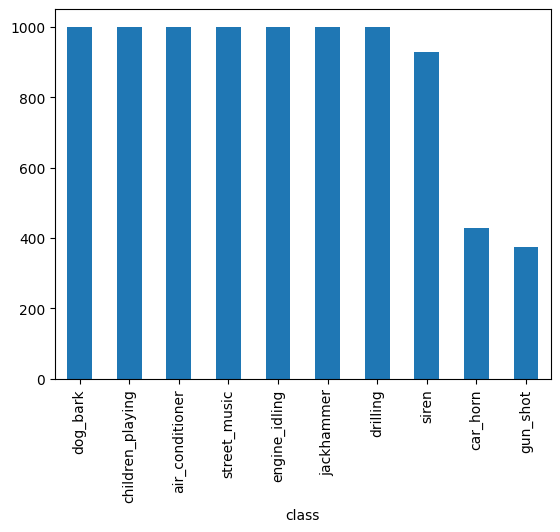

In [12]:
plt.figure()
metadata['class'].value_counts().plot(kind='bar')
plt.show()

In [13]:
# describing the csv data
metadata.describe()

fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000

In [14]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [15]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

**1.2 Audio Data Visualisation and Classification**

In [16]:
# lets read a audio sample using librosa
import librosa
import librosa.display
import IPython.display as ipd
audio_file_path = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-14.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data)

[-0.00385926 -0.00486133 -0.00365529 ...  0.01042659  0.00873447
  0.00823921]


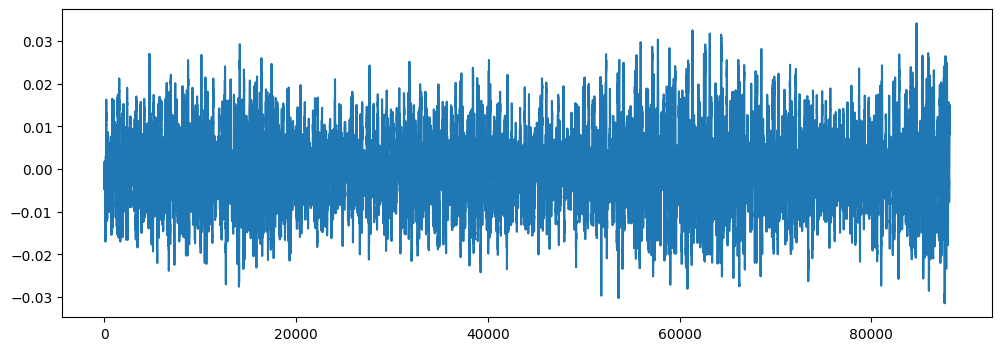

In [18]:
## lets plot the librosa audio data
import matplotlib.pyplot as plt
# original audio with channel one
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

**1.3 Observation on audio data**

Here, Librosa converts the signal mono, that means the  channel will always be 1


In [19]:
## lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [20]:
wave_audio

array([[  2359296, -27197440],
       [  4849664, -26279936],
       [  6684672, -25821184],
       ...,
       [ 28901376,   5832704],
       [ 27590656,   5308416],
       [ 27525120,   5308416]], dtype=int32)

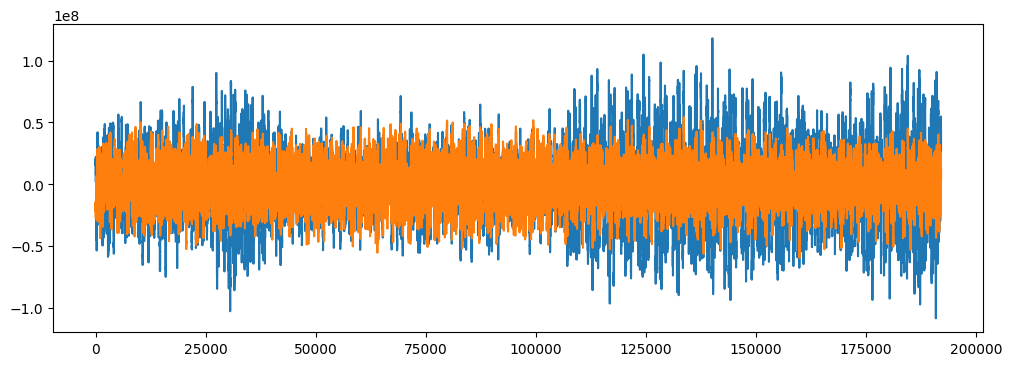

In [21]:
import matplotlib.pyplot as plt
# original with 2 channel
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

**1.4 Extracting Features**

here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audo sample. the MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characterisrics of the sound. thouse audio representations will allow us to identify features for classification.

In [22]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [23]:
mfccs

array([[-4.46076569e+02, -4.16749756e+02, -4.11294800e+02, ...,
        -4.10149994e+02, -4.03820190e+02, -4.15865692e+02],
       [ 1.23962814e+02,  1.33380829e+02,  1.38196289e+02, ...,
         1.33073807e+02,  1.36234406e+02,  1.30916397e+02],
       [-1.83445911e+01, -1.94632950e+01, -1.90833435e+01, ...,
        -1.70682049e+01, -1.47205582e+01, -3.72081590e+00],
       ...,
       [ 4.55296707e+00,  4.82877970e+00,  9.38406944e-01, ...,
        -1.13646984e+00,  1.11586034e+00, -1.27514839e-01],
       [ 4.80366945e-01, -8.77168298e-01, -9.40207541e-01, ...,
         2.92133164e+00,  1.92668986e+00,  2.09955454e+00],
       [ 2.15510893e+00, -3.65219831e+00, -2.09212971e+00, ...,
         2.84651852e+00, -1.63920045e-01,  4.26295853e+00]], dtype=float32)

In [24]:
### Extracting MFCC's for every audio file in the dadaset
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio'
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [25]:
###extracting features from audio
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [28]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa

# **Correct the audio_dataset_path to your actual dataset location**
audio_dataset_path = '/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio'
metadata_file_path = os.path.join(audio_dataset_path, 'UrbanSound8K.csv') # **Using the correct filename UrbanSound8K.csv**

# Load the metadata CSV file
metadata = pd.read_csv(metadata_file_path)

# Define the Mel-Frequency Cepstral Coefficients (MFCC) extraction function
def features_extractor(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
        return mfccs_processed
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

# Initialize the list to store extracted features
extracted_features = []

# Process each audio file and extract features
for index_num, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    # Construct the file path
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        f'fold{row["fold"]}/',
        str(row["slice_file_name"])
    )

    # Extract class label
    final_class_labels = row["class"]

    # Extract features using the defined function
    data = features_extractor(file_name)
    if data is not None:  # Only append if feature extraction is successful
        extracted_features.append([data, final_class_labels])

# Convert extracted features to a DataFrame for further use
extracted_features_df = pd.DataFrame(extracted_features, columns=["feature", "class"])

# Save the extracted features to a file (optional)
extracted_features_df.to_csv("extracted_features.csv", index=False)

print("Feature extraction completed successfully!")

  0%|          | 0/8732 [00:00<?, ?it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100032-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 2/8732 [00:00<28:12,  5.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-117.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 3/8732 [00:00<42:50,  3.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-121.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 4/8732 [00:01<42:38,  3.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 5/8732 [00:01<1:00:22,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 6/8732 [00:02<1:11:24,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-143.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 7/8732 [00:03<1:19:28,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-161.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 8/8732 [00:03<1:09:23,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 9/8732 [00:03<1:02:48,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100263-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 10/8732 [00:05<2:05:24,  1.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100648-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 11/8732 [00:05<1:40:58,  1.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100648-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 12/8732 [00:06<1:35:47,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100648-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 13/8732 [00:06<1:30:16,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100648-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 14/8732 [00:07<1:30:15,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100648-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 15/8732 [00:10<3:10:44,  1.31s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/100652-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 16/8732 [00:10<2:26:20,  1.01s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/100652-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 17/8732 [00:11<2:09:15,  1.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/100652-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 18/8732 [00:11<1:42:20,  1.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/100652-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 19/8732 [00:12<1:25:49,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100795-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 20/8732 [00:12<1:30:03,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100795-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 21/8732 [00:13<1:20:17,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100795-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 22/8732 [00:13<1:11:26,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/100795-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 23/8732 [00:14<1:17:49,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 24/8732 [00:14<1:07:42,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 25/8732 [00:14<1:02:54,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 26/8732 [00:15<1:03:30,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 27/8732 [00:15<55:29,  2.61it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 28/8732 [00:15<56:39,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 29/8732 [00:16<50:44,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 30/8732 [00:16<48:10,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 31/8732 [00:16<53:39,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 32/8732 [00:17<57:17,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 33/8732 [00:17<1:06:57,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 34/8732 [00:18<59:38,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 35/8732 [00:18<59:36,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 36/8732 [00:19<57:30,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 37/8732 [00:19<57:09,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 38/8732 [00:19<53:51,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 39/8732 [00:20<52:16,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 40/8732 [00:20<51:17,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 41/8732 [00:21<1:07:22,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 42/8732 [00:21<1:06:51,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 43/8732 [00:21<59:41,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 44/8732 [00:22<54:46,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 45/8732 [00:22<1:04:48,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 46/8732 [00:23<1:00:43,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 47/8732 [00:23<1:00:12,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 48/8732 [00:24<1:05:30,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 49/8732 [00:24<1:15:50,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 50/8732 [00:25<1:08:06,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 51/8732 [00:25<1:17:52,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 52/8732 [00:26<1:08:36,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 53/8732 [00:26<1:06:35,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/100852-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 54/8732 [00:29<2:46:57,  1.15s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/101281-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 55/8732 [00:29<2:09:17,  1.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/101281-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 56/8732 [00:30<1:52:18,  1.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/101281-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 57/8732 [00:30<1:30:53,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 58/8732 [00:30<1:23:51,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 59/8732 [00:31<1:22:01,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 60/8732 [00:31<1:12:06,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 61/8732 [00:32<1:14:40,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 62/8732 [00:32<1:04:57,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 63/8732 [00:32<1:01:30,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 64/8732 [00:33<1:03:34,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/101382-2-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 65/8732 [00:33<58:56,  2.45it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/101415-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 66/8732 [00:34<1:06:17,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/101415-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 67/8732 [00:34<58:57,  2.45it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/101415-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 68/8732 [00:37<2:27:26,  1.02s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 69/8732 [00:37<2:09:58,  1.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 70/8732 [00:38<1:59:19,  1.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 71/8732 [00:39<1:53:01,  1.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 72/8732 [00:39<1:42:17,  1.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 73/8732 [00:40<1:37:16,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 74/8732 [00:40<1:21:33,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 75/8732 [00:40<1:17:16,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 76/8732 [00:41<1:21:03,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 77/8732 [00:41<1:11:21,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 78/8732 [00:42<1:04:25,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 79/8732 [00:42<1:03:44,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 80/8732 [00:43<1:11:44,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 81/8732 [00:43<1:12:59,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 82/8732 [00:44<1:08:05,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 83/8732 [00:44<1:02:14,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 84/8732 [00:45<1:11:00,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 85/8732 [00:46<1:23:46,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 86/8732 [00:46<1:28:28,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 87/8732 [00:47<1:17:21,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 88/8732 [00:47<1:09:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 89/8732 [00:47<1:14:14,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 90/8732 [00:48<1:10:04,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 91/8732 [00:48<1:04:32,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 92/8732 [00:49<1:17:49,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 93/8732 [00:50<1:16:17,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 94/8732 [00:50<1:18:16,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/101729-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 95/8732 [00:53<2:52:31,  1.20s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 96/8732 [00:53<2:25:52,  1.01s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 97/8732 [00:54<1:56:42,  1.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 98/8732 [00:54<1:49:04,  1.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 99/8732 [00:55<1:28:15,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 100/8732 [00:55<1:14:55,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/101848-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 101/8732 [00:58<3:00:57,  1.26s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/102102-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 102/8732 [00:58<2:18:32,  1.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102103-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 103/8732 [00:59<1:50:02,  1.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102103-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 104/8732 [00:59<1:34:56,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102104-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 105/8732 [01:02<3:28:56,  1.45s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/102105-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 106/8732 [01:03<2:44:00,  1.14s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102106-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 107/8732 [01:03<2:10:31,  1.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102305-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 108/8732 [01:03<1:42:44,  1.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/102547-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 109/8732 [01:04<1:25:38,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/102547-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 110/8732 [01:04<1:12:44,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/102547-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 111/8732 [01:05<1:17:23,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102842-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 112/8732 [01:05<1:19:39,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102842-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 113/8732 [01:05<1:10:08,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102842-3-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 114/8732 [01:06<1:04:17,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/102842-3-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 115/8732 [01:06<59:30,  2.41it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 116/8732 [01:07<59:37,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 117/8732 [01:07<54:04,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 118/8732 [01:08<1:11:16,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 119/8732 [01:08<1:02:56,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 120/8732 [01:09<1:11:25,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 121/8732 [01:09<1:04:48,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 122/8732 [01:09<59:00,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/102853-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 123/8732 [01:10<1:10:23,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 124/8732 [01:10<1:10:12,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 125/8732 [01:11<1:04:43,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 126/8732 [01:11<1:06:50,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 127/8732 [01:12<1:14:54,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 128/8732 [01:12<1:14:52,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 129/8732 [01:13<1:13:12,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 130/8732 [01:13<1:10:20,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 131/8732 [01:14<1:17:37,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 132/8732 [01:14<1:09:02,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 133/8732 [01:15<1:12:01,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 134/8732 [01:15<1:10:40,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 135/8732 [01:16<1:05:10,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 136/8732 [01:16<1:13:35,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 137/8732 [01:17<1:08:26,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 138/8732 [01:17<1:00:22,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 139/8732 [01:17<59:45,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 140/8732 [01:18<1:03:00,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 141/8732 [01:18<1:02:13,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 142/8732 [01:19<1:02:08,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 143/8732 [01:19<57:40,  2.48it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 144/8732 [01:20<1:14:43,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 145/8732 [01:21<1:17:14,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 146/8732 [01:21<1:25:13,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 147/8732 [01:22<1:22:41,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 148/8732 [01:22<1:26:01,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 149/8732 [01:23<1:15:04,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 150/8732 [01:23<1:04:33,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 151/8732 [01:23<1:01:57,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 152/8732 [01:24<1:11:51,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 153/8732 [01:25<1:06:13,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/102857-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 154/8732 [01:25<1:06:24,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102858-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 155/8732 [01:25<58:57,  2.42it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102858-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 156/8732 [01:26<54:07,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 157/8732 [01:26<1:03:52,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 158/8732 [01:26<55:48,  2.56it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 159/8732 [01:27<53:07,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 160/8732 [01:27<48:28,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 161/8732 [01:27<49:35,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 162/8732 [01:28<59:35,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 163/8732 [01:28<56:04,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 164/8732 [01:29<1:09:11,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 165/8732 [01:29<1:07:17,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 166/8732 [01:30<1:01:11,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 167/8732 [01:30<1:07:12,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 168/8732 [01:31<1:05:58,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 169/8732 [01:31<59:58,  2.38it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 170/8732 [01:32<1:06:35,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 171/8732 [01:32<1:10:59,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/102871-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 172/8732 [01:33<1:04:37,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 173/8732 [01:33<1:08:54,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 174/8732 [01:34<1:16:02,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 175/8732 [01:34<1:08:49,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 176/8732 [01:34<1:02:04,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 177/8732 [01:35<56:35,  2.52it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 178/8732 [01:35<53:57,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 179/8732 [01:35<51:06,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 180/8732 [01:36<50:25,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 181/8732 [01:36<56:37,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 182/8732 [01:37<1:01:08,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 183/8732 [01:37<1:03:48,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 184/8732 [01:38<1:02:57,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 185/8732 [01:38<1:09:01,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 186/8732 [01:39<1:16:18,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 187/8732 [01:39<1:13:24,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 188/8732 [01:40<1:03:22,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 189/8732 [01:40<1:03:06,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 190/8732 [01:41<1:04:13,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 191/8732 [01:41<1:02:17,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 192/8732 [01:41<1:01:39,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 193/8732 [01:42<58:15,  2.44it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103074-7-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 194/8732 [01:44<2:35:57,  1.10s/it]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/103076-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 195/8732 [01:45<2:06:00,  1.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/103076-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 196/8732 [01:45<1:42:12,  1.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/103076-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 197/8732 [01:46<1:31:17,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 198/8732 [01:46<1:29:34,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 199/8732 [01:47<1:31:11,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 200/8732 [01:48<1:31:15,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 201/8732 [01:48<1:21:13,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 202/8732 [01:48<1:16:35,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 203/8732 [01:49<1:24:45,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 204/8732 [01:50<1:16:18,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 205/8732 [01:50<1:07:33,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 206/8732 [01:51<1:13:41,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 207/8732 [01:51<1:17:18,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 208/8732 [01:52<1:20:35,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 209/8732 [01:52<1:15:46,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 210/8732 [01:53<1:18:35,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 211/8732 [01:53<1:08:33,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 212/8732 [01:54<1:18:37,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 213/8732 [01:55<1:23:39,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 214/8732 [01:55<1:12:16,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 215/8732 [01:55<1:03:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 216/8732 [01:56<1:02:59,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 217/8732 [01:56<58:03,  2.44it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103199-4-7-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 218/8732 [01:56<1:02:09,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 219/8732 [01:57<1:02:30,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 220/8732 [01:58<1:11:42,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 221/8732 [01:58<1:15:51,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 222/8732 [01:58<1:07:53,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 223/8732 [01:59<1:05:21,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 224/8732 [02:00<1:11:33,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 225/8732 [02:00<1:10:16,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 226/8732 [02:01<1:13:27,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 227/8732 [02:01<1:06:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 228/8732 [02:01<1:02:32,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 229/8732 [02:02<1:02:06,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 230/8732 [02:02<1:02:24,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 231/8732 [02:03<1:01:18,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 232/8732 [02:03<1:13:56,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 233/8732 [02:04<1:04:30,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 234/8732 [02:04<1:13:14,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 235/8732 [02:05<1:17:38,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 236/8732 [02:05<1:12:01,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 237/8732 [02:06<1:10:58,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/103249-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 238/8732 [02:06<1:18:43,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 239/8732 [02:07<1:25:29,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 240/8732 [02:08<1:26:31,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 241/8732 [02:08<1:24:34,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 242/8732 [02:09<1:25:31,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 243/8732 [02:10<1:26:57,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 245/8732 [02:10<1:07:40,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 246/8732 [02:11<1:12:04,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 247/8732 [02:11<1:04:18,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 248/8732 [02:11<56:19,  2.51it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 249/8732 [02:12<53:35,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 250/8732 [02:12<50:18,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 251/8732 [02:13<1:05:19,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 252/8732 [02:13<58:56,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 253/8732 [02:14<1:05:37,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 254/8732 [02:14<1:03:37,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 255/8732 [02:14<54:53,  2.57it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 256/8732 [02:15<54:10,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 257/8732 [02:15<54:32,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/103258-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 258/8732 [02:16<1:09:28,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103357-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 259/8732 [02:16<1:06:48,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/103357-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 260/8732 [02:17<1:00:04,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/103438-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 261/8732 [02:17<52:11,  2.70it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/103438-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 262/8732 [02:18<1:07:16,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/103438-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 263/8732 [02:18<1:02:20,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 264/8732 [02:18<1:02:17,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 265/8732 [02:19<1:03:00,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 266/8732 [02:20<1:17:34,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 267/8732 [02:20<1:06:59,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 268/8732 [02:20<58:25,  2.41it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 269/8732 [02:21<1:11:33,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 270/8732 [02:21<1:04:29,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 271/8732 [02:22<1:11:58,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 272/8732 [02:23<1:20:32,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 273/8732 [02:23<1:08:20,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 274/8732 [02:23<59:46,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 275/8732 [02:24<1:07:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 276/8732 [02:24<1:13:44,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 277/8732 [02:25<1:22:40,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 278/8732 [02:26<1:23:05,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104421-2-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 279/8732 [02:26<1:30:33,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 280/8732 [02:27<1:32:08,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 281/8732 [02:28<1:32:24,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 282/8732 [02:28<1:22:17,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 283/8732 [02:29<1:28:57,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 284/8732 [02:29<1:23:12,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 285/8732 [02:30<1:14:20,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 286/8732 [02:30<1:14:12,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 287/8732 [02:31<1:07:54,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 288/8732 [02:31<1:09:52,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 289/8732 [02:32<1:07:21,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 290/8732 [02:32<1:13:22,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 291/8732 [02:33<1:11:41,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 292/8732 [02:33<1:06:13,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 293/8732 [02:34<1:03:02,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 294/8732 [02:34<1:02:08,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 295/8732 [02:35<1:19:04,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 296/8732 [02:35<1:16:31,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/104625-4-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 297/8732 [02:36<1:08:53,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 298/8732 [02:37<1:24:09,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 299/8732 [02:37<1:24:21,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 300/8732 [02:38<1:27:59,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 301/8732 [02:38<1:17:13,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 302/8732 [02:39<1:14:15,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 303/8732 [02:39<1:11:51,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 304/8732 [02:40<1:17:38,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 305/8732 [02:40<1:08:21,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 306/8732 [02:41<1:06:08,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 307/8732 [02:41<59:26,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 308/8732 [02:41<55:57,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/104817-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 309/8732 [02:42<52:57,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 310/8732 [02:42<50:49,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 311/8732 [02:42<48:45,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 312/8732 [02:43<48:09,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 313/8732 [02:43<53:15,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 314/8732 [02:43<48:33,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 315/8732 [02:44<45:08,  3.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-10-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 316/8732 [02:44<46:21,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 317/8732 [02:44<45:55,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-11-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 318/8732 [02:45<45:17,  3.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-12-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 319/8732 [02:45<46:29,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-14-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 320/8732 [02:46<58:26,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-14-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 321/8732 [02:46<1:05:05,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-14-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 322/8732 [02:47<1:04:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-15-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 323/8732 [02:47<1:10:23,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-15-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 324/8732 [02:48<1:16:31,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-15-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 325/8732 [02:49<1:24:45,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-15-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 326/8732 [02:49<1:17:03,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 327/8732 [02:49<1:12:49,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 328/8732 [02:50<1:12:18,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 329/8732 [02:50<1:13:32,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 330/8732 [02:51<1:16:17,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 331/8732 [02:52<1:12:56,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-16-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 332/8732 [02:52<1:06:56,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 333/8732 [02:52<1:04:10,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 334/8732 [02:53<1:10:20,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 335/8732 [02:53<1:09:32,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 336/8732 [02:54<1:17:20,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 337/8732 [02:55<1:15:00,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 338/8732 [02:55<1:05:40,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-17-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 339/8732 [02:55<59:17,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-18-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 340/8732 [02:56<59:14,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-18-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 341/8732 [02:56<59:46,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-18-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 342/8732 [02:56<57:48,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-18-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 343/8732 [02:57<1:06:45,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 344/8732 [02:57<1:00:16,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 345/8732 [02:58<56:19,  2.48it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 346/8732 [02:58<1:11:23,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 347/8732 [02:59<1:19:59,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 348/8732 [02:59<1:06:52,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-19-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 349/8732 [03:00<1:12:50,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 350/8732 [03:01<1:14:18,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 351/8732 [03:01<1:21:41,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 352/8732 [03:02<1:29:05,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 353/8732 [03:02<1:15:04,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 354/8732 [03:03<1:17:40,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-7-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 355/8732 [03:03<1:12:57,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-7-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 356/8732 [03:04<1:10:38,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-7-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 357/8732 [03:04<1:08:00,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-7-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 358/8732 [03:05<1:06:18,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 359/8732 [03:05<1:12:29,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 360/8732 [03:06<1:21:51,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 361/8732 [03:07<1:21:07,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 362/8732 [03:07<1:24:42,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 363/8732 [03:08<1:12:41,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 364/8732 [03:08<1:03:13,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-8-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 365/8732 [03:08<57:31,  2.42it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 366/8732 [03:09<1:04:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-9-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 367/8732 [03:10<1:11:30,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/104998-7-9-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 368/8732 [03:10<1:09:14,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 369/8732 [03:10<1:01:40,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 370/8732 [03:11<1:08:45,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 371/8732 [03:12<1:17:43,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 372/8732 [03:12<1:08:44,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 373/8732 [03:12<1:03:40,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 374/8732 [03:13<1:15:24,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 375/8732 [03:14<1:11:10,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 376/8732 [03:14<1:04:49,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 377/8732 [03:15<1:13:50,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 378/8732 [03:15<1:06:18,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 379/8732 [03:16<1:17:13,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 380/8732 [03:16<1:20:57,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 381/8732 [03:17<1:09:38,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 382/8732 [03:17<1:06:27,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 383/8732 [03:18<1:11:16,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 384/8732 [03:18<1:08:13,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 385/8732 [03:18<1:02:20,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 386/8732 [03:19<54:35,  2.55it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 387/8732 [03:19<1:02:58,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 388/8732 [03:20<1:10:11,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 389/8732 [03:20<1:01:17,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 390/8732 [03:21<1:14:00,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 391/8732 [03:21<1:07:15,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 392/8732 [03:22<1:14:52,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 393/8732 [03:22<1:05:10,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 394/8732 [03:23<1:12:59,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 395/8732 [03:23<1:12:00,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 396/8732 [03:24<1:22:28,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 397/8732 [03:25<1:13:26,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 398/8732 [03:25<1:04:42,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 399/8732 [03:25<1:02:32,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 400/8732 [03:26<1:10:33,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 401/8732 [03:26<1:02:47,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 402/8732 [03:27<1:09:19,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 403/8732 [03:27<1:02:18,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 404/8732 [03:28<1:13:00,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 405/8732 [03:28<1:09:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 406/8732 [03:29<1:02:47,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 407/8732 [03:29<1:14:16,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 408/8732 [03:30<1:18:46,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 409/8732 [03:31<1:21:48,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 410/8732 [03:31<1:10:40,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 411/8732 [03:32<1:16:49,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 412/8732 [03:32<1:14:32,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 413/8732 [03:33<1:06:04,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 414/8732 [03:33<1:18:47,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 415/8732 [03:34<1:07:47,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 416/8732 [03:34<1:04:49,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 417/8732 [03:34<58:47,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105029-7-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 418/8732 [03:35<1:07:10,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105088-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 419/8732 [03:36<1:11:01,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105088-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 420/8732 [03:36<1:07:01,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105088-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 421/8732 [03:36<1:00:24,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/105088-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 422/8732 [03:37<1:17:45,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 423/8732 [03:38<1:20:44,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 424/8732 [03:38<1:15:20,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 425/8732 [03:39<1:04:58,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 426/8732 [03:39<1:02:05,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 427/8732 [03:39<56:42,  2.44it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 428/8732 [03:40<1:14:58,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 429/8732 [03:40<1:07:35,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 430/8732 [03:41<1:12:59,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 431/8732 [03:42<1:23:31,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 432/8732 [03:42<1:12:46,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 433/8732 [03:43<1:16:57,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 434/8732 [03:43<1:07:29,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 435/8732 [03:44<1:00:26,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 436/8732 [03:44<1:00:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 437/8732 [03:45<1:12:28,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 438/8732 [03:45<1:15:18,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 439/8732 [03:46<1:11:37,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 440/8732 [03:46<1:12:19,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/105289-8-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 441/8732 [03:47<1:02:08,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/105319-3-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 442/8732 [03:47<56:47,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/105319-3-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 443/8732 [03:47<50:31,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/105319-3-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 444/8732 [03:48<1:01:13,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 445/8732 [03:48<1:02:02,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 446/8732 [03:49<58:19,  2.37it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 447/8732 [03:49<55:09,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 448/8732 [03:49<55:11,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 449/8732 [03:50<1:07:31,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 450/8732 [03:51<1:12:11,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 451/8732 [03:51<1:06:25,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/105415-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 452/8732 [03:52<1:12:49,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 453/8732 [03:52<1:02:56,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 454/8732 [03:52<58:08,  2.37it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 455/8732 [03:53<56:00,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 456/8732 [03:53<54:05,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 457/8732 [03:53<49:27,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/105425-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 458/8732 [03:54<59:17,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/106014-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 459/8732 [03:55<1:10:25,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/106014-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 460/8732 [03:55<1:02:30,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/106014-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 461/8732 [03:56<1:14:09,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/106014-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 462/8732 [03:56<1:15:03,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/106014-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 463/8732 [03:56<1:03:56,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 464/8732 [03:57<1:09:37,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 465/8732 [03:58<1:12:36,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 466/8732 [03:58<1:03:06,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 467/8732 [03:58<57:57,  2.38it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 468/8732 [03:59<1:11:36,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 469/8732 [03:59<1:03:12,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 470/8732 [04:00<1:01:11,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 471/8732 [04:00<56:21,  2.44it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 472/8732 [04:01<1:09:52,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 473/8732 [04:01<1:05:27,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 474/8732 [04:02<59:45,  2.30it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 475/8732 [04:02<54:43,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 476/8732 [04:02<52:08,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 477/8732 [04:03<50:10,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 478/8732 [04:03<52:42,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 479/8732 [04:03<50:22,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 480/8732 [04:04<44:59,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 481/8732 [04:04<48:56,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 482/8732 [04:04<44:42,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 483/8732 [04:05<57:44,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/106015-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 484/8732 [04:05<58:36,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/106486-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 485/8732 [04:06<56:00,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/106486-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 486/8732 [04:06<55:51,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/106486-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 487/8732 [04:06<52:09,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/106487-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 488/8732 [04:07<56:16,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/106487-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 489/8732 [04:07<1:02:09,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/106487-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 490/8732 [04:08<1:07:20,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/106905-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 491/8732 [04:09<1:11:29,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/106905-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 492/8732 [04:09<1:14:41,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/106905-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 493/8732 [04:10<1:18:42,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/106905-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 494/8732 [04:11<1:25:08,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/106905-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 495/8732 [04:11<1:13:07,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/106905-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 496/8732 [04:11<1:03:58,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/106905-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 497/8732 [04:12<1:01:13,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/106955-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 498/8732 [04:12<1:05:21,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/107090-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 499/8732 [04:12<59:44,  2.30it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/107090-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 500/8732 [04:13<1:07:19,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/107190-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 501/8732 [04:14<1:17:29,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 502/8732 [04:14<1:12:38,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 503/8732 [04:15<1:05:30,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 504/8732 [04:15<1:12:17,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 505/8732 [04:16<1:21:34,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 506/8732 [04:17<1:26:38,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 507/8732 [04:17<1:29:24,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 508/8732 [04:18<1:20:22,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/107228-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 509/8732 [04:18<1:16:05,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 510/8732 [04:19<1:07:31,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 511/8732 [04:19<1:00:18,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 512/8732 [04:20<1:03:28,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 513/8732 [04:20<55:26,  2.47it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 514/8732 [04:20<52:15,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 515/8732 [04:20<51:03,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 516/8732 [04:21<46:51,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 517/8732 [04:21<59:34,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 518/8732 [04:22<59:09,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 519/8732 [04:23<1:10:27,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 520/8732 [04:23<1:06:41,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 521/8732 [04:23<1:00:56,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 522/8732 [04:24<1:01:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 523/8732 [04:24<1:02:18,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 524/8732 [04:25<57:51,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 525/8732 [04:25<54:08,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 526/8732 [04:25<56:46,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 527/8732 [04:26<1:12:23,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 528/8732 [04:27<1:18:42,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 529/8732 [04:27<1:08:29,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 530/8732 [04:28<1:01:30,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 531/8732 [04:28<57:14,  2.39it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 532/8732 [04:28<55:52,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 533/8732 [04:29<52:28,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 534/8732 [04:29<48:40,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 535/8732 [04:29<52:51,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 536/8732 [04:30<53:02,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/107357-8-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 537/8732 [04:30<1:01:17,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 538/8732 [04:31<54:20,  2.51it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 539/8732 [04:31<52:52,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 540/8732 [04:31<50:53,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 541/8732 [04:32<51:20,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 542/8732 [04:32<52:12,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 543/8732 [04:32<50:04,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 544/8732 [04:33<47:28,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 545/8732 [04:33<45:27,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 546/8732 [04:34<56:58,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 547/8732 [04:34<58:11,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 548/8732 [04:35<58:39,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 549/8732 [04:35<1:02:33,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 550/8732 [04:35<56:29,  2.41it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 551/8732 [04:36<53:40,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 552/8732 [04:36<51:00,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/107842-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 553/8732 [04:36<54:44,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 554/8732 [04:37<56:43,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 555/8732 [04:37<55:05,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 556/8732 [04:38<1:04:33,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 557/8732 [04:39<1:15:34,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 558/8732 [04:39<1:18:42,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 559/8732 [04:40<1:15:49,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108041-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 560/8732 [04:40<1:03:53,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/108187-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 561/8732 [04:41<1:10:55,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/108187-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 562/8732 [04:41<1:13:52,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/108187-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 563/8732 [04:42<1:04:40,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/108187-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 564/8732 [04:42<1:05:49,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 565/8732 [04:43<1:12:49,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 566/8732 [04:43<1:05:33,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 567/8732 [04:44<1:00:17,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 568/8732 [04:44<56:44,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 569/8732 [04:44<1:00:35,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/108357-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 570/8732 [04:45<1:03:26,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 571/8732 [04:45<59:26,  2.29it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 572/8732 [04:46<1:09:01,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 573/8732 [04:46<1:00:45,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 574/8732 [04:47<56:57,  2.39it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 575/8732 [04:47<54:33,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 576/8732 [04:48<1:02:19,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 577/8732 [04:48<1:09:21,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/108362-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 578/8732 [04:49<1:13:26,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 579/8732 [04:49<1:14:57,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 580/8732 [04:50<1:16:57,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 581/8732 [04:50<1:11:52,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 582/8732 [04:51<1:12:21,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 583/8732 [04:52<1:14:00,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/108638-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 584/8732 [04:52<1:11:03,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/109233-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 585/8732 [04:52<1:02:11,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/109233-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 586/8732 [04:53<58:24,  2.32it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/109233-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 587/8732 [04:53<1:06:26,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/109233-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 588/8732 [04:54<1:12:18,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/109263-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 589/8732 [04:54<1:02:22,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/109263-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 590/8732 [04:55<55:16,  2.45it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/109263-9-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 591/8732 [04:55<52:00,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/109263-9-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 592/8732 [04:55<49:39,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/109263-9-0-78.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 593/8732 [04:56<1:04:37,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-134.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 594/8732 [04:56<56:12,  2.41it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 595/8732 [04:57<1:04:49,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-153.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 596/8732 [04:57<1:11:11,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 597/8732 [04:58<1:15:20,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 598/8732 [04:59<1:11:26,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 599/8732 [04:59<1:12:20,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/109703-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 600/8732 [04:59<1:04:08,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/109711-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 601/8732 [05:00<59:37,  2.27it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/109711-3-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 602/8732 [05:00<57:18,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/109711-3-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 603/8732 [05:00<53:44,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/110134-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 604/8732 [05:01<56:29,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/110371-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 605/8732 [05:01<50:25,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/110371-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 606/8732 [05:02<51:00,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/110371-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 607/8732 [05:02<52:17,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/110389-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 608/8732 [05:02<55:45,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/110621-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 609/8732 [05:03<1:04:56,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/110621-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 610/8732 [05:03<58:48,  2.30it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/110621-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 611/8732 [05:04<1:06:50,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/110621-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 612/8732 [05:04<1:00:53,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/110622-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 613/8732 [05:05<54:10,  2.50it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/110688-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 614/8732 [05:05<51:20,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/110688-3-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 615/8732 [05:06<1:01:12,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/110688-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 616/8732 [05:06<54:48,  2.47it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/110688-3-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 617/8732 [05:06<51:23,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 618/8732 [05:07<48:50,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 619/8732 [05:07<59:59,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 620/8732 [05:08<58:37,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 621/8732 [05:08<53:22,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 622/8732 [05:09<1:04:00,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/110868-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 623/8732 [05:09<1:13:33,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/110918-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 624/8732 [05:10<1:09:31,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/110918-3-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 625/8732 [05:10<1:07:38,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/110918-3-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 626/8732 [05:11<59:57,  2.25it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/110918-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 628/8732 [05:11<49:23,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 629/8732 [05:12<57:48,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 630/8732 [05:12<53:37,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 631/8732 [05:12<53:37,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 632/8732 [05:13<50:37,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 633/8732 [05:13<51:23,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 634/8732 [05:14<59:10,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 635/8732 [05:14<1:05:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 636/8732 [05:15<1:13:50,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 637/8732 [05:15<1:11:18,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 638/8732 [05:16<1:00:53,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 639/8732 [05:16<55:34,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 640/8732 [05:17<1:04:59,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 641/8732 [05:17<1:08:21,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 642/8732 [05:18<1:06:27,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 643/8732 [05:18<59:35,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 644/8732 [05:19<1:06:24,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 645/8732 [05:19<1:03:34,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 646/8732 [05:19<55:44,  2.42it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 647/8732 [05:20<50:48,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 648/8732 [05:20<48:22,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 649/8732 [05:20<47:35,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 650/8732 [05:21<45:49,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/111386-5-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 651/8732 [05:21<48:45,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 652/8732 [05:21<47:38,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 653/8732 [05:22<1:00:31,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 654/8732 [05:22<55:54,  2.41it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 655/8732 [05:23<1:04:34,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 656/8732 [05:23<57:39,  2.33it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 657/8732 [05:24<1:07:08,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 658/8732 [05:25<1:19:56,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 659/8732 [05:25<1:08:20,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 660/8732 [05:25<59:28,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 661/8732 [05:26<54:13,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 662/8732 [05:26<1:00:05,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 663/8732 [05:27<57:12,  2.35it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 664/8732 [05:27<52:03,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 665/8732 [05:28<1:00:45,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 666/8732 [05:28<58:35,  2.29it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 667/8732 [05:28<57:54,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 668/8732 [05:29<52:56,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 669/8732 [05:29<48:41,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 670/8732 [05:29<44:54,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 671/8732 [05:29<42:38,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 672/8732 [05:30<58:57,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 673/8732 [05:31<1:07:35,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/111671-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 674/8732 [05:31<59:17,  2.27it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/112075-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 675/8732 [05:32<1:08:15,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/112075-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 676/8732 [05:33<1:16:55,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/112075-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 677/8732 [05:33<1:05:09,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/112195-3-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 678/8732 [05:33<56:13,  2.39it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/112195-3-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 679/8732 [05:33<50:58,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/112195-3-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 680/8732 [05:34<1:00:17,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/112195-3-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 681/8732 [05:34<57:15,  2.34it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/113160-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 682/8732 [05:35<1:02:09,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 683/8732 [05:36<1:16:53,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 684/8732 [05:36<1:09:40,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 685/8732 [05:37<1:15:38,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 686/8732 [05:37<1:18:20,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 687/8732 [05:38<1:28:00,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 688/8732 [05:39<1:29:34,  1.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 689/8732 [05:39<1:16:29,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113201-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 690/8732 [05:40<1:05:43,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 691/8732 [05:40<1:21:52,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 692/8732 [05:41<1:23:05,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 693/8732 [05:42<1:19:13,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 694/8732 [05:42<1:21:42,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 695/8732 [05:43<1:20:43,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 696/8732 [05:43<1:11:13,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 697/8732 [05:44<1:15:10,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 698/8732 [05:44<1:14:49,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 699/8732 [05:45<1:20:30,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 700/8732 [05:46<1:22:22,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 701/8732 [05:46<1:13:45,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 702/8732 [05:47<1:22:24,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 703/8732 [05:48<1:24:21,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 704/8732 [05:48<1:28:36,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 705/8732 [05:49<1:17:23,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 706/8732 [05:49<1:22:57,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 707/8732 [05:50<1:22:22,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 708/8732 [05:50<1:13:03,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 709/8732 [05:51<1:04:44,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 710/8732 [05:51<1:12:31,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 711/8732 [05:52<1:03:59,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 712/8732 [05:53<1:15:59,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 713/8732 [05:53<1:06:16,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 714/8732 [05:54<1:17:21,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 715/8732 [05:54<1:08:47,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 716/8732 [05:55<1:15:52,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 717/8732 [05:55<1:13:42,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 718/8732 [05:56<1:08:20,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113202-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 719/8732 [05:56<1:05:36,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 720/8732 [05:57<1:01:50,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 721/8732 [05:57<1:00:03,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 722/8732 [05:58<1:09:24,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 723/8732 [05:58<1:04:02,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 724/8732 [05:58<1:03:02,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 725/8732 [05:59<1:10:13,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 726/8732 [06:00<1:11:41,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 727/8732 [06:00<1:03:41,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 728/8732 [06:01<1:10:00,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 729/8732 [06:01<1:09:46,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 730/8732 [06:02<1:12:52,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 731/8732 [06:02<1:10:50,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 732/8732 [06:03<1:02:25,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 733/8732 [06:03<1:10:13,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 734/8732 [06:04<1:06:28,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 735/8732 [06:04<1:05:53,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 736/8732 [06:05<1:19:42,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 737/8732 [06:05<1:13:20,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 738/8732 [06:06<1:19:53,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113203-5-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 739/8732 [06:07<1:21:57,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 740/8732 [06:08<1:28:26,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 741/8732 [06:08<1:19:20,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 742/8732 [06:09<1:18:30,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 743/8732 [06:09<1:11:10,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 744/8732 [06:10<1:14:23,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 745/8732 [06:10<1:21:19,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 746/8732 [06:11<1:30:19,  1.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 747/8732 [06:12<1:26:45,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 748/8732 [06:12<1:27:47,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 749/8732 [06:13<1:19:23,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/113205-5-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 750/8732 [06:13<1:11:03,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113216-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 751/8732 [06:14<1:10:02,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113216-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 752/8732 [06:14<1:09:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113216-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 753/8732 [06:15<1:09:00,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113216-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 754/8732 [06:16<1:17:44,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/113216-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 755/8732 [06:16<1:07:59,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 756/8732 [06:16<1:02:52,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 757/8732 [06:17<1:03:32,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 758/8732 [06:17<56:22,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 759/8732 [06:17<52:16,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 760/8732 [06:18<57:04,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/113601-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 761/8732 [06:18<52:04,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113785-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 762/8732 [06:19<49:10,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/113785-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 763/8732 [06:19<51:32,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/114280-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 764/8732 [06:19<54:58,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/114280-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 765/8732 [06:20<1:02:51,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/114587-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 766/8732 [06:20<1:02:17,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/114587-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 767/8732 [06:21<1:01:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/114587-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 768/8732 [06:21<1:01:51,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/114587-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 769/8732 [06:22<1:07:31,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 770/8732 [06:22<1:04:51,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 771/8732 [06:23<58:59,  2.25it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 772/8732 [06:23<54:24,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 773/8732 [06:24<1:01:44,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 774/8732 [06:24<1:07:17,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/115239-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 775/8732 [06:25<1:04:32,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 776/8732 [06:25<1:02:50,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 777/8732 [06:26<59:19,  2.23it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 778/8732 [06:26<59:50,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 779/8732 [06:27<1:08:58,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 780/8732 [06:27<1:05:16,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/115240-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 781/8732 [06:28<1:03:54,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 782/8732 [06:28<1:08:54,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 783/8732 [06:29<1:13:38,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 784/8732 [06:29<1:05:49,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 785/8732 [06:30<1:06:15,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 786/8732 [06:30<1:00:21,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 787/8732 [06:31<1:07:28,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115241-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 788/8732 [06:31<1:01:51,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 789/8732 [06:32<1:08:50,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 790/8732 [06:32<1:05:34,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 791/8732 [06:32<57:38,  2.30it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 792/8732 [06:33<1:06:37,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 793/8732 [06:34<1:06:02,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115242-9-0-83.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 794/8732 [06:34<1:02:49,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 795/8732 [06:34<59:49,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 796/8732 [06:35<1:08:26,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 797/8732 [06:36<1:06:03,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 798/8732 [06:36<1:09:26,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 799/8732 [06:37<1:16:21,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/115243-9-0-94.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 800/8732 [06:37<1:05:38,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115411-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 801/8732 [06:37<55:45,  2.37it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115411-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 802/8732 [06:38<1:03:19,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/115411-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 803/8732 [06:38<57:15,  2.31it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 804/8732 [06:39<54:16,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 805/8732 [06:39<1:01:36,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 806/8732 [06:40<55:27,  2.38it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 807/8732 [06:40<1:01:55,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 808/8732 [06:41<58:24,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115415-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 809/8732 [06:41<53:19,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 810/8732 [06:41<50:49,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 811/8732 [06:42<45:56,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 812/8732 [06:42<45:17,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 813/8732 [06:42<56:58,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 814/8732 [06:43<59:57,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/115418-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 815/8732 [06:44<1:08:40,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/115535-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 816/8732 [06:44<1:04:18,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/115536-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 817/8732 [06:45<1:08:21,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/115537-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 818/8732 [06:45<1:05:37,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/116163-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 819/8732 [06:46<1:04:26,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/116163-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 820/8732 [06:46<59:53,  2.20it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/116163-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 821/8732 [06:46<54:22,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/116400-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 822/8732 [06:47<53:48,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/116400-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 823/8732 [06:47<1:01:25,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/116400-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 824/8732 [06:48<55:45,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/116400-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 825/8732 [06:48<51:45,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/116423-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 826/8732 [06:48<54:55,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/116423-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 827/8732 [06:49<1:02:25,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/116423-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 828/8732 [06:49<58:56,  2.23it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/116423-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 829/8732 [06:50<57:30,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/116423-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 830/8732 [06:50<51:43,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/116483-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 831/8732 [06:50<52:29,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/116483-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 832/8732 [06:51<50:22,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/116483-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 833/8732 [06:51<59:24,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/116483-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 834/8732 [06:52<1:09:42,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/116484-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 835/8732 [06:52<1:00:59,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/116484-3-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 836/8732 [06:53<54:50,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/116484-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 837/8732 [06:53<1:06:04,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/116484-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 838/8732 [06:54<1:17:39,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/116485-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 839/8732 [06:55<1:09:15,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/116485-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 840/8732 [06:55<1:10:14,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/116485-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 841/8732 [06:56<1:09:43,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/116485-3-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 842/8732 [06:56<59:20,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117048-3-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 843/8732 [06:56<51:36,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117048-3-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 844/8732 [06:56<45:45,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117048-3-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 845/8732 [06:57<53:48,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117048-3-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 846/8732 [06:58<1:01:09,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117072-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 847/8732 [06:58<1:02:29,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117072-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 848/8732 [06:58<55:55,  2.35it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117072-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 849/8732 [06:59<52:38,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/117072-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 850/8732 [06:59<1:01:10,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 851/8732 [07:00<58:05,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 852/8732 [07:00<1:00:22,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 853/8732 [07:01<59:01,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 854/8732 [07:01<52:16,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 855/8732 [07:01<49:02,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 856/8732 [07:02<1:04:27,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 857/8732 [07:02<57:21,  2.29it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 858/8732 [07:03<50:52,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 859/8732 [07:03<1:03:17,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 860/8732 [07:04<1:03:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 861/8732 [07:04<57:33,  2.28it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 862/8732 [07:04<52:21,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/117181-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 863/8732 [07:05<1:04:36,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/11722-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 864/8732 [07:06<1:01:51,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/11722-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 865/8732 [07:06<1:00:22,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/117271-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 866/8732 [07:07<1:09:28,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/117271-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 867/8732 [07:07<1:00:15,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/117271-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 868/8732 [07:08<1:07:43,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/117271-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 869/8732 [07:08<1:14:06,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/117536-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 870/8732 [07:09<1:03:14,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 871/8732 [07:09<55:43,  2.35it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 872/8732 [07:10<1:03:05,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 873/8732 [07:10<55:54,  2.34it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 874/8732 [07:10<49:37,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 875/8732 [07:10<46:41,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/117889-9-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 876/8732 [07:11<50:04,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/118070-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 877/8732 [07:11<56:20,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/118072-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 878/8732 [07:12<55:26,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118101-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 879/8732 [07:12<51:06,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118101-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 880/8732 [07:13<52:11,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118101-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 881/8732 [07:13<52:52,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118101-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 882/8732 [07:14<1:01:43,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 883/8732 [07:14<1:01:00,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 884/8732 [07:15<1:07:43,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 885/8732 [07:15<1:15:07,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 886/8732 [07:16<1:18:47,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 887/8732 [07:17<1:12:13,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 888/8732 [07:17<1:05:54,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 889/8732 [07:17<58:26,  2.24it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 890/8732 [07:18<53:30,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 891/8732 [07:18<1:03:08,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 892/8732 [07:18<54:27,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 893/8732 [07:19<49:25,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 894/8732 [07:19<58:47,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 895/8732 [07:20<1:06:37,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118278-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 896/8732 [07:21<1:11:18,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 897/8732 [07:21<1:05:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 898/8732 [07:21<58:50,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 899/8732 [07:22<1:05:04,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 900/8732 [07:22<58:11,  2.24it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 901/8732 [07:23<59:35,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 902/8732 [07:23<55:40,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 903/8732 [07:24<1:06:20,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 904/8732 [07:24<1:04:48,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 905/8732 [07:25<1:09:04,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 906/8732 [07:25<1:03:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 907/8732 [07:26<1:14:47,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 908/8732 [07:27<1:13:10,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 909/8732 [07:27<1:03:02,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 910/8732 [07:28<1:07:20,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118279-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 911/8732 [07:28<59:51,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 912/8732 [07:28<53:59,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 913/8732 [07:28<49:57,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 914/8732 [07:29<51:33,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 915/8732 [07:29<48:27,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 916/8732 [07:30<55:45,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 917/8732 [07:30<50:58,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 918/8732 [07:30<51:45,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 919/8732 [07:31<58:20,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/118440-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 920/8732 [07:31<51:07,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/118496-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 921/8732 [07:32<47:40,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/118496-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 922/8732 [07:32<56:43,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 923/8732 [07:33<53:55,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 924/8732 [07:33<54:32,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 925/8732 [07:33<56:41,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 926/8732 [07:34<52:28,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 927/8732 [07:34<48:00,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 928/8732 [07:35<51:03,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 929/8732 [07:35<58:54,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 930/8732 [07:35<53:51,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 931/8732 [07:36<55:21,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/118558-5-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 932/8732 [07:37<1:05:01,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/118587-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 933/8732 [07:37<59:14,  2.19it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/118587-3-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 934/8732 [07:37<52:27,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/118587-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 935/8732 [07:38<53:20,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/118723-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 936/8732 [07:38<1:01:12,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/118961-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 937/8732 [07:39<53:38,  2.42it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/118962-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 938/8732 [07:39<52:21,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/118963-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 939/8732 [07:40<1:00:15,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/118964-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 940/8732 [07:40<52:47,  2.46it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/119067-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 941/8732 [07:40<59:30,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/119067-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 942/8732 [07:41<59:40,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/119067-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 943/8732 [07:41<57:13,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119420-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 944/8732 [07:42<55:09,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119420-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 945/8732 [07:42<53:03,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 946/8732 [07:42<51:31,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 947/8732 [07:43<59:50,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 948/8732 [07:43<53:44,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 949/8732 [07:44<58:29,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 950/8732 [07:44<53:54,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 951/8732 [07:45<57:54,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119449-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 952/8732 [07:45<57:31,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 953/8732 [07:45<54:04,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 954/8732 [07:46<50:37,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 955/8732 [07:46<54:19,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 956/8732 [07:47<49:57,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 957/8732 [07:47<47:49,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 958/8732 [07:48<56:39,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 959/8732 [07:48<52:15,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/119455-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 960/8732 [07:48<48:08,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 961/8732 [07:49<55:29,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 962/8732 [07:49<51:58,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 963/8732 [07:50<1:03:21,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 964/8732 [07:50<1:11:23,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 965/8732 [07:51<1:08:40,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 966/8732 [07:51<1:04:00,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/119809-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 967/8732 [07:52<1:08:13,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 968/8732 [07:52<1:02:18,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 969/8732 [07:53<1:02:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 970/8732 [07:53<1:06:11,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 971/8732 [07:54<1:02:43,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 972/8732 [07:54<1:00:38,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 973/8732 [07:55<1:06:15,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 974/8732 [07:55<1:05:42,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 975/8732 [07:56<1:04:53,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 976/8732 [07:56<1:09:13,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/121285-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 977/8732 [07:57<58:38,  2.20it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 978/8732 [07:57<50:16,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 979/8732 [07:58<1:04:21,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 980/8732 [07:58<1:08:41,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 981/8732 [07:59<59:50,  2.16it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 982/8732 [07:59<1:08:20,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 983/8732 [08:00<1:15:34,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 984/8732 [08:01<1:15:08,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 985/8732 [08:01<1:03:39,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 986/8732 [08:01<1:05:10,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 987/8732 [08:02<58:59,  2.19it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 988/8732 [08:02<1:10:19,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 989/8732 [08:03<1:02:25,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 990/8732 [08:03<1:05:37,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 991/8732 [08:04<1:10:50,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 992/8732 [08:05<1:12:57,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121286-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 993/8732 [08:05<1:17:04,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/121299-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 994/8732 [08:06<1:05:12,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/121528-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 995/8732 [08:06<59:23,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/121528-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 996/8732 [08:07<1:05:44,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/121888-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 997/8732 [08:07<1:03:57,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/122199-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 998/8732 [08:07<56:31,  2.28it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/122199-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 999/8732 [08:08<1:05:14,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/122199-3-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 1000/8732 [08:09<1:14:46,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/122199-3-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 1001/8732 [08:09<1:09:58,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/122690-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 1002/8732 [08:10<1:00:18,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 1003/8732 [08:10<1:05:50,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 1004/8732 [08:11<1:11:02,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1005/8732 [08:11<1:14:00,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1006/8732 [08:12<1:14:40,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1007/8732 [08:12<1:06:52,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/122738-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1008/8732 [08:13<1:09:03,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1009/8732 [08:13<59:52,  2.15it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1010/8732 [08:14<52:38,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1011/8732 [08:14<1:01:57,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1012/8732 [08:14<55:36,  2.31it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1013/8732 [08:15<52:33,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1014/8732 [08:15<53:08,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-83.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1015/8732 [08:16<1:01:04,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/123399-2-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1016/8732 [08:16<1:01:30,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1017/8732 [08:17<1:09:35,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1018/8732 [08:17<1:02:43,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1019/8732 [08:18<54:32,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1020/8732 [08:18<1:03:56,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1021/8732 [08:19<56:00,  2.29it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1022/8732 [08:19<56:49,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1023/8732 [08:19<52:34,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1024/8732 [08:20<57:13,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/123685-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1025/8732 [08:20<49:01,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1026/8732 [08:21<48:39,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1027/8732 [08:21<53:36,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1028/8732 [08:21<47:51,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1029/8732 [08:22<57:42,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1030/8732 [08:22<52:51,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1031/8732 [08:23<49:31,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1032/8732 [08:23<47:25,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1033/8732 [08:23<45:34,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1034/8732 [08:24<45:14,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1035/8732 [08:24<57:33,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1036/8732 [08:25<1:02:58,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1037/8732 [08:26<1:08:33,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1038/8732 [08:26<1:00:16,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1039/8732 [08:26<56:18,  2.28it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1040/8732 [08:26<48:43,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1041/8732 [08:27<48:43,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1042/8732 [08:27<52:40,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1043/8732 [08:28<48:28,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1044/8732 [08:28<58:03,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1045/8732 [08:29<50:41,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1046/8732 [08:29<58:52,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1047/8732 [08:30<57:27,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1048/8732 [08:30<58:28,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1049/8732 [08:30<52:59,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1050/8732 [08:31<49:21,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1051/8732 [08:31<47:47,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1052/8732 [08:32<57:44,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1053/8732 [08:32<52:43,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1054/8732 [08:32<48:16,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/123688-8-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1055/8732 [08:33<47:05,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1056/8732 [08:33<49:14,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1057/8732 [08:33<47:49,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1058/8732 [08:34<55:20,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1059/8732 [08:35<1:02:03,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1060/8732 [08:35<57:14,  2.23it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1061/8732 [08:35<58:45,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1062/8732 [08:36<1:03:09,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1063/8732 [08:36<1:03:34,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1064/8732 [08:37<1:05:09,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1065/8732 [08:37<58:15,  2.19it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1066/8732 [08:38<51:42,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1067/8732 [08:38<53:47,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1068/8732 [08:38<52:22,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1069/8732 [08:39<1:02:46,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1070/8732 [08:40<1:09:14,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1071/8732 [08:40<1:12:09,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1072/8732 [08:41<1:10:57,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1073/8732 [08:42<1:14:12,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/124389-8-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1074/8732 [08:42<1:18:10,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1075/8732 [08:43<1:19:11,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1076/8732 [08:44<1:19:57,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1077/8732 [08:44<1:07:25,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1078/8732 [08:44<59:05,  2.16it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1079/8732 [08:45<1:03:46,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/124489-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1080/8732 [08:45<58:11,  2.19it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125520-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1081/8732 [08:45<51:21,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125520-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1082/8732 [08:46<47:38,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125520-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1083/8732 [08:46<57:21,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125520-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1084/8732 [08:47<50:50,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125520-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1085/8732 [08:47<50:04,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/125523-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1086/8732 [08:47<45:53,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/125523-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1087/8732 [08:48<55:54,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/125523-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1088/8732 [08:48<49:41,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/125554-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1089/8732 [08:49<58:20,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/125574-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1090/8732 [08:49<1:04:46,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 1091/8732 [08:50<58:28,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1092/8732 [08:50<52:19,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1093/8732 [08:51<1:04:27,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1094/8732 [08:51<1:03:45,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1095/8732 [08:52<1:07:51,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1096/8732 [08:52<57:40,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1097/8732 [08:53<1:03:57,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1098/8732 [08:53<1:08:12,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1099/8732 [08:54<1:04:45,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1100/8732 [08:54<1:04:18,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1101/8732 [08:55<1:06:48,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1102/8732 [08:56<1:11:32,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1103/8732 [08:56<1:12:52,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1104/8732 [08:57<1:08:22,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1105/8732 [08:57<1:15:42,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1106/8732 [08:58<1:15:00,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1107/8732 [08:58<1:12:01,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1108/8732 [08:59<1:13:40,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1109/8732 [09:00<1:15:54,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1110/8732 [09:00<1:06:26,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1111/8732 [09:01<1:13:22,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1112/8732 [09:01<1:05:05,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1113/8732 [09:01<58:49,  2.16it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1114/8732 [09:02<52:37,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1115/8732 [09:02<47:30,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1116/8732 [09:02<51:14,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1117/8732 [09:03<45:22,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1118/8732 [09:03<59:38,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1119/8732 [09:04<53:52,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1120/8732 [09:04<1:01:47,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1121/8732 [09:05<1:07:07,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1122/8732 [09:06<1:04:32,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1123/8732 [09:06<1:08:18,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1124/8732 [09:07<1:03:58,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1125/8732 [09:07<58:08,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1126/8732 [09:07<56:36,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1127/8732 [09:08<54:25,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1128/8732 [09:08<1:02:00,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1129/8732 [09:09<1:07:35,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1130/8732 [09:09<59:04,  2.14it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1131/8732 [09:10<51:22,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1132/8732 [09:10<1:01:18,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1133/8732 [09:11<59:00,  2.15it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1134/8732 [09:11<57:36,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/125678-7-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1135/8732 [09:11<56:55,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/125791-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1136/8732 [09:12<1:03:59,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/125791-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1137/8732 [09:13<1:13:09,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/125791-3-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1138/8732 [09:13<1:02:23,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/125791-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1139/8732 [09:14<1:07:02,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1140/8732 [09:14<1:09:32,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1141/8732 [09:15<59:57,  2.11it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1142/8732 [09:15<58:45,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1143/8732 [09:16<1:04:15,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1144/8732 [09:16<1:01:59,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1145/8732 [09:17<1:05:19,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/126153-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1146/8732 [09:17<56:33,  2.24it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/12647-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1147/8732 [09:17<50:00,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/12647-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1148/8732 [09:18<43:50,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/12647-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1149/8732 [09:18<55:50,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/12647-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1150/8732 [09:19<1:05:16,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/126521-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1151/8732 [09:19<54:29,  2.32it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/126521-3-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1152/8732 [09:19<50:00,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/126521-3-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1153/8732 [09:20<50:57,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/126521-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1154/8732 [09:20<51:27,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1155/8732 [09:21<59:50,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1156/8732 [09:21<54:13,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1157/8732 [09:22<49:48,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1158/8732 [09:22<49:42,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1159/8732 [09:22<46:53,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1160/8732 [09:23<57:33,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1161/8732 [09:23<53:07,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1162/8732 [09:24<1:04:30,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1163/8732 [09:24<57:55,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1164/8732 [09:25<50:20,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1165/8732 [09:25<1:00:12,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1166/8732 [09:26<52:28,  2.40it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/127443-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1167/8732 [09:26<52:20,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/127538-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1168/8732 [09:26<47:31,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/127538-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1169/8732 [09:27<47:04,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/127538-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1170/8732 [09:27<56:55,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/127872-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1171/8732 [09:28<57:25,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/127873-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1172/8732 [09:28<1:05:40,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/128030-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1173/8732 [09:29<1:00:55,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/128030-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1174/8732 [09:29<51:47,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/128030-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1175/8732 [09:30<1:05:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/12812-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1176/8732 [09:30<1:03:03,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/12812-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1177/8732 [09:30<53:57,  2.33it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/12812-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1178/8732 [09:31<52:01,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1179/8732 [09:31<53:47,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1180/8732 [09:32<59:08,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-167.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1181/8732 [09:32<50:53,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1182/8732 [09:32<46:00,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1183/8732 [09:33<43:38,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/128152-9-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1184/8732 [09:33<52:38,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1185/8732 [09:34<1:02:44,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1186/8732 [09:34<55:51,  2.25it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1187/8732 [09:35<59:36,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1188/8732 [09:35<55:43,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1189/8732 [09:35<48:38,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1190/8732 [09:36<44:12,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1191/8732 [09:36<40:47,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1192/8732 [09:36<37:54,  3.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1193/8732 [09:37<37:21,  3.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1194/8732 [09:37<42:13,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1195/8732 [09:38<55:42,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1196/8732 [09:38<48:46,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1197/8732 [09:38<46:46,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1198/8732 [09:39<57:44,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1199/8732 [09:39<59:10,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128160-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1200/8732 [09:40<1:09:03,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128240-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1201/8732 [09:41<1:08:14,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128240-3-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1202/8732 [09:41<1:02:26,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128240-3-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1203/8732 [09:41<57:42,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128240-3-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1204/8732 [09:42<51:35,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1205/8732 [09:42<55:33,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1206/8732 [09:43<50:43,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1207/8732 [09:43<59:36,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1208/8732 [09:44<56:12,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1209/8732 [09:44<1:06:18,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1210/8732 [09:45<1:15:28,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1211/8732 [09:46<1:21:42,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1212/8732 [09:46<1:12:40,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128465-1-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1213/8732 [09:47<1:04:25,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128470-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1214/8732 [09:47<58:24,  2.15it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128470-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1215/8732 [09:48<1:04:49,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128470-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1216/8732 [09:48<1:01:24,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/128470-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1217/8732 [09:49<1:07:59,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1218/8732 [09:49<1:11:02,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1219/8732 [09:50<59:08,  2.12it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1220/8732 [09:50<1:08:18,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1221/8732 [09:51<1:04:06,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1222/8732 [09:51<57:44,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1223/8732 [09:51<54:20,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1224/8732 [09:52<53:16,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1225/8732 [09:52<56:35,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/128607-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1226/8732 [09:53<1:07:58,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128891-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1227/8732 [09:54<1:07:19,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128891-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1228/8732 [09:54<58:43,  2.13it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/128891-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1229/8732 [09:54<51:17,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-101.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1230/8732 [09:55<48:16,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-115.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1231/8732 [09:55<45:57,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-118.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1232/8732 [09:55<44:44,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-129.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1233/8732 [09:56<47:23,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-199.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1234/8732 [09:56<44:57,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1235/8732 [09:57<59:45,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/129356-2-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1236/8732 [09:57<58:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1237/8732 [09:58<53:43,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1238/8732 [09:58<59:48,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1239/8732 [09:59<1:05:52,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1240/8732 [09:59<1:03:11,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1241/8732 [10:00<1:08:44,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1242/8732 [10:00<1:09:51,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1243/8732 [10:01<59:59,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/129750-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1244/8732 [10:01<54:45,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/130030-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1245/8732 [10:01<49:43,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1246/8732 [10:02<52:17,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1247/8732 [10:02<50:06,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1248/8732 [10:03<46:46,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1249/8732 [10:03<59:43,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1250/8732 [10:04<1:10:24,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1251/8732 [10:04<59:06,  2.11it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1252/8732 [10:05<56:37,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1253/8732 [10:05<53:05,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1254/8732 [10:06<59:57,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1255/8732 [10:06<53:23,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1256/8732 [10:07<1:04:24,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1257/8732 [10:07<57:08,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1258/8732 [10:07<51:28,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1259/8732 [10:08<1:01:06,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1260/8732 [10:09<1:05:18,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1261/8732 [10:09<58:18,  2.14it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/130961-4-5-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1263/8732 [10:10<1:19:11,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/131199-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1264/8732 [10:11<1:17:48,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1265/8732 [10:12<1:24:26,  1.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1266/8732 [10:12<1:23:00,  1.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-1-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1267/8732 [10:13<1:25:19,  1.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1268/8732 [10:14<1:12:40,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/131428-9-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1269/8732 [10:14<1:00:06,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/131571-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1270/8732 [10:14<53:31,  2.32it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1271/8732 [10:14<49:24,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1272/8732 [10:15<50:16,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1273/8732 [10:15<54:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1274/8732 [10:16<55:15,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1275/8732 [10:16<55:46,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1276/8732 [10:17<53:13,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1277/8732 [10:17<48:14,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1278/8732 [10:17<44:39,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/131918-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1279/8732 [10:18<43:19,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1280/8732 [10:18<41:14,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1281/8732 [10:18<41:58,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1282/8732 [10:19<49:03,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1283/8732 [10:19<50:59,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1284/8732 [10:19<46:49,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1285/8732 [10:20<45:31,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1286/8732 [10:20<54:11,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1287/8732 [10:21<48:18,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132016-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1288/8732 [10:21<51:55,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1289/8732 [10:22<50:21,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1290/8732 [10:22<47:05,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1291/8732 [10:22<51:23,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1292/8732 [10:23<1:03:16,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1293/8732 [10:24<1:00:09,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/132016-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1294/8732 [10:24<1:06:54,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1295/8732 [10:25<1:04:56,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1296/8732 [10:25<57:05,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1297/8732 [10:25<51:00,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1298/8732 [10:26<46:42,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1299/8732 [10:26<43:14,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1300/8732 [10:26<52:04,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1301/8732 [10:27<47:30,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1302/8732 [10:27<47:53,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1303/8732 [10:28<1:00:00,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1304/8732 [10:28<51:00,  2.43it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1305/8732 [10:29<56:34,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1306/8732 [10:29<1:03:04,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1307/8732 [10:30<54:42,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132021-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1308/8732 [10:30<1:03:21,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1309/8732 [10:31<1:00:31,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1310/8732 [10:31<53:43,  2.30it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1311/8732 [10:32<1:01:42,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1312/8732 [10:32<1:01:21,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1313/8732 [10:33<1:06:55,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1314/8732 [10:33<1:10:42,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/132073-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1315/8732 [10:34<1:09:33,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1316/8732 [10:35<1:16:22,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1317/8732 [10:35<1:10:20,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1318/8732 [10:35<59:39,  2.07it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1319/8732 [10:36<51:21,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-1-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1320/8732 [10:36<46:06,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/132108-9-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1321/8732 [10:37<55:29,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1322/8732 [10:37<1:01:01,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1323/8732 [10:38<55:44,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1324/8732 [10:38<54:07,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1325/8732 [10:38<48:45,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1326/8732 [10:39<58:59,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/132162-9-1-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1327/8732 [10:39<50:16,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1328/8732 [10:39<43:56,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1329/8732 [10:40<56:47,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1330/8732 [10:40<49:28,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1331/8732 [10:41<43:32,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1332/8732 [10:41<42:20,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1333/8732 [10:41<39:01,  3.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1334/8732 [10:42<50:05,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1335/8732 [10:42<46:51,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1336/8732 [10:42<43:19,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1337/8732 [10:43<52:58,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1338/8732 [10:44<55:28,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1339/8732 [10:44<1:00:58,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1340/8732 [10:45<1:02:04,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1341/8732 [10:45<52:17,  2.36it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1342/8732 [10:45<57:39,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1343/8732 [10:46<55:36,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1344/8732 [10:46<54:02,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1345/8732 [10:47<1:05:46,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1346/8732 [10:47<1:02:29,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1347/8732 [10:48<53:57,  2.28it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1348/8732 [10:48<47:31,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1349/8732 [10:49<52:57,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1350/8732 [10:49<52:52,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/13230-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1351/8732 [10:50<1:00:49,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-113.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1352/8732 [10:50<57:54,  2.12it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1353/8732 [10:50<56:38,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1354/8732 [10:51<52:15,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1355/8732 [10:52<1:05:00,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1356/8732 [10:52<1:01:31,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1357/8732 [10:52<55:38,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1358/8732 [10:53<50:03,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/132855-2-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1359/8732 [10:53<51:01,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1360/8732 [10:53<48:34,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1361/8732 [10:54<45:15,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1362/8732 [10:54<49:26,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1363/8732 [10:55<46:47,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1364/8732 [10:55<55:00,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1365/8732 [10:55<49:29,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1366/8732 [10:56<46:01,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133090-2-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1367/8732 [10:56<44:01,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1368/8732 [10:57<49:44,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1369/8732 [10:57<58:02,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1370/8732 [10:58<52:17,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1371/8732 [10:58<58:21,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1372/8732 [10:59<1:04:58,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/133473-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1373/8732 [10:59<58:35,  2.09it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1374/8732 [11:00<56:56,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1375/8732 [11:00<1:05:42,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1376/8732 [11:01<1:01:47,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1377/8732 [11:02<1:13:58,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1378/8732 [11:02<1:16:49,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1379/8732 [11:03<1:10:42,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1380/8732 [11:03<1:02:35,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133494-2-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1381/8732 [11:04<59:48,  2.05it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133797-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1382/8732 [11:04<55:24,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133797-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1383/8732 [11:04<47:43,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/133797-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1384/8732 [11:04<46:21,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1385/8732 [11:05<43:07,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1386/8732 [11:05<47:05,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1387/8732 [11:05<42:28,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1388/8732 [11:06<41:30,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1389/8732 [11:06<51:03,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1390/8732 [11:07<51:24,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1391/8732 [11:08<1:03:44,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1392/8732 [11:08<55:00,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1393/8732 [11:08<50:51,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1394/8732 [11:09<48:44,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1395/8732 [11:09<50:32,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1396/8732 [11:09<46:22,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1397/8732 [11:10<47:05,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1398/8732 [11:10<45:30,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1399/8732 [11:11<49:39,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1400/8732 [11:11<51:31,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1401/8732 [11:11<53:54,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1402/8732 [11:12<48:20,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1403/8732 [11:12<50:17,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1404/8732 [11:13<58:08,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1405/8732 [11:13<1:04:18,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1406/8732 [11:14<1:05:23,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1407/8732 [11:15<1:02:27,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1408/8732 [11:15<56:26,  2.16it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/134717-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1409/8732 [11:15<48:56,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1410/8732 [11:16<51:52,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1411/8732 [11:16<47:56,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1412/8732 [11:16<54:57,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1413/8732 [11:17<48:20,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1414/8732 [11:17<56:03,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1415/8732 [11:18<52:47,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1416/8732 [11:18<47:13,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1417/8732 [11:18<43:12,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1418/8732 [11:19<43:14,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1419/8732 [11:19<44:56,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1420/8732 [11:20<56:25,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135160-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1421/8732 [11:20<51:00,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1422/8732 [11:21<59:38,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1423/8732 [11:21<50:48,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1424/8732 [11:22<59:13,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1425/8732 [11:22<1:04:08,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1426/8732 [11:23<1:08:37,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1427/8732 [11:23<1:02:34,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1428/8732 [11:24<54:51,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1429/8732 [11:24<59:25,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1430/8732 [11:24<52:59,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1431/8732 [11:25<48:26,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1432/8732 [11:25<56:50,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1433/8732 [11:26<54:18,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1434/8732 [11:26<52:23,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/135526-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1435/8732 [11:26<47:22,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1436/8732 [11:27<43:51,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1437/8732 [11:27<46:59,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1438/8732 [11:28<51:47,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1439/8732 [11:28<45:49,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1440/8732 [11:29<56:29,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1441/8732 [11:29<1:03:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1442/8732 [11:30<55:58,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1443/8732 [11:30<59:08,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1444/8732 [11:31<1:05:07,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1445/8732 [11:31<1:08:27,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1446/8732 [11:32<57:35,  2.11it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1447/8732 [11:32<57:43,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1448/8732 [11:33<1:03:51,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1449/8732 [11:34<1:11:36,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1450/8732 [11:34<1:11:59,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1451/8732 [11:35<1:14:29,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-14-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1452/8732 [11:35<1:14:30,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1453/8732 [11:36<1:17:37,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1454/8732 [11:36<1:03:45,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1455/8732 [11:37<1:06:59,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1456/8732 [11:38<1:12:47,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1457/8732 [11:38<1:05:25,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1458/8732 [11:38<57:01,  2.13it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1459/8732 [11:39<48:27,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135527-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1460/8732 [11:39<44:54,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1461/8732 [11:39<43:02,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1462/8732 [11:40<41:15,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1463/8732 [11:40<46:41,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1464/8732 [11:41<56:07,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1465/8732 [11:41<1:01:25,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1466/8732 [11:42<53:34,  2.26it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1467/8732 [11:42<53:32,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1468/8732 [11:43<1:03:24,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1469/8732 [11:43<58:11,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1470/8732 [11:44<56:26,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1471/8732 [11:44<1:01:39,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1472/8732 [11:44<51:53,  2.33it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1473/8732 [11:45<44:47,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1474/8732 [11:45<53:32,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/135528-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1475/8732 [11:46<48:37,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1476/8732 [11:46<59:07,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1477/8732 [11:47<52:07,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1478/8732 [11:47<52:13,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1479/8732 [11:47<46:52,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1480/8732 [11:48<52:07,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1481/8732 [11:48<46:44,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1482/8732 [11:49<46:52,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1483/8732 [11:49<45:38,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1484/8732 [11:49<50:19,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1485/8732 [11:50<45:19,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-18-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1486/8732 [11:50<55:27,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-19-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1487/8732 [11:51<1:00:47,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1488/8732 [11:52<1:05:14,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1489/8732 [11:52<57:17,  2.11it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1490/8732 [11:52<48:52,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1491/8732 [11:53<59:26,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1492/8732 [11:53<53:40,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1493/8732 [11:53<47:47,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1494/8732 [11:54<54:02,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/135544-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1495/8732 [11:54<47:27,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/13577-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1496/8732 [11:55<52:33,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/13577-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1497/8732 [11:55<49:48,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/13577-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1498/8732 [11:56<1:01:54,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1499/8732 [11:57<1:14:49,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1500/8732 [11:57<1:02:05,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1501/8732 [11:58<1:12:29,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1502/8732 [11:58<1:11:36,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1503/8732 [11:59<1:01:49,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1504/8732 [11:59<1:07:30,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1505/8732 [12:00<1:10:57,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/135776-2-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1506/8732 [12:00<1:02:12,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1507/8732 [12:01<1:06:09,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1508/8732 [12:02<1:03:00,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1509/8732 [12:02<56:38,  2.13it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1510/8732 [12:02<51:05,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1511/8732 [12:03<1:01:59,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1512/8732 [12:03<54:27,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1513/8732 [12:04<55:43,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/13579-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1514/8732 [12:04<59:13,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/135849-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1515/8732 [12:05<54:59,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1516/8732 [12:05<1:05:21,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1517/8732 [12:06<1:04:07,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1518/8732 [12:06<57:19,  2.10it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1519/8732 [12:07<55:51,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1520/8732 [12:07<55:40,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1521/8732 [12:08<56:02,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1522/8732 [12:08<47:45,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1523/8732 [12:08<45:44,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1524/8732 [12:09<44:46,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/136399-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1525/8732 [12:09<45:54,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1526/8732 [12:09<43:29,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1527/8732 [12:10<42:28,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1528/8732 [12:10<45:26,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-1-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1529/8732 [12:11<1:01:37,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-1-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1530/8732 [12:11<1:00:22,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/136558-9-1-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1531/8732 [12:12<1:06:45,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1532/8732 [12:12<1:01:01,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1533/8732 [12:13<57:44,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1534/8732 [12:13<58:47,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1535/8732 [12:14<56:07,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1536/8732 [12:14<57:44,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/137156-9-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1537/8732 [12:15<51:59,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137803-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1538/8732 [12:15<54:44,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137803-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1539/8732 [12:16<1:02:38,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137803-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1540/8732 [12:16<57:13,  2.09it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1541/8732 [12:17<52:44,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1542/8732 [12:17<49:27,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1543/8732 [12:17<50:12,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1544/8732 [12:18<46:05,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1545/8732 [12:18<42:45,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1546/8732 [12:18<39:57,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1547/8732 [12:19<42:57,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1548/8732 [12:19<46:52,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1549/8732 [12:19<43:45,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1550/8732 [12:20<50:40,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/137815-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1551/8732 [12:20<47:33,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1552/8732 [12:21<48:45,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1553/8732 [12:21<49:25,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1554/8732 [12:22<52:54,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1555/8732 [12:22<47:32,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1556/8732 [12:23<58:18,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1557/8732 [12:23<1:05:03,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/137969-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1558/8732 [12:24<1:06:21,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1559/8732 [12:24<58:26,  2.05it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1560/8732 [12:25<51:53,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1561/8732 [12:25<1:01:15,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1562/8732 [12:26<1:03:47,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1563/8732 [12:27<1:09:18,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1564/8732 [12:27<59:07,  2.02it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/137971-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1565/8732 [12:27<1:01:46,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138015-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1566/8732 [12:28<55:00,  2.17it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138015-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1567/8732 [12:28<53:06,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138015-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1568/8732 [12:28<49:19,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1569/8732 [12:29<48:16,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1570/8732 [12:29<47:24,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1571/8732 [12:30<54:48,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-1-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1572/8732 [12:31<1:05:19,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1573/8732 [12:31<1:10:58,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/138017-9-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1574/8732 [12:32<1:03:37,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1575/8732 [12:32<53:44,  2.22it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1576/8732 [12:33<58:54,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1577/8732 [12:33<49:33,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1578/8732 [12:33<45:33,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1579/8732 [12:34<54:33,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1580/8732 [12:34<1:03:15,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1581/8732 [12:35<1:02:37,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/138031-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1582/8732 [12:35<53:48,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/138465-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1583/8732 [12:36<53:09,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/138468-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1584/8732 [12:36<58:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1585/8732 [12:37<1:03:50,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1586/8732 [12:37<1:06:39,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1587/8732 [12:38<57:20,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1588/8732 [12:38<54:42,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1589/8732 [12:38<49:44,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/138473-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1590/8732 [12:39<51:21,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/139000-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1591/8732 [12:39<48:14,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/139000-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1592/8732 [12:40<44:39,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/139000-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1593/8732 [12:40<43:03,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1594/8732 [12:40<49:53,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1595/8732 [12:41<48:29,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1596/8732 [12:41<51:55,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1597/8732 [12:42<51:43,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1598/8732 [12:42<47:49,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139665-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1599/8732 [12:42<43:51,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139948-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1600/8732 [12:43<47:32,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139948-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1601/8732 [12:43<43:26,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139948-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1602/8732 [12:44<49:28,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/139948-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1603/8732 [12:44<49:11,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1604/8732 [12:45<51:47,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1605/8732 [12:45<49:31,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1606/8732 [12:46<56:43,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1607/8732 [12:46<50:45,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1608/8732 [12:46<47:24,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/139951-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1609/8732 [12:47<45:40,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/140824-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1610/8732 [12:47<52:57,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/14110-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1611/8732 [12:48<59:53,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/14110-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1612/8732 [12:49<1:06:35,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/14110-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1613/8732 [12:49<1:04:28,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1614/8732 [12:49<1:01:16,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1615/8732 [12:50<1:04:10,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1616/8732 [12:51<1:06:52,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1617/8732 [12:51<58:47,  2.02it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1618/8732 [12:52<1:04:16,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1619/8732 [12:52<56:36,  2.09it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1620/8732 [12:52<51:02,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14111-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1621/8732 [12:53<1:05:12,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/14113-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1622/8732 [12:54<1:09:46,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/14113-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1623/8732 [12:54<1:05:07,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14114-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1624/8732 [12:55<1:08:51,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14114-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1625/8732 [12:55<1:06:03,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14114-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1626/8732 [12:56<58:14,  2.03it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14114-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1627/8732 [12:56<1:05:09,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/14115-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1628/8732 [12:57<56:48,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/141240-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1629/8732 [12:57<1:03:43,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/141240-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1630/8732 [12:58<1:01:37,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1631/8732 [12:59<1:09:49,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1632/8732 [12:59<1:00:56,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1633/8732 [13:00<59:11,  2.00it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1634/8732 [13:00<51:23,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1635/8732 [13:00<59:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1636/8732 [13:01<53:03,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1637/8732 [13:01<48:31,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/142003-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1638/8732 [13:02<58:11,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/142641-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1639/8732 [13:02<52:13,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/143115-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1640/8732 [13:02<45:43,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/143115-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1641/8732 [13:03<40:37,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/143115-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1642/8732 [13:03<38:58,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/143115-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1643/8732 [13:03<39:03,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/143115-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1644/8732 [13:04<50:41,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14358-3-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1645/8732 [13:04<49:08,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14358-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1646/8732 [13:05<50:56,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14358-3-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1647/8732 [13:05<45:43,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/14358-3-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1648/8732 [13:05<43:20,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143604-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1649/8732 [13:06<55:35,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1650/8732 [13:06<49:39,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1651/8732 [13:07<54:32,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1652/8732 [13:07<49:15,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1653/8732 [13:08<50:19,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1654/8732 [13:08<51:30,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1655/8732 [13:09<57:40,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-59.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1656/8732 [13:09<49:50,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/143651-2-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1657/8732 [13:09<45:27,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1658/8732 [13:10<52:33,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1659/8732 [13:10<46:48,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1660/8732 [13:11<52:35,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1661/8732 [13:11<53:47,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1662/8732 [13:12<48:50,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14385-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1663/8732 [13:12<1:00:28,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1664/8732 [13:13<1:02:43,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1665/8732 [13:13<55:55,  2.11it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1666/8732 [13:14<1:02:40,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1667/8732 [13:15<1:11:29,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1668/8732 [13:15<1:02:02,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/14386-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1669/8732 [13:15<59:28,  1.98it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1670/8732 [13:16<1:02:33,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1671/8732 [13:16<55:20,  2.13it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1672/8732 [13:17<57:27,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1673/8732 [13:17<56:14,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1674/8732 [13:18<1:00:47,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14387-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1675/8732 [13:18<53:16,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/143970-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1676/8732 [13:19<1:01:04,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/143970-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1677/8732 [13:20<1:04:29,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/143970-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1678/8732 [13:20<1:06:52,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/143970-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1679/8732 [13:21<1:08:46,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1680/8732 [13:21<1:11:51,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1681/8732 [13:22<1:10:17,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1682/8732 [13:23<1:11:58,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1683/8732 [13:23<1:07:47,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1684/8732 [13:23<58:31,  2.01it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1685/8732 [13:24<52:26,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1686/8732 [13:24<52:54,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1687/8732 [13:25<1:01:12,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1688/8732 [13:26<1:07:18,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1689/8732 [13:26<1:10:15,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1690/8732 [13:27<1:00:40,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1691/8732 [13:27<1:05:57,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1692/8732 [13:28<1:10:00,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1693/8732 [13:28<57:36,  2.04it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1694/8732 [13:29<52:05,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1695/8732 [13:29<47:43,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1696/8732 [13:30<56:34,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1697/8732 [13:30<1:00:26,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1698/8732 [13:30<52:00,  2.25it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1699/8732 [13:31<46:30,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1700/8732 [13:31<54:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1701/8732 [13:32<49:12,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1702/8732 [13:32<45:15,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1703/8732 [13:33<57:37,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1704/8732 [13:33<59:52,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1705/8732 [13:34<54:14,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1706/8732 [13:34<47:05,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1707/8732 [13:34<45:25,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1708/8732 [13:35<44:06,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1709/8732 [13:35<51:29,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1710/8732 [13:36<52:08,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1711/8732 [13:36<49:24,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1712/8732 [13:36<46:02,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144007-5-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1713/8732 [13:37<47:33,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/144028-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1714/8732 [13:37<47:31,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/144028-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1715/8732 [13:38<55:28,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/144028-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1716/8732 [13:38<55:10,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1717/8732 [13:39<49:23,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1718/8732 [13:39<45:14,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1719/8732 [13:39<44:08,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1720/8732 [13:40<46:27,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1721/8732 [13:40<56:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1722/8732 [13:41<1:01:23,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1723/8732 [13:41<1:01:22,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1724/8732 [13:42<53:35,  2.18it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1725/8732 [13:42<1:01:11,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1726/8732 [13:43<1:02:46,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1727/8732 [13:43<56:18,  2.07it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1728/8732 [13:44<56:18,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1729/8732 [13:44<51:22,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1730/8732 [13:45<47:53,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1731/8732 [13:45<50:10,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1732/8732 [13:46<52:32,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1733/8732 [13:46<47:34,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1734/8732 [13:46<49:51,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1735/8732 [13:47<57:29,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1736/8732 [13:47<50:59,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1737/8732 [13:48<46:41,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1738/8732 [13:48<55:22,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1739/8732 [13:49<59:56,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1740/8732 [13:49<1:03:08,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1741/8732 [13:50<1:01:51,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1742/8732 [13:51<1:04:21,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1743/8732 [13:51<1:00:11,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1744/8732 [13:51<54:57,  2.12it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1745/8732 [13:52<49:01,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1746/8732 [13:52<45:36,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1747/8732 [13:53<52:17,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1748/8732 [13:53<48:15,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1749/8732 [13:54<1:00:01,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144068-5-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1750/8732 [13:54<57:30,  2.02it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1751/8732 [13:54<52:39,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1752/8732 [13:55<52:09,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1753/8732 [13:55<51:01,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1754/8732 [13:56<44:52,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1755/8732 [13:56<47:05,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1756/8732 [13:57<54:14,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1757/8732 [13:57<59:05,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1758/8732 [13:58<54:53,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1759/8732 [13:58<1:01:02,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1760/8732 [13:59<56:41,  2.05it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1761/8732 [13:59<53:35,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1762/8732 [13:59<49:18,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1763/8732 [14:00<43:31,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1764/8732 [14:00<46:15,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1765/8732 [14:01<57:25,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1766/8732 [14:01<1:02:30,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1767/8732 [14:02<55:14,  2.10it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1768/8732 [14:02<50:25,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1769/8732 [14:03<57:48,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/144351-4-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1770/8732 [14:03<51:12,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14468-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1771/8732 [14:04<57:36,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14468-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1772/8732 [14:04<52:35,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14468-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1773/8732 [14:05<1:01:32,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14468-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1774/8732 [14:05<1:03:30,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1775/8732 [14:06<57:55,  2.00it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1776/8732 [14:06<55:10,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1777/8732 [14:07<53:51,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1778/8732 [14:07<54:12,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1779/8732 [14:08<1:04:36,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1780/8732 [14:08<58:29,  1.98it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1781/8732 [14:09<1:07:31,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/14470-2-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1782/8732 [14:10<1:07:53,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/144885-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1783/8732 [14:10<1:03:37,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1784/8732 [14:11<1:05:21,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1785/8732 [14:11<1:01:00,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1786/8732 [14:12<1:03:28,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1787/8732 [14:12<1:05:21,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1788/8732 [14:13<55:54,  2.07it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145206-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1789/8732 [14:13<51:12,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14524-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1790/8732 [14:14<56:40,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1791/8732 [14:14<48:18,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1792/8732 [14:14<50:03,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1793/8732 [14:15<44:11,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1794/8732 [14:15<59:03,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1795/8732 [14:16<52:53,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1796/8732 [14:16<50:44,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/14527-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1797/8732 [14:16<46:54,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1798/8732 [14:17<48:35,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1799/8732 [14:17<50:58,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1800/8732 [14:18<57:28,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1801/8732 [14:18<48:55,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1802/8732 [14:19<50:33,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1803/8732 [14:19<44:35,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145390-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1804/8732 [14:19<44:51,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/145577-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1805/8732 [14:20<45:48,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/145608-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1806/8732 [14:20<43:38,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/145608-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1807/8732 [14:21<57:23,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/145608-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1808/8732 [14:21<1:00:05,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/145608-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1809/8732 [14:22<57:51,  1.99it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145609-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1810/8732 [14:22<56:03,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145609-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1811/8732 [14:23<1:05:07,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145611-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1812/8732 [14:24<1:00:28,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145611-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1813/8732 [14:24<1:02:28,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145611-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1814/8732 [14:24<55:18,  2.08it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145611-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1815/8732 [14:25<53:29,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/145611-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1816/8732 [14:26<1:00:05,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145612-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1817/8732 [14:26<52:09,  2.21it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145612-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1818/8732 [14:26<59:28,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145612-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1819/8732 [14:27<1:01:27,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/145612-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1820/8732 [14:28<59:09,  1.95it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1821/8732 [14:28<1:13:24,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1822/8732 [14:29<1:05:41,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1823/8732 [14:29<59:00,  1.95it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1824/8732 [14:30<52:41,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1825/8732 [14:30<48:51,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/145683-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1826/8732 [14:31<56:18,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1827/8732 [14:31<56:33,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1828/8732 [14:32<1:01:15,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1829/8732 [14:32<1:05:40,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1830/8732 [14:33<56:46,  2.03it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1831/8732 [14:33<51:45,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1832/8732 [14:34<53:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1833/8732 [14:34<48:11,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1834/8732 [14:34<55:07,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1835/8732 [14:35<49:41,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1836/8732 [14:35<44:39,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1837/8732 [14:35<45:14,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1838/8732 [14:36<56:24,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1839/8732 [14:36<50:28,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/146186-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1840/8732 [14:37<51:43,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/146244-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1841/8732 [14:37<48:11,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/146249-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1842/8732 [14:38<45:37,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/146343-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1843/8732 [14:38<53:22,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1844/8732 [14:39<46:41,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-112.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1845/8732 [14:39<53:41,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-115.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1846/8732 [14:39<48:44,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-116.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1847/8732 [14:40<44:24,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-117.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1848/8732 [14:40<41:22,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-125.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1849/8732 [14:40<40:45,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1850/8732 [14:41<38:50,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-140.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1851/8732 [14:41<36:27,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-151.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1852/8732 [14:42<52:42,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-154.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1853/8732 [14:42<58:46,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-155.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1854/8732 [14:43<1:02:49,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-165.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1855/8732 [14:44<1:12:39,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1856/8732 [14:44<1:04:36,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1857/8732 [14:45<1:05:53,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1858/8732 [14:46<1:13:25,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1859/8732 [14:46<1:01:07,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1860/8732 [14:47<1:04:03,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1861/8732 [14:47<59:38,  1.92it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1862/8732 [14:47<50:55,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1863/8732 [14:48<59:44,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1864/8732 [14:48<53:16,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1865/8732 [14:49<55:16,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-86.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1866/8732 [14:50<1:06:22,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1867/8732 [14:50<1:08:48,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/146690-0-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1868/8732 [14:51<59:33,  1.92it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1869/8732 [14:51<57:46,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1870/8732 [14:52<1:01:55,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1871/8732 [14:52<1:01:01,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1872/8732 [14:53<1:04:49,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1873/8732 [14:53<56:20,  2.03it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1874/8732 [14:54<53:29,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1875/8732 [14:54<52:36,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1876/8732 [14:54<47:37,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1877/8732 [14:55<43:37,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1878/8732 [14:55<43:06,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1879/8732 [14:55<41:20,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1880/8732 [14:56<42:00,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1881/8732 [14:56<52:19,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1882/8732 [14:57<47:41,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1883/8732 [14:57<54:44,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1884/8732 [14:58<1:04:04,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1885/8732 [14:58<56:16,  2.03it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1886/8732 [14:59<50:28,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-59.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1887/8732 [14:59<55:48,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1888/8732 [15:00<49:37,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1889/8732 [15:00<44:24,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1890/8732 [15:00<40:36,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1891/8732 [15:01<38:17,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/146709-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1892/8732 [15:01<47:58,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1893/8732 [15:02<46:37,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1894/8732 [15:02<45:11,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1895/8732 [15:02<40:43,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1896/8732 [15:03<46:56,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1897/8732 [15:03<52:28,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1898/8732 [15:04<47:34,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1899/8732 [15:04<50:53,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1900/8732 [15:04<47:50,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1901/8732 [15:05<57:02,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1902/8732 [15:06<51:48,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1903/8732 [15:06<51:38,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1904/8732 [15:07<55:23,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1905/8732 [15:07<48:43,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1906/8732 [15:07<54:35,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1907/8732 [15:08<55:14,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1908/8732 [15:08<48:53,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1909/8732 [15:09<46:31,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1910/8732 [15:09<43:29,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1911/8732 [15:09<50:00,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1912/8732 [15:10<46:28,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1913/8732 [15:10<54:44,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1914/8732 [15:11<50:51,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1915/8732 [15:11<46:59,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/146714-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1916/8732 [15:12<55:16,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1917/8732 [15:12<50:16,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1918/8732 [15:12<45:43,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1919/8732 [15:13<53:25,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1920/8732 [15:13<48:02,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1921/8732 [15:14<43:23,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1922/8732 [15:14<42:33,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1923/8732 [15:15<51:38,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1924/8732 [15:15<48:32,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1925/8732 [15:16<59:08,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1926/8732 [15:16<1:02:29,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1927/8732 [15:17<59:36,  1.90it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1928/8732 [15:17<53:15,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1929/8732 [15:18<47:45,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1930/8732 [15:18<47:18,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1931/8732 [15:18<45:57,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1932/8732 [15:19<43:35,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1933/8732 [15:19<48:30,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1934/8732 [15:19<43:11,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1935/8732 [15:20<41:33,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1936/8732 [15:20<39:40,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1937/8732 [15:20<38:10,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1938/8732 [15:21<45:45,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1939/8732 [15:21<42:22,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1940/8732 [15:22<45:08,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1941/8732 [15:23<58:04,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1942/8732 [15:23<51:46,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1943/8732 [15:24<1:04:56,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1944/8732 [15:24<1:00:48,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1945/8732 [15:25<59:48,  1.89it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1946/8732 [15:25<53:38,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1947/8732 [15:25<48:53,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/146845-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1948/8732 [15:26<1:01:22,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/147019-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1949/8732 [15:26<51:23,  2.20it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/147317-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1950/8732 [15:27<48:09,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1951/8732 [15:27<44:37,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1952/8732 [15:27<42:17,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-2-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1953/8732 [15:28<44:34,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-2-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1954/8732 [15:28<41:06,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-2-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1955/8732 [15:29<51:06,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/147491-9-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1959/8732 [15:31<59:33,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1960/8732 [15:31<49:04,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1961/8732 [15:32<58:39,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1962/8732 [15:32<50:11,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1963/8732 [15:33<55:56,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1964/8732 [15:33<58:22,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1965/8732 [15:33<52:21,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1966/8732 [15:34<59:08,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1967/8732 [15:34<51:07,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1968/8732 [15:35<54:29,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/14772-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1969/8732 [15:35<52:00,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1970/8732 [15:36<47:42,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1971/8732 [15:36<43:45,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1972/8732 [15:36<45:08,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1973/8732 [15:37<42:35,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1974/8732 [15:37<46:59,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1975/8732 [15:38<44:11,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1976/8732 [15:38<50:17,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1977/8732 [15:38<46:25,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1978/8732 [15:39<42:12,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1979/8732 [15:39<44:16,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/147764-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1980/8732 [15:40<41:12,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14780-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1981/8732 [15:40<39:12,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14780-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1982/8732 [15:41<51:51,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/14780-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1983/8732 [15:41<46:06,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1984/8732 [15:41<42:18,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1985/8732 [15:42<53:12,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1986/8732 [15:43<1:02:22,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1987/8732 [15:43<1:12:29,  1.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1988/8732 [15:44<1:03:27,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1989/8732 [15:44<56:11,  2.00it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1990/8732 [15:45<50:33,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1991/8732 [15:45<43:30,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1992/8732 [15:45<48:38,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1993/8732 [15:46<44:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1994/8732 [15:46<54:56,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1995/8732 [15:47<48:06,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1996/8732 [15:47<50:59,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1997/8732 [15:47<47:43,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1998/8732 [15:48<45:15,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1999/8732 [15:48<43:33,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2000/8732 [15:49<43:18,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2001/8732 [15:49<41:35,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2002/8732 [15:49<41:56,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2003/8732 [15:50<50:22,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2004/8732 [15:50<45:49,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2005/8732 [15:51<42:18,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2006/8732 [15:51<41:23,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/147926-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2007/8732 [15:51<38:21,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/148166-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2008/8732 [15:51<37:44,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2009/8732 [15:52<36:40,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2010/8732 [15:52<35:31,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2011/8732 [15:52<38:28,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2012/8732 [15:53<40:40,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2013/8732 [15:53<39:34,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2014/8732 [15:53<36:35,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2015/8732 [15:54<34:29,  3.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2016/8732 [15:54<35:27,  3.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2017/8732 [15:55<41:24,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2018/8732 [15:55<37:47,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2019/8732 [15:55<39:43,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2020/8732 [15:56<42:56,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2021/8732 [15:56<51:06,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148463-7-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2022/8732 [15:57<48:04,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2023/8732 [15:57<59:59,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2024/8732 [15:58<1:00:56,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2025/8732 [15:59<1:06:02,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2026/8732 [15:59<1:02:03,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2027/8732 [16:00<1:07:06,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2028/8732 [16:00<1:06:15,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2029/8732 [16:01<56:47,  1.97it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2030/8732 [16:01<52:02,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2031/8732 [16:02<58:19,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2032/8732 [16:02<51:15,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2033/8732 [16:02<46:08,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2034/8732 [16:03<42:49,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2035/8732 [16:03<43:20,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2036/8732 [16:03<40:44,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2037/8732 [16:04<48:34,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2038/8732 [16:04<44:12,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2039/8732 [16:05<41:47,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2040/8732 [16:05<48:59,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/148632-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2041/8732 [16:06<47:21,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148827-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2042/8732 [16:06<47:46,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148827-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2043/8732 [16:06<46:41,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148827-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2044/8732 [16:07<53:32,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148827-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2045/8732 [16:07<46:24,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148827-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2046/8732 [16:08<51:06,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148828-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2047/8732 [16:09<55:59,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/148828-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2048/8732 [16:09<55:11,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148833-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2049/8732 [16:09<52:02,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148833-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2050/8732 [16:10<59:44,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148834-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2051/8732 [16:10<53:12,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148835-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 2052/8732 [16:11<57:19,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148835-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2053/8732 [16:11<48:03,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148835-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2054/8732 [16:12<44:42,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148835-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2055/8732 [16:12<46:49,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/148835-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2056/8732 [16:12<42:23,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148837-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2057/8732 [16:13<38:20,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148837-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2058/8732 [16:13<49:27,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/148837-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2059/8732 [16:14<49:43,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/148838-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2060/8732 [16:14<44:58,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/148838-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2061/8732 [16:15<45:34,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/148838-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2062/8732 [16:15<48:00,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/148841-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2063/8732 [16:16<54:59,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/148841-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2064/8732 [16:16<49:11,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/148841-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2065/8732 [16:16<44:34,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149177-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2066/8732 [16:17<43:04,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2067/8732 [16:17<48:04,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2068/8732 [16:18<54:48,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2069/8732 [16:19<1:02:44,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2070/8732 [16:19<1:07:42,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2071/8732 [16:20<1:00:24,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/149193-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2072/8732 [16:20<58:38,  1.89it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 2073/8732 [16:21<1:06:24,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2074/8732 [16:21<58:27,  1.90it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2075/8732 [16:22<54:22,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2076/8732 [16:22<46:25,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2077/8732 [16:22<45:15,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149254-9-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2078/8732 [16:23<54:12,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2079/8732 [16:23<48:39,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2080/8732 [16:24<47:20,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2081/8732 [16:24<44:21,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2082/8732 [16:25<52:38,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2083/8732 [16:25<45:42,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149255-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2084/8732 [16:25<45:11,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2085/8732 [16:26<51:48,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2086/8732 [16:26<46:53,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2087/8732 [16:27<53:03,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2088/8732 [16:27<46:53,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2089/8732 [16:28<56:29,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/149370-9-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2090/8732 [16:28<1:00:39,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2091/8732 [16:29<1:01:59,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2092/8732 [16:30<1:00:07,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2093/8732 [16:30<54:27,  2.03it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2094/8732 [16:30<49:30,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2095/8732 [16:31<47:45,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/149929-9-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2096/8732 [16:31<42:34,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/150341-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2097/8732 [16:31<38:02,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/150341-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2098/8732 [16:32<50:58,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2099/8732 [16:32<47:14,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2100/8732 [16:33<53:51,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2101/8732 [16:34<59:30,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2102/8732 [16:34<1:02:05,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2103/8732 [16:35<1:06:51,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2104/8732 [16:35<1:02:16,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2105/8732 [16:36<52:31,  2.10it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2106/8732 [16:36<49:17,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2107/8732 [16:36<45:25,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2108/8732 [16:37<43:58,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2109/8732 [16:37<44:58,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151005-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2110/8732 [16:38<53:50,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/151065-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2111/8732 [16:38<46:29,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/151069-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2112/8732 [16:38<42:36,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151071-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2113/8732 [16:39<39:21,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2114/8732 [16:39<48:29,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2115/8732 [16:40<46:07,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2116/8732 [16:40<52:41,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2117/8732 [16:41<47:57,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2118/8732 [16:41<49:23,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2119/8732 [16:41<45:00,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2120/8732 [16:42<40:26,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151149-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2121/8732 [16:42<41:09,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151359-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2122/8732 [16:42<38:20,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151359-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2123/8732 [16:43<46:17,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151359-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2124/8732 [16:44<55:10,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/151359-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2125/8732 [16:44<53:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151877-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2126/8732 [16:44<49:05,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/151877-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2127/8732 [16:45<48:27,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2128/8732 [16:45<49:29,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2129/8732 [16:46<59:01,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2130/8732 [16:47<56:46,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2131/8732 [16:47<59:00,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2132/8732 [16:47<51:27,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2133/8732 [16:48<56:20,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2134/8732 [16:49<58:39,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2135/8732 [16:49<54:54,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2136/8732 [16:49<48:30,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2137/8732 [16:50<45:22,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2138/8732 [16:50<45:02,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 2139/8732 [16:50<42:20,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2140/8732 [16:51<39:52,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/151977-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2141/8732 [16:51<39:35,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2142/8732 [16:52<50:37,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-1-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2143/8732 [16:52<49:03,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-1-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2144/8732 [16:53<54:21,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-1-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2145/8732 [16:53<50:03,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-1-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2146/8732 [16:54<54:06,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152570-9-1-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2147/8732 [16:54<57:09,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152588-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2148/8732 [16:55<52:26,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152588-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2149/8732 [16:55<56:00,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152588-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2150/8732 [16:56<55:17,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/152588-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2151/8732 [16:56<59:24,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2152/8732 [16:57<53:21,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2153/8732 [16:57<49:08,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2154/8732 [16:58<47:50,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2155/8732 [16:58<51:46,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2156/8732 [16:58<46:38,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2157/8732 [16:59<43:45,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2158/8732 [16:59<40:39,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2159/8732 [17:00<53:21,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2160/8732 [17:00<47:47,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2161/8732 [17:01<46:21,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2162/8732 [17:01<53:24,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2163/8732 [17:02<59:17,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2164/8732 [17:03<1:03:46,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/152908-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2165/8732 [17:03<1:04:38,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/153057-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2166/8732 [17:03<53:09,  2.06it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/153261-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2167/8732 [17:04<53:11,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/153261-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2168/8732 [17:04<56:17,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/153261-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2169/8732 [17:05<1:02:27,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/153261-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2170/8732 [17:06<1:02:27,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/15356-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2171/8732 [17:06<54:19,  2.01it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/15356-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2172/8732 [17:06<47:21,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/15356-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2173/8732 [17:07<42:14,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/15356-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2174/8732 [17:07<40:14,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/15356-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2175/8732 [17:07<44:44,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2176/8732 [17:08<39:45,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2177/8732 [17:08<49:18,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2178/8732 [17:09<52:01,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2179/8732 [17:09<52:16,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2180/8732 [17:10<45:20,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2181/8732 [17:10<50:15,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 2182/8732 [17:11<48:21,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2183/8732 [17:11<54:23,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2184/8732 [17:12<53:34,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2185/8732 [17:12<54:02,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2186/8732 [17:13<50:50,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2187/8732 [17:13<53:02,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2188/8732 [17:14<48:25,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2189/8732 [17:14<46:13,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2190/8732 [17:14<42:41,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2191/8732 [17:15<43:38,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2192/8732 [17:15<45:27,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2193/8732 [17:16<47:50,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2194/8732 [17:16<46:01,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2195/8732 [17:16<41:39,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2196/8732 [17:17<42:39,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/154758-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2197/8732 [17:17<46:11,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2198/8732 [17:18<45:07,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2199/8732 [17:18<54:32,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2200/8732 [17:19<57:57,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2201/8732 [17:19<52:07,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2202/8732 [17:20<46:44,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155044-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2203/8732 [17:20<47:51,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2204/8732 [17:20<48:16,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2205/8732 [17:21<59:13,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2206/8732 [17:22<59:03,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2207/8732 [17:22<1:01:43,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-1-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2208/8732 [17:23<1:04:35,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155127-9-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2209/8732 [17:24<1:04:08,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155129-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2210/8732 [17:24<54:44,  1.99it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155129-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2211/8732 [17:24<49:21,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155129-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2212/8732 [17:25<42:39,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155130-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2213/8732 [17:25<47:39,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155130-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2214/8732 [17:25<43:41,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-124.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2215/8732 [17:26<40:44,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2216/8732 [17:26<41:53,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-135.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2217/8732 [17:27<45:49,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2218/8732 [17:27<53:33,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2219/8732 [17:28<58:25,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155202-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2220/8732 [17:29<1:01:48,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2221/8732 [17:29<1:04:03,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2222/8732 [17:30<55:03,  1.97it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-1-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2223/8732 [17:30<51:23,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-1-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2224/8732 [17:30<46:49,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-1-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2225/8732 [17:31<43:15,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155212-9-1-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 2226/8732 [17:31<51:43,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2227/8732 [17:32<46:53,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2228/8732 [17:32<42:16,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2229/8732 [17:32<42:39,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2230/8732 [17:33<43:32,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2231/8732 [17:33<41:30,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155217-9-1-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2232/8732 [17:33<37:06,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2233/8732 [17:34<48:03,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2234/8732 [17:34<42:22,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2235/8732 [17:35<52:29,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2236/8732 [17:36<58:22,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2237/8732 [17:36<1:02:12,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2238/8732 [17:37<1:03:11,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2239/8732 [17:37<1:00:38,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155219-2-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2240/8732 [17:38<51:06,  2.12it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2241/8732 [17:38<46:25,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2242/8732 [17:38<41:11,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2243/8732 [17:39<40:55,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2244/8732 [17:39<38:23,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2245/8732 [17:39<38:29,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155227-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2246/8732 [17:40<41:01,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/155234-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2247/8732 [17:40<54:11,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2248/8732 [17:41<48:43,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2249/8732 [17:42<59:03,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2250/8732 [17:42<53:28,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2251/8732 [17:42<52:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2252/8732 [17:43<57:05,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2253/8732 [17:44<59:32,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2254/8732 [17:44<1:04:21,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155238-2-0-97.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2255/8732 [17:45<1:09:11,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2256/8732 [17:46<1:10:39,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2257/8732 [17:46<1:00:49,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2258/8732 [17:46<52:43,  2.05it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2259/8732 [17:47<50:49,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2260/8732 [17:47<46:15,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155241-9-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2261/8732 [17:48<54:18,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2262/8732 [17:48<49:39,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2263/8732 [17:49<1:01:52,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2264/8732 [17:50<1:03:07,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2265/8732 [17:50<54:18,  1.98it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2266/8732 [17:51<58:35,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155242-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2267/8732 [17:51<52:20,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2268/8732 [17:51<45:42,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2269/8732 [17:52<51:45,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2270/8732 [17:52<47:01,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2271/8732 [17:53<58:43,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2272/8732 [17:53<52:14,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/155243-9-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2273/8732 [17:54<50:33,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-101.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2274/8732 [17:54<46:24,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2275/8732 [17:54<44:27,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2276/8732 [17:55<52:11,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2277/8732 [17:55<45:11,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2278/8732 [17:56<41:36,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2279/8732 [17:56<49:41,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2280/8732 [17:57<47:36,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155262-2-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2281/8732 [17:57<44:03,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2282/8732 [17:57<41:47,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2283/8732 [17:58<39:21,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2284/8732 [17:58<37:36,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2285/8732 [17:58<38:11,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2286/8732 [17:59<37:34,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2287/8732 [17:59<49:46,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2288/8732 [18:00<54:51,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155263-2-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2289/8732 [18:00<48:51,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2290/8732 [18:01<50:58,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2291/8732 [18:02<55:46,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 2292/8732 [18:02<52:55,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2293/8732 [18:02<48:32,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2294/8732 [18:03<45:05,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2295/8732 [18:03<46:18,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2296/8732 [18:04<44:24,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155280-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2297/8732 [18:04<53:24,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155283-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2298/8732 [18:04<45:12,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155283-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2299/8732 [18:05<43:59,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155294-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2300/8732 [18:05<41:11,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155299-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2301/8732 [18:06<39:10,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155299-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2302/8732 [18:06<41:43,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155299-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2303/8732 [18:06<39:41,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155299-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2304/8732 [18:07<49:09,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/155309-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2305/8732 [18:07<44:30,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/155310-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2306/8732 [18:08<49:40,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/155311-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2307/8732 [18:08<44:11,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/155312-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2308/8732 [18:08<42:11,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/155313-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2309/8732 [18:09<53:23,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155314-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2310/8732 [18:10<57:36,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155314-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2311/8732 [18:10<58:38,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155314-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2312/8732 [18:11<56:24,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/155315-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 2313/8732 [18:11<48:54,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155317-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2314/8732 [18:12<52:08,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/155320-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2315/8732 [18:12<50:32,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2316/8732 [18:13<50:54,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2317/8732 [18:13<47:17,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2318/8732 [18:14<51:47,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2319/8732 [18:14<52:11,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2320/8732 [18:15<49:03,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2321/8732 [18:15<45:53,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2322/8732 [18:16<53:44,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2323/8732 [18:16<53:20,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2324/8732 [18:17<58:20,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2325/8732 [18:17<51:59,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2326/8732 [18:18<57:48,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2327/8732 [18:18<52:49,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2328/8732 [18:19<51:56,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2329/8732 [18:19<1:00:25,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2330/8732 [18:20<1:01:12,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2331/8732 [18:20<53:09,  2.01it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2332/8732 [18:21<57:36,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2333/8732 [18:22<1:01:22,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2334/8732 [18:22<53:36,  1.99it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/15544-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2335/8732 [18:23<59:07,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155488-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2336/8732 [18:23<51:07,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155488-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2337/8732 [18:23<46:35,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155488-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2338/8732 [18:23<40:05,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/155488-3-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2339/8732 [18:24<42:20,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/15564-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2340/8732 [18:24<49:48,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/15564-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2341/8732 [18:25<54:39,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/15564-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2342/8732 [18:25<46:12,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/156091-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2343/8732 [18:26<47:07,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/156194-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2344/8732 [18:26<54:49,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/156200-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2345/8732 [18:27<49:51,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2346/8732 [18:27<44:05,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2347/8732 [18:28<47:24,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2348/8732 [18:28<42:56,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2349/8732 [18:29<55:42,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2350/8732 [18:29<52:42,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2351/8732 [18:30<48:16,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/156358-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2352/8732 [18:30<43:19,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2353/8732 [18:30<40:00,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2354/8732 [18:30<38:20,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2355/8732 [18:31<34:57,  3.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2356/8732 [18:31<37:32,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2357/8732 [18:32<37:41,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2358/8732 [18:32<46:06,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2359/8732 [18:33<46:55,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2360/8732 [18:33<47:40,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2361/8732 [18:33<44:46,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2362/8732 [18:34<41:18,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2363/8732 [18:34<45:22,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2364/8732 [18:35<43:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2365/8732 [18:35<46:42,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2366/8732 [18:36<53:37,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2367/8732 [18:36<49:04,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156362-4-3-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2368/8732 [18:37<49:31,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/156418-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2369/8732 [18:37<58:01,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/156418-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2370/8732 [18:38<1:00:28,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/156418-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2371/8732 [18:39<1:05:22,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/156418-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2372/8732 [18:39<1:00:02,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2373/8732 [18:40<56:38,  1.87it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2374/8732 [18:40<52:47,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2375/8732 [18:40<47:11,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2376/8732 [18:41<47:55,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2377/8732 [18:41<54:36,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2378/8732 [18:42<51:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2379/8732 [18:42<45:09,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2380/8732 [18:43<46:23,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2381/8732 [18:43<52:42,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2382/8732 [18:44<59:49,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2383/8732 [18:44<50:03,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2384/8732 [18:45<48:09,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2385/8732 [18:45<43:32,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2386/8732 [18:45<45:33,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2387/8732 [18:46<43:48,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2388/8732 [18:46<43:17,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2389/8732 [18:47<48:41,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2390/8732 [18:47<47:35,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2391/8732 [18:48<42:31,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2392/8732 [18:48<49:44,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2393/8732 [18:48<43:18,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2394/8732 [18:49<50:46,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156634-5-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2395/8732 [18:49<44:32,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156868-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2396/8732 [18:50<41:57,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156868-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2397/8732 [18:50<36:49,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156868-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2398/8732 [18:50<36:07,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156868-8-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2399/8732 [18:51<43:29,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156868-8-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2400/8732 [18:52<54:24,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2401/8732 [18:52<48:54,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2402/8732 [18:52<44:32,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2403/8732 [18:53<42:03,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2404/8732 [18:53<52:56,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2405/8732 [18:54<55:51,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2406/8732 [18:55<58:28,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2407/8732 [18:55<54:48,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2408/8732 [18:56<1:00:06,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2409/8732 [18:56<58:16,  1.81it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2410/8732 [18:57<1:00:15,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2411/8732 [18:58<1:05:09,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/156869-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2412/8732 [18:58<54:44,  1.92it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2413/8732 [18:59<59:51,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2414/8732 [18:59<51:07,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2415/8732 [18:59<45:47,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2416/8732 [18:59<42:23,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2417/8732 [19:00<44:21,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2418/8732 [19:00<42:42,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2419/8732 [19:01<39:23,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2420/8732 [19:01<40:25,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2421/8732 [19:01<43:57,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2422/8732 [19:02<51:21,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2423/8732 [19:02<46:14,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/156893-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2424/8732 [19:03<40:48,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/156897-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2425/8732 [19:03<41:12,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2426/8732 [19:04<40:43,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2427/8732 [19:04<39:22,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2428/8732 [19:04<37:37,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2429/8732 [19:05<48:03,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2430/8732 [19:05<45:48,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2431/8732 [19:06<50:58,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2432/8732 [19:06<44:35,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2433/8732 [19:06<39:11,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2434/8732 [19:07<34:39,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2435/8732 [19:07<43:19,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157207-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2436/8732 [19:08<43:44,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/157322-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2437/8732 [19:08<42:20,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/157322-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2438/8732 [19:08<42:34,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/157322-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2439/8732 [19:09<41:55,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/157322-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2440/8732 [19:09<49:07,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/157648-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2441/8732 [19:10<48:29,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157649-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2442/8732 [19:10<45:02,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157649-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2443/8732 [19:11<44:45,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157649-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2444/8732 [19:11<56:51,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157649-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2445/8732 [19:12<52:53,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/157695-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2446/8732 [19:12<45:59,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/157695-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2447/8732 [19:13<42:23,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/157695-3-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2448/8732 [19:13<52:19,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/157695-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2449/8732 [19:14<56:34,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/157799-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2450/8732 [19:14<53:07,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/157800-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2451/8732 [19:15<45:15,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157801-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2452/8732 [19:15<45:48,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2453/8732 [19:15<43:04,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2454/8732 [19:16<39:35,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2455/8732 [19:16<40:30,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2456/8732 [19:17<49:55,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2457/8732 [19:17<43:50,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2458/8732 [19:17<38:25,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2459/8732 [19:18<35:01,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2460/8732 [19:18<37:43,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2461/8732 [19:19<43:09,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2462/8732 [19:19<45:15,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2463/8732 [19:19<39:49,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2464/8732 [19:20<43:47,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2465/8732 [19:20<46:22,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2466/8732 [19:21<49:27,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2467/8732 [19:21<51:10,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2468/8732 [19:22<44:46,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2469/8732 [19:22<49:33,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2470/8732 [19:23<49:50,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2471/8732 [19:23<49:43,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2472/8732 [19:24<48:16,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2473/8732 [19:24<43:11,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2474/8732 [19:24<40:57,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2475/8732 [19:24<36:38,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2476/8732 [19:25<47:22,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2477/8732 [19:25<42:28,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2478/8732 [19:26<42:19,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2479/8732 [19:26<47:13,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/157866-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2480/8732 [19:27<49:22,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2481/8732 [19:27<44:10,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2482/8732 [19:28<38:23,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2483/8732 [19:28<43:31,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2484/8732 [19:29<45:26,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2485/8732 [19:29<42:35,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2486/8732 [19:29<40:38,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2487/8732 [19:30<39:23,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2488/8732 [19:30<37:58,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2489/8732 [19:30<44:47,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2490/8732 [19:31<51:10,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2491/8732 [19:31<46:54,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2492/8732 [19:32<44:57,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2493/8732 [19:33<54:33,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2494/8732 [19:33<47:57,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2495/8732 [19:33<42:14,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2496/8732 [19:34<42:17,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2497/8732 [19:34<39:05,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2498/8732 [19:34<37:58,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2499/8732 [19:35<40:44,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2500/8732 [19:35<41:22,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2501/8732 [19:36<48:07,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2502/8732 [19:36<49:17,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2503/8732 [19:37<44:21,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2504/8732 [19:37<41:32,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2505/8732 [19:37<39:30,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2506/8732 [19:38<42:29,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2507/8732 [19:38<49:01,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2508/8732 [19:39<55:41,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/157867-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2509/8732 [19:39<53:29,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2510/8732 [19:40<47:16,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2511/8732 [19:40<47:57,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2512/8732 [19:41<42:23,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2513/8732 [19:41<49:37,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2514/8732 [19:42<45:33,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2515/8732 [19:42<54:35,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2516/8732 [19:43<58:51,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2517/8732 [19:43<56:27,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2518/8732 [19:44<1:01:16,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2519/8732 [19:45<1:00:11,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2520/8732 [19:45<51:54,  1.99it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2521/8732 [19:45<45:00,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2522/8732 [19:46<49:03,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2523/8732 [19:46<43:14,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2524/8732 [19:47<50:46,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2525/8732 [19:47<50:07,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2526/8732 [19:48<53:28,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2527/8732 [19:48<47:27,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2528/8732 [19:48<43:20,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2529/8732 [19:49<47:08,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2530/8732 [19:50<48:16,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2531/8732 [19:50<43:20,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2532/8732 [19:50<39:20,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2533/8732 [19:50<36:46,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2534/8732 [19:51<33:32,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2535/8732 [19:51<36:08,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2536/8732 [19:52<43:38,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/157868-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2537/8732 [19:52<41:04,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2538/8732 [19:52<37:57,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2539/8732 [19:53<36:25,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2540/8732 [19:53<36:22,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2541/8732 [19:53<41:04,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2542/8732 [19:54<40:18,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157940-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2543/8732 [19:54<36:58,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/157950-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2544/8732 [19:54<36:31,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2545/8732 [19:55<34:41,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2546/8732 [19:55<35:14,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2547/8732 [19:55<32:50,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2548/8732 [19:56<43:02,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2549/8732 [19:56<41:09,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2550/8732 [19:57<39:31,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158593-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2551/8732 [19:57<43:12,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2552/8732 [19:58<48:35,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2553/8732 [19:58<46:50,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2554/8732 [19:59<42:02,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2555/8732 [19:59<38:21,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2556/8732 [20:00<46:43,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2557/8732 [20:00<42:10,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2558/8732 [20:00<40:39,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158597-2-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2559/8732 [20:00<36:12,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158607-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2560/8732 [20:01<40:53,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158607-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2561/8732 [20:02<50:56,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/158607-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2562/8732 [20:02<53:28,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2563/8732 [20:03<46:47,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2564/8732 [20:03<43:17,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2565/8732 [20:03<45:34,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2566/8732 [20:04<51:36,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2567/8732 [20:04<47:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2568/8732 [20:05<45:35,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2569/8732 [20:05<50:25,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2570/8732 [20:06<45:26,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2571/8732 [20:06<53:13,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2572/8732 [20:07<51:26,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158608-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2573/8732 [20:07<44:30,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/158977-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2574/8732 [20:08<44:52,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/158978-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2575/8732 [20:08<42:08,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/158979-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2576/8732 [20:08<42:32,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159176-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2577/8732 [20:09<39:45,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2578/8732 [20:09<43:05,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2579/8732 [20:10<50:30,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2580/8732 [20:10<49:15,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2581/8732 [20:11<51:22,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2582/8732 [20:11<45:13,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2583/8732 [20:12<54:13,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159439-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2584/8732 [20:12<51:46,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2585/8732 [20:13<44:12,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2586/8732 [20:13<40:47,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2587/8732 [20:14<51:22,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2588/8732 [20:14<50:59,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2589/8732 [20:14<45:28,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2590/8732 [20:15<50:02,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159701-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2591/8732 [20:15<46:44,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2592/8732 [20:16<47:35,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2593/8732 [20:16<41:21,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2594/8732 [20:16<37:07,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2595/8732 [20:17<40:44,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2596/8732 [20:17<42:23,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2597/8732 [20:18<38:31,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159702-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2598/8732 [20:18<44:08,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159703-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2599/8732 [20:19<52:07,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/159704-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2600/8732 [20:20<55:41,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159705-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2601/8732 [20:20<56:54,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/159706-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2602/8732 [20:21<57:29,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159707-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2603/8732 [20:21<56:47,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2604/8732 [20:22<57:49,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2605/8732 [20:22<57:11,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2606/8732 [20:23<51:40,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2607/8732 [20:23<45:20,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2608/8732 [20:24<45:23,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2609/8732 [20:24<42:47,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/159708-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2610/8732 [20:24<40:57,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159709-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2611/8732 [20:25<41:01,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159710-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2612/8732 [20:25<38:25,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159726-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2613/8732 [20:25<39:24,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159726-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2614/8732 [20:26<37:37,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2615/8732 [20:26<40:43,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-121.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2616/8732 [20:26<38:28,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2617/8732 [20:27<40:12,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2618/8732 [20:27<36:28,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2619/8732 [20:27<34:32,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2620/8732 [20:28<34:02,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2621/8732 [20:28<36:36,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159735-2-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2622/8732 [20:29<37:37,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2623/8732 [20:29<41:35,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2624/8732 [20:29<40:23,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2625/8732 [20:30<40:53,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2626/8732 [20:31<51:07,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2627/8732 [20:31<50:18,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2628/8732 [20:32<47:17,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2629/8732 [20:32<43:20,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2630/8732 [20:32<49:59,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2631/8732 [20:33<48:56,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2632/8732 [20:34<58:45,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2633/8732 [20:34<56:42,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2634/8732 [20:35<59:28,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2635/8732 [20:36<1:01:09,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2636/8732 [20:36<53:38,  1.89it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2637/8732 [20:36<47:19,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2638/8732 [20:37<43:51,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2639/8732 [20:37<41:10,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2640/8732 [20:38<47:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2641/8732 [20:38<51:58,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/159738-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2642/8732 [20:39<59:45,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2643/8732 [20:39<51:56,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2644/8732 [20:40<45:20,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2645/8732 [20:40<50:54,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2646/8732 [20:41<54:01,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2647/8732 [20:41<48:59,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2648/8732 [20:41<44:35,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2649/8732 [20:42<40:12,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2650/8732 [20:42<36:12,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2651/8732 [20:42<33:07,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2652/8732 [20:43<31:57,  3.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2653/8732 [20:43<32:08,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2654/8732 [20:43<39:08,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2655/8732 [20:44<43:28,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2656/8732 [20:44<41:06,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/159742-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2657/8732 [20:45<51:42,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159743-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2658/8732 [20:45<45:51,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2659/8732 [20:46<56:07,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2660/8732 [20:47<49:32,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2661/8732 [20:47<46:57,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2662/8732 [20:48<51:07,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2663/8732 [20:48<48:48,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2664/8732 [20:49<52:08,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2665/8732 [20:49<55:32,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2666/8732 [20:50<52:52,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2667/8732 [20:50<53:19,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2668/8732 [20:51<57:24,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2669/8732 [20:51<50:55,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2670/8732 [20:52<45:06,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2671/8732 [20:52<50:37,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159744-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2672/8732 [20:53<53:51,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2673/8732 [20:53<48:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2674/8732 [20:54<57:14,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2675/8732 [20:54<50:39,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2676/8732 [20:55<58:57,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2677/8732 [20:55<50:22,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2678/8732 [20:56<45:25,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2679/8732 [20:56<42:03,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2680/8732 [20:56<41:18,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159745-8-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2681/8732 [20:57<51:44,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2682/8732 [20:58<49:14,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2683/8732 [20:58<46:30,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2684/8732 [20:59<51:50,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2685/8732 [20:59<1:00:16,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2686/8732 [21:00<1:01:29,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2687/8732 [21:01<1:04:21,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2688/8732 [21:01<58:28,  1.72it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2689/8732 [21:02<1:04:09,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2690/8732 [21:02<58:59,  1.71it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2691/8732 [21:03<54:47,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2692/8732 [21:03<55:49,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2693/8732 [21:04<48:06,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2694/8732 [21:04<53:52,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2695/8732 [21:05<45:51,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2696/8732 [21:05<52:11,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2697/8732 [21:06<54:23,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2698/8732 [21:07<57:25,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2699/8732 [21:07<56:04,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2700/8732 [21:07<49:20,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2701/8732 [21:08<45:27,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2702/8732 [21:08<42:05,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159747-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2703/8732 [21:08<39:25,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2704/8732 [21:09<40:09,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2705/8732 [21:10<48:17,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2706/8732 [21:10<43:51,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2707/8732 [21:10<45:47,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2708/8732 [21:11<40:32,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2709/8732 [21:11<39:41,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2710/8732 [21:12<47:55,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2711/8732 [21:12<54:49,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2712/8732 [21:13<46:54,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2713/8732 [21:13<52:27,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2714/8732 [21:14<47:06,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2715/8732 [21:14<44:35,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2716/8732 [21:14<40:58,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2717/8732 [21:15<38:09,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2718/8732 [21:15<46:34,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2719/8732 [21:16<42:58,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2720/8732 [21:16<40:12,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2721/8732 [21:17<43:43,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2722/8732 [21:17<49:55,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159748-8-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2723/8732 [21:18<48:26,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2724/8732 [21:18<43:53,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2725/8732 [21:18<40:10,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2726/8732 [21:19<42:07,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2727/8732 [21:19<40:00,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2728/8732 [21:20<38:34,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2729/8732 [21:20<35:23,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2730/8732 [21:20<35:08,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2731/8732 [21:21<39:03,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/159750-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2732/8732 [21:21<44:58,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2733/8732 [21:22<41:35,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2734/8732 [21:22<47:49,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2735/8732 [21:23<47:30,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2736/8732 [21:23<44:03,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2737/8732 [21:23<40:36,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2738/8732 [21:24<47:00,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2739/8732 [21:24<42:09,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2740/8732 [21:25<39:59,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2741/8732 [21:25<37:46,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2742/8732 [21:25<39:13,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2743/8732 [21:26<41:14,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2744/8732 [21:26<46:21,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2745/8732 [21:27<43:26,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2746/8732 [21:27<40:53,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2747/8732 [21:27<39:17,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2748/8732 [21:28<48:02,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2749/8732 [21:29<43:27,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2750/8732 [21:29<45:14,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2751/8732 [21:29<41:41,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2752/8732 [21:30<40:02,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2753/8732 [21:30<38:02,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159751-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2754/8732 [21:30<36:35,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2755/8732 [21:31<45:45,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2756/8732 [21:31<40:24,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2757/8732 [21:32<41:05,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2758/8732 [21:32<39:20,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2759/8732 [21:33<50:48,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2760/8732 [21:33<45:36,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2761/8732 [21:34<53:03,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2762/8732 [21:35<56:08,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2763/8732 [21:35<49:57,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2764/8732 [21:35<42:54,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2765/8732 [21:36<39:43,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2766/8732 [21:36<38:33,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2767/8732 [21:36<41:43,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2768/8732 [21:37<39:36,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2769/8732 [21:37<44:47,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2770/8732 [21:38<49:04,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2771/8732 [21:38<48:43,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159752-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2772/8732 [21:39<45:55,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2773/8732 [21:39<41:48,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2774/8732 [21:39<37:37,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2775/8732 [21:40<37:00,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2776/8732 [21:40<35:46,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2777/8732 [21:41<47:27,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2778/8732 [21:41<52:13,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/159753-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2779/8732 [21:42<44:45,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159754-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2780/8732 [21:42<42:51,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159754-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2781/8732 [21:43<48:34,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159754-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2782/8732 [21:43<42:04,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159754-8-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2783/8732 [21:44<47:12,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/159754-8-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2784/8732 [21:44<43:03,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159755-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2785/8732 [21:45<48:15,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159755-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2786/8732 [21:45<52:32,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159755-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2787/8732 [21:46<47:54,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/159755-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2788/8732 [21:46<51:53,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2789/8732 [21:47<55:48,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2790/8732 [21:48<59:51,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2791/8732 [21:48<50:26,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2792/8732 [21:48<44:00,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2793/8732 [21:48<39:44,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2794/8732 [21:49<43:48,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2795/8732 [21:49<46:44,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2796/8732 [21:50<42:10,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/159761-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2797/8732 [21:50<44:15,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2798/8732 [21:51<44:46,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2799/8732 [21:51<50:19,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2800/8732 [21:52<57:29,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2801/8732 [21:53<54:53,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2802/8732 [21:53<58:19,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2803/8732 [21:54<50:50,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2804/8732 [21:54<45:43,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160009-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2805/8732 [21:54<43:03,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2806/8732 [21:55<43:27,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2807/8732 [21:56<50:45,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2808/8732 [21:56<54:41,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2809/8732 [21:57<59:40,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2810/8732 [21:58<1:04:31,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2811/8732 [21:58<1:05:11,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2812/8732 [21:59<54:26,  1.81it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/160010-2-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2813/8732 [21:59<47:50,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2814/8732 [21:59<47:16,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2815/8732 [22:00<55:38,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2816/8732 [22:01<54:42,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2817/8732 [22:01<49:18,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2818/8732 [22:01<43:53,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2819/8732 [22:02<52:01,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2820/8732 [22:02<45:44,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160011-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2821/8732 [22:03<41:45,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2822/8732 [22:03<39:30,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2823/8732 [22:03<38:04,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2824/8732 [22:04<37:58,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2825/8732 [22:05<48:01,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2826/8732 [22:05<48:58,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2827/8732 [22:06<47:37,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/160016-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2828/8732 [22:06<51:22,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160092-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2829/8732 [22:06<43:52,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/160093-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2830/8732 [22:07<41:03,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/160094-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2831/8732 [22:07<40:56,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160366-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2832/8732 [22:08<44:44,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160366-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2833/8732 [22:08<49:57,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160366-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2834/8732 [22:09<53:47,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/160366-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2835/8732 [22:09<46:46,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/160575-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2836/8732 [22:10<44:20,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/160575-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2837/8732 [22:10<38:23,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/160575-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2838/8732 [22:10<41:44,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/160575-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2839/8732 [22:11<47:31,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2840/8732 [22:12<48:52,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2841/8732 [22:12<46:15,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2842/8732 [22:12<43:13,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2843/8732 [22:13<47:23,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2844/8732 [22:13<42:52,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2845/8732 [22:14<38:27,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2846/8732 [22:14<40:35,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/161005-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2847/8732 [22:14<36:37,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/161010-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2848/8732 [22:15<39:16,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/161010-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2849/8732 [22:15<45:10,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/161010-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2850/8732 [22:16<39:44,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/161010-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2851/8732 [22:16<49:59,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2852/8732 [22:17<48:31,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2853/8732 [22:18<57:04,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2854/8732 [22:18<59:32,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2855/8732 [22:19<1:05:46,  1.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2856/8732 [22:20<1:17:30,  1.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2857/8732 [22:21<1:18:08,  1.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2858/8732 [22:22<1:08:47,  1.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2859/8732 [22:22<1:09:02,  1.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2860/8732 [22:23<1:10:11,  1.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2861/8732 [22:23<1:01:56,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2862/8732 [22:24<1:05:55,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2863/8732 [22:25<1:19:32,  1.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2864/8732 [22:26<1:12:02,  1.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2865/8732 [22:26<1:05:42,  1.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2866/8732 [22:27<1:05:29,  1.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2867/8732 [22:28<1:03:52,  1.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/161129-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2868/8732 [22:28<53:18,  1.83it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/161195-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2869/8732 [22:28<50:50,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2870/8732 [22:29<55:30,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2871/8732 [22:29<47:39,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2872/8732 [22:30<42:05,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2873/8732 [22:30<46:15,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2874/8732 [22:31<44:07,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/161702-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2875/8732 [22:31<42:29,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161922-3-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2876/8732 [22:31<39:47,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161922-3-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2877/8732 [22:32<35:25,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161922-3-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2878/8732 [22:32<32:24,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161922-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2879/8732 [22:33<40:37,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161923-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2880/8732 [22:33<37:26,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161923-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2881/8732 [22:33<35:59,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161923-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2882/8732 [22:34<39:59,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/161923-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2883/8732 [22:34<37:51,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2884/8732 [22:34<34:01,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2885/8732 [22:35<36:51,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2886/8732 [22:35<37:57,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2887/8732 [22:36<35:56,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2888/8732 [22:36<32:29,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2889/8732 [22:36<33:25,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2890/8732 [22:37<34:39,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2891/8732 [22:37<41:00,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2892/8732 [22:37<38:07,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2893/8732 [22:38<35:01,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2894/8732 [22:38<45:15,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2895/8732 [22:39<40:28,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2896/8732 [22:39<39:53,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2897/8732 [22:40<43:08,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2898/8732 [22:40<39:58,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2899/8732 [22:41<44:42,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2900/8732 [22:41<45:33,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162103-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2901/8732 [22:42<47:38,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2902/8732 [22:42<50:55,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2903/8732 [22:43<53:50,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2904/8732 [22:43<52:07,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2905/8732 [22:44<56:19,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2906/8732 [22:45<58:54,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2907/8732 [22:45<51:29,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-10-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2908/8732 [22:45<48:59,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-10-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2909/8732 [22:46<45:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2910/8732 [22:47<51:51,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2911/8732 [22:47<56:16,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2912/8732 [22:48<59:43,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2913/8732 [22:48<52:42,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2914/8732 [22:49<57:24,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2915/8732 [22:49<50:53,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2916/8732 [22:50<55:28,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-11-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2917/8732 [22:51<56:26,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2918/8732 [22:51<52:05,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-12-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2919/8732 [22:52<1:00:06,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-12-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2920/8732 [22:52<54:37,  1.77it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-12-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2921/8732 [22:53<51:50,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-12-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2922/8732 [22:53<48:39,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2923/8732 [22:54<47:22,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-13-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2924/8732 [22:54<52:58,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-13-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2925/8732 [22:55<47:33,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-13-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2926/8732 [22:55<51:27,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-13-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2927/8732 [22:56<50:21,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2928/8732 [22:56<53:26,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-14-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2929/8732 [22:57<56:07,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-14-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2930/8732 [22:58<59:58,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2931/8732 [22:58<59:52,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-15-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2932/8732 [22:59<53:47,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-15-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2933/8732 [22:59<55:23,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-15-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2934/8732 [23:00<50:26,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-15-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2935/8732 [23:00<51:38,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2936/8732 [23:01<50:54,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-16-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2937/8732 [23:01<45:30,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2938/8732 [23:02<54:46,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-17-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2939/8732 [23:03<55:05,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-17-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2940/8732 [23:03<57:14,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-17-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2941/8732 [23:04<1:01:34,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-17-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2942/8732 [23:04<53:50,  1.79it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2943/8732 [23:05<49:20,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2944/8732 [23:05<52:16,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2945/8732 [23:06<55:43,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2946/8732 [23:07<52:10,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2947/8732 [23:07<46:01,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2948/8732 [23:08<53:15,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-7-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2949/8732 [23:08<56:30,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2950/8732 [23:09<53:50,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2951/8732 [23:09<52:56,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2952/8732 [23:10<52:57,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2953/8732 [23:11<1:00:02,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2954/8732 [23:11<55:05,  1.75it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2955/8732 [23:12<58:31,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2956/8732 [23:13<1:03:53,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-8-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2957/8732 [23:13<1:02:26,  1.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2958/8732 [23:14<56:53,  1.69it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2959/8732 [23:14<49:32,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-9-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2960/8732 [23:15<54:01,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-9-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2961/8732 [23:15<56:09,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162134-7-9-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2962/8732 [23:16<48:04,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/162148-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2963/8732 [23:16<42:59,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2964/8732 [23:17<50:18,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2965/8732 [23:17<47:17,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2966/8732 [23:18<49:40,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2967/8732 [23:18<54:10,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2968/8732 [23:19<49:51,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2969/8732 [23:19<52:24,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2970/8732 [23:20<56:59,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162318-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2971/8732 [23:20<50:01,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/162431-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2972/8732 [23:21<55:23,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/162431-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2973/8732 [23:22<51:30,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/162431-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2974/8732 [23:22<42:49,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/162431-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2975/8732 [23:22<47:03,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2976/8732 [23:23<46:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2977/8732 [23:23<50:08,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2978/8732 [23:24<44:11,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2979/8732 [23:24<40:34,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2980/8732 [23:25<47:04,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2981/8732 [23:25<50:46,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2982/8732 [23:26<45:07,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2983/8732 [23:26<43:29,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2984/8732 [23:26<38:22,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2985/8732 [23:27<47:02,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2986/8732 [23:27<41:21,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2987/8732 [23:28<41:18,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2988/8732 [23:29<50:15,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2989/8732 [23:29<42:10,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/162432-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2990/8732 [23:29<47:56,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2991/8732 [23:30<46:11,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2992/8732 [23:30<41:35,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2993/8732 [23:30<36:54,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2994/8732 [23:31<42:05,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2995/8732 [23:32<47:41,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2996/8732 [23:32<43:00,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2997/8732 [23:32<39:21,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2998/8732 [23:33<35:54,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/162433-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2999/8732 [23:33<41:08,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/162434-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3000/8732 [23:33<36:17,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/162434-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3001/8732 [23:34<31:57,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/162434-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3002/8732 [23:34<31:46,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/162435-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3003/8732 [23:35<40:26,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/162435-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3004/8732 [23:35<47:04,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/162435-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3005/8732 [23:36<42:02,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/162435-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3006/8732 [23:36<43:59,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/162436-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3007/8732 [23:37<51:03,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/162540-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3008/8732 [23:37<45:31,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/162540-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3009/8732 [23:38<45:52,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/162540-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3010/8732 [23:38<43:32,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/162541-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3011/8732 [23:39<50:28,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/162541-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 3012/8732 [23:39<51:50,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/162541-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3013/8732 [23:40<43:53,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/162702-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3014/8732 [23:40<47:54,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/162702-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3015/8732 [23:41<45:01,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/162703-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3016/8732 [23:41<49:07,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/162728-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3017/8732 [23:42<47:27,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/163459-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3018/8732 [23:42<52:09,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/163460-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3019/8732 [23:43<45:39,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3020/8732 [23:43<40:52,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3021/8732 [23:44<45:29,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3022/8732 [23:44<49:20,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3023/8732 [23:44<43:31,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3024/8732 [23:45<42:13,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3025/8732 [23:45<38:12,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164053-8-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3026/8732 [23:45<35:09,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3027/8732 [23:46<37:38,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3028/8732 [23:46<37:12,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3029/8732 [23:47<34:55,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3030/8732 [23:47<32:25,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3031/8732 [23:47<32:21,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3032/8732 [23:48<32:37,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3033/8732 [23:48<40:13,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164194-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3034/8732 [23:49<50:56,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/164311-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3035/8732 [23:50<49:56,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/164311-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3036/8732 [23:50<48:24,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164312-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3037/8732 [23:51<54:36,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164312-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3038/8732 [23:51<57:52,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164312-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3039/8732 [23:52<53:19,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/164312-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3040/8732 [23:52<45:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3041/8732 [23:53<48:29,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3042/8732 [23:53<50:52,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3043/8732 [23:54<45:18,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3044/8732 [23:54<47:25,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3045/8732 [23:55<45:29,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164344-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3046/8732 [23:55<51:57,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3047/8732 [23:56<48:09,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3048/8732 [23:56<43:00,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3049/8732 [23:56<38:56,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3050/8732 [23:57<37:48,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3051/8732 [23:57<35:18,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3052/8732 [23:59<1:10:54,  1.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164377-9-1-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3053/8732 [23:59<57:21,  1.65it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/164625-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3054/8732 [23:59<52:58,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/164626-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3055/8732 [24:00<52:39,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164627-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 3056/8732 [24:00<48:44,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/164646-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3057/8732 [24:01<43:06,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164667-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3058/8732 [24:01<41:55,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3059/8732 [24:01<39:05,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3060/8732 [24:02<37:41,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3061/8732 [24:02<38:19,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3062/8732 [24:03<44:03,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3063/8732 [24:03<39:38,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3064/8732 [24:03<34:44,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3065/8732 [24:04<45:19,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/164782-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3066/8732 [24:05<48:27,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3067/8732 [24:05<45:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3068/8732 [24:06<42:14,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3069/8732 [24:06<42:51,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3070/8732 [24:06<38:37,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3071/8732 [24:07<37:52,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3072/8732 [24:07<41:22,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/164797-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3073/8732 [24:08<47:54,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3074/8732 [24:08<42:55,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3075/8732 [24:09<42:03,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3076/8732 [24:09<46:43,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3077/8732 [24:10<42:00,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3078/8732 [24:10<37:01,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3079/8732 [24:10<38:25,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-12-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3080/8732 [24:11<44:37,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3081/8732 [24:12<50:48,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3082/8732 [24:12<56:52,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3083/8732 [24:13<52:03,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-15-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3084/8732 [24:14<57:07,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3085/8732 [24:14<58:21,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3086/8732 [24:15<57:34,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-17-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3087/8732 [24:15<49:23,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3088/8732 [24:16<54:29,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3089/8732 [24:16<50:26,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3090/8732 [24:17<51:11,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3091/8732 [24:17<48:28,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3092/8732 [24:18<51:49,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3093/8732 [24:19<53:35,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3094/8732 [24:19<47:50,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3095/8732 [24:19<46:22,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3096/8732 [24:20<51:20,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3097/8732 [24:20<42:41,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3098/8732 [24:21<47:03,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 3099/8732 [24:21<42:32,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-8-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3100/8732 [24:22<38:48,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-8-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3101/8732 [24:22<44:36,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165039-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3102/8732 [24:23<45:19,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-111.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3103/8732 [24:23<48:23,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-112.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3104/8732 [24:23<41:06,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3105/8732 [24:24<39:48,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3106/8732 [24:24<36:53,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3107/8732 [24:25<39:24,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3108/8732 [24:25<37:49,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165067-2-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3109/8732 [24:25<35:28,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3110/8732 [24:26<32:41,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3111/8732 [24:26<38:02,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3112/8732 [24:27<45:02,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3113/8732 [24:27<49:31,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3114/8732 [24:28<43:33,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3115/8732 [24:28<42:47,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3116/8732 [24:29<40:28,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3117/8732 [24:29<45:59,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165166-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3118/8732 [24:30<39:42,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-118.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3119/8732 [24:30<45:01,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-146.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3120/8732 [24:30<40:48,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-160.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3121/8732 [24:31<38:02,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3122/8732 [24:32<47:03,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3123/8732 [24:32<44:44,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165192-9-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3124/8732 [24:33<50:29,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3125/8732 [24:33<47:11,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3126/8732 [24:34<50:38,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3127/8732 [24:34<47:06,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3128/8732 [24:34<41:01,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3129/8732 [24:35<37:44,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3130/8732 [24:35<35:12,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3131/8732 [24:36<41:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3132/8732 [24:36<41:49,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3133/8732 [24:37<48:45,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3134/8732 [24:37<44:37,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3135/8732 [24:38<41:56,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3136/8732 [24:38<37:53,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165454-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3137/8732 [24:38<35:05,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3138/8732 [24:38<34:10,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3139/8732 [24:39<31:43,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3140/8732 [24:39<30:46,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3141/8732 [24:40<34:59,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3142/8732 [24:40<31:53,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3143/8732 [24:40<29:36,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165529-2-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3144/8732 [24:41<35:15,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165567-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3145/8732 [24:41<36:40,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165567-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3146/8732 [24:41<37:37,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165567-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3147/8732 [24:42<47:10,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/165567-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3148/8732 [24:43<41:44,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165640-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3149/8732 [24:43<48:38,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165640-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3150/8732 [24:44<50:37,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/165640-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3151/8732 [24:44<45:21,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/165641-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3152/8732 [24:44<40:18,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/165641-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3153/8732 [24:45<46:56,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165642-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3154/8732 [24:45<42:08,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/165643-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3155/8732 [24:46<38:55,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165644-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3156/8732 [24:46<39:28,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/165644-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3157/8732 [24:47<43:53,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3158/8732 [24:47<39:20,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3159/8732 [24:48<38:13,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3160/8732 [24:48<36:12,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3161/8732 [24:48<37:39,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3162/8732 [24:49<39:17,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/165645-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3163/8732 [24:49<47:29,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3164/8732 [24:50<42:00,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 3165/8732 [24:50<40:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3166/8732 [24:51<46:06,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3167/8732 [24:51<40:03,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3168/8732 [24:52<42:48,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3169/8732 [24:52<42:55,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3170/8732 [24:53<47:34,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3171/8732 [24:53<50:33,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/165774-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3172/8732 [24:54<43:57,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/165775-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3173/8732 [24:54<38:27,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/165775-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3174/8732 [24:54<37:01,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/165785-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3175/8732 [24:55<33:39,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/165785-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3176/8732 [24:55<33:55,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/165785-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3177/8732 [24:55<36:24,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/165785-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3178/8732 [24:56<34:02,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/165785-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3179/8732 [24:56<33:41,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/165786-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3180/8732 [24:57<36:28,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3181/8732 [24:57<33:42,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3182/8732 [24:57<39:20,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3183/8732 [24:58<34:47,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3184/8732 [24:58<37:04,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3185/8732 [24:59<44:01,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3186/8732 [25:00<51:34,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 3187/8732 [25:00<54:19,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3188/8732 [25:01<46:30,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3189/8732 [25:01<41:04,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3190/8732 [25:01<38:55,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/166101-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3191/8732 [25:01<33:51,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/166268-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3192/8732 [25:02<36:17,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/166268-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3193/8732 [25:03<43:50,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/166268-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3194/8732 [25:03<44:52,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/166421-3-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3195/8732 [25:03<38:54,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/166421-3-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3196/8732 [25:04<35:25,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/166421-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3197/8732 [25:04<42:35,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166489-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3198/8732 [25:05<38:23,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166489-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3199/8732 [25:05<34:25,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166489-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3200/8732 [25:05<31:08,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3201/8732 [25:06<34:36,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3202/8732 [25:06<38:09,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3203/8732 [25:07<43:29,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3204/8732 [25:07<37:14,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3205/8732 [25:07<38:40,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3206/8732 [25:08<35:22,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3207/8732 [25:08<42:29,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3208/8732 [25:09<42:28,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3209/8732 [25:09<36:53,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3210/8732 [25:10<43:14,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/16692-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3211/8732 [25:10<48:21,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3212/8732 [25:11<51:39,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3213/8732 [25:11<46:45,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3214/8732 [25:12<49:41,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3215/8732 [25:13<53:16,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3216/8732 [25:13<48:05,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3217/8732 [25:13<42:12,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3218/8732 [25:14<36:35,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3219/8732 [25:14<39:48,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3220/8732 [25:15<40:53,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3221/8732 [25:15<36:56,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3222/8732 [25:15<32:39,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3223/8732 [25:16<37:42,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3224/8732 [25:16<34:18,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3225/8732 [25:16<36:07,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3226/8732 [25:17<34:54,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3227/8732 [25:17<37:46,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/166931-4-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3228/8732 [25:18<33:44,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3229/8732 [25:18<31:16,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3230/8732 [25:18<33:57,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3231/8732 [25:19<35:21,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3232/8732 [25:19<41:23,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3233/8732 [25:20<41:35,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3234/8732 [25:20<45:40,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3235/8732 [25:21<40:19,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3236/8732 [25:21<35:51,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3237/8732 [25:21<40:20,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3238/8732 [25:22<36:30,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3239/8732 [25:22<44:20,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3240/8732 [25:23<39:19,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3241/8732 [25:23<46:19,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3242/8732 [25:24<42:18,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3243/8732 [25:24<43:24,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/166942-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3244/8732 [25:25<48:30,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3245/8732 [25:26<50:44,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3246/8732 [25:26<44:55,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3247/8732 [25:26<41:28,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3248/8732 [25:27<46:28,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3249/8732 [25:27<41:57,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3250/8732 [25:28<39:22,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3251/8732 [25:28<36:42,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3252/8732 [25:29<42:55,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3253/8732 [25:29<43:51,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3254/8732 [25:30<50:08,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3255/8732 [25:30<51:57,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3256/8732 [25:31<48:37,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3257/8732 [25:31<42:59,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3258/8732 [25:32<50:28,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3259/8732 [25:32<48:34,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3260/8732 [25:33<48:03,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3261/8732 [25:33<41:32,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3262/8732 [25:34<38:44,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3263/8732 [25:34<40:18,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3264/8732 [25:34<37:28,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3265/8732 [25:35<33:54,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3266/8732 [25:35<33:21,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3267/8732 [25:35<33:23,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3268/8732 [25:36<40:25,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167464-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3269/8732 [25:36<39:54,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3270/8732 [25:37<35:27,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3271/8732 [25:37<32:08,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3272/8732 [25:37<30:34,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3273/8732 [25:38<39:31,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 3274/8732 [25:39<43:59,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3275/8732 [25:39<39:45,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3276/8732 [25:39<38:10,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3277/8732 [25:40<37:14,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3278/8732 [25:40<42:51,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3279/8732 [25:41<37:06,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3280/8732 [25:41<37:23,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-6-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3281/8732 [25:41<36:20,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-6-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3282/8732 [25:42<38:40,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-6-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3283/8732 [25:42<35:11,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3284/8732 [25:43<43:17,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3285/8732 [25:43<43:13,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/167701-4-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3286/8732 [25:44<39:16,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3287/8732 [25:44<36:13,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3288/8732 [25:44<38:38,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3289/8732 [25:45<34:51,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3290/8732 [25:45<43:04,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3291/8732 [25:46<45:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3292/8732 [25:46<45:28,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3293/8732 [25:47<39:01,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3294/8732 [25:47<44:31,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-7-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3295/8732 [25:48<39:48,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3296/8732 [25:48<38:24,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/167702-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3297/8732 [25:48<36:02,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/16772-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3298/8732 [25:49<41:09,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167750-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3299/8732 [25:50<46:18,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167750-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3300/8732 [25:50<45:54,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167750-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3301/8732 [25:50<39:08,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/167750-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3302/8732 [25:51<46:58,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3303/8732 [25:52<46:06,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3304/8732 [25:52<49:19,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3305/8732 [25:53<45:36,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3306/8732 [25:53<48:17,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3307/8732 [25:54<46:06,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3308/8732 [25:54<43:00,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3309/8732 [25:54<41:25,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3310/8732 [25:55<37:29,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3311/8732 [25:55<45:32,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3312/8732 [25:56<43:27,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3313/8732 [25:57<47:22,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3314/8732 [25:57<45:42,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3315/8732 [25:57<42:44,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/168037-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3316/8732 [25:58<36:36,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3317/8732 [25:58<34:39,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3318/8732 [25:58<36:20,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3319/8732 [25:59<41:33,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3320/8732 [25:59<41:22,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3321/8732 [26:00<35:40,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/16860-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3322/8732 [26:00<33:47,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3323/8732 [26:00<32:28,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3324/8732 [26:01<30:58,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3325/8732 [26:01<41:10,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3326/8732 [26:02<37:05,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3327/8732 [26:02<37:33,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/168713-9-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3328/8732 [26:03<35:47,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3329/8732 [26:03<40:50,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3330/8732 [26:04<46:28,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3331/8732 [26:04<48:53,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3332/8732 [26:05<52:21,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3333/8732 [26:06<51:17,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3334/8732 [26:06<56:30,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3335/8732 [26:07<49:57,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3336/8732 [26:07<50:15,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3337/8732 [26:08<43:49,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3338/8732 [26:08<38:23,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3339/8732 [26:08<34:45,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3340/8732 [26:09<39:52,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3341/8732 [26:09<39:29,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3342/8732 [26:10<39:13,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3343/8732 [26:10<36:07,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3344/8732 [26:10<32:58,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3345/8732 [26:11<42:03,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/168846-5-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3346/8732 [26:12<46:52,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-114.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3347/8732 [26:12<43:50,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3348/8732 [26:12<43:12,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3349/8732 [26:13<41:36,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3350/8732 [26:13<38:35,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3351/8732 [26:14<41:27,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/168906-9-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3352/8732 [26:14<35:34,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3353/8732 [26:15<44:35,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3354/8732 [26:15<40:11,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3355/8732 [26:15<37:57,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3356/8732 [26:16<33:22,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3357/8732 [26:16<35:33,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3358/8732 [26:17<35:38,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/169043-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3359/8732 [26:17<37:00,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3360/8732 [26:17<39:18,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 3361/8732 [26:18<45:57,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3362/8732 [26:19<48:05,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3363/8732 [26:19<41:06,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3364/8732 [26:20<43:32,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3365/8732 [26:20<47:21,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/169044-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3366/8732 [26:21<42:30,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3367/8732 [26:21<38:28,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3368/8732 [26:22<46:14,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3369/8732 [26:22<39:10,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3370/8732 [26:22<37:29,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3371/8732 [26:23<35:18,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3372/8732 [26:23<33:49,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/169045-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3373/8732 [26:23<34:20,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3374/8732 [26:24<32:33,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3375/8732 [26:24<35:45,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3376/8732 [26:25<36:47,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3377/8732 [26:25<40:56,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3378/8732 [26:26<38:28,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3379/8732 [26:26<35:40,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3380/8732 [26:26<34:30,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3381/8732 [26:27<32:20,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3382/8732 [26:27<31:54,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 3383/8732 [26:27<30:04,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3384/8732 [26:27<27:46,  3.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3385/8732 [26:28<38:48,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3386/8732 [26:29<41:16,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3387/8732 [26:29<37:04,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3388/8732 [26:29<39:09,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3389/8732 [26:30<48:01,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3390/8732 [26:31<47:21,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3391/8732 [26:31<42:38,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3392/8732 [26:31<38:05,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3393/8732 [26:32<38:38,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3394/8732 [26:32<36:36,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3395/8732 [26:33<41:39,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3396/8732 [26:33<44:07,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3397/8732 [26:34<48:03,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3398/8732 [26:34<42:42,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/169098-7-4-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3399/8732 [26:35<39:28,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/169261-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3400/8732 [26:35<35:29,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3401/8732 [26:36<41:04,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3402/8732 [26:36<46:13,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3403/8732 [26:37<44:13,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3404/8732 [26:37<48:54,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3405/8732 [26:38<53:10,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3406/8732 [26:39<1:00:10,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3407/8732 [26:40<1:02:55,  1.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3408/8732 [26:40<1:01:53,  1.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3409/8732 [26:41<57:36,  1.54it/s]  

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3410/8732 [26:42<59:38,  1.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3411/8732 [26:42<50:38,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3412/8732 [26:42<45:20,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3413/8732 [26:43<44:42,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3414/8732 [26:43<43:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3415/8732 [26:44<40:26,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3416/8732 [26:44<38:48,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3417/8732 [26:45<38:59,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3418/8732 [26:45<38:58,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3419/8732 [26:46<44:21,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3420/8732 [26:46<42:55,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/169466-4-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3421/8732 [26:46<38:36,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/170015-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3422/8732 [26:47<40:18,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/170022-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3423/8732 [26:48<48:13,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/170022-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3424/8732 [26:48<50:13,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3425/8732 [26:49<43:23,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3426/8732 [26:49<43:35,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3427/8732 [26:50<46:02,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3428/8732 [26:50<44:05,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3429/8732 [26:50<39:49,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3430/8732 [26:51<44:06,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17009-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3431/8732 [26:52<46:48,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/170243-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3432/8732 [26:52<49:41,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/170245-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3433/8732 [26:53<47:59,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3434/8732 [26:53<44:01,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3435/8732 [26:53<38:14,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3436/8732 [26:54<37:38,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3437/8732 [26:55<42:55,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3438/8732 [26:55<38:56,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3439/8732 [26:55<34:28,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3440/8732 [26:56<41:57,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/170564-2-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3441/8732 [26:56<37:02,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/17074-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3442/8732 [26:56<35:26,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-103.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3443/8732 [26:57<41:51,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3444/8732 [26:58<45:37,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3445/8732 [26:58<46:13,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3446/8732 [26:59<49:32,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3447/8732 [26:59<43:24,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171165-9-0-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3448/8732 [27:00<40:37,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 3449/8732 [27:00<37:16,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3450/8732 [27:00<33:55,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3451/8732 [27:01<31:51,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3452/8732 [27:01<32:18,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3453/8732 [27:01<35:01,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/171184-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3454/8732 [27:02<31:54,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/17124-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3455/8732 [27:02<30:49,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3456/8732 [27:03<41:00,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-123.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3457/8732 [27:03<41:16,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3458/8732 [27:04<37:46,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3459/8732 [27:04<38:20,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3460/8732 [27:04<38:43,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3461/8732 [27:05<36:04,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171243-9-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3462/8732 [27:05<34:45,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171249-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3463/8732 [27:06<39:39,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171249-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3464/8732 [27:06<45:48,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171249-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3465/8732 [27:07<47:58,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3466/8732 [27:07<40:14,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3467/8732 [27:08<39:20,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3468/8732 [27:08<37:30,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3469/8732 [27:08<34:03,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3470/8732 [27:09<31:54,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3471/8732 [27:09<30:04,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3472/8732 [27:10<35:00,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3473/8732 [27:10<39:18,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3474/8732 [27:10<37:40,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3475/8732 [27:11<32:42,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-18-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3476/8732 [27:11<40:38,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-19-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3477/8732 [27:12<36:26,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3478/8732 [27:12<35:45,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-20-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3479/8732 [27:12<35:39,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-21-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3480/8732 [27:13<34:02,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-22-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3481/8732 [27:13<30:17,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-23-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3482/8732 [27:14<33:58,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-24-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3483/8732 [27:14<31:48,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-25-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3484/8732 [27:14<29:23,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-26-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3485/8732 [27:15<34:50,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-27-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3486/8732 [27:15<31:39,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-28-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3487/8732 [27:15<28:51,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-29-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3488/8732 [27:16<27:58,  3.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3489/8732 [27:16<32:09,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3490/8732 [27:17<41:00,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3491/8732 [27:17<39:49,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 3492/8732 [27:17<36:45,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3493/8732 [27:18<44:42,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3494/8732 [27:19<43:57,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-8-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3495/8732 [27:19<40:11,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/171305-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3496/8732 [27:19<36:10,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-202.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3497/8732 [27:20<41:55,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-225.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3498/8732 [27:21<49:31,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-246.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3499/8732 [27:21<43:36,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-253.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3500/8732 [27:21<37:30,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3501/8732 [27:22<42:01,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/171388-9-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3502/8732 [27:22<40:13,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-124.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3503/8732 [27:23<45:04,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-183.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3504/8732 [27:24<48:28,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3505/8732 [27:24<49:11,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3506/8732 [27:25<47:06,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3507/8732 [27:25<50:23,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/171406-9-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3508/8732 [27:26<47:04,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171464-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3509/8732 [27:26<40:17,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171464-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3510/8732 [27:26<35:33,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/171464-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3511/8732 [27:27<33:36,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3512/8732 [27:27<40:29,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3513/8732 [27:28<37:46,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3514/8732 [27:28<35:10,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3515/8732 [27:29<39:59,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3516/8732 [27:29<36:33,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3517/8732 [27:30<43:45,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/171478-9-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3518/8732 [27:30<40:14,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3519/8732 [27:31<47:50,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3520/8732 [27:32<54:03,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3521/8732 [27:32<46:47,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3522/8732 [27:33<50:02,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3523/8732 [27:33<44:53,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/172314-9-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3524/8732 [27:34<43:56,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3525/8732 [27:34<38:57,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-113.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3526/8732 [27:35<46:27,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-203.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3527/8732 [27:35<48:40,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-211.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3528/8732 [27:36<50:14,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-212.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3529/8732 [27:36<43:51,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/172315-9-0-224.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3530/8732 [27:36<37:27,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3531/8732 [27:37<34:23,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3532/8732 [27:37<38:54,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3533/8732 [27:38<44:56,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3534/8732 [27:39<46:46,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3535/8732 [27:39<39:45,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/172338-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3536/8732 [27:39<44:48,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3537/8732 [27:40<50:04,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-101.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3538/8732 [27:41<45:00,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3539/8732 [27:41<47:54,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3540/8732 [27:42<46:07,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3541/8732 [27:42<49:31,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/172460-9-0-94.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3542/8732 [27:43<45:00,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3543/8732 [27:43<45:43,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3544/8732 [27:44<50:03,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3545/8732 [27:44<45:40,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3546/8732 [27:45<41:19,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3547/8732 [27:45<40:13,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/172519-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3548/8732 [27:46<46:07,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3549/8732 [27:46<39:33,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3550/8732 [27:46<34:20,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3551/8732 [27:47<39:13,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3552/8732 [27:47<38:58,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3553/8732 [27:48<34:20,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3554/8732 [27:48<39:35,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3555/8732 [27:49<35:04,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/172593-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3556/8732 [27:49<33:34,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/17307-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3557/8732 [27:49<34:14,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3558/8732 [27:50<31:52,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3559/8732 [27:50<30:59,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3560/8732 [27:51<37:09,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3561/8732 [27:51<45:08,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3562/8732 [27:52<43:15,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/173891-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3563/8732 [27:53<49:00,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/173993-3-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3564/8732 [27:53<48:21,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/173993-3-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3565/8732 [27:54<47:58,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/173993-3-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3566/8732 [27:54<40:24,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/173993-3-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3567/8732 [27:54<36:35,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/173994-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3568/8732 [27:55<33:19,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/173994-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3569/8732 [27:55<40:43,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/173994-3-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3570/8732 [27:56<46:35,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/173994-3-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3571/8732 [27:56<40:18,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/173995-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3572/8732 [27:57<36:56,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/173995-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3573/8732 [27:57<39:12,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/173995-3-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3574/8732 [27:58<48:44,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/173995-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3575/8732 [27:59<50:56,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174026-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3576/8732 [27:59<43:04,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174026-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3577/8732 [27:59<38:40,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174026-3-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3578/8732 [28:00<43:18,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174026-3-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3579/8732 [28:00<42:53,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3580/8732 [28:01<45:33,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3581/8732 [28:01<42:55,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3582/8732 [28:02<50:36,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3583/8732 [28:03<51:49,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3584/8732 [28:03<44:38,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3585/8732 [28:04<43:03,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174032-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3586/8732 [28:04<43:11,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3587/8732 [28:04<38:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3588/8732 [28:05<43:24,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3589/8732 [28:05<37:34,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3590/8732 [28:06<37:21,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3591/8732 [28:06<32:22,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3592/8732 [28:07<40:00,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174276-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3593/8732 [28:07<35:45,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174282-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3594/8732 [28:07<37:03,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174282-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3595/8732 [28:08<33:21,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174282-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3596/8732 [28:08<30:38,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/174284-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3597/8732 [28:08<28:29,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/174284-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3598/8732 [28:09<27:31,  3.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/174284-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3599/8732 [28:09<26:04,  3.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174285-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3600/8732 [28:09<34:05,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174285-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3601/8732 [28:10<34:17,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174285-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3602/8732 [28:10<35:59,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174287-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3603/8732 [28:11<42:50,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174287-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3604/8732 [28:11<38:02,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174287-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3605/8732 [28:12<33:44,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174287-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3606/8732 [28:12<29:34,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174289-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3607/8732 [28:12<29:12,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174289-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3608/8732 [28:12<27:48,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174289-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3609/8732 [28:13<27:11,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174289-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3610/8732 [28:13<27:46,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174290-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3611/8732 [28:14<35:03,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174290-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3612/8732 [28:14<38:06,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174290-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3613/8732 [28:14<33:51,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174290-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3614/8732 [28:15<38:37,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174292-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3615/8732 [28:15<34:22,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174292-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3616/8732 [28:16<31:11,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/174292-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3617/8732 [28:16<28:08,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174293-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3618/8732 [28:17<36:54,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174293-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3619/8732 [28:17<37:10,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174293-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3620/8732 [28:17<33:54,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174294-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3621/8732 [28:18<42:39,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174294-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3622/8732 [28:19<49:15,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/174294-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3623/8732 [28:19<46:14,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3624/8732 [28:20<47:10,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3625/8732 [28:21<53:31,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3626/8732 [28:21<44:31,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3627/8732 [28:21<40:23,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3628/8732 [28:22<36:25,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3629/8732 [28:22<43:05,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3630/8732 [28:23<42:35,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/174786-2-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3631/8732 [28:23<44:33,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3632/8732 [28:24<43:00,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3633/8732 [28:24<44:59,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3634/8732 [28:25<39:44,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3635/8732 [28:25<33:45,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3636/8732 [28:25<34:29,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3637/8732 [28:26<32:22,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3638/8732 [28:26<35:06,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/17480-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3639/8732 [28:27<40:39,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/174840-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3640/8732 [28:27<41:08,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/174841-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3641/8732 [28:28<37:11,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/17486-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3642/8732 [28:28<33:23,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/17486-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3643/8732 [28:28<30:41,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/17486-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3644/8732 [28:29<35:34,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174873-3-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3645/8732 [28:29<31:25,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174873-3-5-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3646/8732 [28:29<29:45,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174873-3-5-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3647/8732 [28:30<32:09,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/174873-3-5-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3648/8732 [28:30<37:17,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3649/8732 [28:31<42:04,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3650/8732 [28:32<45:29,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3651/8732 [28:32<38:46,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3652/8732 [28:33<46:21,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3653/8732 [28:33<42:24,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3654/8732 [28:33<37:08,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3655/8732 [28:34<35:00,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174906-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3656/8732 [28:34<31:26,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174994-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3657/8732 [28:34<32:57,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174994-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3658/8732 [28:35<34:06,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174994-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3659/8732 [28:35<34:44,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/174994-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3660/8732 [28:36<35:45,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-123.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3661/8732 [28:36<31:20,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3662/8732 [28:36<30:07,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-140.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3663/8732 [28:37<29:18,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-212.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3664/8732 [28:37<33:08,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3665/8732 [28:38<39:18,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3666/8732 [28:38<38:53,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3667/8732 [28:39<41:56,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/175296-2-0-86.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3668/8732 [28:39<35:52,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3669/8732 [28:40<41:04,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3670/8732 [28:40<38:23,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3671/8732 [28:41<39:36,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3672/8732 [28:41<36:12,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3673/8732 [28:41<39:10,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3674/8732 [28:42<36:00,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3675/8732 [28:42<34:18,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3676/8732 [28:43<41:15,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3677/8732 [28:43<41:25,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3678/8732 [28:44<44:08,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3679/8732 [28:44<42:19,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3680/8732 [28:45<37:18,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3681/8732 [28:45<39:08,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3682/8732 [28:46<40:15,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3683/8732 [28:46<38:31,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3684/8732 [28:46<36:18,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3685/8732 [28:47<33:36,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3686/8732 [28:47<38:37,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3687/8732 [28:48<34:34,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3688/8732 [28:48<32:47,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3689/8732 [28:48<31:44,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3690/8732 [28:49<33:48,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3691/8732 [28:49<30:14,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3692/8732 [28:49<29:08,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3693/8732 [28:50<39:12,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3694/8732 [28:51<45:24,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3695/8732 [28:51<43:47,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3696/8732 [28:52<39:27,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3697/8732 [28:52<35:25,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3698/8732 [28:52<31:22,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3699/8732 [28:53<33:25,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/17578-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3700/8732 [28:53<38:14,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/175842-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3701/8732 [28:54<37:27,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175843-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3702/8732 [28:54<36:11,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/175844-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3703/8732 [28:55<34:19,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/175845-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3704/8732 [28:55<32:40,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175846-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3705/8732 [28:55<36:40,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/175847-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3706/8732 [28:56<33:00,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/175848-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3707/8732 [28:56<31:26,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/175849-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3708/8732 [28:56<32:26,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/175850-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3709/8732 [28:57<30:09,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/175851-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3710/8732 [28:57<39:29,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/175852-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3711/8732 [28:58<35:27,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175853-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3712/8732 [28:58<32:52,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/175854-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3713/8732 [28:58<28:59,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175855-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3714/8732 [28:59<27:53,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/175856-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3715/8732 [28:59<33:55,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/175856-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3716/8732 [29:00<31:42,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/175856-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3717/8732 [29:00<31:27,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3718/8732 [29:01<39:37,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3719/8732 [29:01<33:40,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-124.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3720/8732 [29:01<32:00,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3721/8732 [29:02<34:00,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3722/8732 [29:02<38:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3723/8732 [29:03<43:04,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3724/8732 [29:03<36:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/175904-2-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3725/8732 [29:04<34:11,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175915-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3726/8732 [29:04<32:02,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175915-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3727/8732 [29:04<29:35,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175915-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3728/8732 [29:05<37:30,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/175915-3-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3729/8732 [29:05<34:30,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/175917-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3730/8732 [29:06<40:39,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/175917-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3731/8732 [29:06<39:00,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/175917-3-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3732/8732 [29:07<41:11,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/175917-3-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3733/8732 [29:07<38:26,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17592-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3734/8732 [29:08<41:58,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17592-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3735/8732 [29:08<39:22,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17592-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3736/8732 [29:09<43:07,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17592-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3737/8732 [29:09<44:57,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17592-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3738/8732 [29:10<49:32,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/176003-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3739/8732 [29:10<44:56,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17615-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3740/8732 [29:11<39:35,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17615-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3741/8732 [29:11<35:50,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17615-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3742/8732 [29:12<40:45,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17615-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3743/8732 [29:13<49:03,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176257-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3744/8732 [29:13<49:05,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176258-3-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3745/8732 [29:14<42:59,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176258-3-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3746/8732 [29:14<39:27,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176258-3-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3747/8732 [29:14<36:18,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176258-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3748/8732 [29:15<36:50,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/176631-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3749/8732 [29:15<33:56,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/176634-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3750/8732 [29:15<34:43,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176638-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3751/8732 [29:16<38:58,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176638-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3752/8732 [29:16<36:45,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/176638-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3753/8732 [29:17<35:35,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/176638-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3754/8732 [29:17<39:57,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/176638-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3755/8732 [29:18<46:23,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3756/8732 [29:19<40:30,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3757/8732 [29:19<46:48,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3758/8732 [29:20<42:29,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3759/8732 [29:20<48:04,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3760/8732 [29:21<45:09,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3761/8732 [29:21<41:54,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3762/8732 [29:22<47:18,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176714-2-0-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3763/8732 [29:22<41:14,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/176783-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3764/8732 [29:23<37:16,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/176783-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3765/8732 [29:23<34:11,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/176783-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3766/8732 [29:23<30:20,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/176783-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3767/8732 [29:24<33:50,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3768/8732 [29:24<31:55,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3769/8732 [29:24<30:26,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3770/8732 [29:25<36:16,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3771/8732 [29:26<42:47,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3772/8732 [29:26<37:58,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3773/8732 [29:27<41:07,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3774/8732 [29:27<37:26,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3775/8732 [29:27<37:44,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3776/8732 [29:28<41:59,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3777/8732 [29:28<38:21,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3778/8732 [29:29<43:41,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3779/8732 [29:30<42:27,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3780/8732 [29:30<45:18,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3781/8732 [29:31<40:15,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3782/8732 [29:31<43:50,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3783/8732 [29:32<47:24,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3784/8732 [29:32<39:21,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3785/8732 [29:32<35:36,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3786/8732 [29:33<44:04,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3787/8732 [29:34<44:15,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3788/8732 [29:34<38:06,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3789/8732 [29:34<33:27,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3790/8732 [29:35<39:01,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3791/8732 [29:35<36:49,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3792/8732 [29:36<42:04,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3793/8732 [29:36<38:31,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3794/8732 [29:37<40:43,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3795/8732 [29:38<44:13,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3796/8732 [29:38<51:47,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3797/8732 [29:39<46:29,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/176787-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3798/8732 [29:39<40:49,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3799/8732 [29:40<39:48,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3800/8732 [29:40<35:37,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3801/8732 [29:41<41:15,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3802/8732 [29:41<40:04,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3803/8732 [29:42<44:42,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3804/8732 [29:42<40:06,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3805/8732 [29:42<35:51,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3806/8732 [29:43<41:06,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3807/8732 [29:43<35:31,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3808/8732 [29:44<36:01,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3809/8732 [29:44<36:09,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3810/8732 [29:45<45:35,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3811/8732 [29:45<42:53,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3812/8732 [29:46<45:08,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3813/8732 [29:46<40:24,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3814/8732 [29:47<43:25,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3815/8732 [29:48<42:25,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3816/8732 [29:48<46:02,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3817/8732 [29:49<45:02,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3818/8732 [29:49<42:30,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3819/8732 [29:50<37:33,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3820/8732 [29:50<42:36,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3821/8732 [29:51<41:33,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3822/8732 [29:51<36:43,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3823/8732 [29:52<43:11,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3824/8732 [29:52<40:09,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3825/8732 [29:53<39:00,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3826/8732 [29:53<42:59,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3827/8732 [29:54<45:23,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3828/8732 [29:54<48:01,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3829/8732 [29:55<41:45,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3830/8732 [29:55<39:39,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3831/8732 [29:56<39:40,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3832/8732 [29:56<42:45,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3833/8732 [29:57<45:11,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3834/8732 [29:57<40:33,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3835/8732 [29:58<39:24,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3836/8732 [29:58<36:59,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3837/8732 [29:59<40:54,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3838/8732 [29:59<38:32,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3839/8732 [30:00<42:14,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3840/8732 [30:00<46:11,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3841/8732 [30:01<51:35,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3842/8732 [30:02<44:43,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177537-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3843/8732 [30:02<48:35,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3844/8732 [30:03<45:47,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3845/8732 [30:03<38:32,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3846/8732 [30:04<38:23,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3847/8732 [30:04<44:06,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3848/8732 [30:05<38:39,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3849/8732 [30:05<37:26,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3850/8732 [30:05<33:42,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3851/8732 [30:06<34:55,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3852/8732 [30:06<34:23,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3853/8732 [30:07<35:29,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/177592-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3854/8732 [30:07<40:49,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/177620-3-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3855/8732 [30:08<35:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/177620-3-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3856/8732 [30:08<36:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/177620-3-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3857/8732 [30:09<37:25,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/177620-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3858/8732 [30:09<32:46,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3859/8732 [30:09<29:37,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3860/8732 [30:09<28:57,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-104.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3861/8732 [30:10<36:49,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3862/8732 [30:11<44:54,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-109.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3863/8732 [30:11<40:11,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-117.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3864/8732 [30:12<37:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-120.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3865/8732 [30:12<34:28,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3866/8732 [30:12<31:00,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-127.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3867/8732 [30:13<37:08,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3868/8732 [30:13<34:57,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-145.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3869/8732 [30:14<39:32,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-147.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3870/8732 [30:14<36:14,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3871/8732 [30:15<32:55,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3872/8732 [30:15<29:28,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3873/8732 [30:15<27:22,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3874/8732 [30:16<31:34,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3875/8732 [30:16<37:37,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3876/8732 [30:17<41:18,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3877/8732 [30:18<47:29,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3878/8732 [30:18<44:35,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3879/8732 [30:19<45:02,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3880/8732 [30:19<39:48,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3881/8732 [30:20<40:23,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3882/8732 [30:20<39:36,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/177621-0-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3883/8732 [30:20<35:21,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3884/8732 [30:21<30:49,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3885/8732 [30:21<36:36,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3886/8732 [30:22<39:40,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3887/8732 [30:22<43:26,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3888/8732 [30:23<38:10,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3889/8732 [30:23<37:29,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3890/8732 [30:24<43:41,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3891/8732 [30:25<46:06,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3892/8732 [30:25<44:31,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3893/8732 [30:26<45:30,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3894/8732 [30:26<48:50,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3895/8732 [30:27<43:21,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3896/8732 [30:27<42:41,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3897/8732 [30:27<36:08,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3898/8732 [30:28<35:38,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3899/8732 [30:29<39:57,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3900/8732 [30:29<43:52,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3901/8732 [30:30<45:18,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3902/8732 [30:30<46:00,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3903/8732 [30:31<39:36,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3904/8732 [30:31<43:05,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3905/8732 [30:32<41:20,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3906/8732 [30:32<35:29,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3907/8732 [30:33<41:09,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3908/8732 [30:33<42:49,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3909/8732 [30:34<44:16,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3910/8732 [30:34<40:36,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3911/8732 [30:35<35:47,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3912/8732 [30:35<42:58,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3913/8732 [30:36<45:24,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3914/8732 [30:36<39:15,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/177726-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3915/8732 [30:37<35:50,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3916/8732 [30:37<34:36,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-106.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3917/8732 [30:38<43:15,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-108.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3918/8732 [30:38<38:00,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-111.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3919/8732 [30:38<34:25,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-120.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3920/8732 [30:39<32:15,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3921/8732 [30:39<38:12,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3922/8732 [30:40<39:14,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3923/8732 [30:40<39:16,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3924/8732 [30:41<36:34,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3925/8732 [30:42<41:20,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3926/8732 [30:42<35:40,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3927/8732 [30:42<40:26,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3928/8732 [30:43<43:54,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3929/8732 [30:44<48:30,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3930/8732 [30:44<41:19,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3931/8732 [30:45<38:09,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3932/8732 [30:45<41:06,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3933/8732 [30:46<41:05,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3934/8732 [30:46<35:22,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3935/8732 [30:46<36:53,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3936/8732 [30:47<40:51,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3937/8732 [30:47<36:17,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3938/8732 [30:48<35:25,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3939/8732 [30:48<36:07,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3940/8732 [30:49<43:58,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3941/8732 [30:49<39:26,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-83.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3942/8732 [30:50<35:44,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3943/8732 [30:50<41:06,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3944/8732 [30:51<43:00,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-97.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3945/8732 [30:51<38:29,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/177729-0-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3946/8732 [30:52<35:35,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3947/8732 [30:52<37:56,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-102.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3948/8732 [30:53<37:01,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-111.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3949/8732 [30:53<39:40,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-149.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3950/8732 [30:54<38:39,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-161.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3951/8732 [30:54<38:18,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-164.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3952/8732 [30:55<35:28,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-165.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3953/8732 [30:55<43:05,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3954/8732 [30:56<43:00,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-178.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3955/8732 [30:56<39:02,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-196.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3956/8732 [30:57<45:28,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-202.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3957/8732 [30:58<47:00,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-203.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3958/8732 [30:58<41:09,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-204.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3959/8732 [30:59<43:40,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-205.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3960/8732 [30:59<39:41,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-211.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3961/8732 [30:59<35:17,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-214.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3962/8732 [31:00<33:26,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3963/8732 [31:00<34:01,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3964/8732 [31:01<35:50,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3965/8732 [31:01<33:51,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3966/8732 [31:01<31:19,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3967/8732 [31:02<31:03,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3968/8732 [31:02<29:52,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3969/8732 [31:03<35:56,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/177742-0-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3970/8732 [31:03<31:22,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3971/8732 [31:03<30:01,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3972/8732 [31:04<32:00,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3973/8732 [31:04<29:01,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3974/8732 [31:04<28:09,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3975/8732 [31:05<29:41,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3976/8732 [31:05<31:44,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3977/8732 [31:06<30:50,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/177756-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3978/8732 [31:06<27:01,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3979/8732 [31:06<28:20,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3980/8732 [31:07<28:06,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3981/8732 [31:07<25:14,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3982/8732 [31:07<23:30,  3.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3983/8732 [31:07<22:57,  3.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178099-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3984/8732 [31:08<23:54,  3.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17810-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3985/8732 [31:08<32:26,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/17810-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3986/8732 [31:09<36:34,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/178115-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3987/8732 [31:09<35:50,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/178118-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3988/8732 [31:10<30:59,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/178118-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3989/8732 [31:10<29:43,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/178118-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3990/8732 [31:10<26:54,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3991/8732 [31:11<27:31,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3992/8732 [31:11<36:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3993/8732 [31:12<33:12,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3994/8732 [31:12<34:16,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3995/8732 [31:13<38:43,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3996/8732 [31:13<34:02,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3997/8732 [31:13<31:07,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3998/8732 [31:14<27:40,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3999/8732 [31:14<26:23,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4000/8732 [31:15<36:29,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4001/8732 [31:15<35:15,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4002/8732 [31:16<38:39,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4003/8732 [31:16<34:14,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4004/8732 [31:16<38:02,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4005/8732 [31:17<38:54,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4006/8732 [31:17<38:38,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4007/8732 [31:18<46:11,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4008/8732 [31:19<44:11,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4009/8732 [31:19<38:06,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4010/8732 [31:20<46:48,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4011/8732 [31:20<43:31,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4012/8732 [31:21<40:50,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4013/8732 [31:21<35:21,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4014/8732 [31:22<36:03,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4015/8732 [31:22<32:47,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4016/8732 [31:22<32:21,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4017/8732 [31:23<36:13,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4018/8732 [31:24<43:48,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4019/8732 [31:24<45:56,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4020/8732 [31:25<42:33,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4021/8732 [31:25<36:55,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4022/8732 [31:25<34:55,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178260-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4023/8732 [31:26<39:01,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4024/8732 [31:26<35:10,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4025/8732 [31:27<35:14,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4026/8732 [31:27<35:12,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4027/8732 [31:28<33:13,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4028/8732 [31:28<41:20,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4029/8732 [31:29<37:57,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4030/8732 [31:29<34:11,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4031/8732 [31:30<43:37,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4032/8732 [31:31<45:36,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178261-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4033/8732 [31:31<39:04,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178402-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4034/8732 [31:31<37:22,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178497-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4035/8732 [31:32<36:23,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178497-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4036/8732 [31:33<43:03,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178497-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4037/8732 [31:33<37:09,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178497-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 4038/8732 [31:33<31:52,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4039/8732 [31:34<36:20,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4040/8732 [31:34<33:21,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4041/8732 [31:35<38:35,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4042/8732 [31:35<39:15,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4043/8732 [31:36<36:11,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4044/8732 [31:36<33:04,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4045/8732 [31:36<34:10,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178520-2-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4046/8732 [31:37<31:48,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4047/8732 [31:37<37:43,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4048/8732 [31:38<35:14,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4049/8732 [31:38<33:16,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4050/8732 [31:39<34:42,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4051/8732 [31:39<39:03,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4052/8732 [31:40<34:36,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-86.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4053/8732 [31:40<36:39,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/178521-2-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4054/8732 [31:41<39:24,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4055/8732 [31:41<41:52,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4056/8732 [31:42<39:00,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4057/8732 [31:42<34:12,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4058/8732 [31:43<38:56,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4059/8732 [31:43<38:39,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 4060/8732 [31:44<36:58,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4061/8732 [31:44<38:13,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4062/8732 [31:44<34:57,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4063/8732 [31:45<34:23,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4064/8732 [31:45<35:22,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4065/8732 [31:46<39:27,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4066/8732 [31:46<34:26,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4067/8732 [31:47<30:54,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4068/8732 [31:47<38:44,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4069/8732 [31:48<34:09,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17853-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4070/8732 [31:48<32:53,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4071/8732 [31:48<30:42,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4072/8732 [31:49<28:45,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4073/8732 [31:49<34:53,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4074/8732 [31:50<31:12,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4075/8732 [31:50<35:17,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4076/8732 [31:50<31:52,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4077/8732 [31:51<31:41,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4078/8732 [31:51<35:14,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4079/8732 [31:52<32:54,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4080/8732 [31:52<30:53,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4081/8732 [31:52<30:03,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4082/8732 [31:53<28:32,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4083/8732 [31:53<29:16,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4084/8732 [31:54<29:42,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4085/8732 [31:54<27:46,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4086/8732 [31:54<26:35,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4087/8732 [31:54<25:36,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4088/8732 [31:55<34:41,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4089/8732 [31:56<36:39,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4090/8732 [31:56<33:22,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4091/8732 [31:56<30:13,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4092/8732 [31:57<32:29,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4093/8732 [31:57<33:23,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4094/8732 [31:58<31:09,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4095/8732 [31:58<37:35,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4096/8732 [31:59<41:47,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4097/8732 [31:59<40:21,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4098/8732 [32:00<35:31,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4099/8732 [32:00<40:17,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4100/8732 [32:01<34:11,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4101/8732 [32:01<40:30,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4102/8732 [32:02<35:34,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4103/8732 [32:02<32:10,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4104/8732 [32:03<37:30,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4105/8732 [32:03<33:45,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4106/8732 [32:03<30:57,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4107/8732 [32:04<37:58,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178686-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4108/8732 [32:04<32:29,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4109/8732 [32:05<30:38,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4110/8732 [32:05<29:42,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4111/8732 [32:05<28:53,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4112/8732 [32:06<26:25,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4113/8732 [32:06<24:50,  3.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4114/8732 [32:06<23:02,  3.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/178825-2-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4115/8732 [32:07<26:20,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4116/8732 [32:07<25:23,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4117/8732 [32:07<31:19,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4118/8732 [32:08<37:29,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4119/8732 [32:09<40:37,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4120/8732 [32:09<44:01,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4121/8732 [32:10<36:27,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4122/8732 [32:10<34:31,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/178826-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4123/8732 [32:11<40:11,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4124/8732 [32:11<34:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4125/8732 [32:11<31:27,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4126/8732 [32:12<38:35,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4127/8732 [32:13<37:11,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4128/8732 [32:13<33:04,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/179039-9-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4129/8732 [32:13<33:34,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179096-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4130/8732 [32:14<29:24,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179096-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4131/8732 [32:14<27:39,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179096-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4132/8732 [32:14<29:30,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179096-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4133/8732 [32:15<34:13,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17913-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4134/8732 [32:15<34:15,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17913-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4135/8732 [32:16<31:29,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17913-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4136/8732 [32:16<30:25,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17913-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4137/8732 [32:16<27:44,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/17913-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4138/8732 [32:17<33:58,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/179212-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4139/8732 [32:17<31:44,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179386-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4140/8732 [32:18<30:06,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179386-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4141/8732 [32:18<27:48,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179386-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4142/8732 [32:19<34:36,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179386-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4143/8732 [32:19<35:04,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/179725-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4144/8732 [32:20<38:36,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4145/8732 [32:20<37:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4146/8732 [32:20<33:36,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 4147/8732 [32:21<30:02,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4148/8732 [32:21<27:14,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4149/8732 [32:21<25:32,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4150/8732 [32:22<27:14,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4151/8732 [32:22<29:48,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/17973-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4152/8732 [32:23<36:37,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/179858-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4153/8732 [32:23<31:40,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/179860-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4154/8732 [32:23<29:25,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/179861-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4155/8732 [32:24<34:30,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/179862-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4156/8732 [32:24<29:36,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179863-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4157/8732 [32:25<29:37,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179864-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4158/8732 [32:25<26:41,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/179865-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4159/8732 [32:25<28:18,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179866-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4160/8732 [32:26<34:03,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/179866-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4161/8732 [32:27<36:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/179867-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4162/8732 [32:27<35:38,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/179868-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4163/8732 [32:27<34:14,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4164/8732 [32:28<33:45,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4165/8732 [32:28<32:31,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4166/8732 [32:29<30:56,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4167/8732 [32:29<37:40,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4168/8732 [32:30<33:48,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4169/8732 [32:30<30:39,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4170/8732 [32:31<35:56,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4171/8732 [32:31<32:43,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-19-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4172/8732 [32:31<30:55,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4173/8732 [32:32<35:15,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-20-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4174/8732 [32:32<32:24,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4175/8732 [32:33<33:00,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4176/8732 [32:33<35:00,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4177/8732 [32:34<41:31,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4178/8732 [32:34<36:20,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4179/8732 [32:35<37:40,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180029-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4180/8732 [32:35<34:37,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180052-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4181/8732 [32:36<40:46,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180052-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4182/8732 [32:36<36:35,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180052-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4183/8732 [32:37<41:14,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180052-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4184/8732 [32:38<45:51,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4185/8732 [32:38<45:19,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4186/8732 [32:39<41:43,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4187/8732 [32:39<38:01,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4188/8732 [32:39<35:14,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4189/8732 [32:40<31:35,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180057-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4190/8732 [32:40<36:56,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4191/8732 [32:41<40:29,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4192/8732 [32:41<38:10,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4193/8732 [32:42<33:12,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4194/8732 [32:42<34:14,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4195/8732 [32:42<30:24,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4196/8732 [32:43<28:51,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4197/8732 [32:43<31:45,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-2-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4198/8732 [32:44<28:21,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-2-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4199/8732 [32:44<34:46,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-2-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4200/8732 [32:45<31:13,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-2-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4201/8732 [32:45<35:53,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4202/8732 [32:46<38:56,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4203/8732 [32:46<42:15,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4204/8732 [32:47<37:18,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4205/8732 [32:47<32:51,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4206/8732 [32:48<33:52,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4207/8732 [32:48<33:34,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180125-4-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4208/8732 [32:48<33:02,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4209/8732 [32:49<30:31,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4210/8732 [32:49<28:33,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4211/8732 [32:49<26:49,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4212/8732 [32:50<33:20,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4213/8732 [32:50<29:08,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4214/8732 [32:51<30:41,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4215/8732 [32:51<34:19,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4216/8732 [32:52<30:53,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/180126-4-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4217/8732 [32:52<36:06,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4218/8732 [32:53<31:53,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4219/8732 [32:53<31:29,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4220/8732 [32:54<36:10,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4221/8732 [32:54<33:45,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4222/8732 [32:54<33:37,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4223/8732 [32:55<30:05,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4224/8732 [32:55<32:26,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4225/8732 [32:56<36:44,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4226/8732 [32:56<39:46,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4227/8732 [32:57<37:56,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4228/8732 [32:57<33:29,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4229/8732 [32:58<30:07,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4230/8732 [32:58<27:02,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4231/8732 [32:58<32:44,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4232/8732 [32:59<34:02,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4233/8732 [32:59<36:19,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4234/8732 [33:00<34:17,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 4235/8732 [33:00<33:30,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4236/8732 [33:01<33:52,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4237/8732 [33:01<38:02,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4238/8732 [33:02<33:27,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/180127-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4239/8732 [33:02<31:02,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4240/8732 [33:03<35:46,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4241/8732 [33:03<33:08,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-11-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4242/8732 [33:04<35:16,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4243/8732 [33:04<31:12,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4244/8732 [33:04<35:25,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4245/8732 [33:05<32:14,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-16-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4246/8732 [33:05<28:07,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-17-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4247/8732 [33:05<27:26,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4248/8732 [33:06<25:26,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4249/8732 [33:06<24:16,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4250/8732 [33:06<29:31,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4251/8732 [33:07<28:33,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-6-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4252/8732 [33:07<34:14,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4253/8732 [33:08<31:52,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-7-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4254/8732 [33:08<29:09,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-7-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4255/8732 [33:08<27:58,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-7-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 4256/8732 [33:09<25:57,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-7-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4257/8732 [33:09<26:14,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/180128-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4258/8732 [33:10<28:42,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180132-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4259/8732 [33:10<33:35,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180132-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4260/8732 [33:11<31:17,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180132-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4261/8732 [33:11<31:59,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180132-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4262/8732 [33:11<32:19,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4263/8732 [33:12<28:33,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4264/8732 [33:12<34:43,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4265/8732 [33:13<35:04,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4266/8732 [33:13<30:08,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4267/8732 [33:14<31:49,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4268/8732 [33:14<31:45,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4269/8732 [33:15<36:25,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4270/8732 [33:15<34:28,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4271/8732 [33:16<37:47,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4272/8732 [33:16<40:10,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4273/8732 [33:17<33:59,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4274/8732 [33:17<30:19,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4275/8732 [33:17<32:43,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4276/8732 [33:18<30:47,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4277/8732 [33:18<30:59,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4278/8732 [33:19<34:40,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/180134-4-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4279/8732 [33:19<30:41,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4280/8732 [33:19<28:21,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4281/8732 [33:20<35:18,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4282/8732 [33:20<30:45,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4283/8732 [33:21<35:12,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4284/8732 [33:21<34:24,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4285/8732 [33:22<38:15,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4286/8732 [33:22<32:11,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4287/8732 [33:23<30:05,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4288/8732 [33:23<31:54,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4289/8732 [33:24<38:29,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4290/8732 [33:24<35:20,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4291/8732 [33:25<34:55,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180156-1-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4292/8732 [33:25<38:02,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180256-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4293/8732 [33:26<39:18,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180256-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4294/8732 [33:26<34:54,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180256-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4295/8732 [33:26<31:43,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180256-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4296/8732 [33:27<37:43,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/180257-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4297/8732 [33:28<36:51,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/180257-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4298/8732 [33:28<39:52,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/180257-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4299/8732 [33:29<42:38,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/180257-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4300/8732 [33:29<37:22,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4301/8732 [33:30<34:19,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4302/8732 [33:30<31:43,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4303/8732 [33:31<34:43,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4304/8732 [33:31<33:31,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4305/8732 [33:32<40:26,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4306/8732 [33:32<37:19,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4307/8732 [33:33<35:36,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4308/8732 [33:33<39:08,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4309/8732 [33:34<40:58,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4310/8732 [33:34<37:27,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4311/8732 [33:35<35:36,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-1-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4312/8732 [33:35<33:41,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4313/8732 [33:36<41:28,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4314/8732 [33:36<42:01,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-3-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4315/8732 [33:37<41:56,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/180937-4-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4316/8732 [33:38<47:17,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4317/8732 [33:38<41:22,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4318/8732 [33:39<39:58,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4319/8732 [33:39<39:27,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4320/8732 [33:40<45:18,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4321/8732 [33:41<49:18,  1.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 4322/8732 [33:41<49:35,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4323/8732 [33:42<51:30,  1.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4324/8732 [33:43<44:12,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4325/8732 [33:43<39:28,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4326/8732 [33:43<37:38,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4327/8732 [33:44<42:21,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4328/8732 [33:45<39:45,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4329/8732 [33:45<43:20,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4330/8732 [33:46<46:14,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4331/8732 [33:47<42:35,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4332/8732 [33:47<38:35,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4333/8732 [33:48<42:19,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4334/8732 [33:48<44:45,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4335/8732 [33:49<45:52,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4336/8732 [33:49<43:46,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4337/8732 [33:51<53:22,  1.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4338/8732 [33:51<48:53,  1.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4339/8732 [33:52<44:13,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4340/8732 [33:52<46:44,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4341/8732 [33:53<41:38,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4342/8732 [33:53<43:40,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4343/8732 [33:54<46:04,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4344/8732 [33:55<45:13,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4345/8732 [33:55<39:19,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4346/8732 [33:55<37:52,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4347/8732 [33:56<42:12,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4348/8732 [33:57<45:00,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4349/8732 [33:57<44:54,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4350/8732 [33:58<48:37,  1.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4351/8732 [33:59<52:30,  1.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4352/8732 [34:00<52:37,  1.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4353/8732 [34:00<46:54,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4354/8732 [34:01<52:04,  1.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4355/8732 [34:02<47:56,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4356/8732 [34:02<42:57,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4357/8732 [34:03<48:10,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4358/8732 [34:03<44:02,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4359/8732 [34:04<43:11,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4360/8732 [34:05<44:55,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4361/8732 [34:05<45:40,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4362/8732 [34:06<40:02,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4363/8732 [34:06<41:56,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4364/8732 [34:07<37:57,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 4365/8732 [34:07<36:04,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4366/8732 [34:08<41:44,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4367/8732 [34:08<39:10,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4368/8732 [34:09<35:41,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4369/8732 [34:09<40:43,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4370/8732 [34:10<42:55,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4371/8732 [34:11<49:03,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4372/8732 [34:11<45:30,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4373/8732 [34:12<42:53,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4374/8732 [34:13<46:16,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4375/8732 [34:13<40:35,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4376/8732 [34:13<36:39,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4377/8732 [34:15<48:21,  1.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4378/8732 [34:15<48:54,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4379/8732 [34:16<49:03,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4380/8732 [34:16<44:38,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4381/8732 [34:17<39:32,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4382/8732 [34:17<42:51,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4383/8732 [34:18<42:09,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4384/8732 [34:18<37:22,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4385/8732 [34:19<44:05,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4386/8732 [34:20<40:29,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4387/8732 [34:20<44:03,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4388/8732 [34:21<46:06,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4389/8732 [34:21<39:49,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4390/8732 [34:22<36:14,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4391/8732 [34:23<42:11,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4392/8732 [34:23<47:59,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4393/8732 [34:24<47:55,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4394/8732 [34:25<43:07,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/180937-7-4-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4395/8732 [34:25<36:11,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/180960-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4396/8732 [34:25<39:09,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/180977-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4397/8732 [34:26<35:46,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/180977-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4398/8732 [34:27<40:24,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/180977-3-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4399/8732 [34:27<35:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-111.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4400/8732 [34:27<33:39,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-117.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4401/8732 [34:28<38:12,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4402/8732 [34:28<36:21,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4403/8732 [34:29<38:40,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4404/8732 [34:30<39:53,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/181102-9-0-97.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4405/8732 [34:30<41:28,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4406/8732 [34:31<44:12,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4407/8732 [34:32<45:00,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4408/8732 [34:32<40:07,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 4409/8732 [34:33<42:51,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4410/8732 [34:33<42:15,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4411/8732 [34:34<38:56,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4412/8732 [34:34<32:39,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4413/8732 [34:35<38:34,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4414/8732 [34:35<33:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4415/8732 [34:35<31:12,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/181624-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4416/8732 [34:36<29:14,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/181725-3-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4417/8732 [34:36<29:40,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/181725-3-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4418/8732 [34:36<27:02,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/181725-3-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4419/8732 [34:37<27:29,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4420/8732 [34:37<32:27,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4421/8732 [34:38<35:45,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4422/8732 [34:38<35:31,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4423/8732 [34:39<34:11,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4424/8732 [34:39<33:19,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/182103-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4425/8732 [34:40<29:01,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/182474-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4426/8732 [34:40<28:38,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4427/8732 [34:40<27:32,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4428/8732 [34:41<26:52,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4429/8732 [34:41<28:34,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4430/8732 [34:42<34:05,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4431/8732 [34:42<36:13,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4432/8732 [34:43<41:35,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-78.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4433/8732 [34:44<37:39,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/182739-2-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4434/8732 [34:44<34:30,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4435/8732 [34:44<36:15,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4436/8732 [34:45<32:40,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4437/8732 [34:45<32:20,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4438/8732 [34:46<36:35,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4439/8732 [34:47<39:43,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4440/8732 [34:47<38:32,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4441/8732 [34:48<36:24,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/182800-2-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4442/8732 [34:48<32:10,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183894-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4443/8732 [34:48<34:13,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183894-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4444/8732 [34:49<30:32,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183894-1-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4445/8732 [34:49<29:58,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183894-1-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4446/8732 [34:49<29:41,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183894-1-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4447/8732 [34:50<27:38,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/183989-3-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4448/8732 [34:50<29:43,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/183989-3-1-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4449/8732 [34:51<32:49,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/183989-3-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4450/8732 [34:52<38:47,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/183989-3-1-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4451/8732 [34:52<33:10,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183992-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4452/8732 [34:52<28:47,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183992-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4453/8732 [34:52<27:20,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183992-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4454/8732 [34:53<31:58,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/183992-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4455/8732 [34:54<36:29,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/184355-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4456/8732 [34:54<31:51,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4457/8732 [34:55<35:55,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4458/8732 [34:55<32:38,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4459/8732 [34:56<33:23,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4460/8732 [34:56<30:59,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4461/8732 [34:56<32:29,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4462/8732 [34:57<37:15,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4463/8732 [34:58<39:42,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184449-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4464/8732 [34:58<34:44,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/18453-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4465/8732 [34:59<37:10,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184575-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4466/8732 [34:59<33:03,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184575-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4467/8732 [34:59<33:14,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184575-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4468/8732 [35:00<29:08,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/184575-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4469/8732 [35:00<26:13,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184623-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4470/8732 [35:00<27:09,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184623-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4471/8732 [35:01<25:00,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184623-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4472/8732 [35:01<31:29,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184623-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4473/8732 [35:02<38:49,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184623-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4474/8732 [35:03<36:22,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184725-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 4475/8732 [35:03<41:08,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184725-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4476/8732 [35:04<35:24,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184725-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4477/8732 [35:04<31:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/184725-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4478/8732 [35:05<35:38,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-101.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4479/8732 [35:05<33:23,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-103.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4480/8732 [35:06<35:22,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-104.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4481/8732 [35:06<34:51,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-112.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4482/8732 [35:06<31:24,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-121.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4483/8732 [35:07<30:07,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4484/8732 [35:07<32:06,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4485/8732 [35:08<29:27,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4486/8732 [35:08<27:52,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4487/8732 [35:08<25:23,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4488/8732 [35:08<23:49,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4489/8732 [35:09<23:55,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4490/8732 [35:09<28:59,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4491/8732 [35:10<26:12,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4492/8732 [35:10<24:57,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4493/8732 [35:10<24:20,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4494/8732 [35:11<26:16,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4495/8732 [35:11<32:30,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 4496/8732 [35:12<35:54,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4497/8732 [35:12<30:29,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4498/8732 [35:13<34:43,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4499/8732 [35:13<36:52,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4500/8732 [35:14<33:13,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4501/8732 [35:14<29:04,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4502/8732 [35:14<27:01,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4503/8732 [35:15<31:58,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4504/8732 [35:16<35:53,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4505/8732 [35:16<35:12,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4506/8732 [35:16<31:14,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4507/8732 [35:17<37:01,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4508/8732 [35:18<32:22,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4509/8732 [35:18<35:21,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4510/8732 [35:18<30:02,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/184805-0-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4511/8732 [35:19<27:32,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4512/8732 [35:19<31:41,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4513/8732 [35:20<29:07,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-1-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4514/8732 [35:20<33:34,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-1-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4515/8732 [35:21<30:12,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4516/8732 [35:21<35:19,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185373-9-1-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4517/8732 [35:22<36:55,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4518/8732 [35:22<33:46,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4519/8732 [35:23<31:03,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4520/8732 [35:23<27:17,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4521/8732 [35:24<35:29,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4522/8732 [35:24<36:42,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4523/8732 [35:25<37:56,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/185374-9-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4524/8732 [35:25<34:37,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4525/8732 [35:26<37:18,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4526/8732 [35:26<32:50,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4527/8732 [35:26<31:53,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4528/8732 [35:27<38:30,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4529/8732 [35:28<33:34,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185375-9-0-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4530/8732 [35:28<36:18,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4531/8732 [35:29<33:05,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4532/8732 [35:29<38:31,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4533/8732 [35:30<32:41,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4534/8732 [35:30<35:34,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4535/8732 [35:31<36:52,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4536/8732 [35:31<39:03,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4537/8732 [35:32<32:01,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/185436-1-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4538/8732 [35:32<29:39,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4539/8732 [35:33<34:45,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4540/8732 [35:33<34:29,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4541/8732 [35:34<34:59,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4542/8732 [35:34<32:55,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4543/8732 [35:34<28:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4544/8732 [35:34<24:54,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4545/8732 [35:35<31:05,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4546/8732 [35:36<31:04,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185709-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4547/8732 [35:36<29:46,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4548/8732 [35:36<27:56,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4549/8732 [35:37<33:25,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4550/8732 [35:37<28:57,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4551/8732 [35:38<29:11,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4552/8732 [35:38<33:07,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/185800-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4553/8732 [35:39<32:48,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185801-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4554/8732 [35:39<30:47,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185801-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4555/8732 [35:40<32:01,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/185801-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4556/8732 [35:40<34:23,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/18581-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4557/8732 [35:41<33:55,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/18581-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4558/8732 [35:41<30:03,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/18581-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4559/8732 [35:41<26:15,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/18581-3-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4560/8732 [35:42<26:06,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-102.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4561/8732 [35:42<34:01,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-116.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4562/8732 [35:43<35:53,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4563/8732 [35:43<31:17,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4564/8732 [35:43<27:42,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4565/8732 [35:44<24:54,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4566/8732 [35:44<26:16,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-86.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4567/8732 [35:44<25:09,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/185909-2-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4568/8732 [35:45<26:42,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/18592-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4569/8732 [35:45<27:10,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/18592-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4570/8732 [35:46<32:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/18592-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4571/8732 [35:47<34:25,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/18592-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4572/8732 [35:47<32:56,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/18592-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4573/8732 [35:47<29:36,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4574/8732 [35:48<25:26,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4575/8732 [35:48<31:31,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4576/8732 [35:49<32:48,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4577/8732 [35:49<33:19,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4578/8732 [35:50<34:00,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4579/8732 [35:50<35:02,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/18594-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4580/8732 [35:51<40:23,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4581/8732 [35:51<34:39,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4582/8732 [35:52<38:11,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4583/8732 [35:52<34:50,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 4584/8732 [35:53<35:26,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4585/8732 [35:53<32:09,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4586/8732 [35:54<29:52,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4587/8732 [35:54<34:05,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186334-2-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4588/8732 [35:55<38:55,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186336-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4589/8732 [35:55<34:10,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186336-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4590/8732 [35:56<32:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186336-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4591/8732 [35:56<29:39,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186336-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4592/8732 [35:57<31:42,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186336-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4593/8732 [35:57<29:15,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4594/8732 [35:57<27:31,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4595/8732 [35:58<28:40,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4596/8732 [35:58<28:34,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4597/8732 [35:59<32:51,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4598/8732 [35:59<30:02,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/186339-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4599/8732 [35:59<25:57,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/186935-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4600/8732 [36:00<27:25,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/186935-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4601/8732 [36:01<34:05,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/186936-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4602/8732 [36:01<37:26,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/186936-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4603/8732 [36:01<32:32,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/186938-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4604/8732 [36:02<33:55,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/186940-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4605/8732 [36:03<36:42,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4606/8732 [36:03<38:28,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4607/8732 [36:04<36:16,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4608/8732 [36:04<32:22,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4609/8732 [36:04<30:19,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4610/8732 [36:05<30:00,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4611/8732 [36:05<30:44,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4612/8732 [36:06<28:25,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4613/8732 [36:06<25:37,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187075-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4614/8732 [36:06<24:55,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4615/8732 [36:07<32:27,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4616/8732 [36:07<28:53,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4617/8732 [36:08<30:51,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4618/8732 [36:08<27:34,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4619/8732 [36:08<26:21,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4620/8732 [36:09<31:12,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4621/8732 [36:09<27:58,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187110-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4622/8732 [36:10<25:01,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4623/8732 [36:10<24:16,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4624/8732 [36:11<29:40,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4625/8732 [36:11<33:16,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4626/8732 [36:12<31:53,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4627/8732 [36:12<33:09,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4628/8732 [36:13<32:33,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/187356-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4631/8732 [36:14<27:01,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187378-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4632/8732 [36:14<24:16,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187378-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4633/8732 [36:14<24:20,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187378-3-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4634/8732 [36:15<24:30,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/187378-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4635/8732 [36:15<30:45,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4636/8732 [36:16<35:33,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4637/8732 [36:16<31:16,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4638/8732 [36:17<34:23,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4639/8732 [36:17<35:46,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4640/8732 [36:18<37:13,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/187863-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4641/8732 [36:19<38:55,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/187920-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4642/8732 [36:19<35:30,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/187920-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4643/8732 [36:20<38:36,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/187920-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4644/8732 [36:20<33:00,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/187920-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4645/8732 [36:21<37:35,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/187920-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4646/8732 [36:21<36:12,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/188004-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4647/8732 [36:22<32:12,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/188004-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4648/8732 [36:22<31:37,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/188004-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4649/8732 [36:23<36:52,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4650/8732 [36:23<36:52,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4651/8732 [36:24<32:24,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4652/8732 [36:24<30:15,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4653/8732 [36:24<29:33,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4654/8732 [36:25<27:03,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4655/8732 [36:25<25:38,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4656/8732 [36:25<24:12,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188497-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4657/8732 [36:26<25:24,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4658/8732 [36:26<31:16,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4659/8732 [36:27<30:19,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4660/8732 [36:27<34:03,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4661/8732 [36:28<31:24,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-10-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4662/8732 [36:29<35:22,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-10-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4663/8732 [36:29<30:58,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4664/8732 [36:29<32:01,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-11-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4665/8732 [36:30<27:47,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4666/8732 [36:30<33:09,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4667/8732 [36:31<35:42,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4668/8732 [36:31<33:01,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4669/8732 [36:32<33:08,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4670/8732 [36:32<28:51,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 4671/8732 [36:33<31:02,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4672/8732 [36:33<28:47,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4673/8732 [36:34<32:58,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4674/8732 [36:34<39:29,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/188813-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4675/8732 [36:35<37:35,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4676/8732 [36:36<41:07,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4677/8732 [36:36<36:55,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4678/8732 [36:37<38:37,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4679/8732 [36:37<40:55,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4680/8732 [36:38<42:54,  1.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4681/8732 [36:38<39:13,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4682/8732 [36:39<35:38,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4683/8732 [36:39<35:25,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4684/8732 [36:40<38:16,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4685/8732 [36:41<41:59,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4686/8732 [36:42<44:23,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4687/8732 [36:42<44:39,  1.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4688/8732 [36:43<37:54,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4689/8732 [36:43<33:11,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4690/8732 [36:43<32:04,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4691/8732 [36:44<38:57,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/188823-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4692/8732 [36:45<39:13,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4693/8732 [36:45<40:08,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4694/8732 [36:46<38:21,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4695/8732 [36:46<35:36,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4696/8732 [36:47<35:08,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4697/8732 [36:47<36:16,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4698/8732 [36:48<39:41,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4699/8732 [36:49<38:41,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4700/8732 [36:49<33:33,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4701/8732 [36:50<35:44,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4702/8732 [36:50<38:20,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4703/8732 [36:51<34:20,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4704/8732 [36:51<38:03,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/188824-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4705/8732 [36:52<33:38,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4706/8732 [36:52<30:34,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4707/8732 [36:52<30:43,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4708/8732 [36:53<31:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4709/8732 [36:53<28:02,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4710/8732 [36:54<25:15,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4711/8732 [36:54<22:54,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4712/8732 [36:54<24:37,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4713/8732 [36:55<30:21,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4714/8732 [36:55<27:34,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4715/8732 [36:56<30:54,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4716/8732 [36:56<28:41,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4717/8732 [36:57<28:23,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4718/8732 [36:57<26:23,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189023-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4719/8732 [36:57<24:20,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/18933-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4720/8732 [36:58<26:19,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4721/8732 [36:58<32:37,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4722/8732 [36:59<35:35,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4723/8732 [36:59<31:22,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4724/8732 [37:00<33:50,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4725/8732 [37:01<38:50,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189825-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4726/8732 [37:01<33:21,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189846-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4727/8732 [37:01<29:06,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189846-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4728/8732 [37:02<26:50,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189846-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4729/8732 [37:02<28:30,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/189846-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4730/8732 [37:02<27:14,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/189895-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4731/8732 [37:03<25:50,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4732/8732 [37:03<23:47,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4733/8732 [37:03<21:42,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4734/8732 [37:04<23:31,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4735/8732 [37:04<22:03,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4736/8732 [37:05<28:15,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4737/8732 [37:05<29:20,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4738/8732 [37:06<30:28,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4739/8732 [37:06<26:26,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4740/8732 [37:06<24:11,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4741/8732 [37:06<23:23,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4742/8732 [37:07<22:37,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4743/8732 [37:07<28:17,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4744/8732 [37:08<29:21,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4745/8732 [37:08<25:29,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4746/8732 [37:08<25:08,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4747/8732 [37:09<26:17,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4748/8732 [37:10<30:56,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189981-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4749/8732 [37:10<36:44,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4750/8732 [37:11<32:34,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4751/8732 [37:11<34:45,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4752/8732 [37:12<34:14,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4753/8732 [37:12<30:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4754/8732 [37:12<27:56,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4755/8732 [37:13<26:04,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4756/8732 [37:13<27:27,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4757/8732 [37:14<26:41,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4758/8732 [37:14<31:39,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4759/8732 [37:15<32:00,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4760/8732 [37:15<34:02,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4761/8732 [37:16<30:17,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4762/8732 [37:16<27:04,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4763/8732 [37:16<25:24,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4764/8732 [37:17<24:14,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4765/8732 [37:17<30:34,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4766/8732 [37:18<30:58,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4767/8732 [37:18<35:28,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4768/8732 [37:19<30:41,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4769/8732 [37:19<26:59,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4770/8732 [37:19<25:48,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4771/8732 [37:20<24:51,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4772/8732 [37:20<23:37,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4773/8732 [37:21<25:59,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189982-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4774/8732 [37:21<23:55,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4775/8732 [37:21<21:26,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4776/8732 [37:21<20:29,  3.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4777/8732 [37:22<28:50,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4778/8732 [37:22<26:01,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4779/8732 [37:23<30:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4780/8732 [37:23<26:39,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/189985-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4781/8732 [37:24<25:04,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/189986-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4782/8732 [37:24<23:43,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189987-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4783/8732 [37:24<23:16,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189987-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4784/8732 [37:25<28:23,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189987-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4785/8732 [37:25<28:57,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189987-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4786/8732 [37:26<28:12,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/189987-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4787/8732 [37:26<25:52,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4788/8732 [37:26<25:17,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4789/8732 [37:27<29:33,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4790/8732 [37:28<32:51,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4791/8732 [37:28<31:52,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4792/8732 [37:29<33:50,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189988-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4793/8732 [37:29<33:10,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189989-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4794/8732 [37:30<35:33,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189989-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4795/8732 [37:30<38:28,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/189989-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4796/8732 [37:31<33:03,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4797/8732 [37:31<35:25,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4798/8732 [37:32<30:04,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4799/8732 [37:32<26:17,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4800/8732 [37:32<28:09,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4801/8732 [37:33<27:53,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4802/8732 [37:33<32:49,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4803/8732 [37:34<29:32,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/189991-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4805/8732 [37:35<29:08,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/19026-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4806/8732 [37:35<28:46,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/190680-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4807/8732 [37:35<25:38,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/190680-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4808/8732 [37:36<32:40,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/190680-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4809/8732 [37:36<27:57,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4810/8732 [37:37<24:42,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4811/8732 [37:37<29:39,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4812/8732 [37:38<26:05,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4813/8732 [37:38<29:58,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4814/8732 [37:39<29:46,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4815/8732 [37:39<27:46,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4816/8732 [37:39<28:16,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/190893-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4817/8732 [37:40<32:24,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4818/8732 [37:40<29:42,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4819/8732 [37:41<34:30,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4820/8732 [37:41<30:00,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4821/8732 [37:42<33:15,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4822/8732 [37:42<28:07,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4823/8732 [37:43<28:37,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4824/8732 [37:44<34:18,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/190894-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4825/8732 [37:44<32:51,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/190996-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4826/8732 [37:44<31:51,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/190996-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4827/8732 [37:45<36:04,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/190996-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4828/8732 [37:45<31:35,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/191382-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4829/8732 [37:46<30:05,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/191382-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4830/8732 [37:46<27:00,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/191382-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4831/8732 [37:47<27:49,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/191382-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4832/8732 [37:47<28:24,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4833/8732 [37:48<32:50,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4834/8732 [37:48<29:22,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4835/8732 [37:49<33:25,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4836/8732 [37:49<29:39,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4837/8732 [37:49<26:27,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/191431-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4838/8732 [37:50<24:26,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/191449-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4839/8732 [37:50<25:27,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/191687-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4840/8732 [37:51<30:23,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/191687-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4841/8732 [37:51<28:17,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/191687-3-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4842/8732 [37:52<34:57,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/191687-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4843/8732 [37:52<29:46,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4844/8732 [37:53<28:39,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4845/8732 [37:53<30:50,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4846/8732 [37:54<31:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4847/8732 [37:54<33:22,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4848/8732 [37:55<29:02,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4849/8732 [37:55<31:11,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4850/8732 [37:56<33:25,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/192123-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4851/8732 [37:56<31:51,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4852/8732 [37:57<36:56,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4853/8732 [37:57<34:48,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4854/8732 [37:58<33:12,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4855/8732 [37:58<28:59,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4856/8732 [37:59<34:21,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4857/8732 [38:00<37:50,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4858/8732 [38:00<31:54,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/192124-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4859/8732 [38:00<30:17,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/19218-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4860/8732 [38:01<31:23,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/192236-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4861/8732 [38:01<34:41,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/192236-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4862/8732 [38:02<31:57,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/192236-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4863/8732 [38:03<36:13,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/192236-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4864/8732 [38:03<35:48,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4865/8732 [38:03<30:48,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4866/8732 [38:04<28:04,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4867/8732 [38:04<24:44,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4868/8732 [38:04<27:20,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4869/8732 [38:05<30:09,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4870/8732 [38:05<26:27,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4871/8732 [38:06<26:19,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/192269-2-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4872/8732 [38:06<26:04,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4873/8732 [38:07<26:54,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4874/8732 [38:07<28:32,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4875/8732 [38:08<28:51,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4876/8732 [38:08<25:22,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4877/8732 [38:08<22:59,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4878/8732 [38:09<25:22,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4879/8732 [38:09<24:48,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/192382-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4880/8732 [38:09<23:10,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19338-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4881/8732 [38:10<22:40,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19338-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4882/8732 [38:10<21:30,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19338-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4883/8732 [38:10<25:32,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19338-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4884/8732 [38:11<24:31,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193394-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4885/8732 [38:11<29:23,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193394-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4886/8732 [38:12<33:49,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193394-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4887/8732 [38:13<32:21,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193394-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4888/8732 [38:13<29:17,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-103.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4889/8732 [38:13<26:49,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-107.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4890/8732 [38:14<25:13,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-110.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4891/8732 [38:14<27:06,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-135.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4892/8732 [38:15<32:15,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4893/8732 [38:15<29:00,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4894/8732 [38:15<27:12,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/193697-2-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4895/8732 [38:16<26:00,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-112.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4896/8732 [38:16<28:02,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-113.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4897/8732 [38:17<27:19,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-114.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4898/8732 [38:17<30:06,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-140.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4899/8732 [38:18<33:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4900/8732 [38:18<29:22,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4901/8732 [38:19<28:16,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4902/8732 [38:19<31:39,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/193698-2-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4903/8732 [38:20<34:22,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-109.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4904/8732 [38:20<29:17,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4905/8732 [38:20<26:52,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4906/8732 [38:21<24:59,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4907/8732 [38:21<26:20,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4908/8732 [38:22<30:41,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4909/8732 [38:22<30:50,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4910/8732 [38:23<28:58,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/193699-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4911/8732 [38:23<31:31,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4912/8732 [38:24<27:57,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4913/8732 [38:24<28:58,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4914/8732 [38:25<27:24,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4915/8732 [38:25<28:32,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4916/8732 [38:25<26:10,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/194310-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4917/8732 [38:26<24:48,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4918/8732 [38:26<31:52,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4919/8732 [38:27<35:08,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-150.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4920/8732 [38:28<31:43,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-241.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4921/8732 [38:28<28:46,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4922/8732 [38:28<26:03,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194321-9-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4923/8732 [38:29<25:57,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/194458-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4924/8732 [38:29<24:50,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/194458-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4925/8732 [38:30<31:33,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/194458-9-1-122.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4926/8732 [38:30<31:37,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/194458-9-1-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4927/8732 [38:31<35:04,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/194458-9-1-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4928/8732 [38:31<34:49,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4929/8732 [38:32<38:47,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-163.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4930/8732 [38:33<37:05,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-171.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4931/8732 [38:33<34:47,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-175.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4932/8732 [38:33<31:00,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-191.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4933/8732 [38:34<37:38,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4934/8732 [38:35<41:36,  1.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/194732-9-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4935/8732 [38:36<40:56,  1.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4936/8732 [38:36<39:25,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4937/8732 [38:37<40:27,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4938/8732 [38:37<36:13,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4939/8732 [38:38<36:57,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4940/8732 [38:38<34:14,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4941/8732 [38:39<32:35,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/194733-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4942/8732 [38:39<29:16,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194753-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4943/8732 [38:40<32:26,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194753-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4944/8732 [38:40<28:45,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194753-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4945/8732 [38:41<26:45,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/194753-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4946/8732 [38:41<33:24,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194754-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4947/8732 [38:42<35:29,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194754-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4948/8732 [38:42<31:42,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194754-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4949/8732 [38:43<31:06,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-130.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4950/8732 [38:43<31:29,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-144.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4951/8732 [38:44<33:09,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-164.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4952/8732 [38:44<33:34,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-178.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4953/8732 [38:45<35:50,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-222.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4954/8732 [38:46<37:47,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/194841-9-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4955/8732 [38:46<33:23,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/194910-9-0-108.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4956/8732 [38:47<34:27,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/194910-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4957/8732 [38:47<36:52,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/194910-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4958/8732 [38:48<32:38,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/194910-9-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4959/8732 [38:48<29:45,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/194910-9-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4960/8732 [38:48<27:14,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19496-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4961/8732 [38:49<24:40,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19496-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4962/8732 [38:49<23:16,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/19496-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4963/8732 [38:50<25:23,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194962-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4964/8732 [38:50<32:38,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194962-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4965/8732 [38:51<31:28,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/194962-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4966/8732 [38:51<27:51,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/19503-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4967/8732 [38:52<29:57,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/19503-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4968/8732 [38:52<32:31,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/19503-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4969/8732 [38:53<35:37,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/195063-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4970/8732 [38:53<32:52,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/195063-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4971/8732 [38:54<29:59,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4972/8732 [38:54<30:01,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4973/8732 [38:55<26:22,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4974/8732 [38:55<25:31,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4975/8732 [38:55<25:29,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4976/8732 [38:56<29:33,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4977/8732 [38:57<32:16,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4978/8732 [38:57<30:33,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4979/8732 [38:57<29:48,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4980/8732 [38:58<29:53,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4981/8732 [38:58<30:19,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4982/8732 [38:59<26:51,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4983/8732 [38:59<24:48,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4984/8732 [39:00<30:36,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4985/8732 [39:00<27:57,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4986/8732 [39:01<30:49,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4987/8732 [39:01<26:07,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4988/8732 [39:02<29:58,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4989/8732 [39:02<27:48,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4990/8732 [39:02<25:27,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4991/8732 [39:03<23:03,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4992/8732 [39:03<25:29,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/195451-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4993/8732 [39:03<24:15,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4994/8732 [39:04<28:44,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4995/8732 [39:04<26:50,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4996/8732 [39:05<25:04,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4997/8732 [39:05<27:37,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4998/8732 [39:06<24:38,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4999/8732 [39:06<23:34,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5000/8732 [39:06<27:02,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5001/8732 [39:07<23:51,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5002/8732 [39:07<25:38,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5003/8732 [39:08<24:04,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5004/8732 [39:08<25:20,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5005/8732 [39:08<23:06,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5006/8732 [39:09<22:49,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5007/8732 [39:09<27:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5008/8732 [39:10<24:04,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5009/8732 [39:10<23:13,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5010/8732 [39:10<24:25,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5011/8732 [39:11<24:32,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5012/8732 [39:11<23:32,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5013/8732 [39:12<28:57,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5014/8732 [39:12<25:08,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5015/8732 [39:12<26:25,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/195969-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5016/8732 [39:13<30:48,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196057-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5017/8732 [39:13<27:50,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/196058-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5018/8732 [39:14<24:12,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196059-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5019/8732 [39:14<24:58,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196059-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 5020/8732 [39:15<28:30,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/196060-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5021/8732 [39:15<28:12,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/196061-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5022/8732 [39:15<25:29,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196062-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5023/8732 [39:16<31:34,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196063-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5024/8732 [39:17<28:19,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196063-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5025/8732 [39:17<30:16,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196063-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5026/8732 [39:17<26:31,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196064-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5027/8732 [39:18<29:28,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/196065-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5028/8732 [39:18<26:07,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/196066-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5029/8732 [39:19<23:32,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/196066-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5030/8732 [39:19<23:34,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196067-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5031/8732 [39:20<27:12,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196068-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5032/8732 [39:20<31:15,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196068-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5033/8732 [39:21<28:52,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196069-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5034/8732 [39:21<26:08,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5035/8732 [39:22<32:45,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5036/8732 [39:22<29:33,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5037/8732 [39:22<27:29,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5038/8732 [39:23<24:58,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5039/8732 [39:23<26:05,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196070-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5040/8732 [39:24<26:48,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196071-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5041/8732 [39:24<24:14,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/196072-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5042/8732 [39:25<27:45,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/196073-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5043/8732 [39:25<26:54,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196074-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5044/8732 [39:26<30:08,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/196075-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5045/8732 [39:26<26:58,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/196076-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5046/8732 [39:26<27:54,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/196077-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5047/8732 [39:27<24:32,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/196077-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5048/8732 [39:27<27:01,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196078-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5049/8732 [39:28<29:49,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/196079-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5050/8732 [39:28<26:21,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/196080-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5051/8732 [39:28<23:10,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196081-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5052/8732 [39:29<24:10,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196082-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5053/8732 [39:29<21:32,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/196083-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5054/8732 [39:29<21:21,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196084-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5055/8732 [39:30<20:27,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196084-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5056/8732 [39:30<20:58,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196084-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5057/8732 [39:30<19:16,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196085-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5058/8732 [39:31<19:07,  3.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196085-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5059/8732 [39:31<18:14,  3.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196085-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5060/8732 [39:31<18:56,  3.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196085-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5061/8732 [39:32<24:45,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/196085-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5062/8732 [39:32<22:06,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196086-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5063/8732 [39:32<20:30,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/196087-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5064/8732 [39:33<25:28,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/196088-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5065/8732 [39:33<24:51,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196127-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5066/8732 [39:34<24:36,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196127-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5067/8732 [39:34<23:06,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196127-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5068/8732 [39:34<23:24,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/196127-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5069/8732 [39:35<27:11,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5070/8732 [39:35<26:46,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5071/8732 [39:36<34:19,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5072/8732 [39:37<33:44,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5073/8732 [39:37<29:40,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5074/8732 [39:37<26:48,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/196384-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5075/8732 [39:38<26:13,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/196400-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5076/8732 [39:38<29:19,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196561-3-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5077/8732 [39:39<30:03,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196561-3-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5078/8732 [39:40<33:53,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196561-3-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5079/8732 [39:40<35:37,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/196561-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5080/8732 [39:41<30:14,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197073-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5081/8732 [39:41<26:21,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197073-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5082/8732 [39:42<33:51,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197073-3-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5083/8732 [39:42<32:41,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197073-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5084/8732 [39:43<30:49,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/197074-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5085/8732 [39:43<27:24,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/197074-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5086/8732 [39:43<26:15,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/197074-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5087/8732 [39:44<29:36,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/197075-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5088/8732 [39:45<33:28,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/197075-3-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5089/8732 [39:45<29:51,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/197075-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5090/8732 [39:46<32:54,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/197075-3-7-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5091/8732 [39:46<30:50,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/197080-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5092/8732 [39:47<30:10,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/197080-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5093/8732 [39:47<28:00,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/197080-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5094/8732 [39:48<29:35,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/197080-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5095/8732 [39:48<25:13,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/197243-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5096/8732 [39:48<22:39,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/197243-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5097/8732 [39:49<23:16,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5098/8732 [39:49<27:42,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5099/8732 [39:50<26:39,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5100/8732 [39:50<26:16,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5101/8732 [39:50<26:18,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5102/8732 [39:51<23:58,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5103/8732 [39:51<22:45,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5104/8732 [39:52<26:46,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5105/8732 [39:52<24:26,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5106/8732 [39:53<29:14,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5107/8732 [39:53<33:05,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 5108/8732 [39:54<34:52,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5109/8732 [39:54<31:30,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/197318-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5110/8732 [39:55<30:49,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5111/8732 [39:55<28:59,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5112/8732 [39:56<25:46,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5113/8732 [39:56<24:04,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5114/8732 [39:56<22:39,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5115/8732 [39:57<23:59,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5116/8732 [39:57<28:05,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5117/8732 [39:58<24:22,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5118/8732 [39:58<23:43,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5119/8732 [39:58<21:45,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5120/8732 [39:59<26:37,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5121/8732 [39:59<24:23,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5122/8732 [39:59<23:19,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/197320-6-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5123/8732 [40:00<22:01,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5124/8732 [40:00<22:48,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5125/8732 [40:01<22:19,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5126/8732 [40:01<25:27,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5127/8732 [40:02<29:29,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5128/8732 [40:02<26:21,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5129/8732 [40:02<23:44,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 5130/8732 [40:03<24:49,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/197554-2-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5131/8732 [40:03<28:39,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/199261-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5132/8732 [40:04<33:23,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/199261-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5133/8732 [40:05<31:43,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/199261-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5134/8732 [40:05<33:17,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/199261-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5135/8732 [40:06<28:54,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5136/8732 [40:06<25:05,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5137/8732 [40:06<28:28,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5138/8732 [40:07<26:03,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5139/8732 [40:07<22:54,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5140/8732 [40:07<22:03,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5141/8732 [40:08<28:03,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5142/8732 [40:09<28:46,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5143/8732 [40:09<26:14,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5144/8732 [40:09<23:21,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5145/8732 [40:10<22:05,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5146/8732 [40:10<20:14,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5147/8732 [40:10<22:34,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5148/8732 [40:11<21:47,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5149/8732 [40:11<20:09,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5150/8732 [40:11<24:14,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5151/8732 [40:12<29:26,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5152/8732 [40:12<25:11,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5153/8732 [40:13<26:02,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/199769-1-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5154/8732 [40:14<31:22,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/199929-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5155/8732 [40:14<32:23,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/199929-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5156/8732 [40:15<30:03,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/199929-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5157/8732 [40:15<29:41,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20015-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5158/8732 [40:16<33:09,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20015-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5159/8732 [40:16<28:51,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20015-3-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5160/8732 [40:17<30:47,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20015-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5161/8732 [40:17<27:42,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/200161-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5162/8732 [40:18<27:27,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/200161-3-6-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5163/8732 [40:18<32:48,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/200161-3-6-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5164/8732 [40:19<28:37,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/200161-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5165/8732 [40:19<24:57,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5166/8732 [40:19<24:31,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5167/8732 [40:20<25:26,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5168/8732 [40:20<28:28,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5169/8732 [40:21<26:52,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5170/8732 [40:21<24:04,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200460-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5171/8732 [40:21<22:52,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5172/8732 [40:22<24:36,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5173/8732 [40:22<21:59,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5174/8732 [40:23<23:26,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5175/8732 [40:23<22:29,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5176/8732 [40:23<20:45,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5177/8732 [40:24<27:39,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/200786-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5178/8732 [40:24<24:11,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/201207-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5179/8732 [40:24<22:23,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/201207-3-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5180/8732 [40:25<21:28,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/201207-3-21-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5181/8732 [40:26<27:47,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/201207-3-29-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5182/8732 [40:26<26:51,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5183/8732 [40:26<24:34,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5184/8732 [40:27<29:49,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5185/8732 [40:27<26:54,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5186/8732 [40:28<27:01,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5187/8732 [40:28<25:20,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5188/8732 [40:29<24:06,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5189/8732 [40:29<25:06,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5190/8732 [40:29<22:47,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5191/8732 [40:30<20:57,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5192/8732 [40:30<27:37,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5193/8732 [40:31<31:18,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5194/8732 [40:32<31:20,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 5195/8732 [40:32<32:42,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5196/8732 [40:33<31:43,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5197/8732 [40:33<35:36,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5198/8732 [40:34<30:57,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5199/8732 [40:34<27:10,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5200/8732 [40:35<29:55,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5201/8732 [40:35<30:13,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5202/8732 [40:36<29:48,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5203/8732 [40:36<26:47,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5204/8732 [40:36<25:04,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5205/8732 [40:37<24:05,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5206/8732 [40:37<23:25,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5207/8732 [40:37<22:38,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-4-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5208/8732 [40:38<21:16,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5209/8732 [40:38<23:23,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5210/8732 [40:39<22:07,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5211/8732 [40:39<20:47,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5212/8732 [40:40<27:41,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5213/8732 [40:40<30:21,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/201652-5-5-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5214/8732 [40:41<33:02,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5215/8732 [40:41<28:25,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5216/8732 [40:42<31:11,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5217/8732 [40:42<27:56,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5218/8732 [40:43<33:09,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5219/8732 [40:43<30:58,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5220/8732 [40:44<28:41,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5221/8732 [40:44<31:11,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5222/8732 [40:45<27:52,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5223/8732 [40:45<28:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5224/8732 [40:46<26:05,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5225/8732 [40:46<25:35,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5226/8732 [40:46<25:07,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5227/8732 [40:47<28:11,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5228/8732 [40:47<25:30,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5229/8732 [40:48<24:19,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5230/8732 [40:48<26:48,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5231/8732 [40:49<26:16,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5232/8732 [40:49<25:43,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5233/8732 [40:50<25:16,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5234/8732 [40:50<21:51,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5235/8732 [40:51<28:01,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5236/8732 [40:51<28:22,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5237/8732 [40:51<26:50,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/201988-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5238/8732 [40:52<27:33,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 5239/8732 [40:53<30:57,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-106.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5240/8732 [40:53<27:37,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5241/8732 [40:53<27:16,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-202.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5242/8732 [40:54<24:54,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5243/8732 [40:54<28:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/202334-9-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5244/8732 [40:55<32:23,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5245/8732 [40:56<30:01,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5246/8732 [40:56<32:05,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5247/8732 [40:57<33:22,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5248/8732 [40:57<35:01,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5249/8732 [40:58<36:12,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5250/8732 [40:58<29:35,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5251/8732 [40:59<28:00,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5252/8732 [40:59<24:02,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5253/8732 [41:00<24:27,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5254/8732 [41:00<22:29,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5255/8732 [41:00<26:18,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/202516-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5256/8732 [41:01<29:00,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/202517-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5257/8732 [41:01<26:56,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20285-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5258/8732 [41:02<24:50,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20285-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5259/8732 [41:02<22:23,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20285-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5260/8732 [41:03<27:50,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/20285-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5261/8732 [41:03<30:18,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203128-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5262/8732 [41:04<26:11,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203128-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5263/8732 [41:04<22:28,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203128-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5264/8732 [41:04<20:44,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203128-3-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5265/8732 [41:04<19:14,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/203355-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5266/8732 [41:05<18:23,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/203355-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5267/8732 [41:06<25:46,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203356-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5268/8732 [41:06<23:44,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203356-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5269/8732 [41:06<22:08,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203356-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5270/8732 [41:06<21:00,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203356-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5271/8732 [41:07<26:06,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5272/8732 [41:08<24:43,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5273/8732 [41:08<25:15,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5274/8732 [41:08<22:59,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5275/8732 [41:09<26:43,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5276/8732 [41:09<23:41,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/203424-9-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5277/8732 [41:09<21:48,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203440-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5278/8732 [41:10<27:58,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203440-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5279/8732 [41:11<27:30,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203440-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5280/8732 [41:11<31:43,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/203440-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5281/8732 [41:12<32:48,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203516-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 5282/8732 [41:12<29:20,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5283/8732 [41:13<26:35,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5284/8732 [41:13<24:57,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5285/8732 [41:13<23:59,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5286/8732 [41:14<27:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5287/8732 [41:14<25:13,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203654-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5288/8732 [41:15<23:10,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5289/8732 [41:15<23:46,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5290/8732 [41:16<21:43,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5291/8732 [41:16<21:19,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5292/8732 [41:16<25:40,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5293/8732 [41:17<29:58,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5294/8732 [41:17<26:14,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5295/8732 [41:18<23:25,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5296/8732 [41:18<21:59,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5297/8732 [41:18<20:45,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5298/8732 [41:19<18:45,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5299/8732 [41:19<18:04,  3.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5300/8732 [41:19<18:14,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5301/8732 [41:20<26:04,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5302/8732 [41:20<22:53,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5303/8732 [41:21<21:42,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5304/8732 [41:21<26:37,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5305/8732 [41:22<25:26,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5306/8732 [41:22<25:21,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203913-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5307/8732 [41:22<22:57,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5308/8732 [41:23<21:56,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5309/8732 [41:24<28:38,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5310/8732 [41:24<25:25,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5311/8732 [41:24<22:15,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5312/8732 [41:25<26:43,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5313/8732 [41:26<32:25,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5314/8732 [41:26<28:24,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5315/8732 [41:26<24:26,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5316/8732 [41:27<26:55,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-10-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5317/8732 [41:27<27:02,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5318/8732 [41:28<24:00,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5319/8732 [41:28<27:17,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5320/8732 [41:29<26:39,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5321/8732 [41:29<30:12,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5322/8732 [41:30<26:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5323/8732 [41:30<22:31,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5324/8732 [41:30<23:09,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5325/8732 [41:31<21:37,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5326/8732 [41:31<26:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5327/8732 [41:32<29:02,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5328/8732 [41:32<28:16,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5329/8732 [41:33<25:32,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5330/8732 [41:33<24:06,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5331/8732 [41:34<24:32,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5332/8732 [41:34<27:26,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5333/8732 [41:35<28:37,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5334/8732 [41:35<27:02,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5335/8732 [41:35<24:45,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5336/8732 [41:36<23:12,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5337/8732 [41:36<23:09,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5338/8732 [41:37<23:28,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5339/8732 [41:37<21:54,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5340/8732 [41:38<26:43,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5341/8732 [41:38<24:26,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5342/8732 [41:38<24:55,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5343/8732 [41:39<27:48,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5344/8732 [41:39<26:57,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5345/8732 [41:40<24:35,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5346/8732 [41:40<24:27,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-5-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5347/8732 [41:41<27:45,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 5348/8732 [41:41<30:02,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5349/8732 [41:42<34:22,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5350/8732 [41:43<33:15,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5351/8732 [41:43<31:15,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5352/8732 [41:44<27:15,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5353/8732 [41:44<24:03,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-6-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5354/8732 [41:45<27:16,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5355/8732 [41:45<29:46,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5356/8732 [41:46<30:44,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5357/8732 [41:46<28:38,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5358/8732 [41:46<25:22,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5359/8732 [41:47<29:15,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5360/8732 [41:48<33:03,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5361/8732 [41:48<28:18,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5362/8732 [41:49<25:53,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5363/8732 [41:49<23:38,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5364/8732 [41:49<25:34,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-7-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5365/8732 [41:50<30:45,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5366/8732 [41:51<34:02,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5367/8732 [41:52<34:03,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5368/8732 [41:52<36:02,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5369/8732 [41:53<31:04,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 5370/8732 [41:53<26:23,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5371/8732 [41:53<26:14,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5372/8732 [41:54<24:01,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5373/8732 [41:54<26:47,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5374/8732 [41:55<27:23,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5375/8732 [41:55<25:01,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5376/8732 [41:55<23:07,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5377/8732 [41:56<27:14,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5378/8732 [41:57<29:33,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/203929-7-9-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5379/8732 [41:57<26:12,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/203956-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5380/8732 [41:58<27:43,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203962-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5381/8732 [41:58<24:24,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/203962-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5382/8732 [41:58<23:04,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5383/8732 [41:59<21:18,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5384/8732 [41:59<20:53,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5385/8732 [41:59<21:29,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5386/8732 [42:00<26:34,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5387/8732 [42:00<25:14,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5388/8732 [42:01<23:25,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5389/8732 [42:01<22:10,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/204067-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5390/8732 [42:02<21:42,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5391/8732 [42:02<23:26,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5392/8732 [42:02<22:16,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5393/8732 [42:03<22:15,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5394/8732 [42:04<27:51,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5395/8732 [42:04<24:21,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5396/8732 [42:04<27:30,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5397/8732 [42:05<26:33,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5398/8732 [42:05<23:39,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5399/8732 [42:06<26:17,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5400/8732 [42:06<25:38,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5401/8732 [42:07<28:27,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5402/8732 [42:07<27:53,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5403/8732 [42:08<24:02,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5404/8732 [42:08<25:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5405/8732 [42:09<24:06,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5406/8732 [42:09<23:17,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5407/8732 [42:09<23:59,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5408/8732 [42:10<25:46,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5409/8732 [42:10<23:59,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5410/8732 [42:11<25:11,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5411/8732 [42:11<22:37,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5412/8732 [42:12<23:55,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5413/8732 [42:12<22:10,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5414/8732 [42:12<22:54,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5415/8732 [42:13<21:30,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5416/8732 [42:13<22:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5417/8732 [42:13<22:12,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5418/8732 [42:14<26:10,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5419/8732 [42:15<25:53,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5420/8732 [42:15<26:22,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5421/8732 [42:15<23:47,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5422/8732 [42:16<22:20,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5423/8732 [42:16<22:58,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204240-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5424/8732 [42:16<20:53,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5425/8732 [42:17<19:35,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5426/8732 [42:17<19:28,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5427/8732 [42:17<18:12,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5428/8732 [42:18<21:13,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5429/8732 [42:19<25:42,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5430/8732 [42:19<22:33,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-83.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5431/8732 [42:20<27:49,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/204408-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5432/8732 [42:20<23:56,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-121.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5433/8732 [42:20<21:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-134.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5434/8732 [42:21<25:54,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-153.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5435/8732 [42:21<24:41,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-160.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5436/8732 [42:22<27:27,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-166.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5437/8732 [42:22<25:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-193.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5438/8732 [42:23<30:16,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/204526-2-0-71.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5439/8732 [42:23<28:48,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/204765-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5440/8732 [42:24<24:58,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/204773-3-7-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5441/8732 [42:24<28:36,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/204773-3-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5442/8732 [42:25<25:13,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/204773-3-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5443/8732 [42:25<27:19,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/204773-3-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5444/8732 [42:26<23:05,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204919-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5445/8732 [42:26<26:48,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204919-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5446/8732 [42:27<23:52,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204919-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5447/8732 [42:27<25:32,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/204919-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5449/8732 [42:28<26:43,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5450/8732 [42:29<26:32,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5451/8732 [42:29<23:01,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5452/8732 [42:29<24:27,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5453/8732 [42:30<27:50,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5454/8732 [42:31<31:49,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/205610-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5455/8732 [42:31<31:31,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/20571-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5456/8732 [42:32<31:37,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/20571-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 5457/8732 [42:32<32:04,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5458/8732 [42:33<27:22,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5459/8732 [42:33<30:10,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5460/8732 [42:34<25:10,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5461/8732 [42:34<24:14,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5462/8732 [42:35<27:25,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5463/8732 [42:35<27:57,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5464/8732 [42:36<23:20,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5465/8732 [42:36<26:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5466/8732 [42:36<24:18,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5467/8732 [42:37<22:32,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5468/8732 [42:37<22:12,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205874-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5469/8732 [42:38<25:44,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/205878-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5470/8732 [42:38<22:18,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5471/8732 [42:38<19:48,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5472/8732 [42:39<19:39,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5473/8732 [42:39<20:05,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5474/8732 [42:39<19:13,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5475/8732 [42:40<19:02,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5476/8732 [42:40<18:31,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5477/8732 [42:40<18:40,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/206037-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5478/8732 [42:41<24:29,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/20688-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5479/8732 [42:42<23:39,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/20688-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5480/8732 [42:42<21:38,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/20688-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5481/8732 [42:42<23:03,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/20688-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5482/8732 [42:43<20:13,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/20688-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5483/8732 [42:43<23:38,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/207124-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5484/8732 [42:44<26:24,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/207124-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5485/8732 [42:44<24:15,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/207124-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5486/8732 [42:45<27:09,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5487/8732 [42:45<24:20,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5488/8732 [42:46<25:02,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-141.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5489/8732 [42:46<22:43,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5490/8732 [42:46<20:10,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5491/8732 [42:47<25:39,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5492/8732 [42:47<23:01,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5493/8732 [42:48<27:10,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/207211-2-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5494/8732 [42:48<27:19,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-109.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5495/8732 [42:49<23:11,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-130.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5496/8732 [42:49<26:27,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-134.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5497/8732 [42:50<25:33,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5498/8732 [42:50<23:37,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5499/8732 [42:50<20:34,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5500/8732 [42:51<22:17,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5501/8732 [42:51<20:59,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/207213-2-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5502/8732 [42:51<20:12,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5503/8732 [42:52<24:29,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5504/8732 [42:52<21:56,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5505/8732 [42:53<20:33,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5506/8732 [42:53<18:34,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5507/8732 [42:53<17:20,  3.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5508/8732 [42:54<22:06,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5509/8732 [42:54<22:20,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207214-2-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5510/8732 [42:55<21:24,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-112.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5511/8732 [42:55<20:29,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-119.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5512/8732 [42:55<18:44,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5513/8732 [42:56<20:36,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-130.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5514/8732 [42:56<25:25,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5515/8732 [42:57<22:59,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5516/8732 [42:57<25:21,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5517/8732 [42:58<28:05,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207216-2-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5518/8732 [42:59<28:29,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/207369-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5519/8732 [42:59<24:35,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207962-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5520/8732 [42:59<26:38,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207962-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5521/8732 [43:00<23:25,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/207962-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5522/8732 [43:00<20:39,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/208030-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5523/8732 [43:00<21:51,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/208030-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5524/8732 [43:01<20:57,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/208030-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5525/8732 [43:01<18:41,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/208030-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5526/8732 [43:02<20:32,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/20841-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5527/8732 [43:02<18:57,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/20841-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5528/8732 [43:02<18:17,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/20841-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5529/8732 [43:02<18:06,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/20841-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5530/8732 [43:03<17:03,  3.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/208652-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5531/8732 [43:03<20:48,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/208652-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5532/8732 [43:04<19:22,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/208652-8-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5533/8732 [43:04<17:31,  3.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/208652-8-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5534/8732 [43:04<16:20,  3.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/209672-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5535/8732 [43:05<20:45,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/209672-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5536/8732 [43:05<18:46,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/209672-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5537/8732 [43:05<19:50,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/209672-3-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5538/8732 [43:06<18:35,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/209864-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5539/8732 [43:06<19:03,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/209864-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5540/8732 [43:06<20:14,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/209864-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5541/8732 [43:07<25:28,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/209864-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5542/8732 [43:08<23:41,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5543/8732 [43:08<21:47,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 5544/8732 [43:09<26:48,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5545/8732 [43:09<26:55,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5546/8732 [43:09<25:15,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-114.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5547/8732 [43:10<30:24,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-115.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5548/8732 [43:11<26:27,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-116.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5549/8732 [43:11<27:22,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-131.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5550/8732 [43:12<26:34,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5551/8732 [43:12<24:01,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-138.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5552/8732 [43:13<27:21,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5553/8732 [43:13<23:55,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5554/8732 [43:13<22:32,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5555/8732 [43:14<20:46,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5556/8732 [43:14<19:57,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5557/8732 [43:14<19:43,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5558/8732 [43:15<19:18,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5559/8732 [43:15<19:12,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5560/8732 [43:15<19:57,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5561/8732 [43:16<19:50,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-2-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5562/8732 [43:16<19:16,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-3-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5563/8732 [43:17<20:38,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5564/8732 [43:17<26:29,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5565/8732 [43:18<23:41,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 5566/8732 [43:18<27:34,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-4-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5567/8732 [43:19<25:14,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-4-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5568/8732 [43:19<22:54,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/209992-5-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5569/8732 [43:19<20:55,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/21187-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5570/8732 [43:20<19:55,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5571/8732 [43:20<20:02,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5572/8732 [43:21<25:23,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5573/8732 [43:21<26:50,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5574/8732 [43:22<26:10,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5575/8732 [43:22<24:53,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5576/8732 [43:23<22:17,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/21683-9-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5577/8732 [43:23<22:28,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5578/8732 [43:23<22:19,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5579/8732 [43:24<21:10,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5580/8732 [43:24<20:26,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5581/8732 [43:25<24:32,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5582/8732 [43:25<21:19,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5583/8732 [43:26<22:22,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/21684-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5584/8732 [43:26<20:30,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/22347-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5585/8732 [43:26<18:54,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/22347-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5586/8732 [43:27<23:09,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/22347-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5587/8732 [43:27<20:47,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/22347-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5588/8732 [43:27<19:43,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5589/8732 [43:28<18:58,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5590/8732 [43:28<20:33,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5591/8732 [43:29<26:32,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5592/8732 [43:29<24:40,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5593/8732 [43:30<27:23,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5594/8732 [43:30<26:12,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5595/8732 [43:31<29:12,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5596/8732 [43:32<27:00,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5597/8732 [43:32<22:58,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5598/8732 [43:32<23:04,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5599/8732 [43:33<23:30,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5600/8732 [43:33<26:28,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5601/8732 [43:34<30:20,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5602/8732 [43:35<28:06,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5603/8732 [43:35<28:08,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5604/8732 [43:36<30:01,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5605/8732 [43:36<31:54,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5606/8732 [43:37<29:40,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5607/8732 [43:37<27:33,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5608/8732 [43:38<28:45,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5609/8732 [43:38<25:05,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5610/8732 [43:39<27:11,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5611/8732 [43:39<23:30,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5612/8732 [43:39<20:28,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5613/8732 [43:40<24:41,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5614/8732 [43:40<21:14,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5615/8732 [43:41<22:59,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5616/8732 [43:41<21:04,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5617/8732 [43:41<18:31,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5618/8732 [43:42<17:59,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5619/8732 [43:42<16:34,  3.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5620/8732 [43:43<21:18,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5621/8732 [43:43<24:25,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5622/8732 [43:44<21:05,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5623/8732 [43:44<19:43,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5624/8732 [43:44<20:08,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5625/8732 [43:45<24:55,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5626/8732 [43:45<24:29,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5627/8732 [43:46<21:49,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5628/8732 [43:46<21:42,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5629/8732 [43:46<20:20,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5630/8732 [43:47<18:43,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5631/8732 [43:47<18:45,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 5632/8732 [43:48<19:49,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5633/8732 [43:48<23:00,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5634/8732 [43:49<26:04,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5635/8732 [43:49<26:46,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5636/8732 [43:50<23:40,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5637/8732 [43:50<23:14,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5638/8732 [43:51<28:40,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5639/8732 [43:51<29:11,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5640/8732 [43:52<27:43,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5641/8732 [43:52<26:39,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5642/8732 [43:53<23:31,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/22601-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5643/8732 [43:53<21:49,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/22882-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5644/8732 [43:54<21:49,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/22882-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5645/8732 [43:54<19:53,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5646/8732 [43:54<22:34,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5647/8732 [43:55<26:33,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-100-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5648/8732 [43:55<22:37,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5649/8732 [43:56<19:39,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-110-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5650/8732 [43:56<21:50,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-17-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5651/8732 [43:57<22:13,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-17-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5652/8732 [43:57<19:31,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-17-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5653/8732 [43:57<18:21,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-18-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5654/8732 [43:58<23:27,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-19-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5655/8732 [43:58<24:18,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-21-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5656/8732 [43:59<21:13,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-23-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5657/8732 [43:59<22:20,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-24-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5658/8732 [44:00<24:04,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-27-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5659/8732 [44:00<21:25,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-28-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5660/8732 [44:01<23:50,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-29-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5661/8732 [44:01<21:39,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5662/8732 [44:01<24:22,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-33-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5663/8732 [44:02<21:01,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-34-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5664/8732 [44:02<21:30,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-35-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5665/8732 [44:03<22:02,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-35-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5666/8732 [44:03<19:44,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-36-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5667/8732 [44:04<23:51,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-36-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5668/8732 [44:04<22:52,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-36-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5669/8732 [44:04<19:26,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-37-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5670/8732 [44:05<20:28,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-39-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5671/8732 [44:05<19:38,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-39-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5672/8732 [44:06<22:37,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-40-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5673/8732 [44:06<21:16,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-43-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5674/8732 [44:06<19:58,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-44-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 5675/8732 [44:06<17:59,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-47-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5676/8732 [44:07<21:10,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-48-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5677/8732 [44:07<19:18,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-49-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5678/8732 [44:08<22:59,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-49-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5679/8732 [44:08<22:58,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-51-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5680/8732 [44:09<20:25,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-53-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5681/8732 [44:09<22:54,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-54-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5682/8732 [44:10<23:11,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-58-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5683/8732 [44:10<22:54,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-61-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5684/8732 [44:11<22:36,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-61-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5685/8732 [44:11<19:35,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-62-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5686/8732 [44:11<17:40,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-63-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5687/8732 [44:12<21:44,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-64-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5688/8732 [44:12<22:33,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-67-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5689/8732 [44:13<22:27,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-69-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5690/8732 [44:13<22:15,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5691/8732 [44:13<21:14,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-71-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5692/8732 [44:14<18:25,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-72-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5693/8732 [44:14<16:34,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-74-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5694/8732 [44:14<15:43,  3.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-77-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5695/8732 [44:14<14:57,  3.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-78-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5696/8732 [44:15<21:26,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-81-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5697/8732 [44:15<19:38,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-83-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5698/8732 [44:16<18:49,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-86-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5699/8732 [44:16<19:16,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-87-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5700/8732 [44:17<23:14,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5701/8732 [44:17<20:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-91-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5702/8732 [44:18<21:21,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-92-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5703/8732 [44:18<24:22,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-93-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5704/8732 [44:19<22:25,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-98-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5705/8732 [44:19<20:17,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-99-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5706/8732 [44:19<21:36,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/22883-7-99-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5707/8732 [44:20<24:46,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/22885-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5708/8732 [44:20<21:49,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/22962-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5709/8732 [44:21<19:55,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/22962-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5710/8732 [44:21<19:01,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/22962-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5711/8732 [44:21<17:07,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/22973-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5712/8732 [44:22<21:52,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/22973-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5713/8732 [44:22<24:02,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/22973-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5714/8732 [44:23<26:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/23131-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5715/8732 [44:23<22:48,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/23131-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5716/8732 [44:24<20:00,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/23131-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5717/8732 [44:24<18:00,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/23131-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5718/8732 [44:24<17:14,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/23161-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 5719/8732 [44:24<15:56,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/23161-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5720/8732 [44:25<18:13,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/23218-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5721/8732 [44:25<17:16,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5722/8732 [44:26<16:45,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5723/8732 [44:26<16:19,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5724/8732 [44:26<16:04,  3.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5725/8732 [44:27<18:04,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5726/8732 [44:27<21:28,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5727/8732 [44:28<19:28,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5728/8732 [44:28<19:03,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5729/8732 [44:28<18:22,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5730/8732 [44:29<20:44,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5731/8732 [44:29<20:00,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5732/8732 [44:30<22:48,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5733/8732 [44:30<23:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5734/8732 [44:31<25:31,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5735/8732 [44:31<26:38,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5736/8732 [44:32<23:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5737/8732 [44:32<25:19,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/23219-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5738/8732 [44:33<24:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5739/8732 [44:33<26:33,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5740/8732 [44:34<28:12,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5741/8732 [44:34<26:52,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5742/8732 [44:35<24:17,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5743/8732 [44:36<26:39,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5744/8732 [44:36<24:22,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5745/8732 [44:36<21:56,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5746/8732 [44:37<19:55,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5747/8732 [44:37<19:54,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5748/8732 [44:37<18:25,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5749/8732 [44:38<20:56,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5750/8732 [44:38<19:39,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5751/8732 [44:38<18:24,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/24074-1-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5752/8732 [44:39<17:22,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/24076-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5753/8732 [44:39<17:22,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/24076-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5754/8732 [44:39<16:55,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5755/8732 [44:40<21:27,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5756/8732 [44:40<19:46,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5757/8732 [44:41<20:26,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5758/8732 [44:41<19:22,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5759/8732 [44:42<20:27,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5760/8732 [44:42<20:20,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5761/8732 [44:43<23:11,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5762/8732 [44:43<20:08,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5763/8732 [44:43<18:47,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5764/8732 [44:44<18:00,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5765/8732 [44:44<22:19,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5766/8732 [44:44<19:57,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5767/8732 [44:45<18:02,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5768/8732 [44:45<21:44,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5769/8732 [44:46<21:01,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5770/8732 [44:46<19:54,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5771/8732 [44:47<20:57,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5772/8732 [44:47<19:58,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5773/8732 [44:48<25:02,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5774/8732 [44:48<26:29,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5775/8732 [44:49<28:48,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5776/8732 [44:49<25:41,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5777/8732 [44:50<26:27,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5778/8732 [44:51<27:52,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5779/8732 [44:51<24:06,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5780/8732 [44:51<25:40,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5781/8732 [44:52<23:01,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5782/8732 [44:52<24:50,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5783/8732 [44:53<23:15,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 5784/8732 [44:54<27:53,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5785/8732 [44:54<25:33,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5786/8732 [44:55<26:58,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5787/8732 [44:55<28:37,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5788/8732 [44:56<28:35,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5789/8732 [44:57<31:03,  1.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5790/8732 [44:57<27:00,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5791/8732 [44:57<22:53,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5792/8732 [44:58<20:51,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5793/8732 [44:58<18:52,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5794/8732 [44:58<17:41,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5795/8732 [44:59<23:15,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5796/8732 [44:59<20:44,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5797/8732 [45:00<20:14,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5798/8732 [45:00<19:51,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5799/8732 [45:01<22:16,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5800/8732 [45:01<19:36,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5801/8732 [45:01<19:56,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5802/8732 [45:02<17:47,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5803/8732 [45:02<17:29,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5804/8732 [45:03<21:48,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5805/8732 [45:03<20:00,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 5806/8732 [45:03<23:04,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5807/8732 [45:04<27:46,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5808/8732 [45:05<26:32,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5809/8732 [45:05<27:44,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-59.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5810/8732 [45:06<28:12,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5811/8732 [45:06<23:17,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5812/8732 [45:07<25:49,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5813/8732 [45:08<27:26,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5814/8732 [45:08<25:12,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5815/8732 [45:08<24:28,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5816/8732 [45:09<28:46,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5817/8732 [45:09<24:27,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5818/8732 [45:10<27:36,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5819/8732 [45:11<23:49,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5820/8732 [45:11<25:13,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5821/8732 [45:12<24:21,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5822/8732 [45:12<21:45,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5823/8732 [45:13<24:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-71.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5824/8732 [45:13<20:37,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5825/8732 [45:13<21:18,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5826/8732 [45:14<23:44,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5827/8732 [45:14<20:56,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5828/8732 [45:14<19:47,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5829/8732 [45:15<23:29,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5830/8732 [45:16<24:38,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-78.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5831/8732 [45:16<21:07,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5832/8732 [45:17<25:08,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5833/8732 [45:17<22:01,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5834/8732 [45:17<19:19,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5835/8732 [45:18<18:10,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-82.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5836/8732 [45:18<16:28,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-83.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5837/8732 [45:18<19:26,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5838/8732 [45:19<22:29,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5839/8732 [45:19<22:42,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-86.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5840/8732 [45:20<22:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5841/8732 [45:20<19:07,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5842/8732 [45:20<17:51,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5843/8732 [45:21<19:11,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5844/8732 [45:21<17:17,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5845/8732 [45:22<16:28,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5846/8732 [45:22<16:28,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5847/8732 [45:22<20:31,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5848/8732 [45:23<23:58,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-94.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5849/8732 [45:23<21:04,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5850/8732 [45:24<21:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-96.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5851/8732 [45:24<19:36,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-97.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5852/8732 [45:25<18:06,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5853/8732 [45:25<16:50,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24347-8-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5854/8732 [45:25<15:52,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5855/8732 [45:26<19:50,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5856/8732 [45:26<18:47,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5857/8732 [45:26<19:10,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5858/8732 [45:27<19:45,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5859/8732 [45:27<20:16,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5860/8732 [45:28<18:25,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5861/8732 [45:28<17:36,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5862/8732 [45:28<18:36,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5863/8732 [45:29<17:19,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5864/8732 [45:29<15:33,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5865/8732 [45:30<21:05,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5866/8732 [45:30<23:11,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/24364-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5867/8732 [45:31<20:29,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/24631-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5868/8732 [45:31<18:23,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24632-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5869/8732 [45:31<18:06,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24632-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5870/8732 [45:32<18:28,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/24652-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5871/8732 [45:32<18:53,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5872/8732 [45:32<17:50,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5873/8732 [45:33<17:45,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5874/8732 [45:33<20:37,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5875/8732 [45:34<19:32,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5876/8732 [45:34<17:10,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/24728-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5877/8732 [45:34<18:12,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/24965-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5878/8732 [45:35<17:27,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/24965-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5879/8732 [45:35<21:55,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/24965-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5880/8732 [45:36<19:54,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/24965-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5881/8732 [45:36<19:25,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/25037-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5882/8732 [45:37<22:27,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/25037-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5883/8732 [45:37<21:55,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/25038-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5884/8732 [45:38<21:09,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/25038-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5885/8732 [45:38<19:04,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/25039-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5886/8732 [45:38<17:42,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/25039-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5887/8732 [45:39<18:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26173-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5888/8732 [45:39<22:41,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/26176-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5889/8732 [45:40<20:59,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26177-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5890/8732 [45:40<18:47,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26177-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5891/8732 [45:40<17:14,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26177-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5892/8732 [45:40<16:14,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5893/8732 [45:41<20:04,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5894/8732 [45:42<22:40,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5895/8732 [45:42<26:27,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5896/8732 [45:43<27:50,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5897/8732 [45:43<23:40,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5898/8732 [45:44<20:45,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5899/8732 [45:44<24:22,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/26184-5-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5900/8732 [45:45<26:04,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/26185-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5901/8732 [45:45<22:31,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/26185-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5902/8732 [45:46<25:35,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/26186-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5903/8732 [45:46<22:09,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26255-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5904/8732 [45:47<24:36,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26255-3-13-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5905/8732 [45:47<21:26,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26255-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5906/8732 [45:48<18:41,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26255-3-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5907/8732 [45:48<17:29,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/26256-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5908/8732 [45:48<17:36,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/26256-3-5-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5909/8732 [45:49<21:28,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/26256-3-6-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5910/8732 [45:49<19:25,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/26256-3-7-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5911/8732 [45:50<23:56,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5912/8732 [45:50<20:46,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5913/8732 [45:51<23:04,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5914/8732 [45:51<21:02,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5915/8732 [45:51<18:52,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5916/8732 [45:52<18:10,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/26270-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5917/8732 [45:52<18:55,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26344-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5918/8732 [45:53<22:44,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/26344-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5919/8732 [45:53<19:52,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/27068-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5920/8732 [45:54<22:54,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5921/8732 [45:54<24:15,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5922/8732 [45:55<20:58,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5923/8732 [45:55<19:45,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5924/8732 [45:56<19:57,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5925/8732 [45:56<22:03,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5926/8732 [45:56<20:24,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/27070-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5927/8732 [45:57<19:14,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27216-3-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5928/8732 [45:57<22:12,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27216-3-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5929/8732 [45:58<21:37,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27216-3-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5930/8732 [45:58<21:21,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27216-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5931/8732 [45:59<20:35,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27217-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5932/8732 [45:59<22:46,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27217-3-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5933/8732 [46:00<20:25,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/27217-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5934/8732 [46:00<23:59,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/27349-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5935/8732 [46:01<23:04,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/27349-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5936/8732 [46:01<20:27,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/27349-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5937/8732 [46:01<19:22,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/27349-3-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5938/8732 [46:02<20:06,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/28284-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5939/8732 [46:03<22:50,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/28284-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5940/8732 [46:03<23:32,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/28284-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5941/8732 [46:03<20:56,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5942/8732 [46:04<21:55,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5943/8732 [46:05<24:50,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5944/8732 [46:05<23:11,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5945/8732 [46:06<25:17,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5946/8732 [46:06<21:55,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5947/8732 [46:06<21:47,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/28385-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5948/8732 [46:07<19:58,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/28426-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5949/8732 [46:07<23:47,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/28426-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5950/8732 [46:08<25:25,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/28426-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5951/8732 [46:09<26:58,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5952/8732 [46:09<22:53,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5953/8732 [46:09<19:23,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5954/8732 [46:10<22:08,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5955/8732 [46:10<20:12,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5956/8732 [46:11<18:57,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5957/8732 [46:11<16:54,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5958/8732 [46:11<17:58,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5959/8732 [46:12<20:53,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5960/8732 [46:12<22:15,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5961/8732 [46:13<20:02,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5962/8732 [46:13<23:18,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5963/8732 [46:14<20:39,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5964/8732 [46:14<18:32,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/28808-1-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5965/8732 [46:15<20:25,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/2937-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5988/8732 [46:27<24:32,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/29932-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5989/8732 [46:27<21:12,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/29932-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5990/8732 [46:28<24:17,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/29936-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5991/8732 [46:28<21:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/29936-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5992/8732 [46:28<19:07,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/29936-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5993/8732 [46:29<22:12,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/29936-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5994/8732 [46:30<22:25,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/29937-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5995/8732 [46:30<24:26,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/29937-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5996/8732 [46:31<27:16,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/29937-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5997/8732 [46:31<22:46,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/29937-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5998/8732 [46:31<19:42,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5999/8732 [46:32<22:03,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 6000/8732 [46:32<21:01,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 6001/8732 [46:33<18:48,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 6002/8732 [46:33<17:14,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 6003/8732 [46:33<15:47,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6004/8732 [46:34<15:27,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6005/8732 [46:34<15:01,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6006/8732 [46:34<14:17,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6007/8732 [46:35<13:17,  3.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6008/8732 [46:35<19:00,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6009/8732 [46:35<17:04,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6010/8732 [46:36<20:33,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6011/8732 [46:37<20:21,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/30204-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6012/8732 [46:37<18:48,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6013/8732 [46:38<22:41,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6014/8732 [46:38<22:12,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6015/8732 [46:38<21:06,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6016/8732 [46:39<18:45,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6017/8732 [46:39<16:39,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6018/8732 [46:39<16:58,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6019/8732 [46:40<18:35,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6020/8732 [46:41<21:52,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6021/8732 [46:41<18:37,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6022/8732 [46:41<21:56,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6023/8732 [46:42<23:15,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6024/8732 [46:43<24:07,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6025/8732 [46:43<23:01,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6026/8732 [46:44<24:42,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6027/8732 [46:44<21:59,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6028/8732 [46:45<21:10,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6029/8732 [46:45<19:32,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6030/8732 [46:45<18:16,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6031/8732 [46:46<17:24,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6032/8732 [46:46<16:39,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6033/8732 [46:46<19:14,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6034/8732 [46:47<22:19,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6035/8732 [46:47<19:55,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6036/8732 [46:48<20:09,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6037/8732 [46:48<17:49,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6038/8732 [46:48<17:10,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6039/8732 [46:49<20:43,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6040/8732 [46:50<21:28,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6041/8732 [46:50<22:28,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6042/8732 [46:51<19:46,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6043/8732 [46:51<19:23,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6044/8732 [46:51<17:51,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6045/8732 [46:52<21:08,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6046/8732 [46:52<18:02,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6047/8732 [46:52<16:46,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6048/8732 [46:53<16:04,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6049/8732 [46:53<19:02,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6050/8732 [46:54<18:52,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6051/8732 [46:54<17:30,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/30206-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6052/8732 [46:54<15:57,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/30226-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6053/8732 [46:55<19:24,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/30226-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6054/8732 [46:56<22:04,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/30226-3-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6055/8732 [46:56<24:49,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/30226-3-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6056/8732 [46:57<22:15,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/30344-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6057/8732 [46:57<23:52,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/30344-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6058/8732 [46:58<21:29,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/30344-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6059/8732 [46:58<19:21,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/30344-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6060/8732 [46:59<21:51,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/30823-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6061/8732 [46:59<19:58,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/30832-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6062/8732 [47:00<21:43,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/30832-3-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6063/8732 [47:00<23:04,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/30832-3-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6064/8732 [47:01<25:17,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/30832-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6065/8732 [47:01<22:01,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6066/8732 [47:02<23:44,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6067/8732 [47:02<24:57,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 6068/8732 [47:03<21:26,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6069/8732 [47:03<19:02,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6070/8732 [47:04<21:20,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6071/8732 [47:04<18:51,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/31150-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6072/8732 [47:04<17:23,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31323-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6073/8732 [47:05<20:42,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31323-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6074/8732 [47:05<22:35,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31323-3-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6075/8732 [47:06<20:15,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31323-3-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6076/8732 [47:06<17:57,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/31325-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6077/8732 [47:07<21:40,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/31325-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6078/8732 [47:07<20:38,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/31325-3-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6079/8732 [47:08<22:48,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/31325-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6080/8732 [47:08<20:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31840-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6081/8732 [47:09<19:32,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/31840-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6082/8732 [47:09<22:33,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6083/8732 [47:10<20:18,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6084/8732 [47:10<22:48,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6085/8732 [47:11<20:18,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6086/8732 [47:11<24:06,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6087/8732 [47:12<21:57,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6088/8732 [47:12<21:32,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6089/8732 [47:13<25:14,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6090/8732 [47:13<23:34,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/31884-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6091/8732 [47:14<25:06,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6092/8732 [47:15<25:50,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6093/8732 [47:15<22:50,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6094/8732 [47:16<25:37,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6095/8732 [47:16<21:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6096/8732 [47:17<23:13,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/31973-9-0-71.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6097/8732 [47:17<19:24,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/32318-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6098/8732 [47:17<16:43,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/32318-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6099/8732 [47:17<16:38,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/32417-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6100/8732 [47:18<15:34,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6101/8732 [47:18<17:24,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6102/8732 [47:19<15:33,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6103/8732 [47:19<15:38,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6104/8732 [47:19<17:10,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6105/8732 [47:20<21:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6106/8732 [47:20<18:39,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6107/8732 [47:21<16:55,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6108/8732 [47:21<15:26,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6109/8732 [47:22<18:33,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6110/8732 [47:22<16:34,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6111/8732 [47:22<14:54,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 6112/8732 [47:22<13:44,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6113/8732 [47:23<16:10,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6114/8732 [47:23<15:14,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6115/8732 [47:23<14:12,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6116/8732 [47:24<14:07,  3.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/33340-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6117/8732 [47:24<13:49,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/33641-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6118/8732 [47:24<14:04,  3.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/33641-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6119/8732 [47:25<14:18,  3.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/33641-3-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6120/8732 [47:25<14:28,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/33641-3-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6121/8732 [47:25<16:35,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/33696-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6122/8732 [47:26<19:12,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/33696-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6123/8732 [47:26<18:23,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/33696-3-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6124/8732 [47:27<17:05,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/33696-3-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6125/8732 [47:27<15:32,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/33849-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6126/8732 [47:28<18:12,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/33849-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6127/8732 [47:28<20:15,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/33849-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6128/8732 [47:28<18:06,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/33849-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6129/8732 [47:29<22:04,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6130/8732 [47:29<18:52,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6131/8732 [47:30<16:24,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6132/8732 [47:30<14:53,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6133/8732 [47:30<14:17,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6134/8732 [47:31<15:03,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6135/8732 [47:31<18:27,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/34050-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6136/8732 [47:32<15:58,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6137/8732 [47:32<17:34,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6138/8732 [47:32<18:18,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6139/8732 [47:33<18:51,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6140/8732 [47:34<20:52,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6141/8732 [47:34<18:54,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6142/8732 [47:34<16:27,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34056-2-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6143/8732 [47:35<19:33,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34241-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6144/8732 [47:35<17:22,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34241-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6145/8732 [47:35<15:54,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34241-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6146/8732 [47:36<14:09,  3.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/344-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6147/8732 [47:36<17:16,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/344-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6148/8732 [47:37<20:44,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/344-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6149/8732 [47:37<19:48,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/344-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6150/8732 [47:38<21:35,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6151/8732 [47:39<24:30,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6152/8732 [47:39<20:58,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6153/8732 [47:39<21:30,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-12-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6154/8732 [47:40<20:12,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6155/8732 [47:40<21:27,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-14-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 6156/8732 [47:41<20:05,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6157/8732 [47:41<19:48,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-17-0.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-18-0.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-2-0.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-20-0.wav: 


<ipython-input-28-41c1077233ae>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 71%|███████   | 6162/8732 [47:41<08:12,  5.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-21-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6163/8732 [47:42<11:48,  3.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-22-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6164/8732 [47:42<11:46,  3.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-24-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6165/8732 [47:43<13:27,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-25-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6166/8732 [47:43<13:10,  3.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-26-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6167/8732 [47:44<14:09,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-27-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6168/8732 [47:44<17:26,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6169/8732 [47:45<20:34,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6170/8732 [47:45<21:12,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6171/8732 [47:46<18:44,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/34621-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6172/8732 [47:46<16:20,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6173/8732 [47:46<15:18,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6174/8732 [47:47<14:23,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6175/8732 [47:47<15:33,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6176/8732 [47:48<18:14,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6177/8732 [47:48<18:19,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34643-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6178/8732 [47:48<16:32,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6179/8732 [47:49<17:39,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6180/8732 [47:49<16:13,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6181/8732 [47:50<18:23,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6182/8732 [47:50<18:46,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6183/8732 [47:50<16:46,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/34708-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6184/8732 [47:51<21:03,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34771-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6185/8732 [47:51<18:44,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34771-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6186/8732 [47:52<19:08,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34771-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6187/8732 [47:52<17:45,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34771-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6188/8732 [47:53<17:37,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6189/8732 [47:53<16:02,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6190/8732 [47:54<19:05,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6191/8732 [47:54<16:53,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6192/8732 [47:54<17:49,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6193/8732 [47:55<16:07,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/34866-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6194/8732 [47:55<14:40,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34871-3-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6195/8732 [47:56<19:59,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34871-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6196/8732 [47:56<21:48,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34871-3-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6197/8732 [47:57<21:02,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/34871-3-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6198/8732 [47:57<17:58,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34872-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6199/8732 [47:57<18:42,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34872-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6200/8732 [47:58<17:48,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/34872-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6201/8732 [47:58<15:41,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/34931-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6202/8732 [47:58<15:06,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6203/8732 [47:59<14:15,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6204/8732 [47:59<17:52,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6205/8732 [48:00<20:27,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6206/8732 [48:01<22:47,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6207/8732 [48:01<23:20,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6208/8732 [48:02<22:13,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6209/8732 [48:02<19:27,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/34952-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6210/8732 [48:02<17:04,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35296-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6211/8732 [48:03<15:08,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35296-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6212/8732 [48:03<14:27,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35296-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6213/8732 [48:04<18:51,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/35382-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6214/8732 [48:04<16:28,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/35382-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6215/8732 [48:04<17:08,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6216/8732 [48:05<15:53,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6217/8732 [48:05<18:08,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6218/8732 [48:06<22:00,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6219/8732 [48:06<19:48,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6220/8732 [48:07<18:18,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/35548-9-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 6221/8732 [48:07<18:07,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6222/8732 [48:07<16:39,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6223/8732 [48:08<14:58,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6224/8732 [48:08<18:39,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6225/8732 [48:09<18:10,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6226/8732 [48:09<20:45,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35549-9-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6227/8732 [48:10<20:30,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/35628-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6228/8732 [48:10<22:17,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35629-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6229/8732 [48:11<25:53,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35629-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6230/8732 [48:11<21:49,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35629-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6231/8732 [48:12<22:23,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35629-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6232/8732 [48:12<18:59,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/35799-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6233/8732 [48:13<17:13,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/35800-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6234/8732 [48:13<18:01,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6235/8732 [48:14<19:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6236/8732 [48:14<16:51,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6237/8732 [48:14<15:16,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6238/8732 [48:15<17:49,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6239/8732 [48:15<21:03,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/36263-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6240/8732 [48:16<24:40,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6241/8732 [48:17<23:10,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6242/8732 [48:17<22:12,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 6243/8732 [48:18<21:23,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6244/8732 [48:18<24:14,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6245/8732 [48:19<26:05,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/36264-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6246/8732 [48:20<26:52,  1.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/36403-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6247/8732 [48:20<22:38,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6248/8732 [48:20<19:12,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6249/8732 [48:21<17:07,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6250/8732 [48:21<17:06,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6251/8732 [48:22<17:25,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6252/8732 [48:22<17:45,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6253/8732 [48:23<19:24,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/36429-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6254/8732 [48:23<17:31,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/36902-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6255/8732 [48:23<15:25,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/36902-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6256/8732 [48:24<15:01,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/36902-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6257/8732 [48:24<17:57,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/37236-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6258/8732 [48:25<20:39,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6259/8732 [48:25<18:21,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6260/8732 [48:25<16:21,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6261/8732 [48:26<17:43,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6262/8732 [48:27<20:53,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6263/8732 [48:27<20:04,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/37560-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6264/8732 [48:27<17:36,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/37869-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6265/8732 [48:28<18:03,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/37869-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6266/8732 [48:28<18:15,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/37869-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6267/8732 [48:28<15:51,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/37869-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6268/8732 [48:29<16:23,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/38121-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6269/8732 [48:29<16:48,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/38231-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6270/8732 [48:30<15:50,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/38231-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6271/8732 [48:30<14:12,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/38231-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6272/8732 [48:30<13:50,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/38231-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6273/8732 [48:30<12:52,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/38236-3-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6274/8732 [48:31<12:30,  3.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/38236-3-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6275/8732 [48:31<17:17,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/38236-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6276/8732 [48:32<21:01,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39532-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6277/8732 [48:33<19:16,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39532-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6278/8732 [48:33<18:18,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39532-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6279/8732 [48:33<15:55,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39532-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6280/8732 [48:34<18:11,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/39533-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6281/8732 [48:34<17:22,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/39533-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6282/8732 [48:35<20:31,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6283/8732 [48:35<21:32,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6284/8732 [48:36<18:42,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6285/8732 [48:36<20:25,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6286/8732 [48:37<19:19,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6287/8732 [48:37<21:45,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6288/8732 [48:38<18:02,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6289/8732 [48:38<21:32,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6290/8732 [48:39<22:58,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6291/8732 [48:39<21:54,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6292/8732 [48:40<24:39,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6293/8732 [48:41<22:10,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6294/8732 [48:41<23:04,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6295/8732 [48:42<20:07,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/39847-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6296/8732 [48:42<18:54,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39852-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6297/8732 [48:42<17:56,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39852-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6298/8732 [48:43<17:54,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6299/8732 [48:43<20:05,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6300/8732 [48:44<18:39,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6301/8732 [48:44<18:09,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6302/8732 [48:45<16:53,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6303/8732 [48:45<19:08,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39854-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6304/8732 [48:46<18:20,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6305/8732 [48:46<21:23,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6306/8732 [48:47<18:18,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6307/8732 [48:47<20:21,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6308/8732 [48:47<17:31,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6309/8732 [48:48<16:50,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6310/8732 [48:48<15:21,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6311/8732 [48:49<18:10,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6312/8732 [48:50<21:44,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6313/8732 [48:50<20:37,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6314/8732 [48:50<17:47,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6315/8732 [48:51<20:35,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6316/8732 [48:52<23:21,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6317/8732 [48:52<23:40,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6318/8732 [48:53<19:34,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6319/8732 [48:53<19:33,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6320/8732 [48:53<19:31,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6321/8732 [48:54<20:54,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6322/8732 [48:54<17:47,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6323/8732 [48:55<19:30,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6324/8732 [48:55<17:55,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6325/8732 [48:56<17:48,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6326/8732 [48:56<19:47,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6327/8732 [48:57<21:11,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6328/8732 [48:57<18:39,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6329/8732 [48:58<17:12,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 6330/8732 [48:58<19:45,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6331/8732 [48:59<17:47,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6332/8732 [48:59<19:02,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/39856-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6333/8732 [49:00<20:39,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6334/8732 [49:00<21:45,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6335/8732 [49:01<18:53,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6336/8732 [49:01<20:32,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6337/8732 [49:02<18:07,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6338/8732 [49:02<16:20,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6339/8732 [49:03<19:13,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6340/8732 [49:03<17:24,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6341/8732 [49:03<15:44,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6342/8732 [49:04<19:55,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6343/8732 [49:04<19:56,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6344/8732 [49:05<17:50,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/39857-5-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6345/8732 [49:05<16:32,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6346/8732 [49:06<19:42,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6347/8732 [49:06<19:07,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6348/8732 [49:07<20:04,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6349/8732 [49:07<21:13,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6350/8732 [49:08<22:06,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6351/8732 [49:08<19:26,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6352/8732 [49:09<22:25,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/39884-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6353/8732 [49:10<22:27,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6354/8732 [49:10<20:27,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-100.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6355/8732 [49:10<18:05,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6356/8732 [49:11<19:53,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6357/8732 [49:12<22:40,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-78.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6358/8732 [49:12<19:49,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/39967-9-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6359/8732 [49:12<17:56,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-144.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6360/8732 [49:13<16:12,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-173.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6361/8732 [49:13<18:50,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-181.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6362/8732 [49:14<20:45,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-227.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6363/8732 [49:14<17:40,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6364/8732 [49:15<17:28,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/39968-9-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6365/8732 [49:15<19:24,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-108.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6366/8732 [49:16<18:37,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-142.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6367/8732 [49:16<16:09,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-46.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-54.wav: 


 73%|███████▎  | 6370/8732 [49:16<09:33,  4.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/39970-9-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6371/8732 [49:17<09:46,  4.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6372/8732 [49:17<10:33,  3.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6373/8732 [49:17<11:11,  3.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6374/8732 [49:18<12:53,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6375/8732 [49:18<15:52,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6376/8732 [49:19<18:04,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6377/8732 [49:19<16:41,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/40717-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6378/8732 [49:20<17:18,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6379/8732 [49:20<15:46,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6380/8732 [49:20<14:51,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6381/8732 [49:21<14:49,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6382/8732 [49:21<15:36,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6383/8732 [49:22<19:37,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6384/8732 [49:23<21:32,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6385/8732 [49:23<19:38,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6386/8732 [49:23<16:59,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/40722-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6387/8732 [49:24<17:35,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/41306-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6388/8732 [49:24<15:48,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/41306-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6389/8732 [49:24<14:42,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/41306-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6390/8732 [49:25<14:26,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6391/8732 [49:25<13:52,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6392/8732 [49:25<13:02,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6393/8732 [49:26<13:19,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6394/8732 [49:26<13:07,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6395/8732 [49:26<12:12,  3.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/41364-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6396/8732 [49:27<17:03,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/41372-3-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6397/8732 [49:27<15:48,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/41372-3-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6398/8732 [49:28<14:48,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/41372-3-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6399/8732 [49:28<17:49,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/41372-3-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6400/8732 [49:29<17:11,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/41918-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6401/8732 [49:29<14:59,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/41918-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/4201-3-0-0.wav: 


 73%|███████▎  | 6403/8732 [49:29<10:13,  3.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/4201-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6404/8732 [49:29<09:52,  3.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/4201-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6405/8732 [49:30<09:49,  3.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/4201-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6406/8732 [49:30<10:27,  3.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42097-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6407/8732 [49:30<11:58,  3.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42097-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6408/8732 [49:31<11:57,  3.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42097-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6409/8732 [49:31<12:03,  3.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42101-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6410/8732 [49:31<13:29,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6411/8732 [49:32<16:52,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6412/8732 [49:32<16:46,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6413/8732 [49:33<15:11,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6414/8732 [49:33<15:10,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6415/8732 [49:34<16:02,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6416/8732 [49:34<14:52,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6417/8732 [49:35<18:02,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 6418/8732 [49:35<16:14,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6419/8732 [49:35<14:50,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6420/8732 [49:36<17:50,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6421/8732 [49:36<17:57,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6422/8732 [49:37<17:34,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6423/8732 [49:37<17:22,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6424/8732 [49:38<17:46,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6425/8732 [49:38<19:24,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42117-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6426/8732 [49:39<18:19,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6427/8732 [49:39<15:47,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6428/8732 [49:40<19:10,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6429/8732 [49:40<16:41,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6430/8732 [49:40<15:04,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6431/8732 [49:41<16:33,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6432/8732 [49:41<15:18,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/42324-4-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6433/8732 [49:42<17:24,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42371-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6434/8732 [49:42<18:19,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42937-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6435/8732 [49:43<19:51,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42937-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6436/8732 [49:43<18:04,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/42937-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6437/8732 [49:44<16:08,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6438/8732 [49:44<14:13,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 6439/8732 [49:44<12:53,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6440/8732 [49:44<12:57,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6441/8732 [49:45<15:52,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6442/8732 [49:46<18:13,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/42953-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6443/8732 [49:46<17:46,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6444/8732 [49:47<19:54,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6445/8732 [49:47<19:07,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6446/8732 [49:47<16:24,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6447/8732 [49:48<15:12,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6448/8732 [49:48<17:22,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/42954-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6449/8732 [49:49<19:22,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/42955-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6450/8732 [49:50<21:06,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/42955-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6451/8732 [49:50<18:51,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/42955-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6452/8732 [49:51<20:20,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/42955-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6453/8732 [49:51<20:37,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/42955-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6454/8732 [49:52<18:56,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43784-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6455/8732 [49:52<16:33,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43784-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6456/8732 [49:52<17:48,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/43786-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6457/8732 [49:53<15:32,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/43786-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6458/8732 [49:53<15:21,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/43787-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6459/8732 [49:54<17:44,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/43787-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6460/8732 [49:54<17:18,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/43787-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6461/8732 [49:55<17:13,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/43787-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6462/8732 [49:55<18:52,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/43802-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6463/8732 [49:56<19:50,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/43802-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6464/8732 [49:56<17:06,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/43802-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6465/8732 [49:56<15:36,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/43803-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6466/8732 [49:57<13:49,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43805-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6467/8732 [49:57<13:02,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43805-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6468/8732 [49:57<14:20,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43805-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6469/8732 [49:58<13:37,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43805-8-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6470/8732 [49:58<13:05,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/43805-8-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6471/8732 [49:58<13:29,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/43806-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6472/8732 [49:59<13:55,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/44110-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6473/8732 [49:59<14:10,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/44110-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6474/8732 [49:59<13:30,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/44110-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6475/8732 [50:00<14:08,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/44110-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6476/8732 [50:00<13:15,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/44278-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6477/8732 [50:01<14:38,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/44278-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6478/8732 [50:01<13:44,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6479/8732 [50:01<14:26,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6480/8732 [50:02<14:33,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6481/8732 [50:02<13:31,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6482/8732 [50:03<14:30,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6483/8732 [50:03<14:43,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/44325-9-0-78.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6484/8732 [50:03<15:10,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/44735-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6485/8732 [50:04<15:22,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/44735-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6486/8732 [50:04<14:08,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/44736-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6487/8732 [50:04<13:25,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/44736-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6488/8732 [50:05<13:16,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/44737-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6489/8732 [50:05<17:14,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/44737-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6490/8732 [50:06<16:01,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/44737-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6491/8732 [50:07<19:32,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/44737-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6492/8732 [50:07<16:20,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/44831-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6493/8732 [50:07<15:06,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/44831-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6494/8732 [50:08<18:35,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/44831-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6495/8732 [50:08<19:00,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/45256-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6496/8732 [50:09<16:28,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6497/8732 [50:09<18:43,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6498/8732 [50:10<18:28,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6499/8732 [50:10<17:57,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6500/8732 [50:11<17:58,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6501/8732 [50:12<21:27,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6502/8732 [50:12<23:08,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6503/8732 [50:13<19:39,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/46299-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6504/8732 [50:13<17:11,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/46391-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 6505/8732 [50:13<17:01,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/46391-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6506/8732 [50:14<16:12,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46654-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6507/8732 [50:14<15:29,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/46655-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6508/8732 [50:14<14:06,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6509/8732 [50:15<14:32,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6510/8732 [50:16<18:14,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6511/8732 [50:16<15:53,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6512/8732 [50:16<14:30,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6513/8732 [50:17<14:35,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46656-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6514/8732 [50:17<17:10,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/46668-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/46668-4-0-1.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/46668-4-0-2.wav: 


 75%|███████▍  | 6517/8732 [50:18<10:50,  3.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6518/8732 [50:18<12:01,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6519/8732 [50:19<13:26,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6520/8732 [50:19<12:55,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6521/8732 [50:19<13:34,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6522/8732 [50:20<13:03,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6523/8732 [50:20<15:15,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6524/8732 [50:21<14:20,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6525/8732 [50:21<13:04,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6526/8732 [50:21<12:38,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6527/8732 [50:22<16:06,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6528/8732 [50:22<15:07,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6529/8732 [50:22<13:58,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6530/8732 [50:23<13:22,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6531/8732 [50:23<16:17,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6532/8732 [50:24<14:47,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6533/8732 [50:24<16:44,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6534/8732 [50:25<15:13,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6535/8732 [50:25<19:12,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6536/8732 [50:26<18:28,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6537/8732 [50:26<16:21,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6538/8732 [50:27<16:02,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6539/8732 [50:27<15:58,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46669-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6540/8732 [50:27<15:12,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46918-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6541/8732 [50:28<14:42,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46918-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6542/8732 [50:28<16:58,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/46918-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6543/8732 [50:29<18:07,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6544/8732 [50:30<21:51,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6545/8732 [50:30<20:16,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6546/8732 [50:31<22:14,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6547/8732 [50:31<18:25,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 6548/8732 [50:31<15:37,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6549/8732 [50:32<16:07,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/47019-2-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6550/8732 [50:33<18:34,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/47160-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6551/8732 [50:33<16:09,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/47160-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6552/8732 [50:33<16:37,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/47160-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6553/8732 [50:34<14:22,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/47160-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6554/8732 [50:34<13:06,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/47160-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6559/8732 [50:36<13:10,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/4910-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/4911-3-0-0.wav: 


 75%|███████▌  | 6561/8732 [50:36<10:53,  3.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/4912-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6562/8732 [50:37<14:31,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/4912-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6563/8732 [50:38<14:41,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/4912-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6564/8732 [50:38<16:40,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/4912-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6565/8732 [50:39<17:53,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/4918-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6566/8732 [50:39<16:00,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/4918-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6567/8732 [50:40<17:13,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/4918-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6568/8732 [50:40<18:11,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/4918-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6569/8732 [50:41<19:12,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6570/8732 [50:41<16:30,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6571/8732 [50:41<14:35,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6572/8732 [50:42<13:40,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6573/8732 [50:42<14:31,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6574/8732 [50:42<13:29,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6575/8732 [50:43<12:32,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/49312-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6576/8732 [50:43<14:14,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6577/8732 [50:44<16:53,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6578/8732 [50:44<15:14,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6579/8732 [50:45<15:02,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6580/8732 [50:45<13:39,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6581/8732 [50:45<13:04,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6582/8732 [50:46<15:17,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/49313-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6583/8732 [50:46<16:35,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-138.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6584/8732 [50:47<19:55,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-142.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6585/8732 [50:48<21:47,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-154.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6586/8732 [50:48<21:30,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6587/8732 [50:49<20:12,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6588/8732 [50:49<17:27,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49485-9-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6589/8732 [50:50<16:31,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49769-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 6590/8732 [50:50<16:55,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49769-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/49808-3-0-6.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/49808-3-1-22.wav: 
Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/49808-3-1-8.wav: 


 76%|███████▌  | 6594/8732 [50:50<07:44,  4.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49809-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6595/8732 [50:51<08:16,  4.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49809-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6596/8732 [50:51<10:42,  3.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/49809-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6597/8732 [50:51<10:02,  3.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/49974-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6598/8732 [50:52<11:17,  3.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50223-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6599/8732 [50:52<11:18,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50223-3-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6600/8732 [50:53<14:12,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50223-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6601/8732 [50:54<17:26,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50223-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6602/8732 [50:54<19:16,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50413-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6603/8732 [50:55<16:42,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50413-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6604/8732 [50:55<14:32,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50413-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6605/8732 [50:55<16:14,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50413-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6606/8732 [50:56<14:53,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50414-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6607/8732 [50:56<15:42,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/50414-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6608/8732 [50:57<14:45,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50415-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6609/8732 [50:57<13:34,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50415-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6610/8732 [50:57<12:43,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/50416-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6611/8732 [50:58<15:25,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/50416-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6612/8732 [50:58<15:21,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/50416-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6613/8732 [50:59<14:03,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50454-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6614/8732 [50:59<13:38,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/50455-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6615/8732 [50:59<13:45,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50612-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6616/8732 [51:00<16:26,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50613-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6617/8732 [51:01<17:51,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50614-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6618/8732 [51:01<15:36,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50618-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6619/8732 [51:01<14:18,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6620/8732 [51:01<13:49,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6621/8732 [51:02<12:54,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6622/8732 [51:02<14:28,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6623/8732 [51:03<13:20,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6624/8732 [51:03<13:02,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6625/8732 [51:03<11:43,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6626/8732 [51:04<15:45,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6627/8732 [51:05<18:35,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6628/8732 [51:05<16:22,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6629/8732 [51:06<18:18,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6630/8732 [51:06<15:56,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6631/8732 [51:06<14:05,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6632/8732 [51:07<13:28,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6633/8732 [51:07<15:55,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6634/8732 [51:08<15:37,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6635/8732 [51:08<14:23,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/50629-4-4-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6636/8732 [51:08<13:37,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6637/8732 [51:09<15:39,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6638/8732 [51:09<13:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6639/8732 [51:10<15:00,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6640/8732 [51:10<16:57,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6641/8732 [51:11<16:23,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/50661-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6642/8732 [51:11<14:43,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6643/8732 [51:12<15:49,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6644/8732 [51:12<17:41,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6645/8732 [51:13<16:40,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6646/8732 [51:13<17:46,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6647/8732 [51:13<15:41,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6648/8732 [51:14<15:41,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6649/8732 [51:14<16:26,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6650/8732 [51:15<19:04,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6651/8732 [51:16<20:11,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6652/8732 [51:16<20:36,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6653/8732 [51:17<17:53,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/50668-5-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6654/8732 [51:17<18:41,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50885-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6655/8732 [51:18<16:21,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50885-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6656/8732 [51:18<15:08,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50885-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6657/8732 [51:19<16:13,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/50885-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 6658/8732 [51:19<14:13,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/50898-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6659/8732 [51:19<15:29,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/50901-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6660/8732 [51:20<14:17,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/50901-0-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6661/8732 [51:20<12:51,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/50901-0-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6662/8732 [51:21<15:17,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/51022-3-13-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6663/8732 [51:21<13:43,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/51022-3-29-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6664/8732 [51:21<13:53,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/51022-3-30-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6665/8732 [51:22<15:57,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/51022-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6666/8732 [51:22<14:45,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/51024-3-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6667/8732 [51:23<17:01,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/51024-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6668/8732 [51:23<15:15,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/51024-3-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6669/8732 [51:24<14:21,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/51024-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6670/8732 [51:24<12:48,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/51027-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6671/8732 [51:24<11:50,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/51027-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6672/8732 [51:24<11:11,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/51027-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6673/8732 [51:25<12:43,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/51027-3-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6674/8732 [51:26<15:15,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/518-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6675/8732 [51:26<13:39,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/518-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6676/8732 [51:26<14:52,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/518-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6677/8732 [51:27<12:56,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/518-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6678/8732 [51:27<12:06,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/52077-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 6679/8732 [51:27<14:39,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/52077-3-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6680/8732 [51:28<13:11,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/52077-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6681/8732 [51:28<11:45,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/52077-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6682/8732 [51:28<10:45,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/52102-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6683/8732 [51:29<13:41,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52171-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6684/8732 [51:29<12:39,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52171-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6685/8732 [51:30<14:03,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52171-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6686/8732 [51:30<14:58,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52171-3-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6687/8732 [51:30<13:30,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/52284-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6688/8732 [51:31<13:23,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/52357-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6689/8732 [51:31<15:21,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6690/8732 [51:32<14:01,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6691/8732 [51:32<12:46,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6692/8732 [51:32<11:31,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6693/8732 [51:33<10:55,  3.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6694/8732 [51:33<14:28,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52411-9-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6695/8732 [51:34<14:36,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/52441-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6696/8732 [51:34<14:10,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/52441-3-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6697/8732 [51:35<17:29,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/52441-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6698/8732 [51:35<15:12,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/52441-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6699/8732 [51:36<16:16,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/52633-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6700/8732 [51:36<15:03,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/52633-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6701/8732 [51:37<16:32,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/52633-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6702/8732 [51:37<15:52,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/52633-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6703/8732 [51:38<18:53,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52740-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6704/8732 [51:38<16:15,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52740-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6705/8732 [51:39<15:10,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52740-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6706/8732 [51:39<15:00,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/52740-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6707/8732 [51:39<14:41,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6708/8732 [51:40<13:18,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6709/8732 [51:40<13:08,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6710/8732 [51:40<12:24,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6711/8732 [51:41<11:24,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6712/8732 [51:41<13:54,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6713/8732 [51:41<12:27,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/52882-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6714/8732 [51:42<11:52,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6715/8732 [51:42<11:42,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6716/8732 [51:43<13:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6717/8732 [51:43<12:59,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6718/8732 [51:43<12:29,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6719/8732 [51:44<11:40,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-71.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6720/8732 [51:44<11:23,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54067-2-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6721/8732 [51:44<10:57,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54081-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6722/8732 [51:45<15:35,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54081-9-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6723/8732 [51:46<17:14,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54081-9-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6724/8732 [51:46<18:23,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54081-9-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6725/8732 [51:47<19:17,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54081-9-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6726/8732 [51:47<16:18,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/54086-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6727/8732 [51:48<17:02,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/54086-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6728/8732 [51:48<15:54,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/54086-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6729/8732 [51:49<14:31,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6730/8732 [51:49<13:31,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6731/8732 [51:49<13:32,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6732/8732 [51:50<15:31,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6733/8732 [51:50<14:11,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6734/8732 [51:51<14:49,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6735/8732 [51:51<13:03,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6736/8732 [51:51<12:15,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/54173-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6737/8732 [51:52<13:21,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54187-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6738/8732 [51:52<13:36,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54187-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6739/8732 [51:53<13:47,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54187-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6740/8732 [51:53<12:53,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54187-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6741/8732 [51:53<14:14,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54187-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6742/8732 [51:54<14:12,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6743/8732 [51:54<13:02,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6744/8732 [51:55<12:37,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6745/8732 [51:55<11:50,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6746/8732 [51:56<15:23,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6747/8732 [51:56<17:48,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6748/8732 [51:57<15:18,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6749/8732 [51:57<13:47,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6750/8732 [51:57<12:12,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6751/8732 [51:58<12:32,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6752/8732 [51:58<11:57,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6753/8732 [51:58<12:32,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54383-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6754/8732 [51:59<11:45,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/54545-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6755/8732 [51:59<13:53,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/54545-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6756/8732 [51:59<12:25,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/54545-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6757/8732 [52:00<11:58,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/54697-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6758/8732 [52:00<11:47,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/54697-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6759/8732 [52:00<10:40,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/54697-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6760/8732 [52:01<10:09,  3.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/54697-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6761/8732 [52:01<11:08,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/54697-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6762/8732 [52:02<15:21,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54823-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6763/8732 [52:02<14:19,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54823-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6764/8732 [52:02<13:07,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54823-3-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6765/8732 [52:03<14:30,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/54858-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6766/8732 [52:03<13:56,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/54858-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 6767/8732 [52:04<15:31,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/54858-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6768/8732 [52:04<14:52,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6769/8732 [52:05<14:11,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6770/8732 [52:05<14:42,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6771/8732 [52:06<16:56,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6772/8732 [52:07<19:18,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6773/8732 [52:07<16:54,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6774/8732 [52:07<15:28,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6775/8732 [52:08<13:21,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6776/8732 [52:08<12:01,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6777/8732 [52:08<12:35,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6778/8732 [52:09<12:05,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/54898-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6779/8732 [52:09<14:43,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6780/8732 [52:10<17:01,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6781/8732 [52:10<15:19,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6782/8732 [52:11<16:37,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6783/8732 [52:11<14:42,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6784/8732 [52:12<14:10,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6785/8732 [52:12<15:38,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/54914-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6786/8732 [52:13<16:49,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6787/8732 [52:13<15:57,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6788/8732 [52:14<16:07,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6789/8732 [52:15<19:03,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6790/8732 [52:15<16:39,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6791/8732 [52:15<15:06,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6792/8732 [52:16<13:54,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6793/8732 [52:16<14:10,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6794/8732 [52:17<16:08,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6795/8732 [52:17<17:20,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6796/8732 [52:18<18:44,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6797/8732 [52:19<17:40,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6798/8732 [52:19<19:30,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6799/8732 [52:20<17:24,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/54976-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6800/8732 [52:20<15:22,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/55013-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6801/8732 [52:20<14:02,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/55013-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6802/8732 [52:21<12:51,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/55013-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6803/8732 [52:21<15:25,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/55013-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6804/8732 [52:22<16:43,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-102.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6805/8732 [52:22<16:13,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-106.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6806/8732 [52:23<14:10,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-110.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6807/8732 [52:23<12:59,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-116.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6808/8732 [52:23<12:05,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-121.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6809/8732 [52:24<12:41,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-145.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6810/8732 [52:25<19:59,  1.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-146.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6811/8732 [52:25<17:25,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-148.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6812/8732 [52:26<15:21,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-162.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6813/8732 [52:26<13:47,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-194.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6814/8732 [52:26<13:28,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6815/8732 [52:27<11:51,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-209.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6816/8732 [52:27<12:25,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-246.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6817/8732 [52:27<11:43,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-248.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6818/8732 [52:28<11:58,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6819/8732 [52:28<11:19,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6820/8732 [52:29<11:53,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6821/8732 [52:29<14:06,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6822/8732 [52:29<12:47,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6823/8732 [52:30<11:11,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6824/8732 [52:30<11:21,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-87.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6825/8732 [52:30<10:41,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6826/8732 [52:31<10:19,  3.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55018-0-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6827/8732 [52:31<11:33,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6828/8732 [52:31<12:03,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6829/8732 [52:32<11:33,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6830/8732 [52:32<11:27,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6831/8732 [52:33<11:13,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6832/8732 [52:33<11:50,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6833/8732 [52:33<11:36,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6834/8732 [52:34<11:13,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6835/8732 [52:34<13:53,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6836/8732 [52:35<12:51,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6837/8732 [52:35<11:28,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6838/8732 [52:35<12:39,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6839/8732 [52:36<12:17,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6840/8732 [52:36<14:36,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6841/8732 [52:37<16:10,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/55020-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6842/8732 [52:37<14:25,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6843/8732 [52:38<15:23,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6844/8732 [52:38<13:57,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6845/8732 [52:39<13:55,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6846/8732 [52:39<16:34,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6847/8732 [52:40<17:14,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/55728-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6848/8732 [52:40<14:31,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/56385-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6849/8732 [52:41<16:30,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/56385-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6850/8732 [52:41<14:25,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/56385-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6851/8732 [52:41<12:28,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/57105-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6852/8732 [52:42<14:35,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/57105-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6853/8732 [52:42<13:21,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/57105-3-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 6854/8732 [52:43<14:59,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/57105-3-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6855/8732 [52:44<16:00,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6856/8732 [52:44<15:08,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6857/8732 [52:44<13:36,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6858/8732 [52:45<12:14,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6859/8732 [52:45<13:19,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6860/8732 [52:46<15:35,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6861/8732 [52:46<17:29,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6862/8732 [52:47<16:29,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6863/8732 [52:48<18:32,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6864/8732 [52:48<19:17,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6865/8732 [52:49<17:34,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6866/8732 [52:49<17:25,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6867/8732 [52:50<19:03,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6868/8732 [52:50<16:19,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6869/8732 [52:51<14:29,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6870/8732 [52:51<13:39,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6871/8732 [52:52<15:04,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6872/8732 [52:52<13:31,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6873/8732 [52:53<14:04,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6874/8732 [52:53<15:44,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6875/8732 [52:53<13:53,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 6876/8732 [52:54<12:28,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6877/8732 [52:54<11:47,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6878/8732 [52:55<13:58,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57320-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6879/8732 [52:55<12:44,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6880/8732 [52:55<11:36,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6881/8732 [52:56<13:45,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6882/8732 [52:56<14:10,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6883/8732 [52:57<15:30,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6884/8732 [52:57<13:53,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6885/8732 [52:58<13:04,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6886/8732 [52:58<12:57,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6887/8732 [52:58<11:44,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6888/8732 [52:59<12:34,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6889/8732 [53:00<15:00,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6890/8732 [53:00<14:14,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6891/8732 [53:00<14:00,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57323-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6892/8732 [53:01<13:38,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57553-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6893/8732 [53:01<12:24,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57553-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6894/8732 [53:02<14:11,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57553-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6895/8732 [53:02<15:49,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6896/8732 [53:03<16:52,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6897/8732 [53:03<14:56,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6898/8732 [53:04<14:08,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6899/8732 [53:04<15:33,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6900/8732 [53:05<15:08,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6901/8732 [53:05<13:49,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6902/8732 [53:06<14:40,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6903/8732 [53:06<16:51,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/57584-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6904/8732 [53:07<14:30,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57596-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6905/8732 [53:08<16:59,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57596-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6906/8732 [53:08<15:27,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/57607-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6907/8732 [53:08<13:38,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6908/8732 [53:09<13:33,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6909/8732 [53:09<15:01,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6910/8732 [53:10<13:33,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6911/8732 [53:10<14:51,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6912/8732 [53:10<12:54,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/57696-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6913/8732 [53:11<14:23,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6914/8732 [53:12<17:18,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6915/8732 [53:13<18:43,  1.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6916/8732 [53:13<15:57,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6917/8732 [53:13<15:05,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6918/8732 [53:14<16:15,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6919/8732 [53:15<16:58,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6920/8732 [53:15<14:11,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6921/8732 [53:16<18:43,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6922/8732 [53:16<16:18,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6923/8732 [53:17<14:40,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6924/8732 [53:17<15:17,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6925/8732 [53:18<14:40,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6926/8732 [53:18<14:06,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6927/8732 [53:18<12:28,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6928/8732 [53:19<12:19,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6929/8732 [53:19<12:15,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6930/8732 [53:19<11:05,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/58005-4-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6931/8732 [53:20<10:42,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/58202-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6932/8732 [53:20<09:49,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/58382-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6933/8732 [53:21<13:14,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58806-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6934/8732 [53:21<12:56,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6935/8732 [53:21<11:48,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6936/8732 [53:22<11:06,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6937/8732 [53:22<10:47,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6938/8732 [53:22<11:47,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6939/8732 [53:23<13:56,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6940/8732 [53:23<12:04,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 6941/8732 [53:24<10:35,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/58857-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6942/8732 [53:24<11:38,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6943/8732 [53:24<11:00,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6944/8732 [53:25<13:05,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6945/8732 [53:26<13:53,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6946/8732 [53:26<12:36,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6947/8732 [53:26<12:31,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6948/8732 [53:27<12:03,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6949/8732 [53:27<14:42,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6950/8732 [53:28<16:35,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-2-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6951/8732 [53:28<14:10,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6952/8732 [53:29<12:51,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6953/8732 [53:29<12:49,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-3-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6954/8732 [53:29<11:49,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-3-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6955/8732 [53:30<13:31,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6956/8732 [53:30<12:18,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6957/8732 [53:31<14:02,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/58937-4-5-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6958/8732 [53:32<15:53,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6959/8732 [53:32<13:47,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6960/8732 [53:33<15:12,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6961/8732 [53:33<15:54,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6962/8732 [53:34<17:21,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6963/8732 [53:34<16:35,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6964/8732 [53:35<16:28,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6965/8732 [53:35<14:41,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59037-2-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6966/8732 [53:36<13:14,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6967/8732 [53:36<15:40,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6968/8732 [53:37<17:12,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6969/8732 [53:37<14:43,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6970/8732 [53:38<17:01,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6971/8732 [53:39<18:14,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6972/8732 [53:39<16:17,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6973/8732 [53:40<16:40,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/59277-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6974/8732 [53:40<15:14,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/59513-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6975/8732 [53:41<13:20,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/59513-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6976/8732 [53:41<14:36,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/59513-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6977/8732 [53:42<13:36,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/59513-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6978/8732 [53:42<14:10,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/59594-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6979/8732 [53:42<12:48,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/59594-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6980/8732 [53:43<12:44,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/59594-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6981/8732 [53:43<12:57,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/59594-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6982/8732 [53:44<15:01,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/59594-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6983/8732 [53:44<12:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/59595-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6984/8732 [53:44<10:56,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/59595-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 6985/8732 [53:45<10:50,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59800-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6986/8732 [53:45<10:20,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59800-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6987/8732 [53:45<09:27,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59800-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6988/8732 [53:46<12:05,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/59800-3-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6989/8732 [53:46<11:29,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6990/8732 [53:47<10:14,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6991/8732 [53:47<13:09,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6992/8732 [53:48<11:44,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6993/8732 [53:48<13:23,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6994/8732 [53:49<15:00,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6995/8732 [53:49<13:16,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6996/8732 [53:50<15:26,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60591-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6997/8732 [53:50<13:52,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6998/8732 [53:51<14:46,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 6999/8732 [53:51<16:21,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7000/8732 [53:52<14:06,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7001/8732 [53:52<12:39,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-90.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7002/8732 [53:52<11:01,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/60605-9-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7003/8732 [53:53<12:42,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7004/8732 [53:53<11:06,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7005/8732 [53:54<12:41,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7006/8732 [53:54<11:41,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7007/8732 [53:55<14:44,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7008/8732 [53:55<14:27,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/60608-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7009/8732 [53:56<12:48,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/60846-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7010/8732 [53:56<13:20,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/60846-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7011/8732 [53:56<11:56,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/60846-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7012/8732 [53:57<13:37,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/60846-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7013/8732 [53:57<12:18,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7014/8732 [53:58<11:47,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7015/8732 [53:58<11:01,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7016/8732 [53:58<10:43,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7017/8732 [53:59<09:52,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7018/8732 [53:59<09:09,  3.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7019/8732 [53:59<10:19,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7020/8732 [54:00<11:37,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/60935-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7021/8732 [54:01<13:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/61077-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7022/8732 [54:01<12:03,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/61077-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7023/8732 [54:02<14:02,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/61077-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7024/8732 [54:02<11:58,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/61077-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7025/8732 [54:02<12:02,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/61250-3-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7026/8732 [54:03<13:04,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/61250-3-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7027/8732 [54:03<13:55,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/61250-3-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7028/8732 [54:04<13:24,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/61250-3-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 7029/8732 [54:04<13:31,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7030/8732 [54:05<11:56,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7031/8732 [54:05<10:45,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7032/8732 [54:05<10:09,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7033/8732 [54:05<09:59,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7034/8732 [54:06<10:54,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7035/8732 [54:06<10:18,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7036/8732 [54:07<09:58,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61503-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7037/8732 [54:07<09:07,  3.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7038/8732 [54:07<08:44,  3.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7039/8732 [54:08<12:53,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7040/8732 [54:08<11:50,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7041/8732 [54:09<10:54,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7042/8732 [54:09<11:59,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61626-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7043/8732 [54:10<13:20,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7044/8732 [54:10<14:41,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7045/8732 [54:11<15:32,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7046/8732 [54:12<15:54,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7047/8732 [54:12<16:59,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7048/8732 [54:13<18:07,  1.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7049/8732 [54:13<14:47,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/61789-9-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7050/8732 [54:13<12:39,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7051/8732 [54:14<11:57,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7052/8732 [54:14<13:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7053/8732 [54:15<15:08,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7054/8732 [54:16<14:25,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7055/8732 [54:16<14:59,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/61790-9-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7056/8732 [54:17<14:04,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7057/8732 [54:17<13:36,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7058/8732 [54:17<12:11,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7059/8732 [54:18<12:03,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7060/8732 [54:18<13:39,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7061/8732 [54:19<13:30,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/61791-9-1-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7062/8732 [54:20<15:24,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/62048-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7063/8732 [54:20<12:52,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/62048-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7064/8732 [54:21<15:33,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/62048-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7065/8732 [54:21<13:50,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/62048-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7066/8732 [54:21<12:40,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/62461-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7067/8732 [54:22<11:05,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/62461-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7068/8732 [54:22<11:41,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/62461-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7069/8732 [54:23<13:45,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/62461-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7070/8732 [54:23<14:59,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7071/8732 [54:24<15:49,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7072/8732 [54:24<13:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7073/8732 [54:25<12:20,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7074/8732 [54:25<15:01,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7075/8732 [54:26<12:38,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7076/8732 [54:26<11:25,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7077/8732 [54:26<10:07,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7078/8732 [54:27<09:41,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7079/8732 [54:27<12:11,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7080/8732 [54:28<11:20,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/62564-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7081/8732 [54:28<11:29,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7082/8732 [54:28<10:01,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7083/8732 [54:29<12:06,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7084/8732 [54:29<12:05,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7085/8732 [54:30<12:49,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7086/8732 [54:31<15:13,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7087/8732 [54:31<15:10,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7088/8732 [54:32<16:22,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7089/8732 [54:32<16:29,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7090/8732 [54:33<14:11,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7091/8732 [54:33<14:57,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/62566-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7092/8732 [54:34<15:32,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7093/8732 [54:34<14:17,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 7094/8732 [54:35<12:30,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7095/8732 [54:35<11:52,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7096/8732 [54:35<11:10,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7097/8732 [54:36<10:14,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7098/8732 [54:37<13:06,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7099/8732 [54:37<14:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7100/8732 [54:37<12:38,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7101/8732 [54:38<12:40,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7102/8732 [54:39<13:36,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7103/8732 [54:39<13:03,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7104/8732 [54:39<12:01,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/62567-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7105/8732 [54:40<14:21,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7106/8732 [54:40<13:09,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7107/8732 [54:41<11:36,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7108/8732 [54:41<11:19,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7109/8732 [54:42<13:43,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7110/8732 [54:42<11:50,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7111/8732 [54:42<10:55,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7112/8732 [54:43<10:22,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7113/8732 [54:43<10:06,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7114/8732 [54:43<09:29,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7115/8732 [54:44<09:13,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 7116/8732 [54:44<09:52,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7117/8732 [54:44<09:22,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7118/8732 [54:45<09:11,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7119/8732 [54:45<08:58,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7120/8732 [54:45<09:00,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7121/8732 [54:46<08:32,  3.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7122/8732 [54:46<08:57,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7123/8732 [54:47<10:30,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7124/8732 [54:47<10:46,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7125/8732 [54:47<10:04,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7126/8732 [54:48<12:46,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7127/8732 [54:48<12:12,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7128/8732 [54:49<12:08,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7129/8732 [54:49<11:57,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7130/8732 [54:50<12:49,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7131/8732 [54:50<11:23,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7132/8732 [54:50<10:06,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7133/8732 [54:51<10:46,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7134/8732 [54:52<12:21,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7135/8732 [54:52<12:03,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7136/8732 [54:52<11:04,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7137/8732 [54:53<12:59,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7138/8732 [54:53<11:42,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7139/8732 [54:54<13:26,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7140/8732 [54:55<15:30,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7141/8732 [54:55<13:23,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7142/8732 [54:56<14:16,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7143/8732 [54:56<12:04,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7144/8732 [54:56<11:22,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7145/8732 [54:57<10:37,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7146/8732 [54:57<12:16,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7147/8732 [54:58<12:56,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7148/8732 [54:59<15:47,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-45.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7149/8732 [54:59<13:20,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7150/8732 [54:59<12:54,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7151/8732 [55:00<11:37,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7152/8732 [55:00<10:37,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7153/8732 [55:00<10:05,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7154/8732 [55:01<12:54,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7155/8732 [55:02<15:10,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7156/8732 [55:02<13:18,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7157/8732 [55:03<14:11,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7158/8732 [55:03<13:44,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7159/8732 [55:04<14:30,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7160/8732 [55:04<13:35,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7161/8732 [55:05<12:37,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7162/8732 [55:05<11:13,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-65.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7163/8732 [55:06<12:24,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7164/8732 [55:06<13:28,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-72.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7165/8732 [55:07<12:02,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7166/8732 [55:07<10:55,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7167/8732 [55:07<11:13,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7168/8732 [55:08<13:09,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7169/8732 [55:09<13:50,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-84.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7170/8732 [55:09<14:46,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/62837-7-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7171/8732 [55:10<12:49,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/62878-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7172/8732 [55:10<12:47,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/62878-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7173/8732 [55:11<14:55,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/62878-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7174/8732 [55:11<14:25,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7175/8732 [55:12<12:45,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7176/8732 [55:12<11:27,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7177/8732 [55:12<10:36,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7178/8732 [55:13<10:44,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7179/8732 [55:14<12:50,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7180/8732 [55:14<13:18,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7181/8732 [55:14<11:57,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7182/8732 [55:15<11:40,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7183/8732 [55:15<12:47,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7184/8732 [55:16<11:19,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7185/8732 [55:17<13:47,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7186/8732 [55:17<14:35,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7187/8732 [55:18<13:25,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7188/8732 [55:18<12:22,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7189/8732 [55:19<13:25,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7190/8732 [55:19<11:57,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7191/8732 [55:19<13:00,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7192/8732 [55:20<12:36,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7193/8732 [55:21<14:13,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7194/8732 [55:21<12:23,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7195/8732 [55:22<13:16,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63095-4-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7196/8732 [55:22<14:09,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/63261-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7197/8732 [55:23<13:17,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/63261-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7198/8732 [55:23<12:52,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63292-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7199/8732 [55:24<13:00,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/63292-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7200/8732 [55:24<12:04,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7201/8732 [55:24<10:55,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7202/8732 [55:25<12:16,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 7203/8732 [55:25<11:36,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7204/8732 [55:26<10:37,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7205/8732 [55:26<09:39,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7206/8732 [55:26<09:11,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7207/8732 [55:27<10:52,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7208/8732 [55:27<10:02,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7209/8732 [55:27<09:12,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7210/8732 [55:28<11:27,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7211/8732 [55:28<10:06,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7212/8732 [55:29<09:14,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7213/8732 [55:29<08:35,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7214/8732 [55:29<08:37,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7215/8732 [55:30<08:13,  3.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7216/8732 [55:30<09:00,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/63724-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7217/8732 [55:31<10:29,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/63932-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7218/8732 [55:31<09:38,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/63932-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7219/8732 [55:31<11:08,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/63932-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7220/8732 [55:32<13:09,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/63932-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7221/8732 [55:33<11:35,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/64346-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7222/8732 [55:33<11:12,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7223/8732 [55:33<10:06,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7224/8732 [55:34<10:04,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7225/8732 [55:34<12:06,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7226/8732 [55:35<13:07,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7227/8732 [55:35<11:12,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/6508-9-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7228/8732 [55:36<11:24,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/65381-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7229/8732 [55:36<12:04,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/65381-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7230/8732 [55:37<11:36,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/65381-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7231/8732 [55:37<09:56,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/65472-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7232/8732 [55:37<09:56,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/65745-3-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7233/8732 [55:38<10:12,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/65745-3-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7234/8732 [55:38<12:00,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/65745-3-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7235/8732 [55:39<11:43,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/65745-3-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7236/8732 [55:40<14:23,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/65749-3-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7237/8732 [55:40<12:37,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/65749-3-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7238/8732 [55:40<12:39,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/65749-3-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7239/8732 [55:41<11:21,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/65749-3-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7240/8732 [55:41<10:49,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/65750-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7241/8732 [55:41<09:48,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/65750-3-3-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7242/8732 [55:42<09:56,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/65750-3-3-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7243/8732 [55:42<09:22,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/65750-3-3-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7244/8732 [55:43<09:43,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7245/8732 [55:43<11:16,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7246/8732 [55:44<09:51,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7247/8732 [55:44<11:14,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7248/8732 [55:45<12:34,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7249/8732 [55:45<13:17,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66000-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7250/8732 [55:46<14:38,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/66115-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7251/8732 [55:47<15:08,  1.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/66115-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7252/8732 [55:47<12:46,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7253/8732 [55:47<11:05,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7254/8732 [55:48<10:27,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7255/8732 [55:48<12:18,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-42.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7256/8732 [55:49<11:07,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7257/8732 [55:49<12:06,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66324-9-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7258/8732 [55:50<11:54,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/66587-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7259/8732 [55:50<12:16,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/66587-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7260/8732 [55:51<11:22,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/66587-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7261/8732 [55:51<10:01,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/66587-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7262/8732 [55:51<10:01,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7263/8732 [55:52<09:00,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7264/8732 [55:52<11:04,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7265/8732 [55:53<10:00,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-1-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7266/8732 [55:53<12:10,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7267/8732 [55:54<10:52,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/66599-9-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7268/8732 [55:54<10:17,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7269/8732 [55:55<11:00,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7270/8732 [55:55<10:08,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7271/8732 [55:55<11:34,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7272/8732 [55:56<10:28,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7273/8732 [55:56<10:10,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/66601-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7274/8732 [55:57<11:34,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7275/8732 [55:57<10:59,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7276/8732 [55:58<11:11,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7277/8732 [55:58<12:34,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7278/8732 [55:59<10:59,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7279/8732 [55:59<09:32,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7280/8732 [55:59<08:41,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7281/8732 [56:00<10:42,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/66619-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7282/8732 [56:00<12:14,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7283/8732 [56:01<11:12,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7284/8732 [56:01<12:40,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7285/8732 [56:02<12:41,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7286/8732 [56:02<10:50,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7287/8732 [56:03<09:31,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7288/8732 [56:03<09:29,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7289/8732 [56:03<09:28,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7290/8732 [56:04<09:20,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/66622-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 7291/8732 [56:04<08:44,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7292/8732 [56:05<10:45,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7293/8732 [56:05<09:25,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7294/8732 [56:06<11:58,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7295/8732 [56:06<10:25,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7296/8732 [56:06<09:27,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7297/8732 [56:07<10:12,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/66623-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7298/8732 [56:07<09:01,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/66996-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7299/8732 [56:07<09:31,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/66996-8-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7300/8732 [56:08<09:06,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/67049-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7301/8732 [56:09<11:29,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/67049-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7302/8732 [56:09<12:15,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/67049-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7303/8732 [56:10<11:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7304/8732 [56:10<11:13,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7305/8732 [56:10<09:55,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7306/8732 [56:11<10:03,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7307/8732 [56:11<09:17,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7308/8732 [56:11<09:57,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7309/8732 [56:12<09:05,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7310/8732 [56:12<09:11,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7311/8732 [56:13<11:25,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7312/8732 [56:13<10:05,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/68080-7-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 7313/8732 [56:14<11:56,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/68389-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7314/8732 [56:14<10:35,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/68389-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7315/8732 [56:14<09:28,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/68389-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7316/8732 [56:15<08:13,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/68657-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7324/8732 [56:19<11:40,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7325/8732 [56:19<10:26,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7326/8732 [56:19<09:21,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7327/8732 [56:20<09:52,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7328/8732 [56:21<11:22,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7329/8732 [56:21<10:10,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/69304-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7330/8732 [56:21<11:23,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7331/8732 [56:22<10:50,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7332/8732 [56:22<11:53,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7333/8732 [56:23<10:58,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7334/8732 [56:23<10:07,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7335/8732 [56:24<09:23,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7336/8732 [56:24<09:24,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7337/8732 [56:24<09:39,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7338/8732 [56:25<10:00,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7339/8732 [56:25<11:03,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7340/8732 [56:26<12:07,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7341/8732 [56:26<10:27,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/69598-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7342/8732 [56:27<09:40,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/69661-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7343/8732 [56:27<10:12,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/69661-3-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7344/8732 [56:28<10:48,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/69661-3-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7345/8732 [56:28<09:43,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/69777-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7346/8732 [56:28<08:31,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/69777-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7347/8732 [56:29<07:46,  2.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/69777-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7348/8732 [56:29<09:41,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/6984-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7349/8732 [56:30<09:20,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7350/8732 [56:30<09:37,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7351/8732 [56:31<11:37,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7352/8732 [56:31<11:21,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7353/8732 [56:32<12:03,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7354/8732 [56:32<13:23,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/6988-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7355/8732 [56:33<11:46,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/69883-3-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7356/8732 [56:33<10:09,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/69883-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7357/8732 [56:34<10:37,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/69883-3-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7358/8732 [56:34<10:23,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7359/8732 [56:35<10:39,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7360/8732 [56:35<09:37,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7361/8732 [56:35<08:48,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7362/8732 [56:35<08:04,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7363/8732 [56:36<08:21,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7364/8732 [56:36<07:42,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7365/8732 [56:37<09:05,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/69962-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7366/8732 [56:37<10:09,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/70098-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7367/8732 [56:38<12:00,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/70098-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7368/8732 [56:39<13:20,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/70098-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7369/8732 [56:39<12:39,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/70098-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7370/8732 [56:39<11:00,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/70168-3-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7371/8732 [56:40<12:22,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/70168-3-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7372/8732 [56:40<10:44,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/70168-3-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7373/8732 [56:41<11:35,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/70168-3-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7374/8732 [56:42<11:21,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/7060-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7375/8732 [56:42<12:13,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/7060-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7376/8732 [56:43<13:20,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/7060-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7377/8732 [56:43<11:13,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/7061-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 7378/8732 [56:43<10:08,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7062-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7379/8732 [56:44<09:04,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/7063-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7380/8732 [56:44<07:59,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7381/8732 [56:45<09:43,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7382/8732 [56:45<08:23,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7383/8732 [56:45<07:41,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7384/8732 [56:45<07:24,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7385/8732 [56:46<08:52,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7064-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7386/8732 [56:46<09:21,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7065-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7387/8732 [56:47<08:13,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/7066-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7388/8732 [56:47<10:12,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/7066-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7389/8732 [56:48<09:14,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/7067-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7390/8732 [56:48<08:45,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7068-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7391/8732 [56:48<07:43,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/70740-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7392/8732 [56:49<07:23,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/71079-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7393/8732 [56:49<07:42,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/71079-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7394/8732 [56:49<07:24,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/71080-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7395/8732 [56:50<07:26,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/71080-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7396/8732 [56:50<06:45,  3.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/71082-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7397/8732 [56:50<06:53,  3.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/71082-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7398/8732 [56:51<08:35,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71086-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7399/8732 [56:51<08:37,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71086-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7400/8732 [56:51<08:40,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71086-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7401/8732 [56:52<08:01,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/71087-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7402/8732 [56:52<09:12,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/71087-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7403/8732 [56:53<09:50,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/71088-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7404/8732 [56:53<09:51,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/71088-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7405/8732 [56:54<08:59,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/71088-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7406/8732 [56:54<08:43,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7407/8732 [56:54<08:57,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7408/8732 [56:55<08:47,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7409/8732 [56:55<10:09,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7410/8732 [56:56<09:11,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7411/8732 [56:56<10:19,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7412/8732 [56:57<11:26,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7413/8732 [56:57<11:30,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7414/8732 [56:58<10:49,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7415/8732 [56:58<10:44,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7416/8732 [56:59<09:54,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7417/8732 [56:59<10:38,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7418/8732 [57:00<10:20,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7419/8732 [57:00<10:38,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7420/8732 [57:01<12:10,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7421/8732 [57:01<11:01,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 7422/8732 [57:02<10:41,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7423/8732 [57:02<09:16,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71171-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7424/8732 [57:03<11:27,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-103.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7425/8732 [57:03<12:01,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7426/8732 [57:04<10:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7427/8732 [57:04<09:16,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7428/8732 [57:05<10:58,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7429/8732 [57:05<10:33,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7430/8732 [57:06<10:58,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-71.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7431/8732 [57:06<10:50,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71173-2-0-88.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7432/8732 [57:07<12:24,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7433/8732 [57:08<13:26,  1.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7434/8732 [57:08<11:43,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7435/8732 [57:09<11:53,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7436/8732 [57:09<10:49,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7437/8732 [57:09<09:33,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7438/8732 [57:10<10:01,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7439/8732 [57:10<08:56,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7440/8732 [57:10<08:17,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71177-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7441/8732 [57:11<07:44,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7442/8732 [57:11<07:27,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7443/8732 [57:12<09:11,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7444/8732 [57:12<08:51,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7445/8732 [57:12<08:32,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7446/8732 [57:13<07:58,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7447/8732 [57:13<07:42,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7448/8732 [57:14<09:35,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7449/8732 [57:14<09:50,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7450/8732 [57:15<09:55,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7451/8732 [57:15<10:10,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71309-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7452/8732 [57:16<10:02,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/71312-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7453/8732 [57:16<09:11,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/71312-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7454/8732 [57:16<09:09,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/71312-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7455/8732 [57:17<08:31,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/71312-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7456/8732 [57:17<09:23,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71439-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7457/8732 [57:18<08:17,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71439-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7458/8732 [57:18<08:03,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71439-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7459/8732 [57:19<09:27,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/71439-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7460/8732 [57:19<08:45,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7461/8732 [57:19<07:56,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7462/8732 [57:20<10:29,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7463/8732 [57:20<10:49,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7464/8732 [57:21<10:24,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 7465/8732 [57:21<09:07,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7466/8732 [57:22<09:50,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7467/8732 [57:22<09:39,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7468/8732 [57:22<08:40,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7469/8732 [57:23<10:21,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71529-4-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7470/8732 [57:23<09:02,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71700-3-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7471/8732 [57:24<10:49,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71700-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7472/8732 [57:25<11:44,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71700-3-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7473/8732 [57:25<10:05,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/71700-3-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7474/8732 [57:25<09:20,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7475/8732 [57:26<08:16,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7476/8732 [57:26<08:28,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7477/8732 [57:27<08:19,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7478/8732 [57:27<07:48,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7479/8732 [57:27<08:00,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/71866-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7480/8732 [57:28<07:42,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7481/8732 [57:28<09:16,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7482/8732 [57:29<09:46,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7483/8732 [57:29<08:35,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7484/8732 [57:29<08:30,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7485/8732 [57:30<07:46,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72015-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7486/8732 [57:30<07:50,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72220-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7487/8732 [57:30<07:36,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72220-3-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7488/8732 [57:31<07:37,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72220-3-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7489/8732 [57:32<09:56,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72220-3-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7490/8732 [57:32<08:31,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72221-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7491/8732 [57:32<08:28,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72221-3-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7492/8732 [57:33<07:53,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72221-3-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7493/8732 [57:33<09:24,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/72221-3-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7494/8732 [57:34<08:51,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7495/8732 [57:34<08:27,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7496/8732 [57:34<07:24,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7497/8732 [57:34<06:47,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7498/8732 [57:35<06:22,  3.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7499/8732 [57:35<06:02,  3.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7500/8732 [57:36<08:10,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7501/8732 [57:36<07:49,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7502/8732 [57:36<08:07,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7503/8732 [57:37<08:22,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7504/8732 [57:37<07:38,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7505/8732 [57:38<08:41,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7506/8732 [57:38<08:34,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7507/8732 [57:38<07:36,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7508/8732 [57:39<06:58,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7509/8732 [57:39<06:40,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7510/8732 [57:39<06:31,  3.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7511/8732 [57:40<07:40,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7512/8732 [57:40<09:44,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7513/8732 [57:41<08:50,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7514/8732 [57:41<08:48,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7515/8732 [57:41<08:04,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-10-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7516/8732 [57:42<09:13,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7517/8732 [57:42<08:43,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7518/8732 [57:43<07:41,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7519/8732 [57:43<07:11,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-5-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7520/8732 [57:43<07:40,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-5-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7521/8732 [57:44<07:18,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-5-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7522/8732 [57:44<07:33,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-5-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7523/8732 [57:44<07:09,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7524/8732 [57:45<06:53,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-6-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7525/8732 [57:45<06:48,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7526/8732 [57:46<08:31,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7527/8732 [57:46<08:55,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7528/8732 [57:47<10:06,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7529/8732 [57:47<08:59,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7530/8732 [57:48<08:10,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 7531/8732 [57:48<07:47,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7532/8732 [57:49<09:22,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7533/8732 [57:49<10:15,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7534/8732 [57:50<10:37,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7535/8732 [57:50<09:53,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7536/8732 [57:50<08:42,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7537/8732 [57:51<09:23,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7538/8732 [57:51<08:22,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7539/8732 [57:52<08:03,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7540/8732 [57:52<09:22,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7541/8732 [57:53<10:11,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7542/8732 [57:53<08:54,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7543/8732 [57:54<09:50,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7544/8732 [57:54<08:47,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7545/8732 [57:54<07:53,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7546/8732 [57:55<07:55,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7547/8732 [57:55<09:23,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-7-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7548/8732 [57:56<10:11,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7549/8732 [57:56<08:42,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7550/8732 [57:57<09:06,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7551/8732 [57:57<08:11,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7552/8732 [57:58<10:02,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 7553/8732 [57:58<09:03,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7554/8732 [57:59<08:05,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7555/8732 [57:59<08:30,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7556/8732 [57:59<07:58,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7557/8732 [58:00<07:12,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7558/8732 [58:00<09:30,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7559/8732 [58:01<08:27,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7560/8732 [58:01<07:42,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7561/8732 [58:01<07:34,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7562/8732 [58:02<09:34,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7563/8732 [58:03<09:30,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7564/8732 [58:03<10:58,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7565/8732 [58:04<11:39,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7566/8732 [58:05<11:45,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/72259-1-9-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7567/8732 [58:05<09:57,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72261-3-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7568/8732 [58:05<09:22,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72261-3-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7569/8732 [58:06<10:09,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72261-3-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7570/8732 [58:06<09:03,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72261-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7571/8732 [58:07<07:57,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/72265-3-15-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7572/8732 [58:07<09:54,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/72265-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7573/8732 [58:08<10:47,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/72265-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7574/8732 [58:08<10:21,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/72265-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7575/8732 [58:09<09:48,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/72537-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7576/8732 [58:09<10:08,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/72537-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7577/8732 [58:10<09:19,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/72537-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7578/8732 [58:10<08:00,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72538-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7579/8732 [58:11<07:56,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72538-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7580/8732 [58:11<07:14,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72538-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7581/8732 [58:12<09:13,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/72538-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7582/8732 [58:12<09:28,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72539-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7583/8732 [58:13<09:41,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72539-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7584/8732 [58:13<10:56,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72539-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7585/8732 [58:14<09:12,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72539-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7586/8732 [58:14<08:36,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7587/8732 [58:15<08:55,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7588/8732 [58:15<07:53,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7589/8732 [58:16<09:40,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7590/8732 [58:16<08:29,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7591/8732 [58:16<08:08,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7592/8732 [58:16<07:19,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7593/8732 [58:17<08:27,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7594/8732 [58:17<07:38,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7595/8732 [58:18<06:58,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7596/8732 [58:18<06:25,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7597/8732 [58:18<05:59,  3.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7598/8732 [58:18<05:37,  3.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7599/8732 [58:19<07:27,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7600/8732 [58:19<07:27,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7601/8732 [58:20<08:41,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7602/8732 [58:20<07:36,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7603/8732 [58:21<07:04,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7604/8732 [58:21<07:39,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/72567-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7605/8732 [58:22<07:28,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72579-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7606/8732 [58:22<08:57,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72579-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7607/8732 [58:23<08:15,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72579-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7608/8732 [58:23<09:03,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/72579-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7609/8732 [58:23<07:44,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/72723-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7610/8732 [58:24<07:16,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/72724-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7611/8732 [58:24<06:30,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/72724-3-2-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7612/8732 [58:25<07:35,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/72724-3-2-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7613/8732 [58:25<06:44,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/72724-3-2-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7617/8732 [58:27<07:35,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/73168-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7618/8732 [58:27<08:50,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/73168-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7619/8732 [58:28<09:26,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/73168-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7620/8732 [58:28<08:57,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7621/8732 [58:29<09:52,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7622/8732 [58:29<09:03,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7623/8732 [58:30<08:05,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7624/8732 [58:30<07:55,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7625/8732 [58:30<07:21,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/73277-9-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7626/8732 [58:31<06:56,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/73373-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7627/8732 [58:31<06:17,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7628/8732 [58:31<06:00,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-101.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7629/8732 [58:32<08:08,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7630/8732 [58:33<08:57,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-113.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7631/8732 [58:33<08:25,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-114.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7632/8732 [58:34<09:31,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-126.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7633/8732 [58:34<08:56,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-127.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7634/8732 [58:35<09:42,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-128.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7635/8732 [58:35<08:36,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-133.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7636/8732 [58:36<10:23,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-137.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7637/8732 [58:36<10:47,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7638/8732 [58:37<09:41,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7639/8732 [58:37<08:29,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 7640/8732 [58:37<07:41,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7641/8732 [58:38<08:44,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7642/8732 [58:38<08:10,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7643/8732 [58:39<08:56,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7644/8732 [58:40<10:07,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7645/8732 [58:40<08:27,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7646/8732 [58:41<09:11,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7647/8732 [58:41<09:42,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7648/8732 [58:42<09:29,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7649/8732 [58:42<09:46,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7650/8732 [58:43<10:13,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7651/8732 [58:43<09:57,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7652/8732 [58:44<08:34,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/73524-0-0-99.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7653/8732 [58:44<08:22,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7654/8732 [58:45<09:33,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7655/8732 [58:46<10:44,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7656/8732 [58:46<09:31,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7657/8732 [58:46<09:12,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7658/8732 [58:47<07:59,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7659/8732 [58:47<08:11,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7660/8732 [58:48<08:08,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/73623-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7661/8732 [58:48<09:08,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/7383-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7662/8732 [58:49<10:16,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/7383-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7663/8732 [58:50<10:27,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/7383-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7664/8732 [58:50<10:30,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7665/8732 [58:51<09:01,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7666/8732 [58:51<10:28,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7667/8732 [58:52<09:35,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7668/8732 [58:52<08:28,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7669/8732 [58:52<07:45,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7670/8732 [58:53<06:56,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7671/8732 [58:53<07:02,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7672/8732 [58:53<06:34,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7673/8732 [58:54<06:07,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7674/8732 [58:54<05:49,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7675/8732 [58:54<05:32,  3.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7676/8732 [58:55<05:39,  3.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7677/8732 [58:55<06:08,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7678/8732 [58:55<06:06,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7679/8732 [58:56<05:46,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7680/8732 [58:56<07:46,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7681/8732 [58:57<08:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7682/8732 [58:57<07:22,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-3-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7683/8732 [58:58<07:28,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7684/8732 [58:58<07:05,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7685/8732 [58:59<08:23,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7686/8732 [58:59<08:02,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7687/8732 [59:00<09:03,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7688/8732 [59:00<09:41,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7689/8732 [59:01<08:20,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7690/8732 [59:01<08:10,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7691/8732 [59:01<07:01,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7692/8732 [59:02<06:42,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7693/8732 [59:02<06:52,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7694/8732 [59:03<08:27,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7695/8732 [59:03<08:03,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7696/8732 [59:04<08:41,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7697/8732 [59:04<08:50,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7698/8732 [59:05<07:37,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/7389-1-4-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7699/8732 [59:05<06:38,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7700/8732 [59:05<05:59,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7701/8732 [59:06<05:56,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7702/8732 [59:06<07:02,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7703/8732 [59:07<07:32,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7704/8732 [59:07<08:31,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7705/8732 [59:08<07:15,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/7390-9-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7706/8732 [59:08<08:27,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7707/8732 [59:08<07:14,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7708/8732 [59:09<08:43,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7709/8732 [59:10<08:29,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7710/8732 [59:10<08:50,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7711/8732 [59:11<08:54,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7712/8732 [59:11<07:46,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74226-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7713/8732 [59:11<07:06,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7714/8732 [59:12<07:35,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7715/8732 [59:12<06:43,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7716/8732 [59:12<06:04,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7717/8732 [59:13<05:50,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7718/8732 [59:13<05:34,  3.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7719/8732 [59:14<06:57,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7720/8732 [59:14<06:29,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7721/8732 [59:14<06:20,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7722/8732 [59:15<05:44,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7723/8732 [59:15<05:36,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7724/8732 [59:15<06:04,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7725/8732 [59:16<05:48,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7726/8732 [59:16<05:41,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 7727/8732 [59:16<05:34,  3.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7728/8732 [59:17<05:36,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7729/8732 [59:17<06:58,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7730/8732 [59:18<06:20,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7731/8732 [59:18<05:57,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7732/8732 [59:18<05:36,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7733/8732 [59:19<05:54,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7734/8732 [59:19<07:10,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7735/8732 [59:20<08:12,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7736/8732 [59:20<09:24,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7737/8732 [59:21<08:02,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7738/8732 [59:21<07:25,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7739/8732 [59:21<06:40,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7740/8732 [59:22<06:19,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74364-8-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7741/8732 [59:22<07:29,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7742/8732 [59:23<08:17,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7743/8732 [59:23<07:29,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7744/8732 [59:24<08:03,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7745/8732 [59:25<08:27,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7746/8732 [59:25<08:49,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74458-9-2-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7747/8732 [59:25<07:38,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74495-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7748/8732 [59:26<06:49,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74495-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 7749/8732 [59:26<06:22,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7750/8732 [59:26<05:54,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7751/8732 [59:27<05:52,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7752/8732 [59:27<05:36,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7753/8732 [59:27<05:31,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7754/8732 [59:28<06:45,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7755/8732 [59:28<06:25,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7756/8732 [59:29<07:51,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7757/8732 [59:30<08:53,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7758/8732 [59:30<08:42,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7759/8732 [59:30<07:25,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7760/8732 [59:31<06:39,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7761/8732 [59:31<06:50,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7762/8732 [59:32<07:48,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7763/8732 [59:32<08:25,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7764/8732 [59:33<07:14,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7765/8732 [59:33<06:21,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7766/8732 [59:33<06:11,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7767/8732 [59:34<06:07,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7768/8732 [59:34<07:55,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7769/8732 [59:35<08:40,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7770/8732 [59:35<07:19,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7771/8732 [59:36<06:44,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7772/8732 [59:36<06:40,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7773/8732 [59:36<06:03,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/74507-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7774/8732 [59:37<07:42,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74513-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7775/8732 [59:38<07:46,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74513-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7776/8732 [59:38<06:58,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74513-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7777/8732 [59:39<08:09,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74513-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7778/8732 [59:39<07:12,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7779/8732 [59:39<07:04,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7780/8732 [59:40<07:28,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7781/8732 [59:40<07:27,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-116.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7782/8732 [59:41<06:42,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7783/8732 [59:41<06:51,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-130.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7784/8732 [59:42<08:19,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-134.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7785/8732 [59:42<07:40,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-135.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7786/8732 [59:43<07:43,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7787/8732 [59:43<06:59,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7788/8732 [59:43<06:13,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7789/8732 [59:44<07:44,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7790/8732 [59:45<08:24,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7791/8732 [59:45<09:07,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7792/8732 [59:46<07:55,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7793/8732 [59:46<06:54,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7794/8732 [59:46<06:17,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7795/8732 [59:47<05:36,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7796/8732 [59:47<05:27,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7797/8732 [59:47<06:08,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7798/8732 [59:48<07:02,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7799/8732 [59:48<06:57,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7800/8732 [59:49<08:09,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7801/8732 [59:49<07:07,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-64.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7802/8732 [59:50<06:36,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7803/8732 [59:50<06:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7804/8732 [59:51<06:28,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7805/8732 [59:51<05:57,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7806/8732 [59:51<06:26,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7807/8732 [59:52<07:23,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-94.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7808/8732 [59:52<06:35,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/74677-0-0-95.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7809/8732 [59:53<07:28,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74723-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7810/8732 [59:54<08:39,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74723-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7811/8732 [59:54<07:55,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74723-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7812/8732 [59:55<08:52,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74725-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7813/8732 [59:55<07:49,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74725-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7814/8732 [59:56<08:15,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 7815/8732 [59:56<08:28,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7816/8732 [59:57<07:53,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7817/8732 [59:57<06:53,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7818/8732 [59:58<06:13,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7819/8732 [59:58<07:11,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7820/8732 [59:59<07:32,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7821/8732 [59:59<06:32,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7822/8732 [59:59<06:28,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7823/8732 [1:00:00<07:59,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7824/8732 [1:00:01<08:42,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7825/8732 [1:00:01<07:25,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7826/8732 [1:00:01<06:36,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7827/8732 [1:00:02<06:55,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7828/8732 [1:00:02<06:58,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7829/8732 [1:00:03<06:04,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7830/8732 [1:00:03<06:03,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7831/8732 [1:00:03<05:41,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7832/8732 [1:00:04<05:10,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7833/8732 [1:00:04<05:18,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7834/8732 [1:00:05<07:04,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7835/8732 [1:00:05<07:58,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7836/8732 [1:00:06<06:57,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7837/8732 [1:00:06<06:31,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7838/8732 [1:00:06<05:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7839/8732 [1:00:07<05:40,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/74726-8-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7840/8732 [1:00:07<06:14,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/74810-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7841/8732 [1:00:08<05:50,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/74810-9-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7842/8732 [1:00:08<05:15,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/74810-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7843/8732 [1:00:08<05:09,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/74810-9-1-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7844/8732 [1:00:09<05:02,  2.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/74810-9-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7845/8732 [1:00:09<05:16,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7846/8732 [1:00:09<05:50,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7847/8732 [1:00:10<06:15,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7848/8732 [1:00:10<05:48,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7849/8732 [1:00:11<07:03,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7850/8732 [1:00:12<07:39,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74850-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7851/8732 [1:00:12<08:05,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7852/8732 [1:00:13<08:00,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7853/8732 [1:00:13<06:59,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7854/8732 [1:00:14<07:39,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7855/8732 [1:00:14<07:23,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7856/8732 [1:00:14<06:43,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7857/8732 [1:00:15<07:47,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 7858/8732 [1:00:16<07:29,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/74922-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7859/8732 [1:00:16<06:29,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74950-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7860/8732 [1:00:16<06:40,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74950-3-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7861/8732 [1:00:17<06:41,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/74950-3-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7862/8732 [1:00:17<06:03,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7863/8732 [1:00:18<06:19,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7864/8732 [1:00:18<05:34,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7865/8732 [1:00:18<05:56,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7866/8732 [1:00:19<07:13,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7867/8732 [1:00:20<06:39,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7868/8732 [1:00:20<06:11,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/74965-4-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7869/8732 [1:00:21<07:13,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/75490-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7870/8732 [1:00:21<07:49,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/75490-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7871/8732 [1:00:22<08:03,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/75490-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7872/8732 [1:00:22<07:42,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/75490-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7873/8732 [1:00:23<06:34,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/75490-8-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7874/8732 [1:00:23<06:06,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7875/8732 [1:00:24<07:03,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7876/8732 [1:00:24<06:15,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7877/8732 [1:00:24<06:12,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7878/8732 [1:00:25<06:59,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7879/8732 [1:00:25<06:11,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7880/8732 [1:00:26<06:56,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7881/8732 [1:00:26<06:37,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7882/8732 [1:00:27<06:45,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7883/8732 [1:00:27<07:42,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7884/8732 [1:00:28<06:51,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7885/8732 [1:00:28<06:08,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7886/8732 [1:00:28<05:23,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7887/8732 [1:00:29<04:53,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7888/8732 [1:00:29<04:44,  2.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7889/8732 [1:00:29<04:35,  3.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7890/8732 [1:00:30<05:05,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7891/8732 [1:00:30<04:47,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7892/8732 [1:00:31<06:27,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7893/8732 [1:00:31<05:50,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7894/8732 [1:00:32<06:24,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7895/8732 [1:00:32<06:08,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7896/8732 [1:00:32<05:41,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7897/8732 [1:00:33<06:36,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/75743-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7898/8732 [1:00:33<06:34,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-103.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7899/8732 [1:00:34<06:32,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7900/8732 [1:00:34<05:41,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7901/8732 [1:00:34<05:14,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 7902/8732 [1:00:35<04:56,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7903/8732 [1:00:35<04:43,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-37.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7904/8732 [1:00:36<05:13,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7905/8732 [1:00:36<05:31,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7906/8732 [1:00:36<05:29,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7907/8732 [1:00:37<05:18,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7908/8732 [1:00:37<04:53,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7909/8732 [1:00:37<05:07,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-66.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7910/8732 [1:00:38<06:16,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-81.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7911/8732 [1:00:38<05:46,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-89.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7912/8732 [1:00:39<05:47,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-93.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7913/8732 [1:00:39<05:17,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76085-4-0-97.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7914/8732 [1:00:40<06:21,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7915/8732 [1:00:40<06:57,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7916/8732 [1:00:41<06:26,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7917/8732 [1:00:41<05:47,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7918/8732 [1:00:42<05:51,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7919/8732 [1:00:42<05:12,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7920/8732 [1:00:42<04:49,  2.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7921/8732 [1:00:43<05:06,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7922/8732 [1:00:43<06:07,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7923/8732 [1:00:44<07:08,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7924/8732 [1:00:44<07:21,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7925/8732 [1:00:45<06:53,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7926/8732 [1:00:45<07:01,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7927/8732 [1:00:46<06:03,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7928/8732 [1:00:46<06:00,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7929/8732 [1:00:47<05:49,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7930/8732 [1:00:47<05:24,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7931/8732 [1:00:48<06:16,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7932/8732 [1:00:48<05:45,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7933/8732 [1:00:48<05:59,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7934/8732 [1:00:49<05:46,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76086-4-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7935/8732 [1:00:49<05:12,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76089-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7936/8732 [1:00:49<05:08,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76090-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7937/8732 [1:00:50<06:17,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76090-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7938/8732 [1:00:50<05:32,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7939/8732 [1:00:51<05:34,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7940/8732 [1:00:51<05:40,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7941/8732 [1:00:52<05:05,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7942/8732 [1:00:52<05:03,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7943/8732 [1:00:52<04:37,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/76091-6-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7944/8732 [1:00:53<04:26,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/76093-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7945/8732 [1:00:53<05:15,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/76093-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7946/8732 [1:00:53<04:50,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76094-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7947/8732 [1:00:54<05:35,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76094-6-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7948/8732 [1:00:55<06:37,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7949/8732 [1:00:55<05:58,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7950/8732 [1:00:55<05:19,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7951/8732 [1:00:56<05:21,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7952/8732 [1:00:56<06:10,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7953/8732 [1:00:57<06:42,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7954/8732 [1:00:58<07:38,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7955/8732 [1:00:58<07:04,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/76221-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7956/8732 [1:00:59<06:41,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7957/8732 [1:00:59<06:07,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-46.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7958/8732 [1:00:59<05:19,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7959/8732 [1:01:00<05:26,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7960/8732 [1:01:00<05:23,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7961/8732 [1:01:01<05:28,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-76.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7962/8732 [1:01:01<05:00,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-80.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7963/8732 [1:01:01<05:50,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/76266-2-0-91.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7964/8732 [1:01:02<05:16,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/76566-3-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7965/8732 [1:01:02<05:01,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/76566-3-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7966/8732 [1:01:03<05:50,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/76566-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 7967/8732 [1:01:03<05:39,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/76566-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7968/8732 [1:01:03<05:15,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7969/8732 [1:01:04<06:04,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7970/8732 [1:01:05<06:15,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7971/8732 [1:01:05<05:53,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7972/8732 [1:01:06<07:10,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7973/8732 [1:01:06<06:09,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76568-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7974/8732 [1:01:07<05:51,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7975/8732 [1:01:07<05:26,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7976/8732 [1:01:07<05:15,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7977/8732 [1:01:08<06:28,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-57.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7978/8732 [1:01:08<05:54,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7979/8732 [1:01:09<06:07,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/76585-9-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7980/8732 [1:01:09<05:19,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/76640-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7981/8732 [1:01:10<05:09,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77233-3-0-105.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7982/8732 [1:01:10<04:52,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77233-3-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7983/8732 [1:01:10<05:06,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77233-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7984/8732 [1:01:11<04:36,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77233-3-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7985/8732 [1:01:11<04:58,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77246-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7986/8732 [1:01:11<04:34,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77247-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7987/8732 [1:01:12<04:33,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77509-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7988/8732 [1:01:12<04:26,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77674-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 7989/8732 [1:01:13<05:19,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7990/8732 [1:01:13<05:25,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7991/8732 [1:01:14<05:31,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7992/8732 [1:01:14<05:24,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7993/8732 [1:01:14<05:06,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7994/8732 [1:01:15<05:50,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7995/8732 [1:01:15<05:41,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7996/8732 [1:01:16<06:19,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7997/8732 [1:01:17<06:41,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7998/8732 [1:01:17<07:15,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 7999/8732 [1:01:18<07:08,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8000/8732 [1:01:19<06:55,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8001/8732 [1:01:19<06:30,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8002/8732 [1:01:19<05:42,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-9-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8003/8732 [1:01:20<04:54,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/77751-4-9-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8004/8732 [1:01:20<05:49,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8005/8732 [1:01:21<05:25,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8006/8732 [1:01:21<06:05,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8007/8732 [1:01:22<05:57,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8008/8732 [1:01:22<05:25,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8009/8732 [1:01:22<05:26,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8010/8732 [1:01:23<05:58,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8011/8732 [1:01:24<05:59,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8012/8732 [1:01:24<05:58,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8013/8732 [1:01:24<05:19,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8014/8732 [1:01:25<04:57,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8015/8732 [1:01:25<05:46,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8016/8732 [1:01:26<05:12,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-9-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8017/8732 [1:01:26<05:27,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-9-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8018/8732 [1:01:27<05:41,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77751-7-9-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8019/8732 [1:01:27<05:04,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8020/8732 [1:01:27<04:44,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8021/8732 [1:01:28<05:19,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8022/8732 [1:01:29<06:00,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8023/8732 [1:01:29<05:18,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8024/8732 [1:01:29<04:52,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/77766-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8025/8732 [1:01:30<04:22,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8026/8732 [1:01:30<04:23,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8027/8732 [1:01:30<04:15,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8028/8732 [1:01:31<04:00,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8029/8732 [1:01:31<05:04,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8030/8732 [1:01:31<04:35,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/77769-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8031/8732 [1:01:32<04:14,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8032/8732 [1:01:32<04:04,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8033/8732 [1:01:33<04:22,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8034/8732 [1:01:33<04:39,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8035/8732 [1:01:34<05:07,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8036/8732 [1:01:34<04:40,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8037/8732 [1:01:34<05:27,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/77770-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8038/8732 [1:01:35<06:00,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8039/8732 [1:01:36<06:15,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8040/8732 [1:01:36<05:56,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8041/8732 [1:01:37<05:26,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8042/8732 [1:01:37<06:38,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8043/8732 [1:01:38<05:42,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/77774-4-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8044/8732 [1:01:38<05:07,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8045/8732 [1:01:39<05:40,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8046/8732 [1:01:39<04:56,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8047/8732 [1:01:39<05:33,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8048/8732 [1:01:40<05:19,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8049/8732 [1:01:40<05:40,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8050/8732 [1:01:41<06:08,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77901-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8051/8732 [1:01:41<05:25,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77927-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8052/8732 [1:01:42<05:16,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77927-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8053/8732 [1:01:42<04:47,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77927-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8054/8732 [1:01:43<04:26,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/77927-3-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8055/8732 [1:01:43<04:06,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8056/8732 [1:01:43<04:07,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8057/8732 [1:01:44<04:42,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8058/8732 [1:01:44<05:24,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8059/8732 [1:01:45<04:49,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8060/8732 [1:01:45<04:45,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78326-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8061/8732 [1:01:46<05:37,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8062/8732 [1:01:46<05:54,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8063/8732 [1:01:47<05:04,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8064/8732 [1:01:47<05:09,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8065/8732 [1:01:48<05:00,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8066/8732 [1:01:48<04:43,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8067/8732 [1:01:48<04:11,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8068/8732 [1:01:49<03:59,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8069/8732 [1:01:49<03:42,  2.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8070/8732 [1:01:49<03:57,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8071/8732 [1:01:50<03:49,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8072/8732 [1:01:50<03:50,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8073/8732 [1:01:51<05:12,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8074/8732 [1:01:51<05:43,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8075/8732 [1:01:52<05:31,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8076/8732 [1:01:52<05:53,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 8077/8732 [1:01:53<06:06,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8078/8732 [1:01:54<06:06,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8079/8732 [1:01:54<05:17,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8080/8732 [1:01:54<05:39,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8081/8732 [1:01:55<04:53,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8082/8732 [1:01:55<04:24,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/78360-4-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8083/8732 [1:01:55<03:52,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8084/8732 [1:01:56<03:47,  2.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8085/8732 [1:01:56<05:01,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8086/8732 [1:01:57<05:32,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8087/8732 [1:01:57<05:08,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8088/8732 [1:01:58<05:01,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8089/8732 [1:01:58<04:58,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8090/8732 [1:01:59<04:27,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8091/8732 [1:01:59<04:14,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8092/8732 [1:02:00<04:55,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8093/8732 [1:02:00<05:29,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8094/8732 [1:02:00<04:49,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8095/8732 [1:02:01<04:20,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8096/8732 [1:02:01<04:02,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8097/8732 [1:02:02<05:06,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8098/8732 [1:02:02<04:54,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8099/8732 [1:02:03<05:21,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8100/8732 [1:02:03<05:09,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/78651-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8101/8732 [1:02:04<04:50,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/78776-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8102/8732 [1:02:04<04:20,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-106.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8103/8732 [1:02:05<04:40,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-115.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8104/8732 [1:02:05<05:04,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8105/8732 [1:02:06<04:54,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-122.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8106/8732 [1:02:06<04:32,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-123.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8107/8732 [1:02:06<04:00,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-134.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8108/8732 [1:02:07<04:52,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-135.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8109/8732 [1:02:07<04:52,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-136.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8110/8732 [1:02:08<04:23,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-138.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8111/8732 [1:02:08<04:01,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8112/8732 [1:02:08<04:15,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8113/8732 [1:02:09<04:28,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8114/8732 [1:02:09<04:35,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8115/8732 [1:02:10<04:42,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8116/8732 [1:02:11<05:38,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8117/8732 [1:02:11<05:26,  1.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8118/8732 [1:02:12<05:24,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8119/8732 [1:02:12<04:48,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8120/8732 [1:02:12<04:53,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8121/8732 [1:02:13<05:19,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-56.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8122/8732 [1:02:14<05:12,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8123/8732 [1:02:14<04:38,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-60.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8124/8732 [1:02:15<05:16,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-63.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8125/8732 [1:02:15<05:04,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-70.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8126/8732 [1:02:16<05:31,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-73.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8127/8732 [1:02:16<04:59,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-75.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8128/8732 [1:02:16<04:54,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79089-0-0-92.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8129/8732 [1:02:17<04:55,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7913-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8130/8732 [1:02:17<04:37,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7913-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8131/8732 [1:02:18<04:33,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7913-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8132/8732 [1:02:18<03:59,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7913-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8133/8732 [1:02:18<03:41,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8134/8732 [1:02:19<03:20,  2.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8135/8732 [1:02:19<03:18,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8136/8732 [1:02:19<03:12,  3.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8137/8732 [1:02:20<04:11,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8138/8732 [1:02:21<04:46,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/79377-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8139/8732 [1:02:21<05:06,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79584-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8140/8732 [1:02:21<04:24,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79584-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8141/8732 [1:02:22<04:27,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79584-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8142/8732 [1:02:22<03:57,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/79584-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8143/8732 [1:02:23<04:50,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7965-3-11-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8144/8732 [1:02:23<04:39,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7965-3-16-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8145/8732 [1:02:24<05:04,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7965-3-22-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8146/8732 [1:02:25<05:40,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/7965-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8147/8732 [1:02:25<05:26,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/7975-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8148/8732 [1:02:26<05:48,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/80589-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8149/8732 [1:02:26<04:49,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/80589-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8150/8732 [1:02:27<04:43,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/80589-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8151/8732 [1:02:27<04:08,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/80589-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8152/8732 [1:02:27<03:50,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/80589-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8153/8732 [1:02:28<04:30,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8154/8732 [1:02:28<03:55,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8155/8732 [1:02:29<04:07,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8156/8732 [1:02:29<04:05,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8157/8732 [1:02:29<03:59,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8158/8732 [1:02:30<03:45,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8159/8732 [1:02:30<04:25,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8160/8732 [1:02:31<04:41,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/80806-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8161/8732 [1:02:32<05:27,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8162/8732 [1:02:32<04:58,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8163/8732 [1:02:32<04:20,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 8164/8732 [1:02:33<03:59,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8165/8732 [1:02:33<03:34,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8166/8732 [1:02:33<03:23,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8167/8732 [1:02:34<04:28,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8168/8732 [1:02:35<04:29,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/81068-5-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8169/8732 [1:02:35<04:20,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8170/8732 [1:02:36<04:28,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8171/8732 [1:02:36<04:55,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8172/8732 [1:02:37<04:37,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8173/8732 [1:02:37<05:09,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8174/8732 [1:02:38<04:35,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81117-4-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8175/8732 [1:02:38<05:09,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81722-3-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8176/8732 [1:02:39<04:31,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81722-3-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8177/8732 [1:02:39<04:17,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81722-3-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8178/8732 [1:02:40<04:32,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/81722-3-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8179/8732 [1:02:40<04:49,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8180/8732 [1:02:41<04:22,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8181/8732 [1:02:41<05:10,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8182/8732 [1:02:42<04:27,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8183/8732 [1:02:42<03:57,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8184/8732 [1:02:42<03:33,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8185/8732 [1:02:43<03:25,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 8186/8732 [1:02:43<04:12,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/81787-2-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8187/8732 [1:02:44<03:54,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8188/8732 [1:02:44<04:25,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8189/8732 [1:02:45<05:11,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8190/8732 [1:02:45<04:34,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8191/8732 [1:02:46<04:29,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-44.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8192/8732 [1:02:46<04:01,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-51.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8193/8732 [1:02:47<04:30,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81788-2-0-69.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8194/8732 [1:02:47<04:01,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/81791-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8195/8732 [1:02:48<04:04,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/81791-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8196/8732 [1:02:48<04:28,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/81791-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8197/8732 [1:02:49<04:03,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81799-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8198/8732 [1:02:49<03:39,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81799-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8199/8732 [1:02:49<03:25,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81799-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8200/8732 [1:02:50<04:19,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/81799-3-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8201/8732 [1:02:50<04:07,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/82024-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8202/8732 [1:02:51<04:21,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/82024-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8203/8732 [1:02:51<04:34,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/82024-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8204/8732 [1:02:52<04:05,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/82024-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8205/8732 [1:02:53<04:52,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82317-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8206/8732 [1:02:53<04:53,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8207/8732 [1:02:54<05:09,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8208/8732 [1:02:54<04:33,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8209/8732 [1:02:54<03:58,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8210/8732 [1:02:55<04:04,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8211/8732 [1:02:55<03:43,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8212/8732 [1:02:56<03:27,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8213/8732 [1:02:56<04:16,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/82368-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8214/8732 [1:02:57<03:44,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/82811-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8215/8732 [1:02:57<04:23,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/82811-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8216/8732 [1:02:58<04:05,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/82811-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8217/8732 [1:02:58<04:11,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/82811-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8218/8732 [1:02:59<03:55,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8219/8732 [1:02:59<03:29,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8220/8732 [1:02:59<03:27,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8221/8732 [1:03:00<03:09,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8222/8732 [1:03:00<03:51,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8223/8732 [1:03:01<03:30,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83191-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8224/8732 [1:03:01<04:00,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8225/8732 [1:03:02<04:23,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8226/8732 [1:03:02<03:50,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8227/8732 [1:03:02<03:30,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8228/8732 [1:03:03<03:25,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8229/8732 [1:03:03<03:14,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83195-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8230/8732 [1:03:04<03:19,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8231/8732 [1:03:04<03:16,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8232/8732 [1:03:04<03:04,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8233/8732 [1:03:05<03:43,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8234/8732 [1:03:05<03:18,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8235/8732 [1:03:05<03:02,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/83196-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8236/8732 [1:03:06<02:59,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/83199-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8237/8732 [1:03:06<02:42,  3.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/83465-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8238/8732 [1:03:06<02:27,  3.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/83488-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8239/8732 [1:03:07<03:25,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/83488-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8240/8732 [1:03:08<04:01,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8241/8732 [1:03:08<04:26,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8242/8732 [1:03:09<04:39,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8243/8732 [1:03:09<04:29,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8244/8732 [1:03:10<03:45,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8245/8732 [1:03:10<03:15,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8246/8732 [1:03:10<03:11,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8247/8732 [1:03:11<03:47,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8248/8732 [1:03:11<03:36,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8249/8732 [1:03:12<03:17,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8250/8732 [1:03:12<03:43,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 8251/8732 [1:03:13<03:32,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8252/8732 [1:03:13<03:42,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8253/8732 [1:03:14<03:34,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/83502-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8254/8732 [1:03:14<03:59,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/83680-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8255/8732 [1:03:15<04:20,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/83680-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8256/8732 [1:03:15<03:38,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/83680-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8257/8732 [1:03:15<03:18,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/83680-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8258/8732 [1:03:16<03:19,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8259/8732 [1:03:16<02:55,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8260/8732 [1:03:17<03:09,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8261/8732 [1:03:17<02:52,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8262/8732 [1:03:17<02:43,  2.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8263/8732 [1:03:18<03:13,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8264/8732 [1:03:18<03:12,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8265/8732 [1:03:18<02:54,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/84143-2-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8266/8732 [1:03:19<02:40,  2.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8267/8732 [1:03:19<02:55,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8268/8732 [1:03:20<02:48,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8269/8732 [1:03:20<02:34,  3.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8270/8732 [1:03:20<02:45,  2.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8271/8732 [1:03:21<03:21,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/84249-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8272/8732 [1:03:21<03:02,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84254-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8273/8732 [1:03:21<02:40,  2.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/84317-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8274/8732 [1:03:22<03:01,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8275/8732 [1:03:22<03:16,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8276/8732 [1:03:23<03:52,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8277/8732 [1:03:23<03:30,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8278/8732 [1:03:24<03:26,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8279/8732 [1:03:25<03:53,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8280/8732 [1:03:25<03:53,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/84359-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8281/8732 [1:03:25<03:24,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8282/8732 [1:03:26<03:13,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8283/8732 [1:03:26<03:33,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8284/8732 [1:03:27<03:51,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8285/8732 [1:03:28<04:11,  1.78it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8286/8732 [1:03:28<03:51,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8287/8732 [1:03:29<04:11,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/84699-4-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8288/8732 [1:03:29<03:49,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8289/8732 [1:03:30<03:43,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8290/8732 [1:03:30<03:14,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8291/8732 [1:03:30<02:50,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8292/8732 [1:03:31<03:18,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8293/8732 [1:03:31<02:59,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-62.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8294/8732 [1:03:31<02:48,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-68.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 8295/8732 [1:03:32<02:31,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/85249-2-0-79.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8296/8732 [1:03:32<02:28,  2.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/85362-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8297/8732 [1:03:33<03:15,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/85362-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8298/8732 [1:03:33<03:46,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/85362-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8299/8732 [1:03:34<03:17,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/85362-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8300/8732 [1:03:34<03:00,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/85544-3-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8301/8732 [1:03:34<02:49,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/85544-3-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8302/8732 [1:03:35<02:36,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/85544-3-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8303/8732 [1:03:35<02:25,  2.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8304/8732 [1:03:35<02:36,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8305/8732 [1:03:36<03:03,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8306/8732 [1:03:36<02:36,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8307/8732 [1:03:36<02:31,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8308/8732 [1:03:37<02:25,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8309/8732 [1:03:37<02:51,  2.47it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8310/8732 [1:03:38<02:50,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8311/8732 [1:03:38<03:22,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8312/8732 [1:03:39<02:54,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85569-0-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8313/8732 [1:03:39<03:19,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/85574-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8314/8732 [1:03:40<03:32,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/85574-3-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8315/8732 [1:03:40<03:06,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/85574-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8316/8732 [1:03:40<02:44,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/85574-3-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8317/8732 [1:03:41<03:54,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/85661-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8318/8732 [1:03:42<03:21,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/85662-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8319/8732 [1:03:42<02:54,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/85663-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8320/8732 [1:03:43<03:20,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/85664-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8321/8732 [1:03:43<02:52,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/85665-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8322/8732 [1:03:43<02:38,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/86278-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8323/8732 [1:03:44<03:06,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/86279-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8324/8732 [1:03:44<03:01,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/86284-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8325/8732 [1:03:45<02:49,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/86284-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8326/8732 [1:03:45<03:07,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8327/8732 [1:03:45<02:49,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8328/8732 [1:03:46<02:39,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8329/8732 [1:03:46<02:23,  2.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8330/8732 [1:03:47<02:59,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8331/8732 [1:03:47<02:46,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/87275-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8332/8732 [1:03:47<02:30,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/87562-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8333/8732 [1:03:48<02:35,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8334/8732 [1:03:48<02:26,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8335/8732 [1:03:48<02:29,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8336/8732 [1:03:49<02:23,  2.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8337/8732 [1:03:49<02:32,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8338/8732 [1:03:50<03:00,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/88121-8-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 8339/8732 [1:03:50<03:02,  2.15it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/88466-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8340/8732 [1:03:51<02:43,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8341/8732 [1:03:51<02:45,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8342/8732 [1:03:51<02:27,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8343/8732 [1:03:52<02:25,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8344/8732 [1:03:52<02:27,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-67.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8345/8732 [1:03:53<02:49,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-77.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8346/8732 [1:03:53<02:34,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/88569-2-0-85.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8347/8732 [1:03:54<03:03,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89099-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8348/8732 [1:03:54<03:22,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89099-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8349/8732 [1:03:55<03:18,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89099-4-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8350/8732 [1:03:55<02:51,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/89207-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8351/8732 [1:03:56<03:15,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89209-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8352/8732 [1:03:56<02:49,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89210-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8353/8732 [1:03:56<02:26,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/89211-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8354/8732 [1:03:57<02:09,  2.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/89212-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8355/8732 [1:03:57<01:56,  3.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89213-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8356/8732 [1:03:57<02:13,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8357/8732 [1:03:58<02:18,  2.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8358/8732 [1:03:58<02:59,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8359/8732 [1:03:59<03:13,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8360/8732 [1:03:59<03:04,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8361/8732 [1:04:00<03:23,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/89442-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8362/8732 [1:04:00<03:05,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8363/8732 [1:04:01<03:36,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8364/8732 [1:04:02<03:23,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8365/8732 [1:04:02<03:18,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8366/8732 [1:04:03<03:12,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8367/8732 [1:04:03<02:52,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89443-9-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8368/8732 [1:04:03<02:42,  2.24it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89679-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8369/8732 [1:04:04<03:04,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/89679-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8370/8732 [1:04:04<02:34,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8371/8732 [1:04:05<02:33,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8372/8732 [1:04:05<02:19,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8373/8732 [1:04:05<02:11,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8374/8732 [1:04:06<02:17,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8375/8732 [1:04:06<02:15,  2.63it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/89724-5-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8376/8732 [1:04:07<02:41,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/89948-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8377/8732 [1:04:07<02:26,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8378/8732 [1:04:07<02:18,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8379/8732 [1:04:08<02:44,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8380/8732 [1:04:08<02:28,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8381/8732 [1:04:09<02:16,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8382/8732 [1:04:09<02:20,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8383/8732 [1:04:10<02:47,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8384/8732 [1:04:10<02:27,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8385/8732 [1:04:10<02:14,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8386/8732 [1:04:11<02:35,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8387/8732 [1:04:11<02:20,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8388/8732 [1:04:12<02:40,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8389/8732 [1:04:12<02:24,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8390/8732 [1:04:13<02:09,  2.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/90013-7-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8391/8732 [1:04:13<02:03,  2.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8392/8732 [1:04:13<02:29,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8393/8732 [1:04:14<02:11,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8394/8732 [1:04:14<02:14,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8395/8732 [1:04:14<02:06,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8396/8732 [1:04:15<02:30,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8397/8732 [1:04:16<03:01,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90014-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8398/8732 [1:04:16<02:37,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/9031-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8399/8732 [1:04:16<02:20,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/9031-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8400/8732 [1:04:17<02:40,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/9031-3-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8401/8732 [1:04:18<02:49,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/9031-3-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8402/8732 [1:04:18<02:57,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/9032-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8403/8732 [1:04:19<03:03,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/9032-3-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 8404/8732 [1:04:19<02:37,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/9032-3-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8405/8732 [1:04:20<02:33,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/90846-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8406/8732 [1:04:20<02:46,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8407/8732 [1:04:21<02:47,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8408/8732 [1:04:21<02:54,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8409/8732 [1:04:22<02:32,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8410/8732 [1:04:22<02:59,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8411/8732 [1:04:23<02:33,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8412/8732 [1:04:23<02:20,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8413/8732 [1:04:23<02:02,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8414/8732 [1:04:24<02:21,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/91209-5-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8415/8732 [1:04:25<02:43,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/91396-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8416/8732 [1:04:25<02:40,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/91396-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8417/8732 [1:04:26<02:52,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/91396-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8418/8732 [1:04:26<02:34,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/91396-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8419/8732 [1:04:27<02:31,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/91533-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8420/8732 [1:04:27<02:23,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/91533-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8421/8732 [1:04:27<02:20,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/91533-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8422/8732 [1:04:28<02:01,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/91533-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8423/8732 [1:04:28<01:52,  2.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8424/8732 [1:04:28<01:55,  2.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8425/8732 [1:04:29<01:48,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 8426/8732 [1:04:29<01:48,  2.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8427/8732 [1:04:30<02:11,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8428/8732 [1:04:30<02:28,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8429/8732 [1:04:31<02:11,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9223-2-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8430/8732 [1:04:31<02:02,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8431/8732 [1:04:31<02:04,  2.41it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8432/8732 [1:04:32<01:55,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8433/8732 [1:04:32<01:49,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8434/8732 [1:04:32<01:42,  2.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8435/8732 [1:04:33<01:37,  3.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/93065-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8436/8732 [1:04:33<02:07,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/93139-6-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8437/8732 [1:04:34<02:24,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8438/8732 [1:04:34<02:03,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8439/8732 [1:04:34<01:54,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8440/8732 [1:04:35<01:48,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-1-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8441/8732 [1:04:35<02:11,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-1-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8442/8732 [1:04:36<02:18,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/93193-9-1-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8443/8732 [1:04:36<02:07,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8444/8732 [1:04:37<02:28,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8445/8732 [1:04:37<02:26,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8446/8732 [1:04:38<02:10,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8447/8732 [1:04:38<01:53,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8448/8732 [1:04:38<01:41,  2.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8449/8732 [1:04:39<01:50,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8450/8732 [1:04:39<01:48,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8451/8732 [1:04:40<02:14,  2.09it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8452/8732 [1:04:40<02:05,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8453/8732 [1:04:41<02:11,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8454/8732 [1:04:41<02:11,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8455/8732 [1:04:42<02:31,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8456/8732 [1:04:42<02:21,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8457/8732 [1:04:43<02:00,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8458/8732 [1:04:43<02:22,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8459/8732 [1:04:44<02:03,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8460/8732 [1:04:44<02:19,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8461/8732 [1:04:45<02:14,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8462/8732 [1:04:45<01:54,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/93567-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8463/8732 [1:04:45<01:52,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/94020-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8464/8732 [1:04:46<01:46,  2.52it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/94020-8-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8465/8732 [1:04:46<01:51,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8466/8732 [1:04:47<01:49,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8467/8732 [1:04:47<01:44,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8468/8732 [1:04:47<01:39,  2.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8469/8732 [1:04:48<01:41,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8470/8732 [1:04:48<01:45,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8471/8732 [1:04:49<02:04,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/94182-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8472/8732 [1:04:49<02:12,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94401-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8473/8732 [1:04:50<02:30,  1.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8474/8732 [1:04:51<02:10,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8475/8732 [1:04:51<02:04,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-1-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8476/8732 [1:04:51<01:48,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8477/8732 [1:04:52<02:03,  2.06it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-1-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8478/8732 [1:04:52<01:52,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94631-9-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8479/8732 [1:04:53<02:05,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8480/8732 [1:04:54<02:23,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8481/8732 [1:04:54<02:02,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8482/8732 [1:04:54<01:50,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8483/8732 [1:04:55<01:41,  2.44it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8484/8732 [1:04:55<01:50,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8485/8732 [1:04:55<01:45,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8486/8732 [1:04:56<02:03,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8487/8732 [1:04:57<02:13,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8488/8732 [1:04:57<02:22,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8489/8732 [1:04:58<02:35,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8490/8732 [1:04:59<02:11,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8491/8732 [1:04:59<02:05,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8492/8732 [1:05:00<02:20,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8493/8732 [1:05:00<02:30,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8494/8732 [1:05:01<02:14,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8495/8732 [1:05:01<02:17,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8496/8732 [1:05:02<02:05,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8497/8732 [1:05:03<02:17,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8498/8732 [1:05:03<02:21,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8499/8732 [1:05:04<02:10,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8500/8732 [1:05:04<01:51,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8501/8732 [1:05:04<01:49,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8502/8732 [1:05:05<02:08,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8503/8732 [1:05:06<01:57,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8504/8732 [1:05:06<02:05,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8505/8732 [1:05:07<01:44,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8506/8732 [1:05:07<01:33,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8507/8732 [1:05:07<01:29,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8508/8732 [1:05:08<01:23,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8509/8732 [1:05:08<01:23,  2.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/94632-5-1-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8510/8732 [1:05:09<01:39,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8511/8732 [1:05:09<01:32,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8512/8732 [1:05:09<01:24,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 8513/8732 [1:05:09<01:17,  2.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8514/8732 [1:05:10<01:14,  2.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8515/8732 [1:05:10<01:11,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8516/8732 [1:05:11<01:30,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8517/8732 [1:05:11<01:44,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8518/8732 [1:05:12<01:48,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8519/8732 [1:05:12<01:42,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8520/8732 [1:05:13<01:48,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8521/8732 [1:05:13<01:30,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8522/8732 [1:05:14<01:28,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8523/8732 [1:05:14<01:24,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8524/8732 [1:05:14<01:23,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-21.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8525/8732 [1:05:15<01:37,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8526/8732 [1:05:15<01:26,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8527/8732 [1:05:16<01:36,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8528/8732 [1:05:16<01:23,  2.45it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8529/8732 [1:05:16<01:17,  2.60it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8530/8732 [1:05:17<01:28,  2.27it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8531/8732 [1:05:17<01:25,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/94636-8-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8532/8732 [1:05:18<01:24,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94710-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8533/8732 [1:05:18<01:24,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94710-5-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8534/8732 [1:05:19<01:16,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94710-5-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8535/8732 [1:05:19<01:28,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94710-5-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8536/8732 [1:05:19<01:19,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/94710-5-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8537/8732 [1:05:20<01:12,  2.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/94868-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8538/8732 [1:05:20<01:07,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/94868-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8539/8732 [1:05:20<01:01,  3.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/94868-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8540/8732 [1:05:21<01:14,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95077-5-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8541/8732 [1:05:21<01:13,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/95404-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8542/8732 [1:05:22<01:29,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/95404-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8543/8732 [1:05:22<01:20,  2.34it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/95404-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8544/8732 [1:05:23<01:36,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/95404-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8545/8732 [1:05:23<01:20,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/95532-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8546/8732 [1:05:24<01:33,  1.99it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/95536-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8547/8732 [1:05:24<01:19,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/95536-3-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8548/8732 [1:05:24<01:11,  2.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/95536-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8549/8732 [1:05:25<01:19,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/95536-3-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8550/8732 [1:05:25<01:10,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/95549-3-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8551/8732 [1:05:26<01:07,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/95549-3-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8552/8732 [1:05:26<01:12,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/95549-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8553/8732 [1:05:26<01:05,  2.72it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/95549-3-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8554/8732 [1:05:27<01:25,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95562-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8555/8732 [1:05:27<01:19,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95562-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8556/8732 [1:05:28<01:17,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95562-4-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8557/8732 [1:05:28<01:16,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95562-4-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8558/8732 [1:05:29<01:09,  2.49it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/95562-4-3-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8559/8732 [1:05:29<01:16,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/96158-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8560/8732 [1:05:30<01:28,  1.94it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96159-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8561/8732 [1:05:30<01:33,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96159-4-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8562/8732 [1:05:31<01:25,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8563/8732 [1:05:31<01:31,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8564/8732 [1:05:32<01:19,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8565/8732 [1:05:32<01:09,  2.42it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8566/8732 [1:05:32<01:11,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-61.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8567/8732 [1:05:33<01:04,  2.57it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96169-9-1-74.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8568/8732 [1:05:33<01:04,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8569/8732 [1:05:34<01:11,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8570/8732 [1:05:34<01:25,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8571/8732 [1:05:35<01:19,  2.01it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8572/8732 [1:05:35<01:19,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8573/8732 [1:05:36<01:26,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96475-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8574/8732 [1:05:37<01:33,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96657-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8575/8732 [1:05:37<01:33,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96657-8-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8576/8732 [1:05:38<01:31,  1.71it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96657-8-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8577/8732 [1:05:38<01:24,  1.84it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/96657-8-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8578/8732 [1:05:39<01:32,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9674-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8579/8732 [1:05:40<01:32,  1.65it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9674-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8580/8732 [1:05:40<01:31,  1.66it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/9674-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8581/8732 [1:05:41<01:29,  1.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8582/8732 [1:05:41<01:22,  1.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8583/8732 [1:05:42<01:24,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8584/8732 [1:05:42<01:12,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8585/8732 [1:05:43<01:39,  1.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8586/8732 [1:05:44<01:23,  1.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/96920-9-0-8.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8587/8732 [1:05:44<01:22,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8588/8732 [1:05:45<01:27,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8589/8732 [1:05:45<01:14,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8590/8732 [1:05:46<01:04,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8591/8732 [1:05:46<01:11,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8592/8732 [1:05:47<01:11,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/96921-9-0-9.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8593/8732 [1:05:47<01:03,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/97193-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8594/8732 [1:05:48<01:13,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/97193-3-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8595/8732 [1:05:48<01:15,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/97193-3-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8596/8732 [1:05:49<01:09,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/97193-3-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8597/8732 [1:05:49<01:00,  2.25it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8598/8732 [1:05:50<01:04,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8599/8732 [1:05:50<00:55,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-25.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8600/8732 [1:05:50<00:57,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 8601/8732 [1:05:51<00:50,  2.62it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-34.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8602/8732 [1:05:51<00:51,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8603/8732 [1:05:51<00:47,  2.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/97317-2-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8604/8732 [1:05:52<00:46,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-13.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8605/8732 [1:05:52<00:51,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8606/8732 [1:05:53<00:48,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8607/8732 [1:05:53<00:57,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8608/8732 [1:05:54<00:56,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8609/8732 [1:05:54<00:49,  2.51it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8610/8732 [1:05:54<00:44,  2.74it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-59.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8611/8732 [1:05:55<00:50,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97331-2-0-98.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8612/8732 [1:05:55<00:52,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/97392-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8613/8732 [1:05:56<00:54,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8614/8732 [1:05:56<00:47,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8615/8732 [1:05:57<00:51,  2.26it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8616/8732 [1:05:57<00:50,  2.31it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8617/8732 [1:05:58<00:58,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8618/8732 [1:05:58<00:51,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/97606-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8619/8732 [1:05:58<00:48,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/97756-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8620/8732 [1:05:59<00:47,  2.38it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8621/8732 [1:05:59<00:51,  2.14it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-0-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 8622/8732 [1:06:00<01:01,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8623/8732 [1:06:01<01:01,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-1-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8624/8732 [1:06:01<00:58,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-1-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8625/8732 [1:06:01<00:51,  2.08it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold2/98202-9-1-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8626/8732 [1:06:02<00:55,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8627/8732 [1:06:02<00:48,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8628/8732 [1:06:03<00:45,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-10-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8629/8732 [1:06:04<00:54,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8630/8732 [1:06:04<00:55,  1.85it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8631/8732 [1:06:05<01:00,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8632/8732 [1:06:06<01:03,  1.56it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8633/8732 [1:06:06<00:58,  1.69it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8634/8732 [1:06:06<00:49,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-7-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8635/8732 [1:06:07<00:46,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-8-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8636/8732 [1:06:07<00:41,  2.32it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/98223-7-9-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8637/8732 [1:06:07<00:38,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8638/8732 [1:06:08<00:44,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8639/8732 [1:06:09<00:47,  1.96it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8640/8732 [1:06:09<00:42,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8641/8732 [1:06:10<00:47,  1.91it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8642/8732 [1:06:10<00:45,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98263-9-0-35.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8643/8732 [1:06:11<00:42,  2.10it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/98525-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8644/8732 [1:06:11<00:47,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/98536-8-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8645/8732 [1:06:12<00:39,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98680-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8646/8732 [1:06:12<00:35,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98680-9-0-14.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8647/8732 [1:06:12<00:34,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98680-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8648/8732 [1:06:13<00:32,  2.58it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98680-9-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8649/8732 [1:06:13<00:37,  2.22it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/98680-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8650/8732 [1:06:13<00:33,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8651/8732 [1:06:14<00:37,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8652/8732 [1:06:15<00:40,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8653/8732 [1:06:15<00:43,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8654/8732 [1:06:16<00:38,  2.03it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8655/8732 [1:06:16<00:32,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold3/98681-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8656/8732 [1:06:17<00:37,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8657/8732 [1:06:17<00:41,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8658/8732 [1:06:18<00:42,  1.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8659/8732 [1:06:18<00:39,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8660/8732 [1:06:19<00:35,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8661/8732 [1:06:19<00:38,  1.86it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8662/8732 [1:06:20<00:38,  1.81it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-4.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8663/8732 [1:06:20<00:34,  1.97it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/98859-7-2-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8664/8732 [1:06:21<00:33,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-10.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8665/8732 [1:06:21<00:35,  1.89it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8666/8732 [1:06:22<00:36,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8667/8732 [1:06:23<00:38,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-22.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8668/8732 [1:06:23<00:37,  1.70it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8669/8732 [1:06:24<00:39,  1.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/99157-9-0-31.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8670/8732 [1:06:24<00:31,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8671/8732 [1:06:25<00:33,  1.83it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8672/8732 [1:06:25<00:29,  2.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-19.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8673/8732 [1:06:26<00:31,  1.90it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8674/8732 [1:06:26<00:32,  1.80it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8675/8732 [1:06:27<00:32,  1.76it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/99179-9-0-58.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8676/8732 [1:06:28<00:33,  1.67it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8677/8732 [1:06:28<00:31,  1.77it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8678/8732 [1:06:29<00:30,  1.75it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-36.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8679/8732 [1:06:30<00:32,  1.64it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8680/8732 [1:06:30<00:27,  1.92it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8681/8732 [1:06:30<00:24,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold1/99180-9-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8682/8732 [1:06:31<00:21,  2.33it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold5/99185-3-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8683/8732 [1:06:31<00:25,  1.93it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8684/8732 [1:06:32<00:22,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8685/8732 [1:06:32<00:23,  2.00it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8686/8732 [1:06:32<00:19,  2.30it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-15.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8687/8732 [1:06:33<00:17,  2.55it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-17.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 8688/8732 [1:06:33<00:17,  2.50it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-18.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8689/8732 [1:06:34<00:16,  2.61it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-20.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8690/8732 [1:06:34<00:14,  2.82it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-24.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8691/8732 [1:06:34<00:13,  3.02it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-26.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8692/8732 [1:06:35<00:16,  2.48it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-27.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8693/8732 [1:06:35<00:14,  2.73it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-28.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8694/8732 [1:06:35<00:13,  2.88it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-3.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8695/8732 [1:06:36<00:11,  3.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-30.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8696/8732 [1:06:36<00:13,  2.68it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-32.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8697/8732 [1:06:37<00:15,  2.21it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-33.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8698/8732 [1:06:37<00:14,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-38.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8699/8732 [1:06:37<00:13,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-40.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8700/8732 [1:06:38<00:13,  2.39it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8701/8732 [1:06:38<00:12,  2.53it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-43.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8702/8732 [1:06:39<00:13,  2.28it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-47.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8703/8732 [1:06:39<00:14,  2.07it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-48.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8704/8732 [1:06:40<00:13,  2.12it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-49.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8705/8732 [1:06:40<00:12,  2.16it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-52.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8706/8732 [1:06:41<00:13,  1.95it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-53.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8707/8732 [1:06:41<00:11,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-54.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8708/8732 [1:06:42<00:10,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-55.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8709/8732 [1:06:42<00:09,  2.43it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold10/99192-4-0-7.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8710/8732 [1:06:43<00:10,  2.11it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8711/8732 [1:06:43<00:09,  2.29it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8712/8732 [1:06:44<00:10,  1.87it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8713/8732 [1:06:44<00:08,  2.17it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-23.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8714/8732 [1:06:44<00:07,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-29.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8715/8732 [1:06:45<00:06,  2.59it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-39.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8716/8732 [1:06:45<00:07,  2.04it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-41.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8717/8732 [1:06:46<00:08,  1.79it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold9/99500-2-0-50.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8718/8732 [1:06:46<00:06,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-11.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8719/8732 [1:06:47<00:05,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-12.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8720/8732 [1:06:47<00:05,  2.36it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-16.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8721/8732 [1:06:48<00:05,  2.19it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8722/8732 [1:06:48<00:04,  2.23it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-5.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8723/8732 [1:06:49<00:04,  1.98it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/99710-9-0-6.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8724/8732 [1:06:49<00:03,  2.20it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-0-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8725/8732 [1:06:49<00:02,  2.46it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-0-1.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8726/8732 [1:06:50<00:02,  2.05it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-0-2.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8727/8732 [1:06:50<00:02,  2.37it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-1-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8728/8732 [1:06:51<00:01,  2.40it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-2-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8729/8732 [1:06:51<00:01,  2.13it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-3-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8730/8732 [1:06:52<00:00,  2.35it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-4-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|█████████▉| 8731/8732 [1:06:52<00:00,  2.54it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-5-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


100%|██████████| 8732/8732 [1:06:52<00:00,  2.18it/s]

Error processing /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold7/99812-1-6-0.wav: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Feature extraction completed successfully!


In [29]:
### converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

features     class
0  [-275.04343, 80.2261, -9.419236, 8.267764, 6.4...  gun_shot
1  [-196.94328, 125.053085, -17.072783, -26.97369...  dog_bark
2  [-232.7957, 118.37581, -9.669024, -34.895344, ...  dog_bark
3  [-196.6915, 126.841, -11.104835, -31.318974, -...  dog_bark
4  [-233.1618, 175.76978, 41.24695, 39.556355, 18...  drilling

1.5 Splitting dataset as Train and Test

In [30]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape

(44, 40)

In [32]:
y

array(['gun_shot', 'dog_bark', 'dog_bark', 'dog_bark', 'drilling',
       'drilling', 'drilling', 'gun_shot', 'drilling', 'drilling',
       'drilling', 'drilling', 'drilling', 'drilling', 'drilling',
       'drilling', 'drilling', 'drilling', 'drilling', 'drilling',
       'drilling', 'drilling', 'drilling', 'drilling', 'drilling',
       'drilling', 'drilling', 'drilling', 'drilling', 'drilling',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'dog_bark', 'dog_bark', 'dog_bark'], dtype='<U16')

In [33]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=np.array(pd.get_dummies(y))
y=to_categorical(labelencoder.fit_transform(y))

In [34]:
y

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [35]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train

array([[-3.9691928e+02,  1.4823108e+02,  3.0810583e+01, ...,
        -4.3107162e+00,  1.6220669e+00,  2.6748955e+00],
       [-2.0205469e+02,  2.3677813e+01,  3.4597461e+00, ...,
        -3.2815101e+00,  1.4271679e+00,  1.5903696e+00],
       [-1.5551312e+02,  3.4336281e+01, -5.8501787e+00, ...,
         2.8716949e-01,  2.9890077e+00,  2.1298342e+00],
       ...,
       [-2.4916049e+02,  1.8561284e+02, -9.0251312e+01, ...,
         4.8722706e+00, -1.0370570e+00,  4.5082569e+00],
       [-1.9669150e+02,  1.2684100e+02, -1.1104835e+01, ...,
         7.4410248e+00,  4.4506392e+00,  1.2934682e+00],
       [-2.7504343e+02,  8.0226097e+01, -9.4192362e+00, ...,
        -7.6898050e-01, -1.2393773e+00,  1.9096751e-02]], dtype=float32)

In [37]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [38]:
# checking shape of x_train
X_train.shape

(35, 40)

In [39]:
# checking shape of x_test
X_test.shape

(9, 40)

In [40]:
#checking shape of y_train
y_train.shape

(35, 4)

In [41]:
#checking shape of y_shape
y_test.shape

(9, 4)

2. Model Development and Training

In [42]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [44]:
### number of classes
num_labels=y.shape[1]

2.1 Configuring Network Architecture

In [45]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###secound layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
#showing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,804 (175.02 KB)

 Trainable params: 44,804 (175.02 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

**2.2 Training Model and Saving model in .h5 format**

In [60]:
import os
os.makedirs("/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/saved_models", exist_ok=True)


In [63]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

# Define training parameters
num_epochs = 100
num_batch_size = 32

# Ensure the directory for saving the model exists
save_dir = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Saving the model into a .keras file
checkpointer = ModelCheckpoint(filepath=os.path.join(save_dir, "audio_classification.keras"),
                                verbose=1, save_best_only=True)

# Start timing the training process
start = datetime.now()

# Ensure `model` is defined and compiled before calling `.fit`
model_history = model.fit(
    X_train, y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1
)

# Calculate and display training duration
duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1937 - loss: 52.4884
Epoch 1: val_loss improved from inf to 2.53355, saving model to /content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/saved_models/audio_classification.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.1958 - loss: 52.6084 - val_accuracy: 0.3333 - val_loss: 2.5336
Epoch 2/100
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3438 - loss: 29.0818
Epoch 2: val_loss did not improve from 2.53355
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3432 - loss: 28.2974 - val_accuracy: 0.6667 - val_loss: 3.9957
Epoch 3/100
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3438 - loss: 21.8045
Epoch 3: val_loss did not improve from 2.53355
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3622 - loss: 21.6054 - val_accuracy: 0.6667 - val_loss: 6.6765
Epoch 4/100
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3438 - loss: 36.5790
Epoch 4: val_loss did not improve from 2.53355
2/2 ━━━━━━━

**3. Model evaluation and deployment**

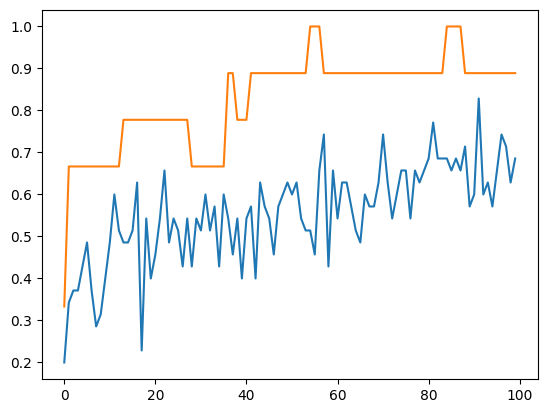

In [64]:
#ploting trining acuracy and val accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.show()

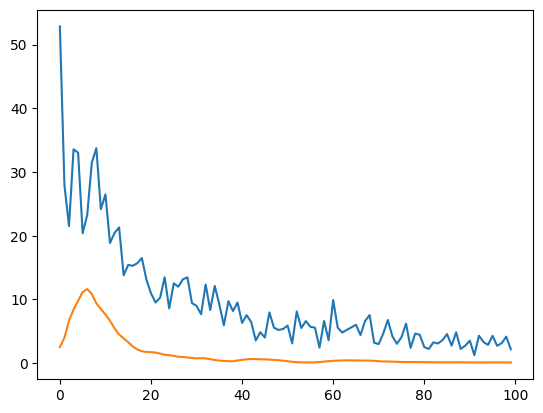

In [65]:
#ploting loos and vall loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.show()

In [66]:
#showing test accuracy
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8888888955116272


In [67]:
X_test[1]

array([-2.1032658e+02,  1.0417866e+02, -4.8686050e+01,  5.0608349e+01,
       -1.0147295e+01,  2.2865332e+01, -6.4224529e+00,  7.3837962e+00,
        2.6748497e+00,  1.1393963e+01,  5.0605311e+00,  2.1316916e+01,
        7.8362184e+00,  6.5950766e+00, -2.2719500e+00,  7.8155370e+00,
        3.1804426e+00,  5.1726041e+00, -3.7955842e+00, -4.6692246e-01,
        1.7853823e+00,  8.0194550e+00,  2.9354553e+00, -3.5768622e-01,
       -1.1977713e+00,  1.7760172e+00, -2.2242475e+00,  1.7574136e+00,
        1.9999349e+00,  4.3096890e+00, -2.1221994e-01,  1.3709490e+00,
        9.2991844e-02, -1.1136233e+00, -3.5919681e+00, -4.1539512e+00,
       -2.8942976e+00,  9.4044900e-01, -1.5671059e+00, -1.1189532e+00],
      dtype=float32)

3.1 The Confusion matrix, sensitivity, specificity, loss and AUC Values

In [68]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


In [69]:
y_pred = y_pred.round()

In [70]:
y_pred[0]

array([0., 1., 0., 0.], dtype=float32)

In [71]:
# now finding the matrics accuracy score
y_test_arg = np.argmax(y_test,axis=1)
y_pred_arg = np.argmax(y_pred,axis=1)
print(y_test_arg)
metrics.accuracy_score(y_test_arg,y_pred_arg)

[1 0 2 2 2 2 2 2 0]


0.8888888888888888

In [72]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.83      0.91         6
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.89      0.94         9
   macro avg       0.75      0.71      0.73         9
weighted avg       1.00      0.89      0.94         9
 samples avg       0.89      0.89      0.89         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

3.2 Developing a Jupyter Notebook to perform inference on .h5 model for new test audio

#Testing some Test Audio Data

* Pre-process the new data
* Predict the classes
* Invere Transform your predicted label

In [89]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model  # Assuming you're using a trained Keras model

# Define the file path
filename1 = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/103076-3-1-0.wav"

# Load the audio file
audio, sample_rate = librosa.load(filename1, res_type='soxr_hq')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

# Scale the MFCC features
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Display the features and their shape
print("MFCC Scaled Features:", mfccs_scaled_features)
print("Shape of MFCC Scaled Features:", mfccs_scaled_features.shape)

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/saved_models/audio_classification.keras')

# Ensure `model` is defined and `LabelEncoder` is used correctly
# Predict the probabilities
predicted_probabilities = model.predict(mfccs_scaled_features)

# Convert the probabilities to a predicted class label
predicted_label = np.argmax(predicted_probabilities, axis=1)

# Load or define the labels for decoding (ensure this matches your training labels)
labels = ['class_1', 'class_2', 'class_3']  # Modify according to your dataset
labelencoder = LabelEncoder()
labelencoder.fit(labels)  # Fit the encoder with the labels
prediction_class = labelencoder.inverse_transform(predicted_label)

# Display the predicted class
print("Predicted Class:", prediction_class)


MFCC Scaled Features: [[-3.8338492e+02  7.9309433e+01 -1.6650095e+01 -3.7682148e+01
  -3.2829060e+01 -3.0460405e+01 -2.5360689e+01 -1.2941870e+01
  -1.2550007e+01  5.3856069e-01  4.7730379e+00  1.7618619e+00
   2.5771413e+00  7.6405044e+00  1.4119832e+01  6.2576571e+00
  -6.3376427e+00 -1.1476616e+01 -1.1021304e+01 -9.9919510e+00
  -5.6022301e+00 -2.4129112e+00 -2.0174472e+00  2.2857654e+00
   4.0745153e+00  1.6988280e+00 -4.0377378e+00 -5.0378757e+00
  -5.4255314e+00 -4.1219335e+00 -3.1214192e+00 -1.8239230e-01
   1.7104451e-01  2.0769584e+00 -4.4497743e-01  1.0410410e+00
   1.3768402e+00  1.4499817e+00  8.4892166e-01  2.8346744e-01]]
Shape of MFCC Scaled Features: (1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted Class: ['class_3']


In [92]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
#audio sample 1
# Load audio sample
filename1 = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold8/103076-3-1-0.wav"
audio, sample_rate = librosa.load(filename1, res_type='soxr_hq')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print MFCC features
print(mfccs_scaled_features)

# Reshape features to match input shape for the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Print reshaped features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Make prediction (note: use model.predict instead of model.predict_classes)
predictions = model.predict(mfccs_scaled_features)

# For classification, we need to get the class with the highest probability (if using softmax)
predicted_label = np.argmax(predictions, axis=-1)

# Inverse transform the predicted label
prediction_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(prediction_class)


[-3.8338492e+02  7.9309433e+01 -1.6650095e+01 -3.7682148e+01
 -3.2829060e+01 -3.0460405e+01 -2.5360689e+01 -1.2941870e+01
 -1.2550007e+01  5.3856069e-01  4.7730379e+00  1.7618619e+00
  2.5771413e+00  7.6405044e+00  1.4119832e+01  6.2576571e+00
 -6.3376427e+00 -1.1476616e+01 -1.1021304e+01 -9.9919510e+00
 -5.6022301e+00 -2.4129112e+00 -2.0174472e+00  2.2857654e+00
  4.0745153e+00  1.6988280e+00 -4.0377378e+00 -5.0378757e+00
 -5.4255314e+00 -4.1219335e+00 -3.1214192e+00 -1.8239230e-01
  1.7104451e-01  2.0769584e+00 -4.4497743e-01  1.0410410e+00
  1.3768402e+00  1.4499817e+00  8.4892166e-01  2.8346744e-01]
[[-3.8338492e+02  7.9309433e+01 -1.6650095e+01 -3.7682148e+01
  -3.2829060e+01 -3.0460405e+01 -2.5360689e+01 -1.2941870e+01
  -1.2550007e+01  5.3856069e-01  4.7730379e+00  1.7618619e+00
   2.5771413e+00  7.6405044e+00  1.4119832e+01  6.2576571e+00
  -6.3376427e+00 -1.1476616e+01 -1.1021304e+01 -9.9919510e+00
  -5.6022301e+00 -2.4129112e+00 -2.0174472e+00  2.2857654e+00
   4.0745153e+00 

In [97]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
#audio sample 2
# Load audio sample
filename2 = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold4/107653-9-0-14.wav"
audio, sample_rate = librosa.load(filename2, res_type='soxr_hq')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print MFCC features
print(mfccs_scaled_features)

# Reshape features to match input shape for the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Print reshaped features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Make prediction (note: use model.predict instead of model.predict_classes)
predictions = model.predict(mfccs_scaled_features)

# For classification, we need to get the class with the highest probability (if using softmax)
predicted_label = np.argmax(predictions, axis=-1)

# Inverse transform the predicted label
prediction_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(prediction_class)


[-3.5660202e+02  6.8618362e+01 -2.7192524e+01  6.4699645e+00
 -6.7829766e+00  2.4899290e+01 -4.2737894e+00 -7.7110901e+00
  1.1586114e+01  5.0604959e+00  1.9776484e+00  7.5014749e+00
 -7.1254334e+00  5.9996343e+00 -3.0551252e+00  1.2890626e+01
 -6.3827496e+00  6.7172470e+00  1.6258456e+00  1.9503167e+00
 -5.5074496e+00  1.3287665e+00 -1.3710290e+00 -1.3679121e-01
 -2.2823958e-01  4.1651335e+00 -1.9306315e-02  3.8947098e+00
  2.5955920e+00  3.2405844e+00 -4.0061316e-01  2.4682136e+00
  1.5080640e+00  2.1099327e+00 -1.9111137e+00 -2.4967473e+00
 -3.5615997e+00  1.2642224e+00 -2.1862729e+00  8.1628680e-01]
[[-3.5660202e+02  6.8618362e+01 -2.7192524e+01  6.4699645e+00
  -6.7829766e+00  2.4899290e+01 -4.2737894e+00 -7.7110901e+00
   1.1586114e+01  5.0604959e+00  1.9776484e+00  7.5014749e+00
  -7.1254334e+00  5.9996343e+00 -3.0551252e+00  1.2890626e+01
  -6.3827496e+00  6.7172470e+00  1.6258456e+00  1.9503167e+00
  -5.5074496e+00  1.3287665e+00 -1.3710290e+00 -1.3679121e-01
  -2.2823958e-01 

In [98]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
#audio sample 3
# Load audio sample
filename3 = "/content/drive/MyDrive/Colab Notebooks/gunshotdetection/audio/fold6/104327-2-0-15.wav"
audio, sample_rate = librosa.load(filename3, res_type='soxr_hq')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print MFCC features
print(mfccs_scaled_features)

# Reshape features to match input shape for the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Print reshaped features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Make prediction (note: use model.predict instead of model.predict_classes)
predictions = model.predict(mfccs_scaled_features)

# For classification, we need to get the class with the highest probability (if using softmax)
predicted_label = np.argmax(predictions, axis=-1)

# Inverse transform the predicted label
prediction_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(prediction_class)


[-94.245605    77.29016     -7.2239294    3.9684515   -9.85674
  -2.3091285   -8.213396     4.420811    -8.539466     0.45371962
  -5.496081    -0.31433666  -4.007183     1.3126823   -2.8206515
   3.1794436   -1.5286592    4.5010586   -1.6135861    4.4092226
  -1.9369249    2.0580108   -0.86756474   3.7341676   -1.749958
   2.076939    -1.1494287    3.2477117   -1.0987295    1.6972065
  -1.2703866    3.0944393   -0.35787842   3.5218577   -0.554396
   2.3310273   -0.39547122   2.2175872   -0.71593577   2.4491506 ]
[[-94.245605    77.29016     -7.2239294    3.9684515   -9.85674
   -2.3091285   -8.213396     4.420811    -8.539466     0.45371962
   -5.496081    -0.31433666  -4.007183     1.3126823   -2.8206515
    3.1794436   -1.5286592    4.5010586   -1.6135861    4.4092226
   -1.9369249    2.0580108   -0.86756474   3.7341676   -1.749958
    2.076939    -1.1494287    3.2477117   -1.0987295    1.6972065
   -1.2703866    3.0944393   -0.35787842   3.5218577   -0.554396
    2.3310273   -0.395

3.3 Conclusion

# the given audio and csv data was preprocessed and studies well by using librosa tools, after I created a model using librosa and MFCC to train and test the audio files and the model was saved in saved_models folder.

* I used the librosa and MFCC to understand the audio frequencys and also to convert audio data in to a digital data
* This model need some more further improvements for deployment
* I tested three different unknow files to chek that whether model is working or not
* The saved .h5 model is workimg very well and i got the predictions class for all tested files, and in thouse max are true predictions.

Final saved model was tested by three different new test audio files and the model got nearly 80% accuracy so the pridictions made by the model has huge chance for right, but also 20% chance their for wrong predictions based on the result accuracy we got.so this model need some more further study to get better results

now the final model is ready to detect the differet sounds related to the crime and antisocial behaviour, and it can identify the spcific sounds recorded by the Microphone it can help crime control deportment to control the crime damage or total crime ASAP by the help of this model. the task was given by Home Office was done.